### Import packages

In [1]:
import time
import pickle
import itertools
import numpy as np
import pandas as pd
#import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from utilities import *

In [2]:
result_filename = 'model-02-build-keras-search'

### Params

In [3]:
is_log_target = True
is_per_area_target = True
is_embedding = True
is_tar_encoded = False

map_target = {
    (True, True):   'log_per_area_total_price',
    (True, False):  'log_total_price',
    (False, True):  'per_area_total_price',
    (False, False): 'total_price'
}
col_target = map_target[(is_log_target, is_per_area_target)]
cols_num_add = ['land_per_building_area']
cols_cat_add = ['encoded_latlon']
cols_bin_add = []

cols_feats_rm = [] # TODO: implement before using it
#['day_in_year_txn_dt', 'day_in_year_building_complete_dt', 'dt_diff_building_complete_dt_txn_dt'] # dt num feats
#['dow_txn_dt', 'dow_building_complete_dt', 'month_txn_dt', 'month_building_complete_dt',
# 'quarter_txn_dt', 'quarter_building_complete_dt', 'year_txn_dt', 'year_building_complete_dt'] # dt cat feats

print('Target:', col_target)

Target: log_per_area_total_price


In [4]:
# Feature remove
# PARS #
N_feats_rm = 67
# PARS #

from vars_03 import score_base_per_area, shuffle_results_per_area

feat_imp = pd.DataFrame({'feats': shuffle_results_per_area[:,0],'avg':shuffle_results_per_area[:,1]})
feat_imp['diff'] = feat_imp['avg'] - score_base_per_area
feat_imp = feat_imp.sort_values(by='diff', ascending=False)
print(feat_imp.reset_index().values)

feats_rm = list(feat_imp.iloc[:(N_feats_rm+1)]['feats'].values)
feats_rm.remove('none')
print(len(feats_rm))
print(feats_rm)

[[0 5709.20035 'divorce_rate' 3.333296666667593]
 [1 5709.200316666666 'I_250' 3.333263333333889]
 [2 5708.200346666667 'XI_100' 2.33329333333495]
 [3 5707.867050000001 'VI_index_500' 1.9999966666682667]
 [4 5707.86704 'IX_index_50' 1.9999866666676098]
 [5 5707.866983333333 'VI_500' 1.9999300000008589]
 [6 5707.533710000001 'XIV_10' 1.666656666668132]
 [7 5707.200386666666 'XI_index_500' 1.3333333333339397]
 [8 5707.200383333334 'VI_index_1000' 1.3333300000012969]
 [9 5707.200373333333 'V_100' 1.33332000000064]
 [10 5707.200363333334 'VII_10' 1.333310000001802]
 [11 5707.200336666666 'X_100' 1.3332833333333838]
 [12 5706.867056666667 'XII_index_50' 1.0000033333344618]
 [15 5706.867050000001 'X_index_500' 0.9999966666682667]
 [14 5706.867050000001 'X_10' 0.9999966666682667]
 [13 5706.867050000001 'II_10' 0.9999966666682667]
 [16 5706.867046666666 'II_index_500' 0.9999933333338049]
 [17 5706.867046666666 'V_index_1000' 0.9999933333338049]
 [18 5706.867043333335 'XIII_10' 0.99999000000207

### Columns

In [5]:
cols_num = ['txn_dt', 'total_floor', 'building_complete_dt', 'parking_area', 'parking_price', 'txn_floor', 'land_area', 'building_area', 'lat', 'lon', 'village_income_median', 'town_population', 'town_area', 'town_population_density', 'doc_rate', 'master_rate', 'bachelor_rate', 'jobschool_rate', 'highschool_rate', 'junior_rate', 'elementary_rate', 'born_rate', 'death_rate', 'marriage_rate', 'divorce_rate', 'N_50', 'N_500', 'N_1000', 'N_5000', 'N_10000', 'I_10', 'I_50', 'I_100', 'I_250', 'I_500', 'I_1000', 'I_5000', 'I_10000', 'I_MIN', 'II_10', 'II_50', 'II_100', 'II_250', 'II_500', 'II_1000', 'II_5000', 'II_10000', 'II_MIN', 'III_10', 'III_50', 'III_100', 'III_250', 'III_500', 'III_1000', 'III_5000', 'III_10000', 'III_MIN', 'IV_10', 'IV_50', 'IV_100', 'IV_250', 'IV_500', 'IV_1000', 'IV_5000', 'IV_10000', 'IV_MIN', 'V_10', 'V_50', 'V_100', 'V_250', 'V_500', 'V_1000', 'V_5000', 'V_10000', 'V_MIN', 'VI_50', 'VI_100', 'VI_250', 'VI_500', 'VI_1000', 'VI_5000', 'VI_10000', 'VI_MIN', 'VII_10', 'VII_50', 'VII_100', 'VII_250', 'VII_500', 'VII_1000', 'VII_5000', 'VII_10000', 'VII_MIN', 'VIII_10', 'VIII_50', 'VIII_100', 'VIII_250', 'VIII_500', 'VIII_1000', 'VIII_5000', 'VIII_10000', 'VIII_MIN', 'IX_10', 'IX_50', 'IX_100', 'IX_250', 'IX_500', 'IX_1000', 'IX_5000', 'IX_10000', 'IX_MIN', 'X_10', 'X_50', 'X_100', 'X_250', 'X_500', 'X_1000', 'X_5000', 'X_10000', 'X_MIN', 'XI_10', 'XI_50', 'XI_100', 'XI_250', 'XI_500', 'XI_1000', 'XI_5000', 'XI_10000', 'XI_MIN', 'XII_10', 'XII_50', 'XII_100', 'XII_250', 'XII_500', 'XII_1000', 'XII_5000', 'XII_10000', 'XII_MIN', 'XIII_10', 'XIII_50', 'XIII_100', 'XIII_250', 'XIII_500', 'XIII_1000', 'XIII_5000', 'XIII_10000', 'XIII_MIN', 'XIV_10', 'XIV_50', 'XIV_100', 'XIV_250', 'XIV_500', 'XIV_1000', 'XIV_5000', 'XIV_10000', 'XIV_MIN']
cols_bin = ['I_index_50', 'I_index_500', 'I_index_1000', 'II_index_50', 'II_index_500', 'II_index_1000', 'III_index_50', 'III_index_500', 'III_index_1000', 'IV_index_50', 'IV_index_500', 'IV_index_1000', 'IV_index_5000', 'V_index_50', 'V_index_500', 'V_index_1000', 'VI_10', 'VI_index_50', 'VI_index_500', 'VI_index_1000', 'VII_index_50', 'VII_index_500', 'VII_index_1000', 'VIII_index_50', 'VIII_index_500', 'VIII_index_1000', 'IX_index_50', 'IX_index_500', 'IX_index_1000', 'IX_index_5000', 'X_index_50', 'X_index_500', 'X_index_1000', 'XI_index_50', 'XI_index_500', 'XI_index_1000', 'XI_index_5000', 'XI_index_10000', 'XII_index_50', 'XII_index_500', 'XII_index_1000', 'XIII_index_50', 'XIII_index_500', 'XIII_index_1000', 'XIII_index_5000', 'XIII_index_10000', 'XIV_index_50', 'XIV_index_500', 'XIV_index_1000']
cols_cat = ['building_material', 'city', 'building_type', 'building_use', 'parking_way', 'town', 'village']

print('Total (before remove):', 
      len(cols_num)+len(cols_bin)+len(cols_cat)+len(cols_num_add)+len(cols_bin_add)+len(cols_cat_add))

cols_num = [c for c in cols_num if c not in feats_rm]
cols_bin = [c for c in cols_bin if c not in feats_rm]
cols_cat = [c for c in cols_cat if c not in feats_rm]

# informational cols
cols_dt = ['txn_dt', 'building_complete_dt']

# right skew cols
#cols_right_skew = ['parking_area', 'land_area', 'building_area']+[c for c in cols_num if 'MIN' in c]

print('Num:', len(cols_num), 'Bin:', len(cols_bin), 'Cat:', len(cols_cat))
print('Add:', len(cols_num_add), len(cols_bin_add), len(cols_cat_add), 
      'Total (after):', 
      len(cols_num)+len(cols_bin)+len(cols_cat)+len(cols_num_add)+len(cols_bin_add)+len(cols_cat_add))
#print('Right skew:', cols_right_skew)
#print('Total:', len(cols_feats))

Total (before remove): 213
Num: 130 Bin: 7 Cat: 7
Add: 1 0 1 Total (after): 146


### Read data

In [6]:
df = pd.read_csv('dataset/train.csv', dtype=object)
df.check()

building_id building_material city txn_dt total_floor  \
0      e3mMIMR3JJqCaXz1                 8   21  18674           4   
1      LgwzgklNvy4QCtq5                 8    7  18800           5   
2      ucIR2NLLsC3T650L                 8    7  19289           4   
3      jre1pJhcQj91Kdky                 8   21  20385          24   
4      rQpYpY9nRG7X5mmr                 1   21  20657           2   
59995  Oh5Hwr9LrWApC2mr                 1    5  19040           2   
59996  PiOgZqfsDVlTq1zs                 8   13  19706          14   
59997  FQmlgGohzzWuKUzu                 8    7  19901          11   
59998  zjzfMwXhDswdEaI2                 8   13  19975           5   
59999  iN4H6wBMtvJpF0SN                 8    7  20385           5   

      building_type building_use building_complete_dt parking_way  \
0                 3            2                 6271           2   
1                 1            2                 7885           2   
2                 1            2                 6028           2   
3                 0            2                18325           0   
4                 4            2                 6880           2   
59995             4            2                 9193           2   
59996             2            5                17168           0   
59997             0            2                13729           0   
59998             1            2                 7063           2   
59999             1            2                 8310           2   

            parking_area  ... XIV_500 XIV_index_500 XIV_1000 XIV_index_1000  \
0                    NaN  ...      58             1      157              1   
1                    NaN  ...      28             1      115              1   
2                    NaN  ...      78             1      212              1   
3                    NaN  ...      20             1      125              1   
4                    NaN  ...      18             1       47              1   
59995                NaN  ...       9             1       53              1   
59996  3.738411744735565  ...      88             1      316              1   
59997                NaN  ...     113             1      348              1   
59998                NaN  ...      23             1      142              1   
59999                NaN  ...      75             1      249              1   

      XIV_5000 XIV_index_5000 XIV_10000 XIV_index_10000             XIV_MIN  \
0         2483              1      6011               1  34.469802848528126   
1        15872              1     32221               1   40.07357348973039   
2        15760              1     32228               1   54.46208108983661   
3         2568              1      7271               1   99.62896580763416   
4         2587              1      7442               1   124.1312362968124   
59995     1435              1      4611               1  145.27967019169262   
59996     5659              1     22826               1   18.81499793345573   
59997    13252              1     32687               1   94.79959334423607   
59998     5317              1     21087               1   33.10458025153816   
59999    15417              1     32826               1   47.50987600102272   

              total_price  
0       647603.7704719775  
1               3321452.0  
2       9570885.316206373  
3      14215011.127100045  
4       762711.9757135696  
59995   987021.4150420949  
59996  15725223.997450478  
59997   11815402.03862225  
59998   18084995.81999832  
59999    8510295.87633061  

[10 rows x 235 columns]

shape = (60000, 235)


### Preprocessing

In [7]:
def pre_processing(df, cols_num, cols_cat, cols_bin):
    """Preprocess (inplace) that are independent of train and validatoin set"""
    # Convert types
    df[cols_num] = df[cols_num].astype('float32')
    df[cols_bin] = df[cols_bin].astype('float32')
    df[cols_cat] = df[cols_cat].astype('int32')
    
    # target transform base (store this for inverse transform)
    if is_per_area_target:
        df['building_area_ori'] = df['building_area']
    
    # generate target
    if 'total_price' in df:
        df['total_price'] = df['total_price'].astype('float32')
        df['log_total_price'] = np.log1p(df['total_price'])
        df['per_area_total_price'] = df['total_price'] / df['building_area_ori']
        df['log_per_area_total_price'] = np.log1p(df['per_area_total_price'])
        df['target'] = df[col_target]

    # generate lat/lon encoded
    kmeans = pickle.load(open('./object_kmeans_k6_combined.pkl', 'rb'))
    df['encoded_latlon'] = kmeans.predict(df[['lat','lon']])
    
    # generate dt feats
    df = create_dt_feats(df, 'txn_dt')
    df = create_dt_feats(df, 'building_complete_dt')
    df['dt_diff_building_complete_dt_txn_dt'] = df['txn_dt'] - df['building_complete_dt']
    
    # generate building to land ratio
    df['land_per_building_area'] = df['land_area'] / df['building_area']
    
    # fix town and city
    #df['town'] = df['city'].astype('str')+'-'+df['town'].astype('str')
    #df['village'] = df['town'].astype('str')+'-'+df['village'].astype('str')
    
    return df

In [8]:
def post_processing(y_pred, df):
    """Post processing target
       Args: 
          y_pred (1d np.array): raw prediction y
          df (pd.Dataframe): input feature df
       Return: np.array
    """
    y_pred_final = y_pred.copy()
    
    if is_log_target:
        y_pred_final = np.expm1(y_pred_final)
        y_pred_final = np.clip(y_pred_final, 0, None)

    if is_per_area_target:
        y_pred_final = y_pred_final * df['building_area_ori'].values
        
    return y_pred_final

In [9]:
df = pre_processing(df, cols_num, cols_cat, cols_bin)

/home/louis.yang.925/.local/lib/python3.5/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator KMeans from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
# Add those added feature columns (run this after preprocess has done)
cols_num = cols_num + [c for c in cols_num_add if c not in cols_num]
cols_cat = cols_cat + [c for c in cols_cat_add if c not in cols_cat]
cols_bin = cols_bin + [c for c in cols_bin_add if c not in cols_bin]
cols_feats = cols_num + cols_cat + cols_bin
print('Feat columns:', cols_feats)

# Target mean encoded columns
cols_tar_encoded = ['encoded_'+c for c in cols_cat] if is_tar_encoded else []
    
print('\nTarget mean encoded columns:', cols_tar_encoded)

# Compute skew columns
cols_right_skew = [c for c in cols_num if df[c].skew() > 2.2]
print('\nRight skew columns:', cols_right_skew)

# Fillna values for null columns
fillna_values = {
    'parking_area': -1.,
    'parking_price': -1.,
    'txn_floor': 0.,
    #'village_income_median': 'median',
}

Feat columns: ['txn_dt', 'total_floor', 'building_complete_dt', 'parking_area', 'parking_price', 'txn_floor', 'land_area', 'building_area', 'lat', 'lon', 'village_income_median', 'town_population', 'town_area', 'town_population_density', 'doc_rate', 'master_rate', 'bachelor_rate', 'jobschool_rate', 'highschool_rate', 'junior_rate', 'elementary_rate', 'born_rate', 'death_rate', 'marriage_rate', 'N_50', 'N_1000', 'N_5000', 'N_10000', 'I_1000', 'I_5000', 'I_10000', 'I_MIN', 'II_100', 'II_250', 'II_500', 'II_1000', 'II_5000', 'II_10000', 'II_MIN', 'III_10', 'III_50', 'III_100', 'III_250', 'III_500', 'III_1000', 'III_5000', 'III_10000', 'III_MIN', 'IV_10', 'IV_100', 'IV_250', 'IV_500', 'IV_1000', 'IV_5000', 'IV_10000', 'IV_MIN', 'V_50', 'V_250', 'V_500', 'V_1000', 'V_5000', 'V_10000', 'V_MIN', 'VI_5000', 'VI_10000', 'VI_MIN', 'VII_50', 'VII_100', 'VII_250', 'VII_500', 'VII_1000', 'VII_5000', 'VII_10000', 'VII_MIN', 'VIII_10', 'VIII_50', 'VIII_100', 'VIII_250', 'VIII_500', 'VIII_1000', 'VIII

### Feature engineering
Include cat encoding, fillna, scaling

In [11]:
from feature_engineering import CategoricalColumnsEncoder
from feature_engineering import TargetMeanEncoding
from feature_engineering import MultiLabelEncoding
from feature_engineering import PdStandardScaler, PdMedianScaler, PdMinMaxScaler

In [12]:
class FeatureEngineering():
    def __init__(self, cols_num, cols_cat, cols_bin, col_target, 
                 fillna_values={}, cols_right_skew=[], is_embedding=False, is_tar_encoded=True,
                 n_ran_encode=4, rare_village_threshold=2, rare_town_threshold=2):
        # Cols
        self.cols_num = cols_num
        self.cols_cat = cols_cat
        self.cols_bin = cols_bin
        self.col_target = col_target
        self.cols_right_skew = cols_right_skew
        
        # Numbers
        #self.n_ran_encode = n_ran_encode
        
        # Rare village and town
        self.rare_town_threshold = rare_town_threshold
        self.rare_village_threshold = rare_village_threshold
        
        # Cat encoders
        self.is_tar_encoded = is_tar_encoded
        if is_tar_encoded:
            self.tar_encoder = TargetMeanEncoding(col_target = self.col_target)
        #self.ran_encoder = MultiLabelEncoding(self.n_ran_encode)
        self.is_embedding = is_embedding
        if is_embedding:
            self.cat_astyper = CategoricalColumnsEncoder(mode='keras', reserve_missing=True)
        
        # Fillna
        self.fillna_values = fillna_values
        
        # Skewness
        self.mins_right_skew_cols = {}  # map from the col name to the original min
        
        # Normalization
        self.scaler = PdStandardScaler()
        
        # Target normalization
        self.target_scaler = PdStandardScaler()
        
    def fit_transform(self, df):
        df = df.copy()   
        
        # Rare village
        village_counts = df['village'].value_counts()
        rare_village = set(village_counts.index[village_counts <= self.rare_village_threshold])
        df.loc[df['village'].isin(rare_village), 'village'] = np.nan
        town_counts = df['town'].value_counts()
        rare_town = set(town_counts.index[town_counts <= self.rare_town_threshold])
        df.loc[df['town'].isin(rare_town), 'town'] = np.nan
        
        # Cat encoders
        if self.is_tar_encoded:
            df_tar_encoded = self.tar_encoder.fit_transform(df[self.cols_cat], df[self.col_target])
            self.cols_tar_encoded = [c for c in df_tar_encoded]
            for c in df_tar_encoded:
                df[c] = df_tar_encoded[c].astype('float32')
        else:
            self.cols_tar_encoded = []
        #encoded2 = self.ran_encoder.fit_transform(df[self.cols_cat])
        if self.is_embedding:
            self.cat_astyper.fit_transform(df, self.cols_cat)
        
        # Fillna
        self.fillna_values['village_income_median'] = df['village_income_median'].median()
        for c, v in self.fillna_values.items():
            df[c] = df[c].fillna(v)
    
        # Skewness
        for c in self.cols_right_skew:
            # if the minimum of the col < 0, then subtract the min first (to make it positive)
            self.mins_right_skew_cols[c] = min(df[c].min(), 0)
            df[c] = np.log10(0.1 + df[c] - self.mins_right_skew_cols[c]).astype('float32')
    
        # Normalization
        self.scaler.fit(df, cols=self.cols_num+self.cols_tar_encoded)
        self.scaler.transform(df)  # transform inplace!
        
        # Target normalization
        assert self.col_target in df, 'Target column not found in the dataframe'
        self.target_scaler.fit(df, cols=[self.col_target])
        self.target_scaler.transform(df, cols_input=[self.col_target], cols_transformed=[self.col_target+'_scaled'])
        
        return df
        #return pd.concat([df, encoded1, encoded2], axis=1)
    
    def transform(self, df):
        df = df.copy()
        # Cat encoders
        if self.is_tar_encoded:
            df_tar_encoded = self.tar_encoder.transform(df[self.cols_cat])
            for c in df_tar_encoded:
                df[c] = df_tar_encoded[c].astype('float32')
        #encoded2 = self.ran_encoder.transform(df[self.cols_cat])     # TODO: add generated feats into cols_feats
        if self.is_embedding:
            self.cat_astyper.transform(df)
    
        # Fillna
        for c, v in self.fillna_values.items():
            df[c] = df[c].fillna(v)    

        # Skewness
        for c in self.cols_right_skew:
            df[c] = np.log10(0.1 + df[c] - self.mins_right_skew_cols[c]).astype('float32')
        
        # Normalization
        self.scaler.transform(df)  # transform inplace!
        
        # Target normalization
        if self.col_target in df:
            self.target_scaler.transform(df, cols_input=[self.col_target], cols_transformed=[self.col_target+'_scaled'])
        
        return df
        #return pd.concat([df, encoded1, encoded2], axis=1)
        
    def target_inverse_transform(self, df, col_scaled_target, col_unscaled_target):
        self.target_scaler.inverse_transform(df, cols_input=[col_scaled_target], 
                                             cols_transformed=[col_unscaled_target])
        return df[col_unscaled_target]

### Keras Model

In [9]:
import keras
import tensorflow as tf
print('keras:', keras.__version__, 'tensorflow:', tf.__version__)

from keras.models import Model
from keras.layers import Input, Dense, Embedding, Flatten, Reshape, concatenate, Dropout, BatchNormalization, Activation, Add
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


keras: 2.2.4 tensorflow: 1.14.0


In [10]:
from keras_get_best import GetBest
from keras_SGDRScheduler import SGDRScheduler

In [72]:
def build_model(n_cols_num_bin, cat_n_classes={}, cat_embed_sizes={}, 
                n_neurons=(1024,)*10, learning_rate=0.001, optimizer=Adam, loss='mse', 
                skip_connection=False, batch_norm=False, activation='relu', dropout=0.,
                **ignored):
    '''Args: 
       n_cols_num_bin: number of numerical and binary features
       cat_n_classes: dict of cat column name to number of classes in the cat column
       cat_embed_sizes: dict of cat column name to embedding output size
       n_neurons: list of number of neurons for each dense layer
    '''
    if skip_connection:
        assert all([x==n_neurons[0] for x in n_neurons]), 'Residual connection only work' \
            ' for square shape network'
    is_embedding = len(cat_n_classes) > 0
    num_bin_input = Input(shape=(n_cols_num_bin,), dtype='float32', name='num_bin')
    cats_inputs = {c: Input(shape=(1,), dtype='int32', name=c) for c in cat_n_classes}
    if is_embedding:
        cats_embedding_layers = [
            Reshape(target_shape=(cat_embed_sizes[c],))(
                Embedding(input_dim=c_input_dim, output_dim=cat_embed_sizes[c])(cats_inputs[c])
            ) 
            for c, c_input_dim in cat_n_classes.items()
        ]
        x_layer = concatenate([num_bin_input]+cats_embedding_layers)  # output shape = 258
    else:
        x_layer = num_bin_input
    for i, n in enumerate(n_neurons):
        if skip_connection and i%2 == 1:
            skip_layer = x_layer
        x_layer = Dense(n)(x_layer)
        x_layer = Activation(activation)(x_layer)
        if dropout > 0. and i < len(n_neurons)-1:
            x_layer = Dropout(dropout)(x_layer)
        if batch_norm:
            x_layer = BatchNormalization()(x_layer)
        if skip_connection and i%2 == 0 and i > 0:
            x_layer = Add()([x_layer, skip_layer])
    output = Dense(1)(x_layer)
    model = Model(inputs=[num_bin_input]+list(cats_inputs.values()),
                  outputs=output)
    metrics = [m for m in ['mse', 'mae'] if m != loss]
    model.compile(optimizer=optimizer(lr=learning_rate), loss=loss, metrics=metrics)
    return model    

def build_features_matrices(df, cols_num, cols_cat, cols_bin):
    Xs = {'num_bin': df[cols_num+cols_bin].values}
    for c in cols_cat:
        Xs[c] = df[c].values
    return Xs

def plot_keras_hist(hists, ylim=None, metrics_plot=None, labels=None):
    if not isinstance(hists, list): hists=[hists]
    if metrics_plot is None:
        metrics_plot = [c for c in hists[0].history.keys() if not c.startswith('val')]
    if labels is None:
        labels = [str(i) for i in range(len(hists))]
    for m in metrics_plot:
        plt.figure(figsize=(14, 4))
        for label, hist in zip(labels, hists):
            for c in hist.history:
                if c.endswith(m):
                    plt.plot(hist.history[c], label=c+' '+label, alpha=0.9)
        if ylim != None:
            plt.ylim(*ylim)
        plt.xlabel('epochs'); plt.title(m)
        plt.legend(); plt.grid(); plt.show()

def plot_list_hist(hists, ylim=None, metrics_plot=None, labels=None, skip=0):
    if not isinstance(hists, list): hists=[hists]
    if metrics_plot is None:
        metrics_plot = [c for c in hists[0].keys() if not c.startswith('val')]
    if labels is None:
        labels = [str(i) for i in range(len(hists))]
    for m in metrics_plot:
        plt.figure(figsize=(14, 4))
        for label, hist in zip(labels, hists):
            for c in hist:
                if c.endswith(m):
                    plt.plot(hist[c][skip:], label=c+' '+label, alpha=0.9)
        if ylim != None:
            plt.ylim(*ylim)
        plt.xlabel('epochs'); plt.title(m)
        plt.legend(); plt.grid(); plt.show()

def plot_list_hist_mean(hists, ylim=None, metrics_plot=None):
    if not isinstance(hists, list): hists=[hists]
    if metrics_plot is None:
        metrics_plot = [c for c in hists[0].keys() if not c.startswith('val')]
    keys_plot = [c for c in hists[0] for m in metrics_plot if c.endswith(m)]
    
    for c in keys_plot:
        plt.figure(figsize=(14, 4))
        array = np.zeros((len(hists[0][c]), len(hists)))
        for i, hist in enumerate(hists):
            array[:, i] = np.array(hist[c])
        sq_mean = array.mean(axis=1)
        sq_std = np.std(array, axis=1)
        #plt.errorbar(np.arange(1, len(sq_mean)+1), sq_mean, yerr=sq_std, label=c, alpha=0.9, fmt='-o')
        plt.plot(sq_mean, label=c+'_mean')
        plt.plot(sq_mean+sq_std, label=c+'_std+', alpha=0.5)
        plt.plot(sq_mean-sq_std, label=c+'_std-', alpha=0.5)
        if ylim != None: plt.ylim(*ylim)
        plt.xlabel('epochs'); plt.title(c+'_mean')
        plt.legend(); plt.grid(); plt.show()

#### One run testing

In [17]:
from sklearn.model_selection import train_test_split
itrain, ival = train_test_split(df.index, test_size=0.3, random_state=123)

# split train, val
df_train = df.loc[itrain].reset_index(drop=True)
df_val = df.loc[ival].reset_index(drop=True)

# feat eng
feat_eng = FeatureEngineering(cols_num=cols_num, 
                              cols_cat=cols_cat, 
                              cols_bin=cols_bin, 
                              col_target=col_target, 
                              fillna_values=fillna_values, 
                              cols_right_skew=cols_right_skew,
                              is_embedding=is_embedding, 
                              is_tar_encoded=is_tar_encoded,)
df_train = feat_eng.fit_transform(df_train)
df_val = feat_eng.transform(df_val)

In [18]:
df_train.check()

building_id  building_material  city    txn_dt  total_floor  \
0      T1JoS1XWqso1c9G0                  6     8 -1.291672     1.252125   
1      UMyDRljT7Ze4l3eJ                  6     7 -1.685994    -0.519756   
2      mTdaS1xzULNW1Ubm                  6     4 -1.492969     2.630255   
3      D1bHnOx451bxG5R7                  6     4  0.572396    -0.716632   
4      WyxmUEFOTLygBMgo                  6    11 -0.931819    -0.716632   
41995  QQ3yQPoujssJczPs                  6     9 -1.523302    -0.519756   
41996  rM5ZZL8I50csvris                  1     6 -0.423060    -1.110384   
41997  A89t9bkUOCxJdj4J                  6     7 -0.438227     3.024006   
41998  EPFQhBNpBs5R9CmA                  6     8 -0.838064    -0.126005   
41999  iOoWvOrsv16kBvsw                  6     8  0.430385    -0.716632   

       building_type  building_use  building_complete_dt  parking_way  \
0                  1             3              0.722059            1   
1                  4             3              1.310622            3   
2                  1             3              0.932211            1   
3                  3             3             -1.288767            3   
4                  5             3             -0.055478            3   
41995              5             2              0.252728            3   
41996              5             3             -1.113602            3   
41997              1             3              1.850157            1   
41998              4             6              1.289676            1   
41999              2             3             -1.856153            3   

       parking_area               ...                 quarter_txn_dt  \
0         -0.233173               ...                              3   
1         -0.233173               ...                              0   
2         -0.233173               ...                              1   
3         -0.233173               ...                              2   
4         -0.233173               ...                              2   
41995     -0.233173               ...                              1   
41996     -0.233173               ...                              2   
41997     -0.233173               ...                              2   
41998     -0.233173               ...                              2   
41999     -0.233173               ...                              1   

       year_txn_dt  dow_building_complete_dt  \
0               50                         3   
1               50                         5   
2               50                         6   
3               54                         3   
4               51                         6   
41995           50                         1   
41996           52                         1   
41997           52                         4   
41998           51                         5   
41999           54                         2   

       day_in_year_building_complete_dt  month_building_complete_dt  \
0                                   315                          10   
1                                   317                          10   
2                                   133                           4   
3                                   339                          11   
4                                   222                           7   
41995                               101                           3   
41996                                 5                           0   
41997                               106                           3   
41998                               226                           7   
41999                                64                           2   

       quarter_building_complete_dt  year_building_complete_dt  \
0                                 3                         38   
1                                 3                         45   
2                                 1                         41   
3             

shape = (42000, 254)


In [19]:
for c in cols_cat:
    print(c, df_train[c].min(), df_val[c].min())

building_material 1 1
city 1 1
building_type 1 1
building_use 1 1
parking_way 1 1
town 0 0
village 0 0
encoded_latlon 1 1


In [20]:
# Prepare X y matrices
if is_embedding:
    X_train = build_features_matrices(df_train, cols_num=cols_num+cols_tar_encoded, cols_cat=cols_cat, cols_bin=cols_bin)
    X_val = build_features_matrices(df_val, cols_num=cols_num+cols_tar_encoded, cols_cat=cols_cat, cols_bin=cols_bin)
else:
    X_train = build_features_matrices(df_train, cols_num=cols_num+cols_tar_encoded, cols_cat=[], cols_bin=cols_bin)
    X_val = build_features_matrices(df_val, cols_num=cols_num+cols_tar_encoded, cols_cat=[], cols_bin=cols_bin)

y_train = df_train[col_target+'_scaled']
y_val = df_val[col_target+'_scaled']

In [21]:
n_cols_num_bin = len(cols_num+cols_bin+cols_tar_encoded)
if is_embedding:
    cat_n_classes = {c: feat_eng.cat_astyper.cat_n_classes[c] for c in cols_cat}
    cat_embed_sizes = {c: int(2*np.log(cat_n_classes[c]+1)+1) for c in cat_n_classes}
else:
    cat_n_classes = {}
    cat_embed_sizes = {}
print('Numerical input dims:', n_cols_num_bin)
print('Embeding  input dims:', cat_n_classes)
print('Embeding output dims:', cat_embed_sizes)
print('Total embedding output dims:', np.sum(list(cat_embed_sizes.values())))

Numerical input dims: 138
Embeding  input dims: {'building_material': 10, 'city': 12, 'building_type': 6, 'building_use': 11, 'parking_way': 4, 'town': 196, 'village': 2229, 'encoded_latlon': 7}
Embeding output dims: {'building_material': 5, 'city': 6, 'building_type': 4, 'building_use': 5, 'parking_way': 4, 'town': 11, 'village': 16, 'encoded_latlon': 5}
Total embedding output dims: 56


In [93]:
model = build_model(n_cols_num_bin, cat_n_classes, cat_embed_sizes)

In [94]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
building_material (InputLayer)  (None, 1)            0                                            
__________________________________________________________________________________________________
city (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
building_type (InputLayer)      (None, 1)            0                                            
__________________________________________________________________________________________________
building_use (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
parking_wa

In [37]:
%%time
hist = model.fit(x=X_train, y=y_train, batch_size=128, epochs=7, verbose=2, 
                 validation_data=(X_val, y_val), callbacks=[GetBest(monitor='val_loss', verbose=0, mode='min')])

Train on 40000 samples, validate on 20000 samples
Epoch 1/7
 - 11s - loss: 1.0186 - mean_absolute_error: 0.6805 - val_loss: 0.1250 - val_mean_absolute_error: 0.2605
Epoch 2/7
 - 11s - loss: 0.1279 - mean_absolute_error: 0.2690 - val_loss: 0.1022 - val_mean_absolute_error: 0.2352
Epoch 3/7
 - 10s - loss: 0.1081 - mean_absolute_error: 0.2463 - val_loss: 0.1078 - val_mean_absolute_error: 0.2460
Epoch 4/7
 - 11s - loss: 0.0994 - mean_absolute_error: 0.2364 - val_loss: 0.0917 - val_mean_absolute_error: 0.2233
Epoch 5/7
 - 10s - loss: 0.0932 - mean_absolute_error: 0.2291 - val_loss: 0.0879 - val_mean_absolute_error: 0.2174
Epoch 6/7
 - 10s - loss: 0.0870 - mean_absolute_error: 0.2210 - val_loss: 0.0945 - val_mean_absolute_error: 0.2285
Epoch 7/7
 - 10s - loss: 0.0846 - mean_absolute_error: 0.2176 - val_loss: 0.0877 - val_mean_absolute_error: 0.2205
CPU times: user 7min 23s, sys: 2min 4s, total: 9min 27s
Wall time: 1min 15s


In [30]:
model.evaluate(X_val, y_val, batch_size=1024)

18000/18000 [==============================] - 1s 34us/step


[0.08724388343095779, 0.21872330809964075]

- loss: 0.0060 - mean_absolute_error: 0.0586 - val_loss: 0.0639 - val_mean_absolute_error: 0.1781 mse 100
- loss: 0.0031 - mean_absolute_error: 0.0404 - val_loss: 0.0600 - val_mean_absolute_error: 0.1691 256*7 mse 100
- loss: 0.0035 - mean_absolute_error: 0.0416 - val_loss: 0.0579 - val_mean_absolute_error: 0.1650 512*9 mse 100 16m
- loss: 0.0527 - mean_squared_error: 0.0076 - val_loss: 0.1677 - val_mean_squared_error: 0.0600 256*7 mae 100 3m
- loss: 0.0176 - mean_squared_error: 0.0013 - val_loss: 0.1611 - val_mean_squared_error: 0.0575 1024*10 mae 500 6h (40s/ep)
- loss: 0.0250 - mean_squared_error: 0.0023 - val_loss: 0.1600 - val_mean_squared_error: 0.0567 512*9 mae 200 26min embedding

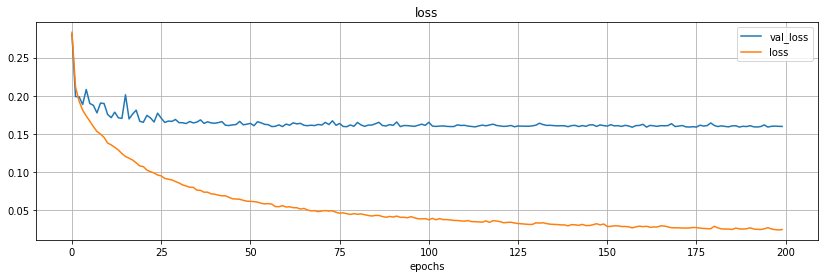

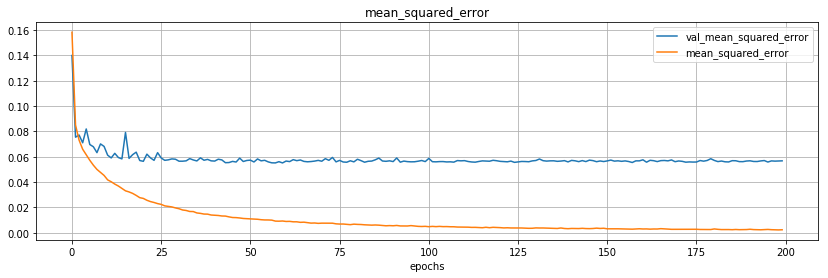

In [47]:
plot_keras_hist(hist)

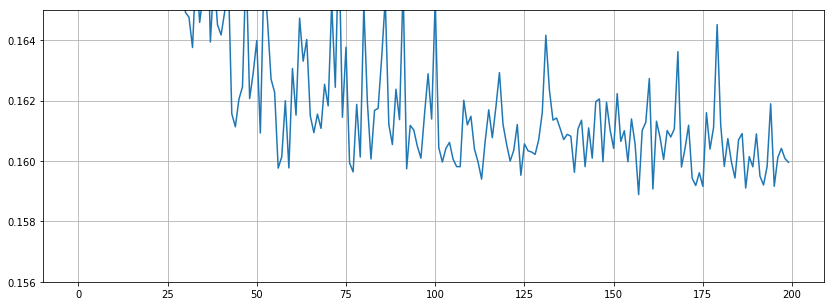

In [48]:
plt.figure(figsize=(14, 5))
plt.plot(hist.history['val_loss'])
plt.ylim(0.156, 0.165)
plt.grid(); plt.show()

In [49]:
df_val[col_target+'_scaled_pred'] = model.predict(X_val, batch_size=1024)
feat_eng.target_inverse_transform(df_val, col_target+'_scaled_pred', col_target+'_pred');
df_val['total_price_pred'] = post_processing(df_val[col_target+'_pred'], df_val)
mse = mean_squared_error(df_val[col_target], df_val[col_target+'_pred'])
mae = mean_absolute_error(df_val[col_target], df_val[col_target+'_pred'])
mape = cal_mape(df_val[col_target], df_val[col_target+'_pred'])
score = cal_score(df_val['total_price'], df_val['total_price_pred'])
print('score, mse, mae, mape: %.5f, %.5f, %.5f, %.5f' % (score, mse, mae, mape))

score, mse, mae, mape: 4904.84186, 0.05174, 0.15349, 0.01151


- score, mse, mae, mape: 4551.83065, 0.05603, 0.16341, 0.01224 - 256*7 mse
- score, mse, mae, mape: 4643.83454, 0.05401, 0.15939, 0.01194 - 512*9 mse
- score, mse, mae, mape: 4659.83019, 0.05596, 0.16203, 0.01215 - 256*7 mae
- score, mse, mae, mape: 4956.84128, 0.05138, 0.15199, 0.01140 - 1024*10 mae
- score, mse, mae, mape: 4904.84186, 0.05174, 0.15349, 0.01151 - 512*9 mae embedding

In [50]:
df_val.loc[:, [col_target, col_target+'_pred', col_target+'_scaled', col_target+'_scaled_pred', 'total_price', 'total_price_pred']].check()

log_per_area_total_price  log_per_area_total_price_pred  \
0                     13.959702                      13.938886   
1                     15.000397                      15.182835   
2                     14.075616                      14.170592   
3                     14.225937                      14.429402   
4                     14.565749                      14.454112   
17995                 13.969596                      13.667778   
17996                 14.226914                      13.816492   
17997                 14.350793                      14.280404   
17998                 12.829416                      12.788353   
17999                 13.777486                      13.291307   

       log_per_area_total_price_scaled  log_per_area_total_price_scaled_pred  \
0                             0.458847                              0.437300   
1                             1.536101                              1.724948   
2                             0.578833                              0.677146   
3                             0.734434                              0.945047   
4                             1.086184                              0.970625   
17995                         0.469088                              0.156668   
17996                         0.735446                              0.310606   
17997                         0.863676                              0.790815   
17998                        -0.711145                             -0.753651   
17999                         0.270230                             -0.233028   

       total_price  total_price_pred  
0       10673093.0       10453208.00  
1       41609072.0       49936712.00  
2       19443270.0       21380460.00  
3        5152761.0        6315444.50  
4       13297622.0       11892979.00  
17995   36400320.0       26917036.00  
17996    7743181.5        5136595.00  
17997    5152761.0        4802533.00  
17998    4850049.0        4654924.00  
17999    4725499.5        2906047.75

shape = (18000, 6)


### Compute N of parameters

In [16]:
def n_params(n_neurons, n_inputs=194):
    """ Compute N of parameters for the dense layers """
    n_params = n_neurons[0]*(n_inputs+1)
    for i in range(1, len(n_neurons)):
        n_params += (n_neurons[i-1]+1)*n_neurons[i]
    n_params += (n_neurons[-1]+1)
    return n_params

def solve_2nd_order_equation(a, b, c):
    """ Solve a*x^2 +b*x + c == 0 for x """
    return (-b+np.sqrt(b**2 - 4*a*c)) / (2*a) 

def solve_width_for_ratio(ratios, params, n_inputs=194):
    """ Solve the width given ratio for each layers and the total params.
        Assume the layers to be (width*ratios[0], width*ratios[1], width*ratios[2], ...)
    """
    b = ratios[0]*(n_inputs+1)
    a = 0
    for i in range(1, len(ratios)):
        a += ratios[i-1]*ratios[i]
        b += ratios[i]
    b += ratios[-1]
    c = 1 - params
    #print(a, b, c)
    return solve_2nd_order_equation(a, b, c)

def best_n_neurons(ratios, params, n_inputs=194):
    width = int(round(solve_width_for_ratio(ratios, params, n_inputs)))
    return tuple([width*x for x in ratios])

In [21]:
print(best_n_neurons(ratios=(1,)*10, params=9647105, n_inputs=194))
print(best_n_neurons(ratios=(1,)*4, params=9647105, n_inputs=194))
print(best_n_neurons(ratios=(8,4,2,1), params=9647105, n_inputs=194))
print(best_n_neurons(ratios=(1,2,4,8), params=9647105, n_inputs=194))
print(best_n_neurons(ratios=(4,8,2,1), params=9647105, n_inputs=194))
print(best_n_neurons(ratios=(4,4,2,2,1,1), params=9647105, n_inputs=194))

(1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)
(1760, 1760, 1760, 1760)
(3688, 1844, 922, 461)
(477, 954, 1908, 3816)
(1724, 3448, 862, 431)
(2180, 2180, 1090, 1090, 545, 545)


In [81]:
build_model(n_cols_num_bin, cat_n_classes, cat_embed_sizes, n_neurons=(3604, 1802, 901, 901)).count_params()

9675169

In [82]:
build_model(n_cols_num_bin, cat_n_classes, cat_embed_sizes, n_neurons=(1024,)*10).count_params()

9685177

In [85]:
build_model(n_cols_num_bin, cat_n_classes, cat_embed_sizes, n_neurons=(1024,)*10, skip_connection=True, batch_norm=False, activation='relu', dropout=0.).count_params()

9685177

In [86]:
build_model(n_cols_num_bin, cat_n_classes, cat_embed_sizes, n_neurons=(1024,)*10, skip_connection=True, batch_norm=True, activation='relu', dropout=0.).count_params()

9726137

In [87]:
build_model(n_cols_num_bin, cat_n_classes, cat_embed_sizes, n_neurons=(1024,)*10, skip_connection=False, batch_norm=True, activation='relu', dropout=0.).count_params()

9726137

In [88]:
build_model(n_cols_num_bin, cat_n_classes, cat_embed_sizes, n_neurons=(1024,)*10, skip_connection=False, batch_norm=True, activation='relu', dropout=0.2).count_params()

9726137

In [88]:
build_model(n_cols_num_bin, cat_n_classes, cat_embed_sizes, n_neurons=(1024,)*10, skip_connection=False, batch_norm=True, activation='relu', dropout=0.2).count_params()

9726137

### Grid search

In [23]:
# grid search
params_fix = {'epochs': 500,
              'learning_rate': 0.001,
              'batch_size': 128,
              'loss': 'mse',
             }

# prvs baseline best estimator
# 5524.863045737181,
# [5528.862755759428, 5530.862894274216, 5514.863487177898]]

params_gsearch = {}
N_fold = 3
N_iter = 0
score_low_bound = 0 # if score smaller than this, skip the param set

#### Round 1

In [24]:
# Round 1
rand_params_set = [
    dict(n_neurons=(1024,)*10, optimizer=Adam, skip_connection=False, batch_norm=False, activation='relu', dropout=0.),
    dict(n_neurons=(1024,)*10, optimizer=Adam, skip_connection=False, batch_norm=True, activation='relu', dropout=0.),
    dict(n_neurons=(1024,)*10, optimizer=Adam, skip_connection=True, batch_norm=True, activation='relu', dropout=0.),
    dict(n_neurons=(1760, 1760, 1760, 1760), optimizer=Adam, skip_connection=False, batch_norm=False, activation='relu', dropout=0.),
    dict(n_neurons=(1760, 1760, 1760, 1760), optimizer=Adam, skip_connection=False, batch_norm=True, activation='relu', dropout=0.),
    dict(n_neurons=(477, 954, 1908, 3816), optimizer=Adam, skip_connection=False, batch_norm=False, activation='relu', dropout=0.),
    dict(n_neurons=(1724, 3448, 862, 431), optimizer=Adam, skip_connection=False, batch_norm=False, activation='relu', dropout=0.),
    dict(n_neurons=(3688, 1844, 922, 461), optimizer=Adam, skip_connection=False, batch_norm=False, activation='relu', dropout=0.),
    #dict(n_neurons=(1024,)*10, optimizer=Adam, skip_connection=False, batch_norm=False, activation='relu', dropout=0.15),
    dict(n_neurons=(1024,)*10, optimizer=Adam, skip_connection=False, batch_norm=False, activation='softplus', dropout=0.),
    #dict(n_neurons=(1024,)*10, optimizer=SGD, skip_connection=False, batch_norm=False, activation='relu', dropout=0.),
    dict(n_neurons=(2180, 2180, 1090, 1090, 545, 545), optimizer=Adam, skip_connection=False, batch_norm=True, activation='relu', dropout=0.),
]
for i in range(N_iter):
    params_rand = {key: np.random.choice(params_gsearch[key]) for key in params_gsearch}
    while params_rand in rand_params_set:
        params_rand = {key: np.random.choice(params_gsearch[key]) for key in params_gsearch}
    rand_params_set.append(params_rand)
gsearch = {}

In [25]:
rand_params_set

[{'activation': 'relu',
  'batch_norm': False,
  'dropout': 0.0,
  'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024),
  'optimizer': keras.optimizers.Adam,
  'skip_connection': False},
 {'activation': 'relu',
  'batch_norm': True,
  'dropout': 0.0,
  'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024),
  'optimizer': keras.optimizers.Adam,
  'skip_connection': False},
 {'activation': 'relu',
  'batch_norm': True,
  'dropout': 0.0,
  'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024),
  'optimizer': keras.optimizers.Adam,
  'skip_connection': True},
 {'activation': 'relu',
  'batch_norm': False,
  'dropout': 0.0,
  'n_neurons': (1760, 1760, 1760, 1760),
  'optimizer': keras.optimizers.Adam,
  'skip_connection': False},
 {'activation': 'relu',
  'batch_norm': True,
  'dropout': 0.0,
  'n_neurons': (1760, 1760, 1760, 1760),
  'optimizer': keras.optimizers.Adam,
  'skip_connection': False},
 {'activation': 'relu',
  'batc

In [26]:
t0 = time.time()
gsearch = {}
folds = KFold(n_splits=N_fold, shuffle=True, random_state=123)
for i_fold, (itrain, ival) in enumerate(folds.split(df)): # kfold
    print('==== Fold', i_fold+1, '====')
    
    # split train, val
    df_train = df.loc[itrain].reset_index(drop=True)
    df_val = df.loc[ival].reset_index(drop=True)

    # feat eng
    feat_eng = FeatureEngineering(cols_num=cols_num, 
                                  cols_cat=cols_cat, 
                                  cols_bin=cols_bin, 
                                  col_target=col_target, 
                                  fillna_values=fillna_values, 
                                  cols_right_skew=cols_right_skew,
                                  is_embedding=is_embedding, 
                                  is_tar_encoded=is_tar_encoded,)
    df_train = feat_eng.fit_transform(df_train)
    df_val = feat_eng.transform(df_val)

    # Prepare X y matrices
    if is_embedding:
        X_train = build_features_matrices(df_train, cols_num=cols_num+cols_tar_encoded, cols_cat=cols_cat, cols_bin=cols_bin)
        X_val = build_features_matrices(df_val, cols_num=cols_num+cols_tar_encoded, cols_cat=cols_cat, cols_bin=cols_bin)
    else:
        X_train = build_features_matrices(df_train, cols_num=cols_num+cols_tar_encoded, cols_cat=[], cols_bin=cols_bin)
        X_val = build_features_matrices(df_val, cols_num=cols_num+cols_tar_encoded, cols_cat=[], cols_bin=cols_bin)
    y_train = df_train[col_target+'_scaled']
    y_val = df_val[col_target+'_scaled']
    
    # Compute network size
    n_cols_num_bin = len(cols_num+cols_bin+cols_tar_encoded)
    if is_embedding:
        cat_n_classes = {c: feat_eng.cat_astyper.cat_n_classes[c] for c in cols_cat}
        cat_embed_sizes = {c: int(2*np.log(cat_n_classes[c]+1)+1) for c in cat_n_classes}
    else:
        cat_n_classes = {}
        cat_embed_sizes = {}
    print('Numerical input dims:', n_cols_num_bin)
    print('Embeding  input dims:', cat_n_classes)
    print('Embeding output dims:', cat_embed_sizes)
    print('Total embedding output dims:', np.sum(list(cat_embed_sizes.values())))
    print()

    # random sample - grid search
    rand_params_next = []
    for i_set, params_rand in enumerate(rand_params_set):
        print('---', i_set+1, '/', len(rand_params_set), '---')
        params = params_fix.copy()
        params.update( params_rand )
        
        model = build_model(n_cols_num_bin, cat_n_classes, cat_embed_sizes, **params)

        hist = model.fit(x=X_train, y=y_train, verbose=2, validation_data=(X_val, y_val), 
                         callbacks=[GetBest(monitor='val_mean_absolute_error', verbose=0, mode='min')], 
                         batch_size=params['batch_size'], epochs=params['epochs'])

        df_val[col_target+'_scaled_pred'] = model.predict(X_val, batch_size=1024)

        feat_eng.target_inverse_transform(df_val, col_target+'_scaled_pred', col_target+'_pred')
        df_val['total_price_pred'] = post_processing(df_val[col_target+'_pred'], df_val)
        
        mse = mean_squared_error(df_val[col_target], df_val[col_target+'_pred'])
        mae = mean_absolute_error(df_val[col_target], df_val[col_target+'_pred'])
        mape = cal_mape(df_val[col_target], df_val[col_target+'_pred'])
        score = cal_score(df_val['total_price'], df_val['total_price_pred'])
        print('params:', params)
        print('score, mse, mae, mape: %.5f, %.5f, %.5f, %.5f' % (score, mse, mae, mape))

        if score < score_low_bound:
            continue

        rand_params_next.append(params_rand)
        tuple_params = tuple(params.items())
        if tuple_params not in gsearch:
            gsearch[tuple_params] = [[], [], [], [], []]
        gsearch[tuple_params][0].append(hist)
        gsearch[tuple_params][1].append(score)
        gsearch[tuple_params][2].append(mse)
        gsearch[tuple_params][3].append(mae)
        gsearch[tuple_params][4].append(mape)
        
    rand_params_set = rand_params_next
# aggregate, sort gsearch results
gsearch_results = [[key, *[np.mean(val_i) for val_i in val[1:]], *val] 
                   for key, val in gsearch.items()]
gsearch_results.sort(key= lambda x: x[1], reverse=True)
t1 = time.time()

==== Fold 1 ====


W0702 03:23:49.166535 140424240682752 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 03:23:49.220318 140424240682752 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 03:23:49.241515 140424240682752 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Numerical input dims: 138
Embeding  input dims: {'building_use': 11, 'city': 12, 'parking_way': 4, 'village': 2201, 'town': 196, 'building_material': 10, 'building_type': 6, 'encoded_latlon': 7}
Embeding output dims: {'building_use': 5, 'city': 6, 'parking_way': 4, 'village': 16, 'town': 11, 'building_material': 5, 'building_type': 4, 'encoded_latlon': 5}
Total embedding output dims: 56

--- 1 / 10 ---


W0702 03:23:49.560558 140424240682752 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0702 03:23:49.905295 140424240682752 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0702 03:23:50.550008 140424240682752 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 40000 samples, validate on 20000 samples
Epoch 1/500
 - 9s - loss: 0.2046 - mean_absolute_error: 0.3043 - val_loss: 0.0831 - val_mean_absolute_error: 0.2133
Epoch 2/500
 - 8s - loss: 0.0804 - mean_absolute_error: 0.2084 - val_loss: 0.0858 - val_mean_absolute_error: 0.2187
Epoch 3/500
 - 8s - loss: 0.0676 - mean_absolute_error: 0.1903 - val_loss: 0.0674 - val_mean_absolute_error: 0.1867
Epoch 4/500
 - 8s - loss: 0.0599 - mean_absolute_error: 0.1791 - val_loss: 0.0681 - val_mean_absolute_error: 0.1902
Epoch 5/500
 - 8s - loss: 0.0533 - mean_absolute_error: 0.1692 - val_loss: 0.0638 - val_mean_absolute_error: 0.1825
Epoch 6/500
 - 8s - loss: 0.0488 - mean_absolute_error: 0.1621 - val_loss: 0.0792 - val_mean_absolute_error: 0.2117
Epoch 7/500
 - 8s - loss: 0.0448 - mean_absolute_error: 0.1557 - val_loss: 0.0616 - val_mean_absolute_error: 0.1784
Epoch 8/500
 - 8s - loss: 0.0410 - mean_absolute_error: 0.1489 - val_loss: 0.0594 - val_mean_absolute_error: 0.1747
Epoch 9/500
 - 8s - lo

Epoch 71/500
 - 8s - loss: 0.0029 - mean_absolute_error: 0.0368 - val_loss: 0.0557 - val_mean_absolute_error: 0.1602
Epoch 72/500
 - 8s - loss: 0.0029 - mean_absolute_error: 0.0373 - val_loss: 0.0557 - val_mean_absolute_error: 0.1602
Epoch 73/500
 - 8s - loss: 0.0041 - mean_absolute_error: 0.0445 - val_loss: 0.0573 - val_mean_absolute_error: 0.1629
Epoch 74/500
 - 8s - loss: 0.0046 - mean_absolute_error: 0.0480 - val_loss: 0.0567 - val_mean_absolute_error: 0.1625
Epoch 75/500
 - 8s - loss: 0.0039 - mean_absolute_error: 0.0441 - val_loss: 0.0569 - val_mean_absolute_error: 0.1625
Epoch 76/500
 - 8s - loss: 0.0033 - mean_absolute_error: 0.0397 - val_loss: 0.0552 - val_mean_absolute_error: 0.1593
Epoch 77/500
 - 8s - loss: 0.0034 - mean_absolute_error: 0.0405 - val_loss: 0.0557 - val_mean_absolute_error: 0.1607
Epoch 78/500
 - 8s - loss: 0.0036 - mean_absolute_error: 0.0419 - val_loss: 0.0560 - val_mean_absolute_error: 0.1610
Epoch 79/500
 - 8s - loss: 0.0036 - mean_absolute_error: 0.0409 

Epoch 141/500
 - 8s - loss: 0.0019 - mean_absolute_error: 0.0289 - val_loss: 0.0564 - val_mean_absolute_error: 0.1607
Epoch 142/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0246 - val_loss: 0.0556 - val_mean_absolute_error: 0.1585
Epoch 143/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0230 - val_loss: 0.0550 - val_mean_absolute_error: 0.1578
Epoch 144/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0218 - val_loss: 0.0557 - val_mean_absolute_error: 0.1587
Epoch 145/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0252 - val_loss: 0.0560 - val_mean_absolute_error: 0.1598
Epoch 146/500
 - 8s - loss: 0.0018 - mean_absolute_error: 0.0282 - val_loss: 0.0570 - val_mean_absolute_error: 0.1611
Epoch 147/500
 - 8s - loss: 0.0020 - mean_absolute_error: 0.0295 - val_loss: 0.0568 - val_mean_absolute_error: 0.1621
Epoch 148/500
 - 8s - loss: 0.0045 - mean_absolute_error: 0.0452 - val_loss: 0.0586 - val_mean_absolute_error: 0.1652
Epoch 149/500
 - 8s - loss: 0.0036 - mean_absolute_error

Epoch 211/500
 - 8s - loss: 0.0028 - mean_absolute_error: 0.0351 - val_loss: 0.0562 - val_mean_absolute_error: 0.1599
Epoch 212/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0246 - val_loss: 0.0557 - val_mean_absolute_error: 0.1581
Epoch 213/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0202 - val_loss: 0.0555 - val_mean_absolute_error: 0.1578
Epoch 214/500
 - 8s - loss: 8.7313e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0564 - val_mean_absolute_error: 0.1593
Epoch 215/500
 - 8s - loss: 9.0900e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0555 - val_mean_absolute_error: 0.1577
Epoch 216/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0192 - val_loss: 0.0554 - val_mean_absolute_error: 0.1582
Epoch 217/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0221 - val_loss: 0.0556 - val_mean_absolute_error: 0.1580
Epoch 218/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0206 - val_loss: 0.0559 - val_mean_absolute_error: 0.1587
Epoch 219/500
 - 8s - loss: 0.0011 - mean_absolu

Epoch 280/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0229 - val_loss: 0.0557 - val_mean_absolute_error: 0.1585
Epoch 281/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0207 - val_loss: 0.0554 - val_mean_absolute_error: 0.1578
Epoch 282/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0249 - val_loss: 0.0563 - val_mean_absolute_error: 0.1592
Epoch 283/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0200 - val_loss: 0.0557 - val_mean_absolute_error: 0.1580
Epoch 284/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0252 - val_loss: 0.0565 - val_mean_absolute_error: 0.1593
Epoch 285/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0233 - val_loss: 0.0566 - val_mean_absolute_error: 0.1596
Epoch 286/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0229 - val_loss: 0.0564 - val_mean_absolute_error: 0.1598
Epoch 287/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0195 - val_loss: 0.0561 - val_mean_absolute_error: 0.1589
Epoch 288/500
 - 8s - loss: 9.4682e-04 - mean_absolute_e

Epoch 349/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0229 - val_loss: 0.0569 - val_mean_absolute_error: 0.1601
Epoch 350/500
 - 8s - loss: 9.2635e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0568 - val_mean_absolute_error: 0.1601
Epoch 351/500
 - 8s - loss: 7.9883e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0560 - val_mean_absolute_error: 0.1591
Epoch 352/500
 - 8s - loss: 9.1987e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0572 - val_mean_absolute_error: 0.1611
Epoch 353/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0194 - val_loss: 0.0571 - val_mean_absolute_error: 0.1601
Epoch 354/500
 - 8s - loss: 8.0823e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0570 - val_mean_absolute_error: 0.1601
Epoch 355/500
 - 8s - loss: 9.6001e-04 - mean_absolute_error: 0.0180 - val_loss: 0.0567 - val_mean_absolute_error: 0.1598
Epoch 356/500
 - 8s - loss: 9.2414e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0565 - val_mean_absolute_error: 0.1594
Epoch 357/500
 - 8s - loss: 8.13

Epoch 418/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0205 - val_loss: 0.0601 - val_mean_absolute_error: 0.1651
Epoch 419/500
 - 8s - loss: 0.0038 - mean_absolute_error: 0.0380 - val_loss: 0.0577 - val_mean_absolute_error: 0.1619
Epoch 420/500
 - 8s - loss: 0.0033 - mean_absolute_error: 0.0250 - val_loss: 0.0595 - val_mean_absolute_error: 0.1644
Epoch 421/500
 - 8s - loss: 0.0049 - mean_absolute_error: 0.0413 - val_loss: 0.0575 - val_mean_absolute_error: 0.1619
Epoch 422/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0252 - val_loss: 0.0574 - val_mean_absolute_error: 0.1606
Epoch 423/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0202 - val_loss: 0.0573 - val_mean_absolute_error: 0.1603
Epoch 424/500
 - 8s - loss: 8.9362e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0569 - val_mean_absolute_error: 0.1597
Epoch 425/500
 - 8s - loss: 8.8081e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0568 - val_mean_absolute_error: 0.1594
Epoch 426/500
 - 8s - loss: 0.0026 - mean_absolu

Epoch 487/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0226 - val_loss: 0.0578 - val_mean_absolute_error: 0.1610
Epoch 488/500
 - 8s - loss: 9.7560e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0577 - val_mean_absolute_error: 0.1603
Epoch 489/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0174 - val_loss: 0.0590 - val_mean_absolute_error: 0.1657
Epoch 490/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0211 - val_loss: 0.0568 - val_mean_absolute_error: 0.1595
Epoch 491/500
 - 8s - loss: 7.1371e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0573 - val_mean_absolute_error: 0.1602
Epoch 492/500
 - 8s - loss: 6.1481e-04 - mean_absolute_error: 0.0138 - val_loss: 0.0572 - val_mean_absolute_error: 0.1597
Epoch 493/500
 - 8s - loss: 5.8464e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0653 - val_mean_absolute_error: 0.1612
Epoch 494/500
 - 8s - loss: 0.0133 - mean_absolute_error: 0.0273 - val_loss: 0.0581 - val_mean_absolute_error: 0.1617
Epoch 495/500
 - 8s - loss: 0.0020 - mea

Epoch 53/500
 - 13s - loss: 0.0288 - mean_absolute_error: 0.1280 - val_loss: 0.0603 - val_mean_absolute_error: 0.1711
Epoch 54/500
 - 13s - loss: 0.0327 - mean_absolute_error: 0.1366 - val_loss: 0.0615 - val_mean_absolute_error: 0.1734
Epoch 55/500
 - 13s - loss: 0.0273 - mean_absolute_error: 0.1260 - val_loss: 0.0646 - val_mean_absolute_error: 0.1771
Epoch 56/500
 - 13s - loss: 0.0267 - mean_absolute_error: 0.1237 - val_loss: 0.0641 - val_mean_absolute_error: 0.1764
Epoch 57/500
 - 13s - loss: 0.0278 - mean_absolute_error: 0.1258 - val_loss: 0.0707 - val_mean_absolute_error: 0.1850
Epoch 58/500
 - 13s - loss: 0.0285 - mean_absolute_error: 0.1269 - val_loss: 0.0573 - val_mean_absolute_error: 0.1665
Epoch 59/500
 - 13s - loss: 0.0242 - mean_absolute_error: 0.1181 - val_loss: 0.0584 - val_mean_absolute_error: 0.1669
Epoch 60/500
 - 13s - loss: 0.0229 - mean_absolute_error: 0.1155 - val_loss: 0.0638 - val_mean_absolute_error: 0.1796
Epoch 61/500
 - 13s - loss: 0.0237 - mean_absolute_error

Epoch 123/500
 - 13s - loss: 0.0114 - mean_absolute_error: 0.0827 - val_loss: 0.0553 - val_mean_absolute_error: 0.1616
Epoch 124/500
 - 13s - loss: 0.0136 - mean_absolute_error: 0.0907 - val_loss: 0.0557 - val_mean_absolute_error: 0.1609
Epoch 125/500
 - 13s - loss: 0.0130 - mean_absolute_error: 0.0876 - val_loss: 0.0552 - val_mean_absolute_error: 0.1578
Epoch 126/500
 - 13s - loss: 0.0122 - mean_absolute_error: 0.0858 - val_loss: 0.0566 - val_mean_absolute_error: 0.1595
Epoch 127/500
 - 13s - loss: 0.0138 - mean_absolute_error: 0.0903 - val_loss: 0.0568 - val_mean_absolute_error: 0.1602
Epoch 128/500
 - 13s - loss: 0.0130 - mean_absolute_error: 0.0886 - val_loss: 0.0551 - val_mean_absolute_error: 0.1586
Epoch 129/500
 - 13s - loss: 0.0135 - mean_absolute_error: 0.0911 - val_loss: 0.0582 - val_mean_absolute_error: 0.1650
Epoch 130/500
 - 13s - loss: 0.0145 - mean_absolute_error: 0.0930 - val_loss: 0.0562 - val_mean_absolute_error: 0.1599
Epoch 131/500
 - 13s - loss: 0.0146 - mean_absol

Epoch 192/500
 - 13s - loss: 0.0123 - mean_absolute_error: 0.0861 - val_loss: 0.0600 - val_mean_absolute_error: 0.1655
Epoch 193/500
 - 13s - loss: 0.0130 - mean_absolute_error: 0.0875 - val_loss: 0.0575 - val_mean_absolute_error: 0.1612
Epoch 194/500
 - 13s - loss: 0.0131 - mean_absolute_error: 0.0876 - val_loss: 0.0572 - val_mean_absolute_error: 0.1593
Epoch 195/500
 - 13s - loss: 0.0125 - mean_absolute_error: 0.0869 - val_loss: 0.0581 - val_mean_absolute_error: 0.1642
Epoch 196/500
 - 13s - loss: 0.0104 - mean_absolute_error: 0.0780 - val_loss: 0.0555 - val_mean_absolute_error: 0.1556
Epoch 197/500
 - 13s - loss: 0.0101 - mean_absolute_error: 0.0782 - val_loss: 0.0591 - val_mean_absolute_error: 0.1621
Epoch 198/500
 - 13s - loss: 0.0099 - mean_absolute_error: 0.0767 - val_loss: 0.0573 - val_mean_absolute_error: 0.1608
Epoch 199/500
 - 13s - loss: 0.0108 - mean_absolute_error: 0.0805 - val_loss: 0.0563 - val_mean_absolute_error: 0.1578
Epoch 200/500
 - 13s - loss: 0.0101 - mean_absol

Epoch 261/500
 - 13s - loss: 0.0092 - mean_absolute_error: 0.0762 - val_loss: 0.0550 - val_mean_absolute_error: 0.1554
Epoch 262/500
 - 13s - loss: 0.0096 - mean_absolute_error: 0.0781 - val_loss: 0.0554 - val_mean_absolute_error: 0.1571
Epoch 263/500
 - 13s - loss: 0.0093 - mean_absolute_error: 0.0777 - val_loss: 0.0549 - val_mean_absolute_error: 0.1545
Epoch 264/500
 - 13s - loss: 0.0083 - mean_absolute_error: 0.0729 - val_loss: 0.0548 - val_mean_absolute_error: 0.1550
Epoch 265/500
 - 13s - loss: 0.0091 - mean_absolute_error: 0.0758 - val_loss: 0.0552 - val_mean_absolute_error: 0.1561
Epoch 266/500
 - 13s - loss: 0.0100 - mean_absolute_error: 0.0776 - val_loss: 0.0557 - val_mean_absolute_error: 0.1588
Epoch 267/500
 - 13s - loss: 0.0092 - mean_absolute_error: 0.0755 - val_loss: 0.0587 - val_mean_absolute_error: 0.1636
Epoch 268/500
 - 13s - loss: 0.0110 - mean_absolute_error: 0.0824 - val_loss: 0.0573 - val_mean_absolute_error: 0.1597
Epoch 269/500
 - 13s - loss: 0.0114 - mean_absol

Epoch 330/500
 - 13s - loss: 0.0102 - mean_absolute_error: 0.0779 - val_loss: 0.0596 - val_mean_absolute_error: 0.1625
Epoch 331/500
 - 13s - loss: 0.0109 - mean_absolute_error: 0.0821 - val_loss: 0.0561 - val_mean_absolute_error: 0.1567
Epoch 332/500
 - 13s - loss: 0.0090 - mean_absolute_error: 0.0749 - val_loss: 0.0575 - val_mean_absolute_error: 0.1602
Epoch 333/500
 - 13s - loss: 0.0089 - mean_absolute_error: 0.0736 - val_loss: 0.0574 - val_mean_absolute_error: 0.1594
Epoch 334/500
 - 13s - loss: 0.0099 - mean_absolute_error: 0.0777 - val_loss: 0.0558 - val_mean_absolute_error: 0.1555
Epoch 335/500
 - 13s - loss: 0.0083 - mean_absolute_error: 0.0722 - val_loss: 0.0554 - val_mean_absolute_error: 0.1559
Epoch 336/500
 - 13s - loss: 0.0092 - mean_absolute_error: 0.0753 - val_loss: 0.0558 - val_mean_absolute_error: 0.1563
Epoch 337/500
 - 13s - loss: 0.0101 - mean_absolute_error: 0.0798 - val_loss: 0.0558 - val_mean_absolute_error: 0.1555
Epoch 338/500
 - 13s - loss: 0.0100 - mean_absol

Epoch 399/500
 - 13s - loss: 0.0086 - mean_absolute_error: 0.0742 - val_loss: 0.0571 - val_mean_absolute_error: 0.1583
Epoch 400/500
 - 13s - loss: 0.0087 - mean_absolute_error: 0.0733 - val_loss: 0.0567 - val_mean_absolute_error: 0.1590
Epoch 401/500
 - 13s - loss: 0.0099 - mean_absolute_error: 0.0785 - val_loss: 0.0568 - val_mean_absolute_error: 0.1584
Epoch 402/500
 - 13s - loss: 0.0099 - mean_absolute_error: 0.0781 - val_loss: 0.0574 - val_mean_absolute_error: 0.1595
Epoch 403/500
 - 13s - loss: 0.0089 - mean_absolute_error: 0.0744 - val_loss: 0.0563 - val_mean_absolute_error: 0.1568
Epoch 404/500
 - 13s - loss: 0.0099 - mean_absolute_error: 0.0796 - val_loss: 0.0572 - val_mean_absolute_error: 0.1597
Epoch 405/500
 - 13s - loss: 0.0095 - mean_absolute_error: 0.0779 - val_loss: 0.0571 - val_mean_absolute_error: 0.1589
Epoch 406/500
 - 13s - loss: 0.0088 - mean_absolute_error: 0.0737 - val_loss: 0.0587 - val_mean_absolute_error: 0.1621
Epoch 407/500
 - 13s - loss: 0.0089 - mean_absol

Epoch 468/500
 - 13s - loss: 0.0088 - mean_absolute_error: 0.0734 - val_loss: 0.0565 - val_mean_absolute_error: 0.1568
Epoch 469/500
 - 13s - loss: 0.0090 - mean_absolute_error: 0.0730 - val_loss: 0.0584 - val_mean_absolute_error: 0.1604
Epoch 470/500
 - 13s - loss: 0.0102 - mean_absolute_error: 0.0770 - val_loss: 0.0600 - val_mean_absolute_error: 0.1657
Epoch 471/500
 - 13s - loss: 0.0104 - mean_absolute_error: 0.0783 - val_loss: 0.0568 - val_mean_absolute_error: 0.1589
Epoch 472/500
 - 13s - loss: 0.0080 - mean_absolute_error: 0.0680 - val_loss: 0.0568 - val_mean_absolute_error: 0.1592
Epoch 473/500
 - 13s - loss: 0.0090 - mean_absolute_error: 0.0734 - val_loss: 0.0565 - val_mean_absolute_error: 0.1581
Epoch 474/500
 - 13s - loss: 0.0104 - mean_absolute_error: 0.0789 - val_loss: 0.0563 - val_mean_absolute_error: 0.1572
Epoch 475/500
 - 13s - loss: 0.0099 - mean_absolute_error: 0.0796 - val_loss: 0.0559 - val_mean_absolute_error: 0.1567
Epoch 476/500
 - 13s - loss: 0.0087 - mean_absol

Epoch 34/500
 - 13s - loss: 0.0330 - mean_absolute_error: 0.1373 - val_loss: 0.0687 - val_mean_absolute_error: 0.1830
Epoch 35/500
 - 13s - loss: 0.0325 - mean_absolute_error: 0.1371 - val_loss: 0.0619 - val_mean_absolute_error: 0.1766
Epoch 36/500
 - 13s - loss: 0.0340 - mean_absolute_error: 0.1382 - val_loss: 0.0720 - val_mean_absolute_error: 0.1929
Epoch 37/500
 - 13s - loss: 0.0309 - mean_absolute_error: 0.1322 - val_loss: 0.0669 - val_mean_absolute_error: 0.1795
Epoch 38/500
 - 13s - loss: 0.0303 - mean_absolute_error: 0.1324 - val_loss: 0.0725 - val_mean_absolute_error: 0.1926
Epoch 39/500
 - 13s - loss: 0.0299 - mean_absolute_error: 0.1303 - val_loss: 0.0613 - val_mean_absolute_error: 0.1746
Epoch 40/500
 - 13s - loss: 0.0299 - mean_absolute_error: 0.1302 - val_loss: 0.0601 - val_mean_absolute_error: 0.1736
Epoch 41/500
 - 13s - loss: 0.0283 - mean_absolute_error: 0.1260 - val_loss: 0.0648 - val_mean_absolute_error: 0.1835
Epoch 42/500
 - 13s - loss: 0.0261 - mean_absolute_error

Epoch 104/500
 - 13s - loss: 0.0116 - mean_absolute_error: 0.0839 - val_loss: 0.0581 - val_mean_absolute_error: 0.1541
Epoch 105/500
 - 13s - loss: 0.0143 - mean_absolute_error: 0.0923 - val_loss: 0.1709 - val_mean_absolute_error: 0.1667
Epoch 106/500
 - 13s - loss: 0.0121 - mean_absolute_error: 0.0858 - val_loss: 0.0933 - val_mean_absolute_error: 0.1582
Epoch 107/500
 - 13s - loss: 0.0122 - mean_absolute_error: 0.0853 - val_loss: 0.1050 - val_mean_absolute_error: 0.1578
Epoch 108/500
 - 13s - loss: 0.0116 - mean_absolute_error: 0.0836 - val_loss: 1.7758 - val_mean_absolute_error: 0.1840
Epoch 109/500
 - 13s - loss: 0.0128 - mean_absolute_error: 0.0883 - val_loss: 0.4736 - val_mean_absolute_error: 0.1656
Epoch 110/500
 - 13s - loss: 0.0136 - mean_absolute_error: 0.0895 - val_loss: 0.1204 - val_mean_absolute_error: 0.1582
Epoch 111/500
 - 13s - loss: 0.0123 - mean_absolute_error: 0.0848 - val_loss: 0.0515 - val_mean_absolute_error: 0.1530
Epoch 112/500
 - 13s - loss: 0.0112 - mean_absol

Epoch 172/500
 - 13s - loss: 0.0097 - mean_absolute_error: 0.0777 - val_loss: 10897.0604 - val_mean_absolute_error: 0.9700
Epoch 173/500
 - 13s - loss: 0.0107 - mean_absolute_error: 0.0803 - val_loss: 993.2685 - val_mean_absolute_error: 0.3973
Epoch 174/500
 - 13s - loss: 0.0109 - mean_absolute_error: 0.0829 - val_loss: 2.7056 - val_mean_absolute_error: 0.1647
Epoch 175/500
 - 13s - loss: 0.0100 - mean_absolute_error: 0.0775 - val_loss: 29.5752 - val_mean_absolute_error: 0.2731
Epoch 176/500
 - 13s - loss: 0.0096 - mean_absolute_error: 0.0766 - val_loss: 3.8444 - val_mean_absolute_error: 0.1740
Epoch 177/500
 - 13s - loss: 0.0100 - mean_absolute_error: 0.0793 - val_loss: 9.1982 - val_mean_absolute_error: 0.1983
Epoch 178/500
 - 13s - loss: 0.0110 - mean_absolute_error: 0.0835 - val_loss: 13.1430 - val_mean_absolute_error: 0.1933
Epoch 179/500
 - 13s - loss: 0.0104 - mean_absolute_error: 0.0787 - val_loss: 2.6489 - val_mean_absolute_error: 0.1692
Epoch 180/500
 - 13s - loss: 0.0093 - me

 - 13s - loss: 0.0086 - mean_absolute_error: 0.0727 - val_loss: 1678.1609 - val_mean_absolute_error: 0.8595
Epoch 241/500
 - 13s - loss: 0.0101 - mean_absolute_error: 0.0780 - val_loss: 78.9107 - val_mean_absolute_error: 0.2795
Epoch 242/500
 - 13s - loss: 0.0114 - mean_absolute_error: 0.0834 - val_loss: 37.9981 - val_mean_absolute_error: 0.2344
Epoch 243/500
 - 13s - loss: 0.0113 - mean_absolute_error: 0.0850 - val_loss: 716.2172 - val_mean_absolute_error: 0.6632
Epoch 244/500
 - 13s - loss: 0.0088 - mean_absolute_error: 0.0747 - val_loss: 62.9241 - val_mean_absolute_error: 0.3143
Epoch 245/500
 - 13s - loss: 0.0093 - mean_absolute_error: 0.0767 - val_loss: 65.1682 - val_mean_absolute_error: 0.2268
Epoch 246/500
 - 13s - loss: 0.0092 - mean_absolute_error: 0.0750 - val_loss: 4622.8554 - val_mean_absolute_error: 1.4884
Epoch 247/500
 - 13s - loss: 0.0090 - mean_absolute_error: 0.0748 - val_loss: 534.6224 - val_mean_absolute_error: 0.3527
Epoch 248/500
 - 13s - loss: 0.0096 - mean_absol

Epoch 308/500
 - 13s - loss: 0.0095 - mean_absolute_error: 0.0763 - val_loss: 34620.7548 - val_mean_absolute_error: 2.1989
Epoch 309/500
 - 13s - loss: 0.0094 - mean_absolute_error: 0.0757 - val_loss: 37446.4129 - val_mean_absolute_error: 2.1031
Epoch 310/500
 - 13s - loss: 0.0075 - mean_absolute_error: 0.0693 - val_loss: 0.6948 - val_mean_absolute_error: 0.1620
Epoch 311/500
 - 13s - loss: 0.0093 - mean_absolute_error: 0.0765 - val_loss: 11.6685 - val_mean_absolute_error: 0.2068
Epoch 312/500
 - 13s - loss: 0.0079 - mean_absolute_error: 0.0701 - val_loss: 153828.6963 - val_mean_absolute_error: 4.0925
Epoch 313/500
 - 13s - loss: 0.0093 - mean_absolute_error: 0.0761 - val_loss: 665791.9892 - val_mean_absolute_error: 8.3375
Epoch 314/500
 - 13s - loss: 0.0094 - mean_absolute_error: 0.0770 - val_loss: 173575.1177 - val_mean_absolute_error: 4.3230
Epoch 315/500
 - 13s - loss: 0.0085 - mean_absolute_error: 0.0721 - val_loss: 46887.9654 - val_mean_absolute_error: 2.3145
Epoch 316/500
 - 13s

Epoch 376/500
 - 13s - loss: 0.0084 - mean_absolute_error: 0.0726 - val_loss: 19.8426 - val_mean_absolute_error: 0.2005
Epoch 377/500
 - 13s - loss: 0.0091 - mean_absolute_error: 0.0761 - val_loss: 24.8444 - val_mean_absolute_error: 0.1978
Epoch 378/500
 - 13s - loss: 0.0080 - mean_absolute_error: 0.0715 - val_loss: 10.0939 - val_mean_absolute_error: 0.1896
Epoch 379/500
 - 13s - loss: 0.0096 - mean_absolute_error: 0.0771 - val_loss: 1.2781 - val_mean_absolute_error: 0.1644
Epoch 380/500
 - 13s - loss: 0.0085 - mean_absolute_error: 0.0732 - val_loss: 0.5628 - val_mean_absolute_error: 0.1569
Epoch 381/500
 - 13s - loss: 0.0091 - mean_absolute_error: 0.0757 - val_loss: 1.3364 - val_mean_absolute_error: 0.1629
Epoch 382/500
 - 13s - loss: 0.0089 - mean_absolute_error: 0.0741 - val_loss: 0.3860 - val_mean_absolute_error: 0.1555
Epoch 383/500
 - 13s - loss: 0.0083 - mean_absolute_error: 0.0719 - val_loss: 0.0607 - val_mean_absolute_error: 0.1480
Epoch 384/500
 - 13s - loss: 0.0098 - mean_ab

Epoch 444/500
 - 13s - loss: 0.0094 - mean_absolute_error: 0.0776 - val_loss: 1.8117 - val_mean_absolute_error: 0.1667
Epoch 445/500
 - 13s - loss: 0.0092 - mean_absolute_error: 0.0770 - val_loss: 1.2563 - val_mean_absolute_error: 0.1584
Epoch 446/500
 - 13s - loss: 0.0074 - mean_absolute_error: 0.0673 - val_loss: 0.2714 - val_mean_absolute_error: 0.1529
Epoch 447/500
 - 13s - loss: 0.0098 - mean_absolute_error: 0.0792 - val_loss: 6.0634 - val_mean_absolute_error: 0.1727
Epoch 448/500
 - 13s - loss: 0.0084 - mean_absolute_error: 0.0710 - val_loss: 951.9686 - val_mean_absolute_error: 0.3879
Epoch 449/500
 - 13s - loss: 0.0095 - mean_absolute_error: 0.0778 - val_loss: 3.7001 - val_mean_absolute_error: 0.1622
Epoch 450/500
 - 13s - loss: 0.0104 - mean_absolute_error: 0.0797 - val_loss: 2735.3448 - val_mean_absolute_error: 0.5297
Epoch 451/500
 - 13s - loss: 0.0103 - mean_absolute_error: 0.0800 - val_loss: 9794.0635 - val_mean_absolute_error: 0.8531
Epoch 452/500
 - 13s - loss: 0.0091 - me

 - 7s - loss: 0.0371 - mean_absolute_error: 0.1420 - val_loss: 0.0602 - val_mean_absolute_error: 0.1745
Epoch 10/500
 - 8s - loss: 0.0350 - mean_absolute_error: 0.1378 - val_loss: 0.0616 - val_mean_absolute_error: 0.1791
Epoch 11/500
 - 7s - loss: 0.0323 - mean_absolute_error: 0.1321 - val_loss: 0.0602 - val_mean_absolute_error: 0.1768
Epoch 12/500
 - 7s - loss: 0.0295 - mean_absolute_error: 0.1269 - val_loss: 0.0601 - val_mean_absolute_error: 0.1762
Epoch 13/500
 - 7s - loss: 0.0276 - mean_absolute_error: 0.1229 - val_loss: 0.0589 - val_mean_absolute_error: 0.1719
Epoch 14/500
 - 7s - loss: 0.0256 - mean_absolute_error: 0.1183 - val_loss: 0.0604 - val_mean_absolute_error: 0.1747
Epoch 15/500
 - 8s - loss: 0.0245 - mean_absolute_error: 0.1159 - val_loss: 0.0599 - val_mean_absolute_error: 0.1730
Epoch 16/500
 - 8s - loss: 0.0226 - mean_absolute_error: 0.1109 - val_loss: 0.0594 - val_mean_absolute_error: 0.1705
Epoch 17/500
 - 7s - loss: 0.0219 - mean_absolute_error: 0.1094 - val_loss: 0

Epoch 80/500
 - 7s - loss: 0.0032 - mean_absolute_error: 0.0396 - val_loss: 0.0539 - val_mean_absolute_error: 0.1576
Epoch 81/500
 - 7s - loss: 0.0028 - mean_absolute_error: 0.0372 - val_loss: 0.0536 - val_mean_absolute_error: 0.1575
Epoch 82/500
 - 7s - loss: 0.0031 - mean_absolute_error: 0.0387 - val_loss: 0.0538 - val_mean_absolute_error: 0.1575
Epoch 83/500
 - 7s - loss: 0.0028 - mean_absolute_error: 0.0370 - val_loss: 0.0542 - val_mean_absolute_error: 0.1589
Epoch 84/500
 - 7s - loss: 0.0034 - mean_absolute_error: 0.0403 - val_loss: 0.0542 - val_mean_absolute_error: 0.1578
Epoch 85/500
 - 7s - loss: 0.0032 - mean_absolute_error: 0.0392 - val_loss: 0.0534 - val_mean_absolute_error: 0.1572
Epoch 86/500
 - 7s - loss: 0.0031 - mean_absolute_error: 0.0383 - val_loss: 0.0534 - val_mean_absolute_error: 0.1571
Epoch 87/500
 - 7s - loss: 0.0027 - mean_absolute_error: 0.0366 - val_loss: 0.0539 - val_mean_absolute_error: 0.1577
Epoch 88/500
 - 7s - loss: 0.0027 - mean_absolute_error: 0.0362 

Epoch 150/500
 - 7s - loss: 0.0015 - mean_absolute_error: 0.0255 - val_loss: 0.0529 - val_mean_absolute_error: 0.1552
Epoch 151/500
 - 7s - loss: 0.0016 - mean_absolute_error: 0.0264 - val_loss: 0.0532 - val_mean_absolute_error: 0.1555
Epoch 152/500
 - 7s - loss: 0.0015 - mean_absolute_error: 0.0255 - val_loss: 0.0525 - val_mean_absolute_error: 0.1547
Epoch 153/500
 - 7s - loss: 0.0014 - mean_absolute_error: 0.0244 - val_loss: 0.0528 - val_mean_absolute_error: 0.1553
Epoch 154/500
 - 7s - loss: 0.0015 - mean_absolute_error: 0.0253 - val_loss: 0.0528 - val_mean_absolute_error: 0.1551
Epoch 155/500
 - 7s - loss: 0.0016 - mean_absolute_error: 0.0265 - val_loss: 0.0534 - val_mean_absolute_error: 0.1555
Epoch 156/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0255 - val_loss: 0.0532 - val_mean_absolute_error: 0.1551
Epoch 157/500
 - 7s - loss: 0.0016 - mean_absolute_error: 0.0267 - val_loss: 0.0531 - val_mean_absolute_error: 0.1553
Epoch 158/500
 - 8s - loss: 0.0017 - mean_absolute_error

Epoch 220/500
 - 7s - loss: 0.0010 - mean_absolute_error: 0.0211 - val_loss: 0.0526 - val_mean_absolute_error: 0.1550
Epoch 221/500
 - 7s - loss: 0.0013 - mean_absolute_error: 0.0227 - val_loss: 0.0534 - val_mean_absolute_error: 0.1560
Epoch 222/500
 - 7s - loss: 0.0016 - mean_absolute_error: 0.0264 - val_loss: 0.0534 - val_mean_absolute_error: 0.1556
Epoch 223/500
 - 7s - loss: 0.0013 - mean_absolute_error: 0.0235 - val_loss: 0.0528 - val_mean_absolute_error: 0.1545
Epoch 224/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0198 - val_loss: 0.0527 - val_mean_absolute_error: 0.1542
Epoch 225/500
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0209 - val_loss: 0.0529 - val_mean_absolute_error: 0.1544
Epoch 226/500
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0212 - val_loss: 0.0524 - val_mean_absolute_error: 0.1541
Epoch 227/500
 - 7s - loss: 9.9266e-04 - mean_absolute_error: 0.0204 - val_loss: 0.0526 - val_mean_absolute_error: 0.1543
Epoch 228/500
 - 7s - loss: 0.0011 - mean_absolute_e

Epoch 289/500
 - 7s - loss: 0.0014 - mean_absolute_error: 0.0244 - val_loss: 0.0537 - val_mean_absolute_error: 0.1566
Epoch 290/500
 - 7s - loss: 0.0012 - mean_absolute_error: 0.0217 - val_loss: 0.0527 - val_mean_absolute_error: 0.1543
Epoch 291/500
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0214 - val_loss: 0.0535 - val_mean_absolute_error: 0.1558
Epoch 292/500
 - 7s - loss: 9.2642e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0527 - val_mean_absolute_error: 0.1541
Epoch 293/500
 - 7s - loss: 8.1500e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0522 - val_mean_absolute_error: 0.1533
Epoch 294/500
 - 7s - loss: 6.6901e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0522 - val_mean_absolute_error: 0.1533
Epoch 295/500
 - 7s - loss: 6.2924e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0529 - val_mean_absolute_error: 0.1546
Epoch 296/500
 - 7s - loss: 7.2989e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0524 - val_mean_absolute_error: 0.1535
Epoch 297/500
 - 7s - loss: 7.9349e-

Epoch 357/500
 - 7s - loss: 7.4190e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0525 - val_mean_absolute_error: 0.1536
Epoch 358/500
 - 7s - loss: 0.0010 - mean_absolute_error: 0.0192 - val_loss: 0.0532 - val_mean_absolute_error: 0.1554
Epoch 359/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0205 - val_loss: 0.0529 - val_mean_absolute_error: 0.1544
Epoch 360/500
 - 7s - loss: 8.1988e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0525 - val_mean_absolute_error: 0.1536
Epoch 361/500
 - 7s - loss: 9.5429e-04 - mean_absolute_error: 0.0187 - val_loss: 0.0526 - val_mean_absolute_error: 0.1543
Epoch 362/500
 - 8s - loss: 8.2529e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0523 - val_mean_absolute_error: 0.1537
Epoch 363/500
 - 7s - loss: 7.9216e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0524 - val_mean_absolute_error: 0.1534
Epoch 364/500
 - 7s - loss: 6.4712e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0527 - val_mean_absolute_error: 0.1537
Epoch 365/500
 - 7s - loss: 6.34

Epoch 425/500
 - 7s - loss: 0.0014 - mean_absolute_error: 0.0241 - val_loss: 0.0533 - val_mean_absolute_error: 0.1550
Epoch 426/500
 - 7s - loss: 0.0012 - mean_absolute_error: 0.0217 - val_loss: 0.0533 - val_mean_absolute_error: 0.1558
Epoch 427/500
 - 7s - loss: 9.0668e-04 - mean_absolute_error: 0.0186 - val_loss: 0.0531 - val_mean_absolute_error: 0.1547
Epoch 428/500
 - 7s - loss: 7.8143e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0526 - val_mean_absolute_error: 0.1536
Epoch 429/500
 - 7s - loss: 5.4101e-04 - mean_absolute_error: 0.0133 - val_loss: 0.0526 - val_mean_absolute_error: 0.1538
Epoch 430/500
 - 7s - loss: 5.8805e-04 - mean_absolute_error: 0.0138 - val_loss: 0.0527 - val_mean_absolute_error: 0.1542
Epoch 431/500
 - 7s - loss: 6.2019e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0525 - val_mean_absolute_error: 0.1534
Epoch 432/500
 - 7s - loss: 6.2722e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0526 - val_mean_absolute_error: 0.1539
Epoch 433/500
 - 8s - loss: 6.08

Epoch 493/500
 - 7s - loss: 0.0010 - mean_absolute_error: 0.0164 - val_loss: 0.0527 - val_mean_absolute_error: 0.1537
Epoch 494/500
 - 7s - loss: 6.2163e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0524 - val_mean_absolute_error: 0.1531
Epoch 495/500
 - 7s - loss: 5.1897e-04 - mean_absolute_error: 0.0134 - val_loss: 0.0522 - val_mean_absolute_error: 0.1528
Epoch 496/500
 - 7s - loss: 4.9679e-04 - mean_absolute_error: 0.0130 - val_loss: 0.0525 - val_mean_absolute_error: 0.1531
Epoch 497/500
 - 7s - loss: 6.1470e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0522 - val_mean_absolute_error: 0.1528
Epoch 498/500
 - 7s - loss: 5.9686e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0522 - val_mean_absolute_error: 0.1529
Epoch 499/500
 - 7s - loss: 6.0648e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0522 - val_mean_absolute_error: 0.1531
Epoch 500/500
 - 7s - loss: 7.6650e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0528 - val_mean_absolute_error: 0.1542
params: {'skip_connection': 

Epoch 60/500
 - 9s - loss: 0.0232 - mean_absolute_error: 0.1150 - val_loss: 0.0563 - val_mean_absolute_error: 0.1627
Epoch 61/500
 - 9s - loss: 0.0233 - mean_absolute_error: 0.1154 - val_loss: 0.0586 - val_mean_absolute_error: 0.1690
Epoch 62/500
 - 9s - loss: 0.0235 - mean_absolute_error: 0.1170 - val_loss: 0.0602 - val_mean_absolute_error: 0.1719
Epoch 63/500
 - 9s - loss: 0.0207 - mean_absolute_error: 0.1097 - val_loss: 0.0566 - val_mean_absolute_error: 0.1643
Epoch 64/500
 - 9s - loss: 0.0193 - mean_absolute_error: 0.1058 - val_loss: 0.0625 - val_mean_absolute_error: 0.1756
Epoch 65/500
 - 9s - loss: 0.0195 - mean_absolute_error: 0.1071 - val_loss: 0.0776 - val_mean_absolute_error: 0.1918
Epoch 66/500
 - 9s - loss: 0.0215 - mean_absolute_error: 0.1108 - val_loss: 0.0563 - val_mean_absolute_error: 0.1646
Epoch 67/500
 - 9s - loss: 0.0206 - mean_absolute_error: 0.1103 - val_loss: 0.0604 - val_mean_absolute_error: 0.1678
Epoch 68/500
 - 9s - loss: 0.0212 - mean_absolute_error: 0.1102 

Epoch 130/500
 - 9s - loss: 0.0104 - mean_absolute_error: 0.0798 - val_loss: 0.0525 - val_mean_absolute_error: 0.1532
Epoch 131/500
 - 9s - loss: 0.0118 - mean_absolute_error: 0.0856 - val_loss: 0.0533 - val_mean_absolute_error: 0.1554
Epoch 132/500
 - 9s - loss: 0.0115 - mean_absolute_error: 0.0842 - val_loss: 0.0522 - val_mean_absolute_error: 0.1524
Epoch 133/500
 - 9s - loss: 0.0112 - mean_absolute_error: 0.0837 - val_loss: 0.0516 - val_mean_absolute_error: 0.1513
Epoch 134/500
 - 9s - loss: 0.0122 - mean_absolute_error: 0.0871 - val_loss: 0.0522 - val_mean_absolute_error: 0.1527
Epoch 135/500
 - 9s - loss: 0.0131 - mean_absolute_error: 0.0903 - val_loss: 0.0521 - val_mean_absolute_error: 0.1528
Epoch 136/500
 - 9s - loss: 0.0126 - mean_absolute_error: 0.0885 - val_loss: 0.0531 - val_mean_absolute_error: 0.1547
Epoch 137/500
 - 9s - loss: 0.0117 - mean_absolute_error: 0.0842 - val_loss: 0.0547 - val_mean_absolute_error: 0.1597
Epoch 138/500
 - 9s - loss: 0.0117 - mean_absolute_error

Epoch 200/500
 - 9s - loss: 0.0106 - mean_absolute_error: 0.0816 - val_loss: 0.0528 - val_mean_absolute_error: 0.1558
Epoch 201/500
 - 9s - loss: 0.0099 - mean_absolute_error: 0.0795 - val_loss: 0.0516 - val_mean_absolute_error: 0.1508
Epoch 202/500
 - 9s - loss: 0.0103 - mean_absolute_error: 0.0780 - val_loss: 0.0513 - val_mean_absolute_error: 0.1501
Epoch 203/500
 - 9s - loss: 0.0101 - mean_absolute_error: 0.0785 - val_loss: 0.0520 - val_mean_absolute_error: 0.1516
Epoch 204/500
 - 9s - loss: 0.0109 - mean_absolute_error: 0.0808 - val_loss: 0.0505 - val_mean_absolute_error: 0.1487
Epoch 205/500
 - 9s - loss: 0.0101 - mean_absolute_error: 0.0788 - val_loss: 0.0512 - val_mean_absolute_error: 0.1507
Epoch 206/500
 - 9s - loss: 0.0101 - mean_absolute_error: 0.0801 - val_loss: 0.0521 - val_mean_absolute_error: 0.1528
Epoch 207/500
 - 9s - loss: 0.0110 - mean_absolute_error: 0.0836 - val_loss: 0.0517 - val_mean_absolute_error: 0.1516
Epoch 208/500
 - 9s - loss: 0.0096 - mean_absolute_error

Epoch 270/500
 - 9s - loss: 0.0098 - mean_absolute_error: 0.0780 - val_loss: 0.0502 - val_mean_absolute_error: 0.1484
Epoch 271/500
 - 9s - loss: 0.0089 - mean_absolute_error: 0.0750 - val_loss: 0.0505 - val_mean_absolute_error: 0.1496
Epoch 272/500
 - 9s - loss: 0.0093 - mean_absolute_error: 0.0763 - val_loss: 0.0504 - val_mean_absolute_error: 0.1487
Epoch 273/500
 - 9s - loss: 0.0100 - mean_absolute_error: 0.0782 - val_loss: 0.0513 - val_mean_absolute_error: 0.1519
Epoch 274/500
 - 9s - loss: 0.0095 - mean_absolute_error: 0.0780 - val_loss: 0.0503 - val_mean_absolute_error: 0.1479
Epoch 275/500
 - 9s - loss: 0.0092 - mean_absolute_error: 0.0771 - val_loss: 0.0510 - val_mean_absolute_error: 0.1498
Epoch 276/500
 - 9s - loss: 0.0102 - mean_absolute_error: 0.0815 - val_loss: 0.0507 - val_mean_absolute_error: 0.1494
Epoch 277/500
 - 9s - loss: 0.0099 - mean_absolute_error: 0.0783 - val_loss: 0.0494 - val_mean_absolute_error: 0.1464
Epoch 278/500
 - 9s - loss: 0.0099 - mean_absolute_error

Epoch 340/500
 - 9s - loss: 0.0083 - mean_absolute_error: 0.0723 - val_loss: 0.0522 - val_mean_absolute_error: 0.1527
Epoch 341/500
 - 9s - loss: 0.0083 - mean_absolute_error: 0.0722 - val_loss: 0.0501 - val_mean_absolute_error: 0.1476
Epoch 342/500
 - 9s - loss: 0.0089 - mean_absolute_error: 0.0741 - val_loss: 0.0503 - val_mean_absolute_error: 0.1487
Epoch 343/500
 - 9s - loss: 0.0103 - mean_absolute_error: 0.0807 - val_loss: 0.0498 - val_mean_absolute_error: 0.1478
Epoch 344/500
 - 10s - loss: 0.0090 - mean_absolute_error: 0.0769 - val_loss: 0.0511 - val_mean_absolute_error: 0.1508
Epoch 345/500
 - 9s - loss: 0.0085 - mean_absolute_error: 0.0745 - val_loss: 0.0501 - val_mean_absolute_error: 0.1489
Epoch 346/500
 - 10s - loss: 0.0090 - mean_absolute_error: 0.0753 - val_loss: 0.0499 - val_mean_absolute_error: 0.1470
Epoch 347/500
 - 9s - loss: 0.0096 - mean_absolute_error: 0.0781 - val_loss: 0.0507 - val_mean_absolute_error: 0.1493
Epoch 348/500
 - 9s - loss: 0.0094 - mean_absolute_err

Epoch 410/500
 - 10s - loss: 0.0088 - mean_absolute_error: 0.0738 - val_loss: 0.0626 - val_mean_absolute_error: 0.1472
Epoch 411/500
 - 9s - loss: 0.0108 - mean_absolute_error: 0.0821 - val_loss: 0.1098 - val_mean_absolute_error: 0.1483
Epoch 412/500
 - 9s - loss: 0.0084 - mean_absolute_error: 0.0731 - val_loss: 0.0516 - val_mean_absolute_error: 0.1512
Epoch 413/500
 - 9s - loss: 0.0084 - mean_absolute_error: 0.0736 - val_loss: 0.0520 - val_mean_absolute_error: 0.1467
Epoch 414/500
 - 9s - loss: 0.0101 - mean_absolute_error: 0.0804 - val_loss: 0.0681 - val_mean_absolute_error: 0.1467
Epoch 415/500
 - 9s - loss: 0.0096 - mean_absolute_error: 0.0785 - val_loss: 0.0504 - val_mean_absolute_error: 0.1468
Epoch 416/500
 - 9s - loss: 0.0091 - mean_absolute_error: 0.0760 - val_loss: 0.0586 - val_mean_absolute_error: 0.1477
Epoch 417/500
 - 9s - loss: 0.0084 - mean_absolute_error: 0.0725 - val_loss: 0.0519 - val_mean_absolute_error: 0.1468
Epoch 418/500
 - 9s - loss: 0.0095 - mean_absolute_erro

Epoch 480/500
 - 9s - loss: 0.0094 - mean_absolute_error: 0.0772 - val_loss: 0.0499 - val_mean_absolute_error: 0.1476
Epoch 481/500
 - 9s - loss: 0.0105 - mean_absolute_error: 0.0814 - val_loss: 0.0497 - val_mean_absolute_error: 0.1461
Epoch 482/500
 - 9s - loss: 0.0086 - mean_absolute_error: 0.0730 - val_loss: 0.0498 - val_mean_absolute_error: 0.1471
Epoch 483/500
 - 9s - loss: 0.0089 - mean_absolute_error: 0.0736 - val_loss: 0.0503 - val_mean_absolute_error: 0.1485
Epoch 484/500
 - 9s - loss: 0.0086 - mean_absolute_error: 0.0743 - val_loss: 0.0503 - val_mean_absolute_error: 0.1473
Epoch 485/500
 - 9s - loss: 0.0101 - mean_absolute_error: 0.0793 - val_loss: 0.0498 - val_mean_absolute_error: 0.1463
Epoch 486/500
 - 9s - loss: 0.0097 - mean_absolute_error: 0.0761 - val_loss: 0.0500 - val_mean_absolute_error: 0.1477
Epoch 487/500
 - 9s - loss: 0.0083 - mean_absolute_error: 0.0715 - val_loss: 0.0561 - val_mean_absolute_error: 0.1480
Epoch 488/500
 - 9s - loss: 0.0090 - mean_absolute_error

Epoch 47/500
 - 7s - loss: 0.0058 - mean_absolute_error: 0.0557 - val_loss: 0.0563 - val_mean_absolute_error: 0.1633
Epoch 48/500
 - 7s - loss: 0.0060 - mean_absolute_error: 0.0562 - val_loss: 0.0564 - val_mean_absolute_error: 0.1638
Epoch 49/500
 - 7s - loss: 0.0061 - mean_absolute_error: 0.0567 - val_loss: 0.0580 - val_mean_absolute_error: 0.1671
Epoch 50/500
 - 7s - loss: 0.0058 - mean_absolute_error: 0.0556 - val_loss: 0.0568 - val_mean_absolute_error: 0.1642
Epoch 51/500
 - 7s - loss: 0.0059 - mean_absolute_error: 0.0560 - val_loss: 0.0578 - val_mean_absolute_error: 0.1659
Epoch 52/500
 - 7s - loss: 0.0059 - mean_absolute_error: 0.0565 - val_loss: 0.0568 - val_mean_absolute_error: 0.1643
Epoch 53/500
 - 7s - loss: 0.0056 - mean_absolute_error: 0.0548 - val_loss: 0.0580 - val_mean_absolute_error: 0.1662
Epoch 54/500
 - 7s - loss: 0.0057 - mean_absolute_error: 0.0548 - val_loss: 0.0593 - val_mean_absolute_error: 0.1693
Epoch 55/500
 - 7s - loss: 0.0055 - mean_absolute_error: 0.0540 

Epoch 117/500
 - 7s - loss: 0.0022 - mean_absolute_error: 0.0323 - val_loss: 0.0552 - val_mean_absolute_error: 0.1598
Epoch 118/500
 - 7s - loss: 0.0026 - mean_absolute_error: 0.0348 - val_loss: 0.0543 - val_mean_absolute_error: 0.1584
Epoch 119/500
 - 7s - loss: 0.0023 - mean_absolute_error: 0.0332 - val_loss: 0.0541 - val_mean_absolute_error: 0.1582
Epoch 120/500
 - 7s - loss: 0.0021 - mean_absolute_error: 0.0313 - val_loss: 0.0541 - val_mean_absolute_error: 0.1576
Epoch 121/500
 - 7s - loss: 0.0021 - mean_absolute_error: 0.0309 - val_loss: 0.0543 - val_mean_absolute_error: 0.1583
Epoch 122/500
 - 7s - loss: 0.0023 - mean_absolute_error: 0.0334 - val_loss: 0.0538 - val_mean_absolute_error: 0.1585
Epoch 123/500
 - 7s - loss: 0.0023 - mean_absolute_error: 0.0333 - val_loss: 0.0542 - val_mean_absolute_error: 0.1584
Epoch 124/500
 - 7s - loss: 0.0021 - mean_absolute_error: 0.0314 - val_loss: 0.0542 - val_mean_absolute_error: 0.1578
Epoch 125/500
 - 7s - loss: 0.0020 - mean_absolute_error

Epoch 187/500
 - 7s - loss: 0.0013 - mean_absolute_error: 0.0244 - val_loss: 0.0535 - val_mean_absolute_error: 0.1566
Epoch 188/500
 - 7s - loss: 0.0013 - mean_absolute_error: 0.0244 - val_loss: 0.0538 - val_mean_absolute_error: 0.1566
Epoch 189/500
 - 7s - loss: 0.0013 - mean_absolute_error: 0.0241 - val_loss: 0.0543 - val_mean_absolute_error: 0.1580
Epoch 190/500
 - 7s - loss: 0.0016 - mean_absolute_error: 0.0264 - val_loss: 0.0544 - val_mean_absolute_error: 0.1576
Epoch 191/500
 - 7s - loss: 0.0015 - mean_absolute_error: 0.0254 - val_loss: 0.0545 - val_mean_absolute_error: 0.1579
Epoch 192/500
 - 7s - loss: 0.0013 - mean_absolute_error: 0.0243 - val_loss: 0.0536 - val_mean_absolute_error: 0.1563
Epoch 193/500
 - 7s - loss: 0.0014 - mean_absolute_error: 0.0242 - val_loss: 0.0534 - val_mean_absolute_error: 0.1564
Epoch 194/500
 - 7s - loss: 0.0013 - mean_absolute_error: 0.0239 - val_loss: 0.0541 - val_mean_absolute_error: 0.1573
Epoch 195/500
 - 7s - loss: 0.0015 - mean_absolute_error

Epoch 257/500
 - 7s - loss: 0.0010 - mean_absolute_error: 0.0211 - val_loss: 0.0540 - val_mean_absolute_error: 0.1574
Epoch 258/500
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0217 - val_loss: 0.0543 - val_mean_absolute_error: 0.1579
Epoch 259/500
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0214 - val_loss: 0.0538 - val_mean_absolute_error: 0.1569
Epoch 260/500
 - 7s - loss: 0.0017 - mean_absolute_error: 0.0266 - val_loss: 0.0545 - val_mean_absolute_error: 0.1584
Epoch 261/500
 - 7s - loss: 0.0013 - mean_absolute_error: 0.0239 - val_loss: 0.0539 - val_mean_absolute_error: 0.1566
Epoch 262/500
 - 7s - loss: 9.9767e-04 - mean_absolute_error: 0.0196 - val_loss: 0.0536 - val_mean_absolute_error: 0.1565
Epoch 263/500
 - 7s - loss: 9.7839e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0539 - val_mean_absolute_error: 0.1563
Epoch 264/500
 - 7s - loss: 8.0484e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0536 - val_mean_absolute_error: 0.1564
Epoch 265/500
 - 7s - loss: 7.9471e-04 - mea

Epoch 326/500
 - 7s - loss: 0.0010 - mean_absolute_error: 0.0210 - val_loss: 0.0546 - val_mean_absolute_error: 0.1583
Epoch 327/500
 - 7s - loss: 0.0010 - mean_absolute_error: 0.0209 - val_loss: 0.0539 - val_mean_absolute_error: 0.1566
Epoch 328/500
 - 7s - loss: 8.8417e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0545 - val_mean_absolute_error: 0.1574
Epoch 329/500
 - 7s - loss: 0.0010 - mean_absolute_error: 0.0205 - val_loss: 0.0544 - val_mean_absolute_error: 0.1578
Epoch 330/500
 - 7s - loss: 0.0013 - mean_absolute_error: 0.0241 - val_loss: 0.0547 - val_mean_absolute_error: 0.1583
Epoch 331/500
 - 7s - loss: 9.3630e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0550 - val_mean_absolute_error: 0.1598
Epoch 332/500
 - 7s - loss: 8.5512e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0541 - val_mean_absolute_error: 0.1569
Epoch 333/500
 - 7s - loss: 9.7570e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0542 - val_mean_absolute_error: 0.1572
Epoch 334/500
 - 7s - loss: 8.7740e-04 -

Epoch 394/500
 - 7s - loss: 0.0012 - mean_absolute_error: 0.0215 - val_loss: 0.0545 - val_mean_absolute_error: 0.1577
Epoch 395/500
 - 7s - loss: 0.0010 - mean_absolute_error: 0.0204 - val_loss: 0.0542 - val_mean_absolute_error: 0.1568
Epoch 396/500
 - 7s - loss: 8.7521e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0540 - val_mean_absolute_error: 0.1567
Epoch 397/500
 - 7s - loss: 7.4193e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0540 - val_mean_absolute_error: 0.1562
Epoch 398/500
 - 7s - loss: 7.7874e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0542 - val_mean_absolute_error: 0.1570
Epoch 399/500
 - 7s - loss: 9.4560e-04 - mean_absolute_error: 0.0196 - val_loss: 0.0549 - val_mean_absolute_error: 0.1585
Epoch 400/500
 - 7s - loss: 7.6349e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0541 - val_mean_absolute_error: 0.1566
Epoch 401/500
 - 7s - loss: 7.2445e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0542 - val_mean_absolute_error: 0.1571
Epoch 402/500
 - 7s - loss: 7.01

Epoch 462/500
 - 7s - loss: 6.9837e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0538 - val_mean_absolute_error: 0.1565
Epoch 463/500
 - 7s - loss: 6.2649e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0540 - val_mean_absolute_error: 0.1566
Epoch 464/500
 - 7s - loss: 6.8935e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0545 - val_mean_absolute_error: 0.1577
Epoch 465/500
 - 7s - loss: 8.6886e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0551 - val_mean_absolute_error: 0.1588
Epoch 466/500
 - 7s - loss: 8.4731e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0541 - val_mean_absolute_error: 0.1572
Epoch 467/500
 - 7s - loss: 8.2195e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0543 - val_mean_absolute_error: 0.1575
Epoch 468/500
 - 7s - loss: 7.2120e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0538 - val_mean_absolute_error: 0.1569
Epoch 469/500
 - 7s - loss: 6.7681e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0538 - val_mean_absolute_error: 0.1563
Epoch 470/500
 - 7s - lo

Epoch 28/500
 - 7s - loss: 0.0115 - mean_absolute_error: 0.0791 - val_loss: 0.0565 - val_mean_absolute_error: 0.1656
Epoch 29/500
 - 8s - loss: 0.0112 - mean_absolute_error: 0.0772 - val_loss: 0.0583 - val_mean_absolute_error: 0.1677
Epoch 30/500
 - 7s - loss: 0.0110 - mean_absolute_error: 0.0767 - val_loss: 0.0636 - val_mean_absolute_error: 0.1764
Epoch 31/500
 - 7s - loss: 0.0103 - mean_absolute_error: 0.0740 - val_loss: 0.0570 - val_mean_absolute_error: 0.1648
Epoch 32/500
 - 7s - loss: 0.0094 - mean_absolute_error: 0.0698 - val_loss: 0.0579 - val_mean_absolute_error: 0.1663
Epoch 33/500
 - 7s - loss: 0.0087 - mean_absolute_error: 0.0679 - val_loss: 0.0558 - val_mean_absolute_error: 0.1622
Epoch 34/500
 - 8s - loss: 0.0084 - mean_absolute_error: 0.0666 - val_loss: 0.0562 - val_mean_absolute_error: 0.1639
Epoch 35/500
 - 8s - loss: 0.0082 - mean_absolute_error: 0.0658 - val_loss: 0.0575 - val_mean_absolute_error: 0.1665
Epoch 36/500
 - 7s - loss: 0.0081 - mean_absolute_error: 0.0653 

 - 7s - loss: 0.0021 - mean_absolute_error: 0.0314 - val_loss: 0.0536 - val_mean_absolute_error: 0.1565
Epoch 99/500
 - 7s - loss: 0.0022 - mean_absolute_error: 0.0316 - val_loss: 0.0536 - val_mean_absolute_error: 0.1564
Epoch 100/500
 - 7s - loss: 0.0021 - mean_absolute_error: 0.0311 - val_loss: 0.0529 - val_mean_absolute_error: 0.1545
Epoch 101/500
 - 7s - loss: 0.0019 - mean_absolute_error: 0.0294 - val_loss: 0.0537 - val_mean_absolute_error: 0.1564
Epoch 102/500
 - 7s - loss: 0.0021 - mean_absolute_error: 0.0318 - val_loss: 0.0535 - val_mean_absolute_error: 0.1558
Epoch 103/500
 - 7s - loss: 0.0023 - mean_absolute_error: 0.0328 - val_loss: 0.0539 - val_mean_absolute_error: 0.1564
Epoch 104/500
 - 8s - loss: 0.0026 - mean_absolute_error: 0.0351 - val_loss: 0.0530 - val_mean_absolute_error: 0.1556
Epoch 105/500
 - 8s - loss: 0.0026 - mean_absolute_error: 0.0350 - val_loss: 0.0538 - val_mean_absolute_error: 0.1561
Epoch 106/500
 - 7s - loss: 0.0023 - mean_absolute_error: 0.0323 - val_

Epoch 168/500
 - 7s - loss: 0.0012 - mean_absolute_error: 0.0224 - val_loss: 0.0533 - val_mean_absolute_error: 0.1552
Epoch 169/500
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0212 - val_loss: 0.0533 - val_mean_absolute_error: 0.1544
Epoch 170/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0230 - val_loss: 0.0533 - val_mean_absolute_error: 0.1544
Epoch 171/500
 - 7s - loss: 0.0013 - mean_absolute_error: 0.0229 - val_loss: 0.0531 - val_mean_absolute_error: 0.1551
Epoch 172/500
 - 7s - loss: 0.0016 - mean_absolute_error: 0.0255 - val_loss: 0.0539 - val_mean_absolute_error: 0.1559
Epoch 173/500
 - 7s - loss: 0.0016 - mean_absolute_error: 0.0263 - val_loss: 0.0536 - val_mean_absolute_error: 0.1552
Epoch 174/500
 - 7s - loss: 0.0014 - mean_absolute_error: 0.0244 - val_loss: 0.0530 - val_mean_absolute_error: 0.1540
Epoch 175/500
 - 7s - loss: 0.0013 - mean_absolute_error: 0.0227 - val_loss: 0.0532 - val_mean_absolute_error: 0.1545
Epoch 176/500
 - 8s - loss: 0.0012 - mean_absolute_error

 - 7s - loss: 0.0011 - mean_absolute_error: 0.0208 - val_loss: 0.0532 - val_mean_absolute_error: 0.1541
Epoch 238/500
 - 8s - loss: 9.8011e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0527 - val_mean_absolute_error: 0.1527
Epoch 239/500
 - 7s - loss: 7.7178e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0531 - val_mean_absolute_error: 0.1538
Epoch 240/500
 - 7s - loss: 8.4735e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0527 - val_mean_absolute_error: 0.1532
Epoch 241/500
 - 7s - loss: 8.5299e-04 - mean_absolute_error: 0.0182 - val_loss: 0.0533 - val_mean_absolute_error: 0.1545
Epoch 242/500
 - 7s - loss: 9.2339e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0532 - val_mean_absolute_error: 0.1540
Epoch 243/500
 - 7s - loss: 0.0010 - mean_absolute_error: 0.0198 - val_loss: 0.0530 - val_mean_absolute_error: 0.1538
Epoch 244/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0210 - val_loss: 0.0530 - val_mean_absolute_error: 0.1536
Epoch 245/500
 - 7s - loss: 0.0011 - mean_absolute

Epoch 305/500
 - 8s - loss: 7.3410e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0528 - val_mean_absolute_error: 0.1534
Epoch 306/500
 - 7s - loss: 8.2058e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0530 - val_mean_absolute_error: 0.1539
Epoch 307/500
 - 8s - loss: 8.7296e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0530 - val_mean_absolute_error: 0.1537
Epoch 308/500
 - 8s - loss: 8.5442e-04 - mean_absolute_error: 0.0186 - val_loss: 0.0524 - val_mean_absolute_error: 0.1531
Epoch 309/500
 - 8s - loss: 7.8070e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0528 - val_mean_absolute_error: 0.1540
Epoch 310/500
 - 7s - loss: 7.9002e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0532 - val_mean_absolute_error: 0.1539
Epoch 311/500
 - 8s - loss: 8.4544e-04 - mean_absolute_error: 0.0186 - val_loss: 0.0536 - val_mean_absolute_error: 0.1548
Epoch 312/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0204 - val_loss: 0.0531 - val_mean_absolute_error: 0.1539
Epoch 313/500
 - 7s - loss: 

Epoch 373/500
 - 7s - loss: 7.1537e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0527 - val_mean_absolute_error: 0.1531
Epoch 374/500
 - 8s - loss: 6.0176e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0529 - val_mean_absolute_error: 0.1537
Epoch 375/500
 - 8s - loss: 6.1363e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0529 - val_mean_absolute_error: 0.1535
Epoch 376/500
 - 7s - loss: 5.8740e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0525 - val_mean_absolute_error: 0.1528
Epoch 377/500
 - 8s - loss: 6.0509e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0527 - val_mean_absolute_error: 0.1532
Epoch 378/500
 - 7s - loss: 6.2039e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0524 - val_mean_absolute_error: 0.1526
Epoch 379/500
 - 8s - loss: 8.1419e-04 - mean_absolute_error: 0.0174 - val_loss: 0.0530 - val_mean_absolute_error: 0.1539
Epoch 380/500
 - 8s - loss: 8.3731e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0525 - val_mean_absolute_error: 0.1534
Epoch 381/500
 - 8s - lo

Epoch 441/500
 - 8s - loss: 7.8373e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0529 - val_mean_absolute_error: 0.1533
Epoch 442/500
 - 8s - loss: 6.4779e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0527 - val_mean_absolute_error: 0.1534
Epoch 443/500
 - 8s - loss: 6.1998e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0528 - val_mean_absolute_error: 0.1531
Epoch 444/500
 - 8s - loss: 6.1105e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0529 - val_mean_absolute_error: 0.1538
Epoch 445/500
 - 8s - loss: 5.7579e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0529 - val_mean_absolute_error: 0.1534
Epoch 446/500
 - 7s - loss: 5.7521e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0527 - val_mean_absolute_error: 0.1539
Epoch 447/500
 - 7s - loss: 6.2512e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0528 - val_mean_absolute_error: 0.1536
Epoch 448/500
 - 8s - loss: 6.5447e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0531 - val_mean_absolute_error: 0.1541
Epoch 449/500
 - 8s - lo

Epoch 6/500
 - 8s - loss: 0.0498 - mean_absolute_error: 0.1638 - val_loss: 0.0627 - val_mean_absolute_error: 0.1813
Epoch 7/500
 - 8s - loss: 0.0450 - mean_absolute_error: 0.1557 - val_loss: 0.0624 - val_mean_absolute_error: 0.1788
Epoch 8/500
 - 8s - loss: 0.0414 - mean_absolute_error: 0.1492 - val_loss: 0.0633 - val_mean_absolute_error: 0.1833
Epoch 9/500
 - 8s - loss: 0.0387 - mean_absolute_error: 0.1439 - val_loss: 0.0598 - val_mean_absolute_error: 0.1750
Epoch 10/500
 - 8s - loss: 0.0376 - mean_absolute_error: 0.1420 - val_loss: 0.0602 - val_mean_absolute_error: 0.1750
Epoch 11/500
 - 8s - loss: 0.0353 - mean_absolute_error: 0.1380 - val_loss: 0.0598 - val_mean_absolute_error: 0.1757
Epoch 12/500
 - 8s - loss: 0.0320 - mean_absolute_error: 0.1312 - val_loss: 0.0607 - val_mean_absolute_error: 0.1748
Epoch 13/500
 - 8s - loss: 0.0308 - mean_absolute_error: 0.1291 - val_loss: 0.0602 - val_mean_absolute_error: 0.1770
Epoch 14/500
 - 8s - loss: 0.0280 - mean_absolute_error: 0.1230 - va

 - 8s - loss: 0.0031 - mean_absolute_error: 0.0391 - val_loss: 0.0543 - val_mean_absolute_error: 0.1581
Epoch 77/500
 - 8s - loss: 0.0030 - mean_absolute_error: 0.0376 - val_loss: 0.0544 - val_mean_absolute_error: 0.1579
Epoch 78/500
 - 8s - loss: 0.0031 - mean_absolute_error: 0.0383 - val_loss: 0.0542 - val_mean_absolute_error: 0.1574
Epoch 79/500
 - 8s - loss: 0.0031 - mean_absolute_error: 0.0384 - val_loss: 0.0562 - val_mean_absolute_error: 0.1614
Epoch 80/500
 - 8s - loss: 0.0032 - mean_absolute_error: 0.0393 - val_loss: 0.0544 - val_mean_absolute_error: 0.1589
Epoch 81/500
 - 8s - loss: 0.0030 - mean_absolute_error: 0.0383 - val_loss: 0.0549 - val_mean_absolute_error: 0.1581
Epoch 82/500
 - 8s - loss: 0.0029 - mean_absolute_error: 0.0373 - val_loss: 0.0540 - val_mean_absolute_error: 0.1574
Epoch 83/500
 - 8s - loss: 0.0026 - mean_absolute_error: 0.0353 - val_loss: 0.0540 - val_mean_absolute_error: 0.1565
Epoch 84/500
 - 8s - loss: 0.0026 - mean_absolute_error: 0.0349 - val_loss: 0

Epoch 146/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0257 - val_loss: 0.0532 - val_mean_absolute_error: 0.1540
Epoch 147/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0248 - val_loss: 0.0535 - val_mean_absolute_error: 0.1552
Epoch 148/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0271 - val_loss: 0.0534 - val_mean_absolute_error: 0.1550
Epoch 149/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0268 - val_loss: 0.0532 - val_mean_absolute_error: 0.1549
Epoch 150/500
 - 8s - loss: 0.0019 - mean_absolute_error: 0.0286 - val_loss: 0.0529 - val_mean_absolute_error: 0.1540
Epoch 151/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0266 - val_loss: 0.0531 - val_mean_absolute_error: 0.1549
Epoch 152/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0261 - val_loss: 0.0540 - val_mean_absolute_error: 0.1562
Epoch 153/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0254 - val_loss: 0.0532 - val_mean_absolute_error: 0.1554
Epoch 154/500
 - 8s - loss: 0.0015 - mean_absolute_error

Epoch 216/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0208 - val_loss: 0.0530 - val_mean_absolute_error: 0.1543
Epoch 217/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0218 - val_loss: 0.0529 - val_mean_absolute_error: 0.1540
Epoch 218/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0221 - val_loss: 0.0533 - val_mean_absolute_error: 0.1549
Epoch 219/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0229 - val_loss: 0.0533 - val_mean_absolute_error: 0.1548
Epoch 220/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0220 - val_loss: 0.0537 - val_mean_absolute_error: 0.1554
Epoch 221/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0242 - val_loss: 0.0539 - val_mean_absolute_error: 0.1558
Epoch 222/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0222 - val_loss: 0.0530 - val_mean_absolute_error: 0.1542
Epoch 223/500
 - 8s - loss: 9.9043e-04 - mean_absolute_error: 0.0201 - val_loss: 0.0535 - val_mean_absolute_error: 0.1550
Epoch 224/500
 - 8s - loss: 9.3265e-04 - mean_absolu

Epoch 285/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0211 - val_loss: 0.0537 - val_mean_absolute_error: 0.1556
Epoch 286/500
 - 8s - loss: 9.7769e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0534 - val_mean_absolute_error: 0.1548
Epoch 287/500
 - 8s - loss: 8.9739e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0530 - val_mean_absolute_error: 0.1537
Epoch 288/500
 - 8s - loss: 7.6464e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0528 - val_mean_absolute_error: 0.1536
Epoch 289/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0206 - val_loss: 0.0534 - val_mean_absolute_error: 0.1549
Epoch 290/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0221 - val_loss: 0.0533 - val_mean_absolute_error: 0.1544
Epoch 291/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0207 - val_loss: 0.0525 - val_mean_absolute_error: 0.1530
Epoch 292/500
 - 8s - loss: 8.4798e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0529 - val_mean_absolute_error: 0.1538
Epoch 293/500
 - 8s - loss: 8.7649e-04 -

Epoch 353/500
 - 8s - loss: 6.4481e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0531 - val_mean_absolute_error: 0.1542
Epoch 354/500
 - 8s - loss: 8.3403e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0532 - val_mean_absolute_error: 0.1538
Epoch 355/500
 - 8s - loss: 9.3813e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0532 - val_mean_absolute_error: 0.1544
Epoch 356/500
 - 8s - loss: 8.5155e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0538 - val_mean_absolute_error: 0.1550
Epoch 357/500
 - 8s - loss: 6.9173e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0532 - val_mean_absolute_error: 0.1541
Epoch 358/500
 - 8s - loss: 6.5953e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0530 - val_mean_absolute_error: 0.1536
Epoch 359/500
 - 8s - loss: 6.0769e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0530 - val_mean_absolute_error: 0.1537
Epoch 360/500
 - 8s - loss: 7.0459e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0531 - val_mean_absolute_error: 0.1546
Epoch 361/500
 - 8s - lo

Epoch 421/500
 - 8s - loss: 6.6048e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0528 - val_mean_absolute_error: 0.1533
Epoch 422/500
 - 8s - loss: 6.4655e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0534 - val_mean_absolute_error: 0.1543
Epoch 423/500
 - 8s - loss: 6.9680e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0535 - val_mean_absolute_error: 0.1545
Epoch 424/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0203 - val_loss: 0.0530 - val_mean_absolute_error: 0.1542
Epoch 425/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0208 - val_loss: 0.0546 - val_mean_absolute_error: 0.1573
Epoch 426/500
 - 8s - loss: 7.8327e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0530 - val_mean_absolute_error: 0.1534
Epoch 427/500
 - 8s - loss: 6.5945e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0531 - val_mean_absolute_error: 0.1535
Epoch 428/500
 - 8s - loss: 8.3622e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0531 - val_mean_absolute_error: 0.1536
Epoch 429/500
 - 8s - loss: 6.68

Epoch 489/500
 - 8s - loss: 5.8964e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0529 - val_mean_absolute_error: 0.1531
Epoch 490/500
 - 8s - loss: 6.0201e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0529 - val_mean_absolute_error: 0.1539
Epoch 491/500
 - 8s - loss: 6.5080e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0527 - val_mean_absolute_error: 0.1534
Epoch 492/500
 - 8s - loss: 6.5245e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0530 - val_mean_absolute_error: 0.1539
Epoch 493/500
 - 8s - loss: 6.9075e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0531 - val_mean_absolute_error: 0.1539
Epoch 494/500
 - 8s - loss: 8.3137e-04 - mean_absolute_error: 0.0182 - val_loss: 0.0538 - val_mean_absolute_error: 0.1553
Epoch 495/500
 - 8s - loss: 8.0907e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0532 - val_mean_absolute_error: 0.1542
Epoch 496/500
 - 8s - loss: 6.9736e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0533 - val_mean_absolute_error: 0.1542
Epoch 497/500
 - 8s - lo

Epoch 56/500
 - 8s - loss: 0.0239 - mean_absolute_error: 0.1157 - val_loss: 0.0653 - val_mean_absolute_error: 0.1804
Epoch 57/500
 - 8s - loss: 0.0224 - mean_absolute_error: 0.1120 - val_loss: 0.0646 - val_mean_absolute_error: 0.1752
Epoch 58/500
 - 8s - loss: 0.0227 - mean_absolute_error: 0.1131 - val_loss: 0.0630 - val_mean_absolute_error: 0.1743
Epoch 59/500
 - 8s - loss: 0.0210 - mean_absolute_error: 0.1093 - val_loss: 0.0621 - val_mean_absolute_error: 0.1735
Epoch 60/500
 - 8s - loss: 0.0198 - mean_absolute_error: 0.1053 - val_loss: 0.0631 - val_mean_absolute_error: 0.1760
Epoch 61/500
 - 8s - loss: 0.0192 - mean_absolute_error: 0.1038 - val_loss: 0.0659 - val_mean_absolute_error: 0.1809
Epoch 62/500
 - 8s - loss: 0.0186 - mean_absolute_error: 0.1026 - val_loss: 0.0632 - val_mean_absolute_error: 0.1726
Epoch 63/500
 - 8s - loss: 0.0180 - mean_absolute_error: 0.1009 - val_loss: 0.0630 - val_mean_absolute_error: 0.1728
Epoch 64/500
 - 8s - loss: 0.0172 - mean_absolute_error: 0.0984 

Epoch 126/500
 - 8s - loss: 0.0027 - mean_absolute_error: 0.0377 - val_loss: 0.0627 - val_mean_absolute_error: 0.1684
Epoch 127/500
 - 8s - loss: 0.0025 - mean_absolute_error: 0.0355 - val_loss: 0.0628 - val_mean_absolute_error: 0.1685
Epoch 128/500
 - 8s - loss: 0.0027 - mean_absolute_error: 0.0372 - val_loss: 0.0627 - val_mean_absolute_error: 0.1683
Epoch 129/500
 - 8s - loss: 0.0030 - mean_absolute_error: 0.0397 - val_loss: 0.0630 - val_mean_absolute_error: 0.1694
Epoch 130/500
 - 8s - loss: 0.0025 - mean_absolute_error: 0.0367 - val_loss: 0.0615 - val_mean_absolute_error: 0.1669
Epoch 131/500
 - 8s - loss: 0.0024 - mean_absolute_error: 0.0352 - val_loss: 0.0635 - val_mean_absolute_error: 0.1704
Epoch 132/500
 - 8s - loss: 0.0025 - mean_absolute_error: 0.0359 - val_loss: 0.0628 - val_mean_absolute_error: 0.1687
Epoch 133/500
 - 8s - loss: 0.0024 - mean_absolute_error: 0.0351 - val_loss: 0.0623 - val_mean_absolute_error: 0.1683
Epoch 134/500
 - 8s - loss: 0.0024 - mean_absolute_error

Epoch 196/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0239 - val_loss: 0.0594 - val_mean_absolute_error: 0.1634
Epoch 197/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0239 - val_loss: 0.0595 - val_mean_absolute_error: 0.1636
Epoch 198/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0254 - val_loss: 0.0591 - val_mean_absolute_error: 0.1630
Epoch 199/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0245 - val_loss: 0.0592 - val_mean_absolute_error: 0.1630
Epoch 200/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0245 - val_loss: 0.0591 - val_mean_absolute_error: 0.1631
Epoch 201/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0257 - val_loss: 0.0596 - val_mean_absolute_error: 0.1639
Epoch 202/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0249 - val_loss: 0.0590 - val_mean_absolute_error: 0.1629
Epoch 203/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0255 - val_loss: 0.0598 - val_mean_absolute_error: 0.1641
Epoch 204/500
 - 8s - loss: 0.0013 - mean_absolute_error

Epoch 265/500
 - 8s - loss: 7.3402e-04 - mean_absolute_error: 0.0180 - val_loss: 0.0578 - val_mean_absolute_error: 0.1610
Epoch 266/500
 - 8s - loss: 8.7876e-04 - mean_absolute_error: 0.0200 - val_loss: 0.0585 - val_mean_absolute_error: 0.1618
Epoch 267/500
 - 8s - loss: 8.8311e-04 - mean_absolute_error: 0.0203 - val_loss: 0.0585 - val_mean_absolute_error: 0.1614
Epoch 268/500
 - 8s - loss: 8.7691e-04 - mean_absolute_error: 0.0200 - val_loss: 0.0583 - val_mean_absolute_error: 0.1616
Epoch 269/500
 - 8s - loss: 8.2582e-04 - mean_absolute_error: 0.0195 - val_loss: 0.0585 - val_mean_absolute_error: 0.1613
Epoch 270/500
 - 8s - loss: 7.7544e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0585 - val_mean_absolute_error: 0.1612
Epoch 271/500
 - 8s - loss: 8.4653e-04 - mean_absolute_error: 0.0197 - val_loss: 0.0581 - val_mean_absolute_error: 0.1609
Epoch 272/500
 - 8s - loss: 8.9983e-04 - mean_absolute_error: 0.0204 - val_loss: 0.0586 - val_mean_absolute_error: 0.1613
Epoch 273/500
 - 8s - lo

Epoch 333/500
 - 8s - loss: 6.5249e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0578 - val_mean_absolute_error: 0.1601
Epoch 334/500
 - 8s - loss: 7.3452e-04 - mean_absolute_error: 0.0168 - val_loss: 0.0588 - val_mean_absolute_error: 0.1634
Epoch 335/500
 - 8s - loss: 7.3421e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0579 - val_mean_absolute_error: 0.1598
Epoch 336/500
 - 8s - loss: 6.4943e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0578 - val_mean_absolute_error: 0.1601
Epoch 337/500
 - 8s - loss: 5.7492e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0590 - val_mean_absolute_error: 0.1624
Epoch 338/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0227 - val_loss: 0.0583 - val_mean_absolute_error: 0.1616
Epoch 339/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0241 - val_loss: 0.0580 - val_mean_absolute_error: 0.1605
Epoch 340/500
 - 8s - loss: 8.7742e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0579 - val_mean_absolute_error: 0.1604
Epoch 341/500
 - 8s - loss: 5.86

Epoch 401/500
 - 8s - loss: 8.2574e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0582 - val_mean_absolute_error: 0.1603
Epoch 402/500
 - 8s - loss: 6.7303e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0590 - val_mean_absolute_error: 0.1620
Epoch 403/500
 - 9s - loss: 6.1813e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0584 - val_mean_absolute_error: 0.1607
Epoch 404/500
 - 8s - loss: 5.3238e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0579 - val_mean_absolute_error: 0.1599
Epoch 405/500
 - 8s - loss: 5.7961e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0581 - val_mean_absolute_error: 0.1601
Epoch 406/500
 - 8s - loss: 8.3748e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0591 - val_mean_absolute_error: 0.1627
Epoch 407/500
 - 8s - loss: 8.4421e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0583 - val_mean_absolute_error: 0.1604
Epoch 408/500
 - 8s - loss: 6.0863e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0577 - val_mean_absolute_error: 0.1599
Epoch 409/500
 - 8s - lo

Epoch 469/500
 - 8s - loss: 4.8780e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0581 - val_mean_absolute_error: 0.1600
Epoch 470/500
 - 8s - loss: 5.6096e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0587 - val_mean_absolute_error: 0.1605
Epoch 471/500
 - 8s - loss: 7.7273e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0588 - val_mean_absolute_error: 0.1615
Epoch 472/500
 - 8s - loss: 8.9320e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0588 - val_mean_absolute_error: 0.1610
Epoch 473/500
 - 8s - loss: 6.1092e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0586 - val_mean_absolute_error: 0.1611
Epoch 474/500
 - 8s - loss: 7.1391e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0580 - val_mean_absolute_error: 0.1599
Epoch 475/500
 - 8s - loss: 5.5850e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0585 - val_mean_absolute_error: 0.1605
Epoch 476/500
 - 8s - loss: 5.3455e-04 - mean_absolute_error: 0.0128 - val_loss: 0.0591 - val_mean_absolute_error: 0.1626
Epoch 477/500
 - 9s - lo

Epoch 34/500
 - 11s - loss: 0.0370 - mean_absolute_error: 0.1470 - val_loss: 0.0659 - val_mean_absolute_error: 0.1830
Epoch 35/500
 - 11s - loss: 0.0353 - mean_absolute_error: 0.1437 - val_loss: 0.0610 - val_mean_absolute_error: 0.1742
Epoch 36/500
 - 11s - loss: 0.0324 - mean_absolute_error: 0.1371 - val_loss: 0.0609 - val_mean_absolute_error: 0.1756
Epoch 37/500
 - 11s - loss: 0.0312 - mean_absolute_error: 0.1357 - val_loss: 0.0653 - val_mean_absolute_error: 0.1829
Epoch 38/500
 - 11s - loss: 0.0307 - mean_absolute_error: 0.1335 - val_loss: 0.0651 - val_mean_absolute_error: 0.1836
Epoch 39/500
 - 11s - loss: 0.0309 - mean_absolute_error: 0.1351 - val_loss: 0.0623 - val_mean_absolute_error: 0.1736
Epoch 40/500
 - 11s - loss: 0.0295 - mean_absolute_error: 0.1312 - val_loss: 0.0643 - val_mean_absolute_error: 0.1779
Epoch 41/500
 - 11s - loss: 0.0294 - mean_absolute_error: 0.1318 - val_loss: 0.0653 - val_mean_absolute_error: 0.1809
Epoch 42/500
 - 11s - loss: 0.0282 - mean_absolute_error

Epoch 104/500
 - 11s - loss: 0.0122 - mean_absolute_error: 0.0858 - val_loss: 0.0525 - val_mean_absolute_error: 0.1551
Epoch 105/500
 - 11s - loss: 0.0134 - mean_absolute_error: 0.0915 - val_loss: 0.0526 - val_mean_absolute_error: 0.1542
Epoch 106/500
 - 11s - loss: 0.0138 - mean_absolute_error: 0.0915 - val_loss: 0.0532 - val_mean_absolute_error: 0.1551
Epoch 107/500
 - 11s - loss: 0.0124 - mean_absolute_error: 0.0875 - val_loss: 0.0549 - val_mean_absolute_error: 0.1602
Epoch 108/500
 - 11s - loss: 0.0132 - mean_absolute_error: 0.0895 - val_loss: 0.0526 - val_mean_absolute_error: 0.1538
Epoch 109/500
 - 11s - loss: 0.0124 - mean_absolute_error: 0.0875 - val_loss: 0.0535 - val_mean_absolute_error: 0.1571
Epoch 110/500
 - 11s - loss: 0.0118 - mean_absolute_error: 0.0842 - val_loss: 0.0555 - val_mean_absolute_error: 0.1611
Epoch 111/500
 - 11s - loss: 0.0129 - mean_absolute_error: 0.0889 - val_loss: 0.0524 - val_mean_absolute_error: 0.1551
Epoch 112/500
 - 11s - loss: 0.0123 - mean_absol

Epoch 173/500
 - 11s - loss: 0.0097 - mean_absolute_error: 0.0769 - val_loss: 0.0526 - val_mean_absolute_error: 0.1521
Epoch 174/500
 - 11s - loss: 0.0110 - mean_absolute_error: 0.0844 - val_loss: 0.0534 - val_mean_absolute_error: 0.1575
Epoch 175/500
 - 11s - loss: 0.0106 - mean_absolute_error: 0.0803 - val_loss: 0.0513 - val_mean_absolute_error: 0.1509
Epoch 176/500
 - 11s - loss: 0.0093 - mean_absolute_error: 0.0753 - val_loss: 0.0521 - val_mean_absolute_error: 0.1526
Epoch 177/500
 - 11s - loss: 0.0099 - mean_absolute_error: 0.0782 - val_loss: 0.0521 - val_mean_absolute_error: 0.1513
Epoch 178/500
 - 11s - loss: 0.0087 - mean_absolute_error: 0.0727 - val_loss: 0.0518 - val_mean_absolute_error: 0.1509
Epoch 179/500
 - 11s - loss: 0.0097 - mean_absolute_error: 0.0768 - val_loss: 0.0518 - val_mean_absolute_error: 0.1505
Epoch 180/500
 - 11s - loss: 0.0105 - mean_absolute_error: 0.0810 - val_loss: 0.0512 - val_mean_absolute_error: 0.1495
Epoch 181/500
 - 11s - loss: 0.0105 - mean_absol

Epoch 242/500
 - 11s - loss: 0.0098 - mean_absolute_error: 0.0785 - val_loss: 0.0528 - val_mean_absolute_error: 0.1524
Epoch 243/500
 - 11s - loss: 0.0113 - mean_absolute_error: 0.0827 - val_loss: 0.0533 - val_mean_absolute_error: 0.1540
Epoch 244/500
 - 11s - loss: 0.0093 - mean_absolute_error: 0.0740 - val_loss: 0.0525 - val_mean_absolute_error: 0.1511
Epoch 245/500
 - 11s - loss: 0.0092 - mean_absolute_error: 0.0737 - val_loss: 0.0529 - val_mean_absolute_error: 0.1526
Epoch 246/500
 - 11s - loss: 0.0098 - mean_absolute_error: 0.0769 - val_loss: 0.0523 - val_mean_absolute_error: 0.1511
Epoch 247/500
 - 11s - loss: 0.0089 - mean_absolute_error: 0.0736 - val_loss: 0.0521 - val_mean_absolute_error: 0.1503
Epoch 248/500
 - 11s - loss: 0.0103 - mean_absolute_error: 0.0798 - val_loss: 0.0533 - val_mean_absolute_error: 0.1534
Epoch 249/500
 - 11s - loss: 0.0102 - mean_absolute_error: 0.0789 - val_loss: 0.0522 - val_mean_absolute_error: 0.1512
Epoch 250/500
 - 11s - loss: 0.0085 - mean_absol

Epoch 311/500
 - 11s - loss: 0.0078 - mean_absolute_error: 0.0691 - val_loss: 0.0535 - val_mean_absolute_error: 0.1522
Epoch 312/500
 - 11s - loss: 0.0094 - mean_absolute_error: 0.0757 - val_loss: 0.0529 - val_mean_absolute_error: 0.1506
Epoch 313/500
 - 11s - loss: 0.0091 - mean_absolute_error: 0.0746 - val_loss: 0.0523 - val_mean_absolute_error: 0.1495
Epoch 314/500
 - 11s - loss: 0.0098 - mean_absolute_error: 0.0785 - val_loss: 0.0540 - val_mean_absolute_error: 0.1553
Epoch 315/500
 - 11s - loss: 0.0094 - mean_absolute_error: 0.0763 - val_loss: 0.0527 - val_mean_absolute_error: 0.1514
Epoch 316/500
 - 11s - loss: 0.0102 - mean_absolute_error: 0.0796 - val_loss: 0.0545 - val_mean_absolute_error: 0.1550
Epoch 317/500
 - 11s - loss: 0.0099 - mean_absolute_error: 0.0787 - val_loss: 0.0532 - val_mean_absolute_error: 0.1516
Epoch 318/500
 - 11s - loss: 0.0069 - mean_absolute_error: 0.0657 - val_loss: 0.0522 - val_mean_absolute_error: 0.1499
Epoch 319/500
 - 11s - loss: 0.0083 - mean_absol

Epoch 380/500
 - 11s - loss: 0.0080 - mean_absolute_error: 0.0719 - val_loss: 0.0540 - val_mean_absolute_error: 0.1534
Epoch 381/500
 - 11s - loss: 0.0086 - mean_absolute_error: 0.0732 - val_loss: 0.0537 - val_mean_absolute_error: 0.1518
Epoch 382/500
 - 11s - loss: 0.0090 - mean_absolute_error: 0.0735 - val_loss: 0.0542 - val_mean_absolute_error: 0.1522
Epoch 383/500
 - 11s - loss: 0.0094 - mean_absolute_error: 0.0746 - val_loss: 0.0538 - val_mean_absolute_error: 0.1513
Epoch 384/500
 - 11s - loss: 0.0090 - mean_absolute_error: 0.0752 - val_loss: 0.0536 - val_mean_absolute_error: 0.1522
Epoch 385/500
 - 11s - loss: 0.0084 - mean_absolute_error: 0.0707 - val_loss: 0.0537 - val_mean_absolute_error: 0.1539
Epoch 386/500
 - 11s - loss: 0.0086 - mean_absolute_error: 0.0731 - val_loss: 0.0530 - val_mean_absolute_error: 0.1515
Epoch 387/500
 - 11s - loss: 0.0081 - mean_absolute_error: 0.0701 - val_loss: 0.0527 - val_mean_absolute_error: 0.1512
Epoch 388/500
 - 11s - loss: 0.0090 - mean_absol

Epoch 449/500
 - 11s - loss: 0.0079 - mean_absolute_error: 0.0689 - val_loss: 0.0534 - val_mean_absolute_error: 0.1523
Epoch 450/500
 - 11s - loss: 0.0092 - mean_absolute_error: 0.0753 - val_loss: 0.0533 - val_mean_absolute_error: 0.1517
Epoch 451/500
 - 11s - loss: 0.0098 - mean_absolute_error: 0.0791 - val_loss: 0.0541 - val_mean_absolute_error: 0.1527
Epoch 452/500
 - 11s - loss: 0.0080 - mean_absolute_error: 0.0708 - val_loss: 0.0539 - val_mean_absolute_error: 0.1526
Epoch 453/500
 - 11s - loss: 0.0096 - mean_absolute_error: 0.0772 - val_loss: 0.0533 - val_mean_absolute_error: 0.1511
Epoch 454/500
 - 11s - loss: 0.0082 - mean_absolute_error: 0.0721 - val_loss: 0.0537 - val_mean_absolute_error: 0.1522
Epoch 455/500
 - 11s - loss: 0.0091 - mean_absolute_error: 0.0748 - val_loss: 0.0548 - val_mean_absolute_error: 0.1548
Epoch 456/500
 - 11s - loss: 0.0107 - mean_absolute_error: 0.0819 - val_loss: 0.0547 - val_mean_absolute_error: 0.1531
Epoch 457/500
 - 11s - loss: 0.0085 - mean_absol

Epoch 12/500
 - 8s - loss: 0.0294 - mean_absolute_error: 0.1265 - val_loss: 0.0619 - val_mean_absolute_error: 0.1751
Epoch 13/500
 - 8s - loss: 0.0272 - mean_absolute_error: 0.1214 - val_loss: 0.0603 - val_mean_absolute_error: 0.1729
Epoch 14/500
 - 8s - loss: 0.0270 - mean_absolute_error: 0.1212 - val_loss: 0.0671 - val_mean_absolute_error: 0.1834
Epoch 15/500
 - 8s - loss: 0.0255 - mean_absolute_error: 0.1183 - val_loss: 0.0582 - val_mean_absolute_error: 0.1679
Epoch 16/500
 - 8s - loss: 0.0221 - mean_absolute_error: 0.1093 - val_loss: 0.0639 - val_mean_absolute_error: 0.1771
Epoch 17/500
 - 8s - loss: 0.0226 - mean_absolute_error: 0.1111 - val_loss: 0.0692 - val_mean_absolute_error: 0.1889
Epoch 18/500
 - 8s - loss: 0.0200 - mean_absolute_error: 0.1041 - val_loss: 0.0636 - val_mean_absolute_error: 0.1749
Epoch 19/500
 - 8s - loss: 0.0183 - mean_absolute_error: 0.0997 - val_loss: 0.0596 - val_mean_absolute_error: 0.1683
Epoch 20/500
 - 8s - loss: 0.0185 - mean_absolute_error: 0.0996 

 - 8s - loss: 0.0033 - mean_absolute_error: 0.0402 - val_loss: 0.0569 - val_mean_absolute_error: 0.1603
Epoch 83/500
 - 8s - loss: 0.0029 - mean_absolute_error: 0.0375 - val_loss: 0.0562 - val_mean_absolute_error: 0.1581
Epoch 84/500
 - 8s - loss: 0.0033 - mean_absolute_error: 0.0391 - val_loss: 0.0577 - val_mean_absolute_error: 0.1602
Epoch 85/500
 - 8s - loss: 0.0048 - mean_absolute_error: 0.0480 - val_loss: 0.0581 - val_mean_absolute_error: 0.1622
Epoch 86/500
 - 8s - loss: 0.0040 - mean_absolute_error: 0.0439 - val_loss: 0.0567 - val_mean_absolute_error: 0.1593
Epoch 87/500
 - 9s - loss: 0.0027 - mean_absolute_error: 0.0353 - val_loss: 0.0558 - val_mean_absolute_error: 0.1570
Epoch 88/500
 - 8s - loss: 0.0022 - mean_absolute_error: 0.0317 - val_loss: 0.0558 - val_mean_absolute_error: 0.1572
Epoch 89/500
 - 8s - loss: 0.0025 - mean_absolute_error: 0.0331 - val_loss: 0.0563 - val_mean_absolute_error: 0.1600
Epoch 90/500
 - 8s - loss: 0.0024 - mean_absolute_error: 0.0327 - val_loss: 0

Epoch 152/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0257 - val_loss: 0.0574 - val_mean_absolute_error: 0.1586
Epoch 153/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0235 - val_loss: 0.0573 - val_mean_absolute_error: 0.1585
Epoch 154/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0223 - val_loss: 0.0571 - val_mean_absolute_error: 0.1578
Epoch 155/500
 - 9s - loss: 0.0013 - mean_absolute_error: 0.0228 - val_loss: 0.0570 - val_mean_absolute_error: 0.1581
Epoch 156/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0259 - val_loss: 0.0571 - val_mean_absolute_error: 0.1588
Epoch 157/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0260 - val_loss: 0.0571 - val_mean_absolute_error: 0.1589
Epoch 158/500
 - 8s - loss: 0.0018 - mean_absolute_error: 0.0279 - val_loss: 0.0585 - val_mean_absolute_error: 0.1608
Epoch 159/500
 - 9s - loss: 0.0028 - mean_absolute_error: 0.0357 - val_loss: 0.0581 - val_mean_absolute_error: 0.1617
Epoch 160/500
 - 8s - loss: 0.0020 - mean_absolute_error

Epoch 222/500
 - 8s - loss: 0.0017 - mean_absolute_error: 0.0266 - val_loss: 0.0584 - val_mean_absolute_error: 0.1600
Epoch 223/500
 - 9s - loss: 0.0019 - mean_absolute_error: 0.0278 - val_loss: 0.0596 - val_mean_absolute_error: 0.1614
Epoch 224/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0256 - val_loss: 0.0577 - val_mean_absolute_error: 0.1597
Epoch 225/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0220 - val_loss: 0.0576 - val_mean_absolute_error: 0.1580
Epoch 226/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0209 - val_loss: 0.0578 - val_mean_absolute_error: 0.1585
Epoch 227/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0210 - val_loss: 0.0584 - val_mean_absolute_error: 0.1604
Epoch 228/500
 - 9s - loss: 0.0015 - mean_absolute_error: 0.0245 - val_loss: 0.0574 - val_mean_absolute_error: 0.1583
Epoch 229/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0204 - val_loss: 0.0570 - val_mean_absolute_error: 0.1575
Epoch 230/500
 - 8s - loss: 9.0994e-04 - mean_absolute_e

Epoch 304/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0192 - val_loss: 0.0581 - val_mean_absolute_error: 0.1581
Epoch 305/500
 - 8s - loss: 7.6513e-04 - mean_absolute_error: 0.0162 - val_loss: 0.0577 - val_mean_absolute_error: 0.1577
Epoch 306/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0192 - val_loss: 0.0579 - val_mean_absolute_error: 0.1582
Epoch 307/500
 - 8s - loss: 8.8091e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0576 - val_mean_absolute_error: 0.1582
Epoch 308/500
 - 8s - loss: 0.0020 - mean_absolute_error: 0.0268 - val_loss: 0.0621 - val_mean_absolute_error: 0.1655
Epoch 309/500
 - 8s - loss: 0.0024 - mean_absolute_error: 0.0303 - val_loss: 0.0580 - val_mean_absolute_error: 0.1586
Epoch 310/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0222 - val_loss: 0.0577 - val_mean_absolute_error: 0.1587
Epoch 311/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0180 - val_loss: 0.0580 - val_mean_absolute_error: 0.1583
Epoch 312/500
 - 8s - loss: 0.0013 - mean_absolu

Epoch 373/500
 - 8s - loss: 6.9698e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0579 - val_mean_absolute_error: 0.1577
Epoch 374/500
 - 8s - loss: 6.6401e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0581 - val_mean_absolute_error: 0.1582
Epoch 375/500
 - 8s - loss: 6.3047e-04 - mean_absolute_error: 0.0139 - val_loss: 0.0578 - val_mean_absolute_error: 0.1577
Epoch 376/500
 - 8s - loss: 6.2577e-04 - mean_absolute_error: 0.0139 - val_loss: 0.0579 - val_mean_absolute_error: 0.1578
Epoch 377/500
 - 8s - loss: 8.8220e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0575 - val_mean_absolute_error: 0.1581
Epoch 378/500
 - 8s - loss: 8.0632e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0578 - val_mean_absolute_error: 0.1579
Epoch 379/500
 - 8s - loss: 7.9369e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0578 - val_mean_absolute_error: 0.1578
Epoch 380/500
 - 8s - loss: 7.4821e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0590 - val_mean_absolute_error: 0.1605
Epoch 381/500
 - 8s - lo

Epoch 442/500
 - 8s - loss: 7.5528e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0571 - val_mean_absolute_error: 0.1576
Epoch 443/500
 - 8s - loss: 6.1483e-04 - mean_absolute_error: 0.0131 - val_loss: 0.0576 - val_mean_absolute_error: 0.1586
Epoch 444/500
 - 8s - loss: 8.5669e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0575 - val_mean_absolute_error: 0.1582
Epoch 445/500
 - 8s - loss: 7.6384e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0578 - val_mean_absolute_error: 0.1584
Epoch 446/500
 - 8s - loss: 9.4985e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0579 - val_mean_absolute_error: 0.1587
Epoch 447/500
 - 8s - loss: 0.0090 - mean_absolute_error: 0.0303 - val_loss: 0.0594 - val_mean_absolute_error: 0.1610
Epoch 448/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0277 - val_loss: 0.0587 - val_mean_absolute_error: 0.1603
Epoch 449/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0193 - val_loss: 0.0579 - val_mean_absolute_error: 0.1586
Epoch 450/500
 - 8s - loss: 8.0039e-

Epoch 7/500
 - 13s - loss: 0.0744 - mean_absolute_error: 0.2081 - val_loss: 0.1196 - val_mean_absolute_error: 0.2598
Epoch 8/500
 - 13s - loss: 0.0744 - mean_absolute_error: 0.2067 - val_loss: 0.0965 - val_mean_absolute_error: 0.2343
Epoch 9/500
 - 13s - loss: 0.0711 - mean_absolute_error: 0.2035 - val_loss: 0.0780 - val_mean_absolute_error: 0.2036
Epoch 10/500
 - 13s - loss: 0.0663 - mean_absolute_error: 0.1953 - val_loss: 0.0795 - val_mean_absolute_error: 0.2015
Epoch 11/500
 - 13s - loss: 0.0634 - mean_absolute_error: 0.1919 - val_loss: 0.0761 - val_mean_absolute_error: 0.1980
Epoch 12/500
 - 13s - loss: 0.0617 - mean_absolute_error: 0.1892 - val_loss: 0.0836 - val_mean_absolute_error: 0.2109
Epoch 13/500
 - 13s - loss: 0.0600 - mean_absolute_error: 0.1875 - val_loss: 0.0781 - val_mean_absolute_error: 0.2021
Epoch 14/500
 - 13s - loss: 0.0598 - mean_absolute_error: 0.1855 - val_loss: 0.0808 - val_mean_absolute_error: 0.2085
Epoch 15/500
 - 13s - loss: 0.0547 - mean_absolute_error: 0

Epoch 77/500
 - 13s - loss: 0.0191 - mean_absolute_error: 0.1063 - val_loss: 0.0573 - val_mean_absolute_error: 0.1604
Epoch 78/500
 - 14s - loss: 0.0166 - mean_absolute_error: 0.0990 - val_loss: 0.0587 - val_mean_absolute_error: 0.1625
Epoch 79/500
 - 13s - loss: 0.0174 - mean_absolute_error: 0.1026 - val_loss: 0.0690 - val_mean_absolute_error: 0.1827
Epoch 80/500
 - 13s - loss: 0.0170 - mean_absolute_error: 0.1006 - val_loss: 0.0605 - val_mean_absolute_error: 0.1669
Epoch 81/500
 - 13s - loss: 0.0153 - mean_absolute_error: 0.0959 - val_loss: 0.0584 - val_mean_absolute_error: 0.1619
Epoch 82/500
 - 13s - loss: 0.0146 - mean_absolute_error: 0.0926 - val_loss: 0.0584 - val_mean_absolute_error: 0.1643
Epoch 83/500
 - 13s - loss: 0.0196 - mean_absolute_error: 0.1063 - val_loss: 0.0776 - val_mean_absolute_error: 0.1928
Epoch 84/500
 - 13s - loss: 0.0207 - mean_absolute_error: 0.1096 - val_loss: 0.0602 - val_mean_absolute_error: 0.1655
Epoch 85/500
 - 13s - loss: 0.0186 - mean_absolute_error

 - 13s - loss: 0.0126 - mean_absolute_error: 0.0866 - val_loss: 0.0575 - val_mean_absolute_error: 0.1596
Epoch 147/500
 - 13s - loss: 0.0127 - mean_absolute_error: 0.0872 - val_loss: 0.0560 - val_mean_absolute_error: 0.1546
Epoch 148/500
 - 13s - loss: 0.0110 - mean_absolute_error: 0.0820 - val_loss: 0.0564 - val_mean_absolute_error: 0.1566
Epoch 149/500
 - 13s - loss: 0.0101 - mean_absolute_error: 0.0778 - val_loss: 0.0567 - val_mean_absolute_error: 0.1572
Epoch 150/500
 - 13s - loss: 0.0121 - mean_absolute_error: 0.0860 - val_loss: 0.0563 - val_mean_absolute_error: 0.1563
Epoch 151/500
 - 13s - loss: 0.0114 - mean_absolute_error: 0.0827 - val_loss: 0.0558 - val_mean_absolute_error: 0.1549
Epoch 152/500
 - 13s - loss: 0.0113 - mean_absolute_error: 0.0847 - val_loss: 0.0558 - val_mean_absolute_error: 0.1553
Epoch 153/500
 - 13s - loss: 0.0095 - mean_absolute_error: 0.0770 - val_loss: 0.0571 - val_mean_absolute_error: 0.1598
Epoch 154/500
 - 13s - loss: 0.0108 - mean_absolute_error: 0.0

Epoch 215/500
 - 13s - loss: 0.0110 - mean_absolute_error: 0.0840 - val_loss: 0.0568 - val_mean_absolute_error: 0.1554
Epoch 216/500
 - 13s - loss: 0.0101 - mean_absolute_error: 0.0785 - val_loss: 0.0561 - val_mean_absolute_error: 0.1550
Epoch 217/500
 - 13s - loss: 0.0106 - mean_absolute_error: 0.0811 - val_loss: 0.0564 - val_mean_absolute_error: 0.1553
Epoch 218/500
 - 13s - loss: 0.0105 - mean_absolute_error: 0.0797 - val_loss: 0.0580 - val_mean_absolute_error: 0.1608
Epoch 219/500
 - 13s - loss: 0.0099 - mean_absolute_error: 0.0774 - val_loss: 0.0568 - val_mean_absolute_error: 0.1550
Epoch 220/500
 - 13s - loss: 0.0103 - mean_absolute_error: 0.0784 - val_loss: 0.0575 - val_mean_absolute_error: 0.1576
Epoch 221/500
 - 13s - loss: 0.0116 - mean_absolute_error: 0.0845 - val_loss: 0.0578 - val_mean_absolute_error: 0.1582
Epoch 222/500
 - 13s - loss: 0.0095 - mean_absolute_error: 0.0772 - val_loss: 0.0578 - val_mean_absolute_error: 0.1597
Epoch 223/500
 - 13s - loss: 0.0103 - mean_absol

Epoch 284/500
 - 13s - loss: 0.0102 - mean_absolute_error: 0.0800 - val_loss: 0.0559 - val_mean_absolute_error: 0.1555
Epoch 285/500
 - 13s - loss: 0.0093 - mean_absolute_error: 0.0752 - val_loss: 0.0570 - val_mean_absolute_error: 0.1553
Epoch 286/500
 - 13s - loss: 0.0076 - mean_absolute_error: 0.0678 - val_loss: 0.0567 - val_mean_absolute_error: 0.1553
Epoch 287/500
 - 13s - loss: 0.0097 - mean_absolute_error: 0.0782 - val_loss: 0.0569 - val_mean_absolute_error: 0.1570
Epoch 288/500
 - 13s - loss: 0.0106 - mean_absolute_error: 0.0802 - val_loss: 0.0572 - val_mean_absolute_error: 0.1582
Epoch 289/500
 - 13s - loss: 0.0103 - mean_absolute_error: 0.0793 - val_loss: 0.0571 - val_mean_absolute_error: 0.1571
Epoch 290/500
 - 13s - loss: 0.0095 - mean_absolute_error: 0.0756 - val_loss: 0.0585 - val_mean_absolute_error: 0.1599
Epoch 291/500
 - 13s - loss: 0.0098 - mean_absolute_error: 0.0775 - val_loss: 0.0572 - val_mean_absolute_error: 0.1563
Epoch 292/500
 - 13s - loss: 0.0096 - mean_absol

Epoch 353/500
 - 13s - loss: 0.0092 - mean_absolute_error: 0.0751 - val_loss: 0.0588 - val_mean_absolute_error: 0.1605
Epoch 354/500
 - 13s - loss: 0.0104 - mean_absolute_error: 0.0807 - val_loss: 0.0574 - val_mean_absolute_error: 0.1567
Epoch 355/500
 - 13s - loss: 0.0101 - mean_absolute_error: 0.0789 - val_loss: 0.0595 - val_mean_absolute_error: 0.1603
Epoch 356/500
 - 13s - loss: 0.0098 - mean_absolute_error: 0.0782 - val_loss: 0.0582 - val_mean_absolute_error: 0.1578
Epoch 357/500
 - 13s - loss: 0.0095 - mean_absolute_error: 0.0772 - val_loss: 0.0575 - val_mean_absolute_error: 0.1578
Epoch 358/500
 - 13s - loss: 0.0089 - mean_absolute_error: 0.0741 - val_loss: 0.0577 - val_mean_absolute_error: 0.1586
Epoch 359/500
 - 13s - loss: 0.0100 - mean_absolute_error: 0.0794 - val_loss: 0.0586 - val_mean_absolute_error: 0.1602
Epoch 360/500
 - 13s - loss: 0.0101 - mean_absolute_error: 0.0807 - val_loss: 0.0574 - val_mean_absolute_error: 0.1569
Epoch 361/500
 - 13s - loss: 0.0100 - mean_absol

Epoch 422/500
 - 13s - loss: 0.0091 - mean_absolute_error: 0.0749 - val_loss: 0.0590 - val_mean_absolute_error: 0.1602
Epoch 423/500
 - 13s - loss: 0.0087 - mean_absolute_error: 0.0728 - val_loss: 0.0580 - val_mean_absolute_error: 0.1564
Epoch 424/500
 - 13s - loss: 0.0103 - mean_absolute_error: 0.0800 - val_loss: 0.0579 - val_mean_absolute_error: 0.1567
Epoch 425/500
 - 13s - loss: 0.0089 - mean_absolute_error: 0.0741 - val_loss: 0.0582 - val_mean_absolute_error: 0.1573
Epoch 426/500
 - 13s - loss: 0.0103 - mean_absolute_error: 0.0796 - val_loss: 0.0586 - val_mean_absolute_error: 0.1577
Epoch 427/500
 - 13s - loss: 0.0087 - mean_absolute_error: 0.0739 - val_loss: 0.0582 - val_mean_absolute_error: 0.1583
Epoch 428/500
 - 13s - loss: 0.0100 - mean_absolute_error: 0.0792 - val_loss: 0.0596 - val_mean_absolute_error: 0.1582
Epoch 429/500
 - 13s - loss: 0.0101 - mean_absolute_error: 0.0785 - val_loss: 0.0591 - val_mean_absolute_error: 0.1592
Epoch 430/500
 - 13s - loss: 0.0101 - mean_absol

Epoch 491/500
 - 13s - loss: 0.0088 - mean_absolute_error: 0.0731 - val_loss: 0.0597 - val_mean_absolute_error: 0.1610
Epoch 492/500
 - 13s - loss: 0.0083 - mean_absolute_error: 0.0719 - val_loss: 0.0596 - val_mean_absolute_error: 0.1606
Epoch 493/500
 - 13s - loss: 0.0095 - mean_absolute_error: 0.0794 - val_loss: 0.0586 - val_mean_absolute_error: 0.1571
Epoch 494/500
 - 13s - loss: 0.0085 - mean_absolute_error: 0.0731 - val_loss: 0.0595 - val_mean_absolute_error: 0.1603
Epoch 495/500
 - 13s - loss: 0.0087 - mean_absolute_error: 0.0743 - val_loss: 0.0590 - val_mean_absolute_error: 0.1589
Epoch 496/500
 - 13s - loss: 0.0096 - mean_absolute_error: 0.0765 - val_loss: 0.0586 - val_mean_absolute_error: 0.1578
Epoch 497/500
 - 13s - loss: 0.0081 - mean_absolute_error: 0.0703 - val_loss: 0.0590 - val_mean_absolute_error: 0.1588
Epoch 498/500
 - 13s - loss: 0.0077 - mean_absolute_error: 0.0697 - val_loss: 0.0588 - val_mean_absolute_error: 0.1588
Epoch 499/500
 - 13s - loss: 0.0113 - mean_absol

Epoch 57/500
 - 14s - loss: 0.0196 - mean_absolute_error: 0.1058 - val_loss: 0.0643 - val_mean_absolute_error: 0.1714
Epoch 58/500
 - 14s - loss: 0.0236 - mean_absolute_error: 0.1156 - val_loss: 0.0578 - val_mean_absolute_error: 0.1634
Epoch 59/500
 - 14s - loss: 0.0204 - mean_absolute_error: 0.1093 - val_loss: 0.0570 - val_mean_absolute_error: 0.1637
Epoch 60/500
 - 14s - loss: 0.0185 - mean_absolute_error: 0.1034 - val_loss: 0.0659 - val_mean_absolute_error: 0.1763
Epoch 61/500
 - 14s - loss: 0.0170 - mean_absolute_error: 0.0989 - val_loss: 0.0565 - val_mean_absolute_error: 0.1604
Epoch 62/500
 - 14s - loss: 0.0170 - mean_absolute_error: 0.1000 - val_loss: 0.0549 - val_mean_absolute_error: 0.1586
Epoch 63/500
 - 14s - loss: 0.0176 - mean_absolute_error: 0.1023 - val_loss: 0.0579 - val_mean_absolute_error: 0.1629
Epoch 64/500
 - 14s - loss: 0.0164 - mean_absolute_error: 0.0970 - val_loss: 0.0616 - val_mean_absolute_error: 0.1649
Epoch 65/500
 - 14s - loss: 0.0171 - mean_absolute_error

Epoch 127/500
 - 14s - loss: 0.0122 - mean_absolute_error: 0.0871 - val_loss: 0.0566 - val_mean_absolute_error: 0.1492
Epoch 128/500
 - 14s - loss: 0.0133 - mean_absolute_error: 0.0908 - val_loss: 0.0522 - val_mean_absolute_error: 0.1510
Epoch 129/500
 - 14s - loss: 0.0120 - mean_absolute_error: 0.0863 - val_loss: 0.0520 - val_mean_absolute_error: 0.1495
Epoch 130/500
 - 14s - loss: 0.0115 - mean_absolute_error: 0.0835 - val_loss: 0.0512 - val_mean_absolute_error: 0.1491
Epoch 131/500
 - 14s - loss: 0.0102 - mean_absolute_error: 0.0787 - val_loss: 0.0521 - val_mean_absolute_error: 0.1483
Epoch 132/500
 - 14s - loss: 0.0122 - mean_absolute_error: 0.0864 - val_loss: 0.0517 - val_mean_absolute_error: 0.1493
Epoch 133/500
 - 13s - loss: 0.0104 - mean_absolute_error: 0.0806 - val_loss: 0.0516 - val_mean_absolute_error: 0.1495
Epoch 134/500
 - 14s - loss: 0.0105 - mean_absolute_error: 0.0801 - val_loss: 0.0517 - val_mean_absolute_error: 0.1507
Epoch 135/500
 - 14s - loss: 0.0108 - mean_absol

Epoch 196/500
 - 13s - loss: 0.0094 - mean_absolute_error: 0.0766 - val_loss: 0.0590 - val_mean_absolute_error: 0.1514
Epoch 197/500
 - 14s - loss: 0.0100 - mean_absolute_error: 0.0788 - val_loss: 0.0512 - val_mean_absolute_error: 0.1463
Epoch 198/500
 - 14s - loss: 0.0113 - mean_absolute_error: 0.0826 - val_loss: 0.0745 - val_mean_absolute_error: 0.1478
Epoch 199/500
 - 14s - loss: 0.0092 - mean_absolute_error: 0.0748 - val_loss: 0.0538 - val_mean_absolute_error: 0.1465
Epoch 200/500
 - 14s - loss: 0.0102 - mean_absolute_error: 0.0807 - val_loss: 0.0582 - val_mean_absolute_error: 0.1484
Epoch 201/500
 - 14s - loss: 0.0105 - mean_absolute_error: 0.0826 - val_loss: 0.0564 - val_mean_absolute_error: 0.1476
Epoch 202/500
 - 14s - loss: 0.0092 - mean_absolute_error: 0.0743 - val_loss: 0.0532 - val_mean_absolute_error: 0.1491
Epoch 203/500
 - 14s - loss: 0.0092 - mean_absolute_error: 0.0737 - val_loss: 0.0524 - val_mean_absolute_error: 0.1467
Epoch 204/500
 - 14s - loss: 0.0094 - mean_absol

Epoch 265/500
 - 14s - loss: 0.0090 - mean_absolute_error: 0.0751 - val_loss: 0.0696 - val_mean_absolute_error: 0.1470
Epoch 266/500
 - 14s - loss: 0.0110 - mean_absolute_error: 0.0817 - val_loss: 0.0549 - val_mean_absolute_error: 0.1484
Epoch 267/500
 - 14s - loss: 0.0084 - mean_absolute_error: 0.0716 - val_loss: 0.1336 - val_mean_absolute_error: 0.1479
Epoch 268/500
 - 14s - loss: 0.0087 - mean_absolute_error: 0.0737 - val_loss: 0.1158 - val_mean_absolute_error: 0.1499
Epoch 269/500
 - 14s - loss: 0.0091 - mean_absolute_error: 0.0759 - val_loss: 0.1144 - val_mean_absolute_error: 0.1473
Epoch 270/500
 - 14s - loss: 0.0092 - mean_absolute_error: 0.0759 - val_loss: 0.3571 - val_mean_absolute_error: 0.1524
Epoch 271/500
 - 14s - loss: 0.0109 - mean_absolute_error: 0.0834 - val_loss: 2.8715 - val_mean_absolute_error: 0.1583
Epoch 272/500
 - 14s - loss: 0.0092 - mean_absolute_error: 0.0767 - val_loss: 4.2959 - val_mean_absolute_error: 0.1616
Epoch 273/500
 - 14s - loss: 0.0101 - mean_absol

Epoch 334/500
 - 14s - loss: 0.0097 - mean_absolute_error: 0.0773 - val_loss: 0.2280 - val_mean_absolute_error: 0.1496
Epoch 335/500
 - 14s - loss: 0.0090 - mean_absolute_error: 0.0756 - val_loss: 4.5474 - val_mean_absolute_error: 0.1628
Epoch 336/500
 - 14s - loss: 0.0090 - mean_absolute_error: 0.0765 - val_loss: 9.5955 - val_mean_absolute_error: 0.1677
Epoch 337/500
 - 14s - loss: 0.0085 - mean_absolute_error: 0.0744 - val_loss: 0.2577 - val_mean_absolute_error: 0.1477
Epoch 338/500
 - 14s - loss: 0.0093 - mean_absolute_error: 0.0772 - val_loss: 9.6033 - val_mean_absolute_error: 0.1664
Epoch 339/500
 - 14s - loss: 0.0085 - mean_absolute_error: 0.0733 - val_loss: 0.0650 - val_mean_absolute_error: 0.1460
Epoch 340/500
 - 14s - loss: 0.0091 - mean_absolute_error: 0.0747 - val_loss: 0.3732 - val_mean_absolute_error: 0.1501
Epoch 341/500
 - 14s - loss: 0.0086 - mean_absolute_error: 0.0740 - val_loss: 1.7755 - val_mean_absolute_error: 0.1551
Epoch 342/500
 - 14s - loss: 0.0096 - mean_absol

Epoch 403/500
 - 14s - loss: 0.0090 - mean_absolute_error: 0.0739 - val_loss: 0.0504 - val_mean_absolute_error: 0.1444
Epoch 404/500
 - 14s - loss: 0.0079 - mean_absolute_error: 0.0706 - val_loss: 0.0504 - val_mean_absolute_error: 0.1455
Epoch 405/500
 - 14s - loss: 0.0084 - mean_absolute_error: 0.0735 - val_loss: 0.7903 - val_mean_absolute_error: 0.1499
Epoch 406/500
 - 14s - loss: 0.0092 - mean_absolute_error: 0.0770 - val_loss: 0.0504 - val_mean_absolute_error: 0.1443
Epoch 407/500
 - 14s - loss: 0.0090 - mean_absolute_error: 0.0750 - val_loss: 1.0409 - val_mean_absolute_error: 0.1532
Epoch 408/500
 - 14s - loss: 0.0094 - mean_absolute_error: 0.0768 - val_loss: 0.0520 - val_mean_absolute_error: 0.1454
Epoch 409/500
 - 14s - loss: 0.0084 - mean_absolute_error: 0.0721 - val_loss: 0.0507 - val_mean_absolute_error: 0.1446
Epoch 410/500
 - 14s - loss: 0.0084 - mean_absolute_error: 0.0728 - val_loss: 0.0503 - val_mean_absolute_error: 0.1440
Epoch 411/500
 - 14s - loss: 0.0082 - mean_absol

Epoch 472/500
 - 14s - loss: 0.0087 - mean_absolute_error: 0.0734 - val_loss: 0.0504 - val_mean_absolute_error: 0.1438
Epoch 473/500
 - 13s - loss: 0.0104 - mean_absolute_error: 0.0793 - val_loss: 0.0511 - val_mean_absolute_error: 0.1451
Epoch 474/500
 - 14s - loss: 0.0085 - mean_absolute_error: 0.0738 - val_loss: 0.0509 - val_mean_absolute_error: 0.1447
Epoch 475/500
 - 13s - loss: 0.0100 - mean_absolute_error: 0.0781 - val_loss: 0.0507 - val_mean_absolute_error: 0.1436
Epoch 476/500
 - 14s - loss: 0.0082 - mean_absolute_error: 0.0738 - val_loss: 0.0507 - val_mean_absolute_error: 0.1439
Epoch 477/500
 - 14s - loss: 0.0092 - mean_absolute_error: 0.0769 - val_loss: 0.0505 - val_mean_absolute_error: 0.1444
Epoch 478/500
 - 14s - loss: 0.0090 - mean_absolute_error: 0.0740 - val_loss: 0.0509 - val_mean_absolute_error: 0.1453
Epoch 479/500
 - 14s - loss: 0.0079 - mean_absolute_error: 0.0707 - val_loss: 0.0506 - val_mean_absolute_error: 0.1443
Epoch 480/500
 - 14s - loss: 0.0082 - mean_absol

 - 8s - loss: 0.0080 - mean_absolute_error: 0.0643 - val_loss: 0.0583 - val_mean_absolute_error: 0.1647
Epoch 39/500
 - 8s - loss: 0.0084 - mean_absolute_error: 0.0667 - val_loss: 0.0581 - val_mean_absolute_error: 0.1631
Epoch 40/500
 - 8s - loss: 0.0082 - mean_absolute_error: 0.0649 - val_loss: 0.0605 - val_mean_absolute_error: 0.1680
Epoch 41/500
 - 8s - loss: 0.0085 - mean_absolute_error: 0.0655 - val_loss: 0.0578 - val_mean_absolute_error: 0.1636
Epoch 42/500
 - 8s - loss: 0.0070 - mean_absolute_error: 0.0603 - val_loss: 0.0589 - val_mean_absolute_error: 0.1648
Epoch 43/500
 - 8s - loss: 0.0069 - mean_absolute_error: 0.0593 - val_loss: 0.0576 - val_mean_absolute_error: 0.1631
Epoch 44/500
 - 8s - loss: 0.0061 - mean_absolute_error: 0.0562 - val_loss: 0.0576 - val_mean_absolute_error: 0.1623
Epoch 45/500
 - 8s - loss: 0.0059 - mean_absolute_error: 0.0548 - val_loss: 0.0582 - val_mean_absolute_error: 0.1631
Epoch 46/500
 - 8s - loss: 0.0061 - mean_absolute_error: 0.0556 - val_loss: 0

 - 8s - loss: 0.0024 - mean_absolute_error: 0.0334 - val_loss: 0.0563 - val_mean_absolute_error: 0.1575
Epoch 109/500
 - 8s - loss: 0.0023 - mean_absolute_error: 0.0325 - val_loss: 0.0580 - val_mean_absolute_error: 0.1586
Epoch 110/500
 - 8s - loss: 0.0025 - mean_absolute_error: 0.0332 - val_loss: 0.0553 - val_mean_absolute_error: 0.1566
Epoch 111/500
 - 8s - loss: 0.0023 - mean_absolute_error: 0.0314 - val_loss: 0.0549 - val_mean_absolute_error: 0.1555
Epoch 112/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0306 - val_loss: 0.0555 - val_mean_absolute_error: 0.1575
Epoch 113/500
 - 8s - loss: 0.0024 - mean_absolute_error: 0.0327 - val_loss: 0.0572 - val_mean_absolute_error: 0.1599
Epoch 114/500
 - 8s - loss: 0.0026 - mean_absolute_error: 0.0341 - val_loss: 0.0557 - val_mean_absolute_error: 0.1566
Epoch 115/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0312 - val_loss: 0.0557 - val_mean_absolute_error: 0.1566
Epoch 116/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0313 - val

Epoch 178/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0234 - val_loss: 0.0558 - val_mean_absolute_error: 0.1555
Epoch 179/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0222 - val_loss: 0.0555 - val_mean_absolute_error: 0.1558
Epoch 180/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0237 - val_loss: 0.0559 - val_mean_absolute_error: 0.1564
Epoch 181/500
 - 8s - loss: 0.0017 - mean_absolute_error: 0.0277 - val_loss: 0.0554 - val_mean_absolute_error: 0.1557
Epoch 182/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0259 - val_loss: 0.0558 - val_mean_absolute_error: 0.1564
Epoch 183/500
 - 8s - loss: 0.0017 - mean_absolute_error: 0.0266 - val_loss: 0.0553 - val_mean_absolute_error: 0.1547
Epoch 184/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0234 - val_loss: 0.0547 - val_mean_absolute_error: 0.1542
Epoch 185/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0210 - val_loss: 0.0557 - val_mean_absolute_error: 0.1551
Epoch 186/500
 - 8s - loss: 0.0012 - mean_absolute_error

Epoch 248/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0231 - val_loss: 0.0555 - val_mean_absolute_error: 0.1558
Epoch 249/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0210 - val_loss: 0.0555 - val_mean_absolute_error: 0.1550
Epoch 250/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0202 - val_loss: 0.0555 - val_mean_absolute_error: 0.1550
Epoch 251/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0200 - val_loss: 0.0556 - val_mean_absolute_error: 0.1550
Epoch 252/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0216 - val_loss: 0.0557 - val_mean_absolute_error: 0.1560
Epoch 253/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0220 - val_loss: 0.0550 - val_mean_absolute_error: 0.1548
Epoch 254/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0202 - val_loss: 0.0556 - val_mean_absolute_error: 0.1556
Epoch 255/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0204 - val_loss: 0.0553 - val_mean_absolute_error: 0.1546
Epoch 256/500
 - 8s - loss: 0.0011 - mean_absolute_error

 - 8s - loss: 8.7817e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0556 - val_mean_absolute_error: 0.1554
Epoch 317/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0215 - val_loss: 0.0549 - val_mean_absolute_error: 0.1543
Epoch 318/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0199 - val_loss: 0.0553 - val_mean_absolute_error: 0.1541
Epoch 319/500
 - 8s - loss: 8.7773e-04 - mean_absolute_error: 0.0182 - val_loss: 0.0550 - val_mean_absolute_error: 0.1543
Epoch 320/500
 - 8s - loss: 9.2546e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0560 - val_mean_absolute_error: 0.1550
Epoch 321/500
 - 8s - loss: 8.6446e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0550 - val_mean_absolute_error: 0.1539
Epoch 322/500
 - 8s - loss: 8.4789e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0555 - val_mean_absolute_error: 0.1549
Epoch 323/500
 - 8s - loss: 8.3026e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0553 - val_mean_absolute_error: 0.1547
Epoch 324/500
 - 8s - loss: 8.5392e-04 - mean_

Epoch 384/500
 - 8s - loss: 7.6415e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0552 - val_mean_absolute_error: 0.1545
Epoch 385/500
 - 8s - loss: 7.9429e-04 - mean_absolute_error: 0.0168 - val_loss: 0.0557 - val_mean_absolute_error: 0.1551
Epoch 386/500
 - 8s - loss: 8.4464e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0548 - val_mean_absolute_error: 0.1541
Epoch 387/500
 - 8s - loss: 8.0237e-04 - mean_absolute_error: 0.0173 - val_loss: 0.0554 - val_mean_absolute_error: 0.1547
Epoch 388/500
 - 8s - loss: 8.1670e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0552 - val_mean_absolute_error: 0.1542
Epoch 389/500
 - 8s - loss: 7.8691e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0552 - val_mean_absolute_error: 0.1538
Epoch 390/500
 - 8s - loss: 7.0470e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0549 - val_mean_absolute_error: 0.1541
Epoch 391/500
 - 8s - loss: 6.9630e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0555 - val_mean_absolute_error: 0.1544
Epoch 392/500
 - 8s - lo

Epoch 452/500
 - 8s - loss: 6.3903e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0564 - val_mean_absolute_error: 0.1543
Epoch 453/500
 - 8s - loss: 6.3700e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0560 - val_mean_absolute_error: 0.1544
Epoch 454/500
 - 9s - loss: 6.9307e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0566 - val_mean_absolute_error: 0.1539
Epoch 455/500
 - 8s - loss: 6.8528e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0569 - val_mean_absolute_error: 0.1541
Epoch 456/500
 - 8s - loss: 6.1343e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0565 - val_mean_absolute_error: 0.1542
Epoch 457/500
 - 8s - loss: 6.2841e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0562 - val_mean_absolute_error: 0.1539
Epoch 458/500
 - 8s - loss: 8.3357e-04 - mean_absolute_error: 0.0174 - val_loss: 0.0554 - val_mean_absolute_error: 0.1543
Epoch 459/500
 - 8s - loss: 9.3234e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0563 - val_mean_absolute_error: 0.1547
Epoch 460/500
 - 9s - lo

Epoch 17/500
 - 10s - loss: 0.0623 - mean_absolute_error: 0.1890 - val_loss: 0.0687 - val_mean_absolute_error: 0.1896
Epoch 18/500
 - 10s - loss: 0.0565 - mean_absolute_error: 0.1788 - val_loss: 0.0764 - val_mean_absolute_error: 0.2054
Epoch 19/500
 - 10s - loss: 0.0547 - mean_absolute_error: 0.1780 - val_loss: 0.0661 - val_mean_absolute_error: 0.1844
Epoch 20/500
 - 10s - loss: 0.0547 - mean_absolute_error: 0.1776 - val_loss: 0.0693 - val_mean_absolute_error: 0.1879
Epoch 21/500
 - 10s - loss: 0.0524 - mean_absolute_error: 0.1724 - val_loss: 0.1048 - val_mean_absolute_error: 0.2374
Epoch 22/500
 - 10s - loss: 0.0589 - mean_absolute_error: 0.1807 - val_loss: 0.0871 - val_mean_absolute_error: 0.2122
Epoch 23/500
 - 10s - loss: 0.0554 - mean_absolute_error: 0.1765 - val_loss: 0.0819 - val_mean_absolute_error: 0.2007
Epoch 24/500
 - 10s - loss: 0.0484 - mean_absolute_error: 0.1674 - val_loss: 0.0706 - val_mean_absolute_error: 0.1934
Epoch 25/500
 - 10s - loss: 0.0537 - mean_absolute_error

Epoch 87/500
 - 10s - loss: 0.0154 - mean_absolute_error: 0.0959 - val_loss: 0.0584 - val_mean_absolute_error: 0.1634
Epoch 88/500
 - 10s - loss: 0.0161 - mean_absolute_error: 0.0991 - val_loss: 0.0551 - val_mean_absolute_error: 0.1574
Epoch 89/500
 - 10s - loss: 0.0138 - mean_absolute_error: 0.0905 - val_loss: 0.0555 - val_mean_absolute_error: 0.1585
Epoch 90/500
 - 10s - loss: 0.0133 - mean_absolute_error: 0.0897 - val_loss: 0.0606 - val_mean_absolute_error: 0.1662
Epoch 91/500
 - 10s - loss: 0.0149 - mean_absolute_error: 0.0946 - val_loss: 0.0557 - val_mean_absolute_error: 0.1597
Epoch 92/500
 - 10s - loss: 0.0149 - mean_absolute_error: 0.0950 - val_loss: 0.0548 - val_mean_absolute_error: 0.1571
Epoch 93/500
 - 10s - loss: 0.0146 - mean_absolute_error: 0.0940 - val_loss: 0.0548 - val_mean_absolute_error: 0.1565
Epoch 94/500
 - 10s - loss: 0.0135 - mean_absolute_error: 0.0895 - val_loss: 0.0534 - val_mean_absolute_error: 0.1547
Epoch 95/500
 - 10s - loss: 0.0141 - mean_absolute_error

Epoch 156/500
 - 10s - loss: 0.0110 - mean_absolute_error: 0.0825 - val_loss: 0.0522 - val_mean_absolute_error: 0.1500
Epoch 157/500
 - 10s - loss: 0.0111 - mean_absolute_error: 0.0824 - val_loss: 0.0539 - val_mean_absolute_error: 0.1535
Epoch 158/500
 - 10s - loss: 0.0106 - mean_absolute_error: 0.0806 - val_loss: 0.0525 - val_mean_absolute_error: 0.1496
Epoch 159/500
 - 10s - loss: 0.0108 - mean_absolute_error: 0.0828 - val_loss: 0.0531 - val_mean_absolute_error: 0.1527
Epoch 160/500
 - 10s - loss: 0.0108 - mean_absolute_error: 0.0818 - val_loss: 0.0530 - val_mean_absolute_error: 0.1514
Epoch 161/500
 - 10s - loss: 0.0104 - mean_absolute_error: 0.0800 - val_loss: 0.0522 - val_mean_absolute_error: 0.1490
Epoch 162/500
 - 10s - loss: 0.0099 - mean_absolute_error: 0.0779 - val_loss: 0.0531 - val_mean_absolute_error: 0.1513
Epoch 163/500
 - 10s - loss: 0.0115 - mean_absolute_error: 0.0847 - val_loss: 0.0528 - val_mean_absolute_error: 0.1509
Epoch 164/500
 - 10s - loss: 0.0108 - mean_absol

Epoch 225/500
 - 10s - loss: 0.0108 - mean_absolute_error: 0.0830 - val_loss: 0.0525 - val_mean_absolute_error: 0.1504
Epoch 226/500
 - 10s - loss: 0.0099 - mean_absolute_error: 0.0771 - val_loss: 0.0519 - val_mean_absolute_error: 0.1505
Epoch 227/500
 - 10s - loss: 0.0106 - mean_absolute_error: 0.0788 - val_loss: 0.0523 - val_mean_absolute_error: 0.1480
Epoch 228/500
 - 10s - loss: 0.0085 - mean_absolute_error: 0.0732 - val_loss: 0.0513 - val_mean_absolute_error: 0.1475
Epoch 229/500
 - 10s - loss: 0.0102 - mean_absolute_error: 0.0795 - val_loss: 0.0509 - val_mean_absolute_error: 0.1462
Epoch 230/500
 - 10s - loss: 0.0085 - mean_absolute_error: 0.0734 - val_loss: 0.0520 - val_mean_absolute_error: 0.1491
Epoch 231/500
 - 10s - loss: 0.0098 - mean_absolute_error: 0.0770 - val_loss: 0.0520 - val_mean_absolute_error: 0.1503
Epoch 232/500
 - 10s - loss: 0.0098 - mean_absolute_error: 0.0774 - val_loss: 0.0531 - val_mean_absolute_error: 0.1498
Epoch 233/500
 - 10s - loss: 0.0083 - mean_absol

Epoch 294/500
 - 10s - loss: 0.0102 - mean_absolute_error: 0.0793 - val_loss: 0.0520 - val_mean_absolute_error: 0.1466
Epoch 295/500
 - 10s - loss: 0.0091 - mean_absolute_error: 0.0758 - val_loss: 0.0521 - val_mean_absolute_error: 0.1469
Epoch 296/500
 - 10s - loss: 0.0086 - mean_absolute_error: 0.0730 - val_loss: 0.0523 - val_mean_absolute_error: 0.1490
Epoch 297/500
 - 10s - loss: 0.0102 - mean_absolute_error: 0.0788 - val_loss: 0.0531 - val_mean_absolute_error: 0.1496
Epoch 298/500
 - 10s - loss: 0.0083 - mean_absolute_error: 0.0705 - val_loss: 0.0524 - val_mean_absolute_error: 0.1473
Epoch 299/500
 - 10s - loss: 0.0097 - mean_absolute_error: 0.0782 - val_loss: 0.0522 - val_mean_absolute_error: 0.1483
Epoch 300/500
 - 10s - loss: 0.0095 - mean_absolute_error: 0.0764 - val_loss: 0.0507 - val_mean_absolute_error: 0.1457
Epoch 301/500
 - 10s - loss: 0.0095 - mean_absolute_error: 0.0759 - val_loss: 0.0527 - val_mean_absolute_error: 0.1501
Epoch 302/500
 - 10s - loss: 0.0101 - mean_absol

Epoch 363/500
 - 10s - loss: 0.0092 - mean_absolute_error: 0.0762 - val_loss: 0.0516 - val_mean_absolute_error: 0.1457
Epoch 364/500
 - 10s - loss: 0.0093 - mean_absolute_error: 0.0755 - val_loss: 0.0520 - val_mean_absolute_error: 0.1463
Epoch 365/500
 - 10s - loss: 0.0098 - mean_absolute_error: 0.0762 - val_loss: 0.0524 - val_mean_absolute_error: 0.1472
Epoch 366/500
 - 10s - loss: 0.0087 - mean_absolute_error: 0.0737 - val_loss: 0.0517 - val_mean_absolute_error: 0.1469
Epoch 367/500
 - 10s - loss: 0.0090 - mean_absolute_error: 0.0765 - val_loss: 0.0529 - val_mean_absolute_error: 0.1506
Epoch 368/500
 - 10s - loss: 0.0091 - mean_absolute_error: 0.0759 - val_loss: 0.0515 - val_mean_absolute_error: 0.1470
Epoch 369/500
 - 10s - loss: 0.0087 - mean_absolute_error: 0.0719 - val_loss: 0.0519 - val_mean_absolute_error: 0.1457
Epoch 370/500
 - 10s - loss: 0.0084 - mean_absolute_error: 0.0717 - val_loss: 0.0523 - val_mean_absolute_error: 0.1464
Epoch 371/500
 - 10s - loss: 0.0084 - mean_absol

Epoch 432/500
 - 10s - loss: 0.0086 - mean_absolute_error: 0.0726 - val_loss: 0.0516 - val_mean_absolute_error: 0.1465
Epoch 433/500
 - 10s - loss: 0.0106 - mean_absolute_error: 0.0811 - val_loss: 0.0526 - val_mean_absolute_error: 0.1461
Epoch 434/500
 - 10s - loss: 0.0093 - mean_absolute_error: 0.0767 - val_loss: 0.0522 - val_mean_absolute_error: 0.1452
Epoch 435/500
 - 10s - loss: 0.0098 - mean_absolute_error: 0.0778 - val_loss: 0.0518 - val_mean_absolute_error: 0.1474
Epoch 436/500
 - 10s - loss: 0.0078 - mean_absolute_error: 0.0705 - val_loss: 0.0513 - val_mean_absolute_error: 0.1458
Epoch 437/500
 - 10s - loss: 0.0096 - mean_absolute_error: 0.0779 - val_loss: 0.0526 - val_mean_absolute_error: 0.1476
Epoch 438/500
 - 10s - loss: 0.0096 - mean_absolute_error: 0.0765 - val_loss: 0.0520 - val_mean_absolute_error: 0.1469
Epoch 439/500
 - 10s - loss: 0.0091 - mean_absolute_error: 0.0757 - val_loss: 0.0519 - val_mean_absolute_error: 0.1463
Epoch 440/500
 - 10s - loss: 0.0086 - mean_absol

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': <class 'keras.optimizers.Adam'>, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1760, 1760, 1760, 1760), 'batch_size': 128}
score, mse, mae, mape: 5317.85436, 0.04874, 0.14044, 0.01052
--- 6 / 10 ---
Train on 40000 samples, validate on 20000 samples
Epoch 1/500
 - 10s - loss: 0.1804 - mean_absolute_error: 0.2791 - val_loss: 0.0826 - val_mean_absolute_error: 0.2113
Epoch 2/500
 - 8s - loss: 0.0737 - mean_absolute_error: 0.1997 - val_loss: 0.0771 - val_mean_absolute_error: 0.2038
Epoch 3/500
 - 8s - loss: 0.0619 - mean_absolute_error: 0.1820 - val_loss: 0.0671 - val_mean_absolute_error: 0.1864
Epoch 4/500
 - 8s - loss: 0.0547 - mean_absolute_error: 0.1714 - val_loss: 0.0745 - val_mean_absolute_error: 0.1980
Epoch 5/500
 - 8s - loss: 0.0482 - mean_absolute_error: 0.1612 - val_loss: 0.0673 - val_mean_absolute_error: 0.1849
Epoch 6/500
 - 8s - loss: 0.0444 - mean_ab

Epoch 68/500
 - 8s - loss: 0.0052 - mean_absolute_error: 0.0500 - val_loss: 0.0578 - val_mean_absolute_error: 0.1628
Epoch 69/500
 - 8s - loss: 0.0048 - mean_absolute_error: 0.0492 - val_loss: 0.0586 - val_mean_absolute_error: 0.1631
Epoch 70/500
 - 8s - loss: 0.0037 - mean_absolute_error: 0.0436 - val_loss: 0.0568 - val_mean_absolute_error: 0.1606
Epoch 71/500
 - 8s - loss: 0.0036 - mean_absolute_error: 0.0418 - val_loss: 0.0561 - val_mean_absolute_error: 0.1594
Epoch 72/500
 - 8s - loss: 0.0036 - mean_absolute_error: 0.0417 - val_loss: 0.0551 - val_mean_absolute_error: 0.1582
Epoch 73/500
 - 8s - loss: 0.0033 - mean_absolute_error: 0.0404 - val_loss: 0.0563 - val_mean_absolute_error: 0.1594
Epoch 74/500
 - 8s - loss: 0.0035 - mean_absolute_error: 0.0415 - val_loss: 0.0587 - val_mean_absolute_error: 0.1655
Epoch 75/500
 - 8s - loss: 0.0037 - mean_absolute_error: 0.0428 - val_loss: 0.0562 - val_mean_absolute_error: 0.1597
Epoch 76/500
 - 8s - loss: 0.0038 - mean_absolute_error: 0.0432 

Epoch 138/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0315 - val_loss: 0.0563 - val_mean_absolute_error: 0.1575
Epoch 139/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0311 - val_loss: 0.0551 - val_mean_absolute_error: 0.1559
Epoch 140/500
 - 8s - loss: 0.0020 - mean_absolute_error: 0.0297 - val_loss: 0.0555 - val_mean_absolute_error: 0.1567
Epoch 141/500
 - 8s - loss: 0.0017 - mean_absolute_error: 0.0275 - val_loss: 0.0554 - val_mean_absolute_error: 0.1568
Epoch 142/500
 - 8s - loss: 0.0019 - mean_absolute_error: 0.0292 - val_loss: 0.0556 - val_mean_absolute_error: 0.1572
Epoch 143/500
 - 8s - loss: 0.0024 - mean_absolute_error: 0.0331 - val_loss: 0.0562 - val_mean_absolute_error: 0.1597
Epoch 144/500
 - 8s - loss: 0.0025 - mean_absolute_error: 0.0342 - val_loss: 0.0556 - val_mean_absolute_error: 0.1567
Epoch 145/500
 - 8s - loss: 0.0032 - mean_absolute_error: 0.0360 - val_loss: 0.0557 - val_mean_absolute_error: 0.1569
Epoch 146/500
 - 8s - loss: 0.0019 - mean_absolute_error

Epoch 208/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0218 - val_loss: 0.0550 - val_mean_absolute_error: 0.1548
Epoch 209/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0208 - val_loss: 0.0554 - val_mean_absolute_error: 0.1557
Epoch 210/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0222 - val_loss: 0.0556 - val_mean_absolute_error: 0.1568
Epoch 211/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0257 - val_loss: 0.0549 - val_mean_absolute_error: 0.1556
Epoch 212/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0236 - val_loss: 0.0559 - val_mean_absolute_error: 0.1569
Epoch 213/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0233 - val_loss: 0.0549 - val_mean_absolute_error: 0.1552
Epoch 214/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0236 - val_loss: 0.0557 - val_mean_absolute_error: 0.1564
Epoch 215/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0246 - val_loss: 0.0553 - val_mean_absolute_error: 0.1562
Epoch 216/500
 - 8s - loss: 0.0013 - mean_absolute_error

 - 8s - loss: 0.0010 - mean_absolute_error: 0.0205 - val_loss: 0.0556 - val_mean_absolute_error: 0.1553
Epoch 278/500
 - 8s - loss: 9.1390e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0556 - val_mean_absolute_error: 0.1559
Epoch 279/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0205 - val_loss: 0.0561 - val_mean_absolute_error: 0.1563
Epoch 280/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0232 - val_loss: 0.0557 - val_mean_absolute_error: 0.1562
Epoch 281/500
 - 8s - loss: 9.6886e-04 - mean_absolute_error: 0.0196 - val_loss: 0.0559 - val_mean_absolute_error: 0.1557
Epoch 282/500
 - 8s - loss: 8.7556e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0558 - val_mean_absolute_error: 0.1558
Epoch 283/500
 - 8s - loss: 7.7472e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0557 - val_mean_absolute_error: 0.1557
Epoch 284/500
 - 8s - loss: 8.6433e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0555 - val_mean_absolute_error: 0.1549
Epoch 285/500
 - 8s - loss: 9.9040e-04 - mean_abso

Epoch 346/500
 - 8s - loss: 8.4868e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0554 - val_mean_absolute_error: 0.1553
Epoch 347/500
 - 8s - loss: 8.3297e-04 - mean_absolute_error: 0.0180 - val_loss: 0.0556 - val_mean_absolute_error: 0.1553
Epoch 348/500
 - 8s - loss: 9.6855e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0555 - val_mean_absolute_error: 0.1551
Epoch 349/500
 - 8s - loss: 8.5484e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0556 - val_mean_absolute_error: 0.1557
Epoch 350/500
 - 8s - loss: 8.4383e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0555 - val_mean_absolute_error: 0.1550
Epoch 351/500
 - 8s - loss: 7.4104e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0554 - val_mean_absolute_error: 0.1553
Epoch 352/500
 - 8s - loss: 8.7461e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0556 - val_mean_absolute_error: 0.1561
Epoch 353/500
 - 8s - loss: 9.9084e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0565 - val_mean_absolute_error: 0.1580
Epoch 354/500
 - 8s - lo

Epoch 414/500
 - 8s - loss: 9.7890e-04 - mean_absolute_error: 0.0197 - val_loss: 0.0554 - val_mean_absolute_error: 0.1558
Epoch 415/500
 - 8s - loss: 9.0538e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0556 - val_mean_absolute_error: 0.1554
Epoch 416/500
 - 8s - loss: 8.7576e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0553 - val_mean_absolute_error: 0.1551
Epoch 417/500
 - 8s - loss: 7.7504e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0554 - val_mean_absolute_error: 0.1554
Epoch 418/500
 - 8s - loss: 9.6121e-04 - mean_absolute_error: 0.0195 - val_loss: 0.0555 - val_mean_absolute_error: 0.1557
Epoch 419/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0198 - val_loss: 0.0557 - val_mean_absolute_error: 0.1564
Epoch 420/500
 - 8s - loss: 9.2865e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0552 - val_mean_absolute_error: 0.1551
Epoch 421/500
 - 8s - loss: 7.9763e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0552 - val_mean_absolute_error: 0.1552
Epoch 422/500
 - 8s - loss: 

Epoch 482/500
 - 8s - loss: 6.5480e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0561 - val_mean_absolute_error: 0.1562
Epoch 483/500
 - 8s - loss: 5.6550e-04 - mean_absolute_error: 0.0136 - val_loss: 0.0557 - val_mean_absolute_error: 0.1555
Epoch 484/500
 - 8s - loss: 7.6798e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0557 - val_mean_absolute_error: 0.1559
Epoch 485/500
 - 8s - loss: 8.8470e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0557 - val_mean_absolute_error: 0.1559
Epoch 486/500
 - 8s - loss: 8.7796e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0557 - val_mean_absolute_error: 0.1562
Epoch 487/500
 - 8s - loss: 8.2164e-04 - mean_absolute_error: 0.0174 - val_loss: 0.0561 - val_mean_absolute_error: 0.1558
Epoch 488/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0218 - val_loss: 0.0560 - val_mean_absolute_error: 0.1574
Epoch 489/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0216 - val_loss: 0.0559 - val_mean_absolute_error: 0.1559
Epoch 490/500
 - 8s - loss: 7.47

Epoch 49/500
 - 8s - loss: 0.0045 - mean_absolute_error: 0.0475 - val_loss: 0.0566 - val_mean_absolute_error: 0.1613
Epoch 50/500
 - 8s - loss: 0.0047 - mean_absolute_error: 0.0485 - val_loss: 0.0593 - val_mean_absolute_error: 0.1653
Epoch 51/500
 - 8s - loss: 0.0053 - mean_absolute_error: 0.0518 - val_loss: 0.0567 - val_mean_absolute_error: 0.1615
Epoch 52/500
 - 8s - loss: 0.0052 - mean_absolute_error: 0.0504 - val_loss: 0.0570 - val_mean_absolute_error: 0.1622
Epoch 53/500
 - 8s - loss: 0.0055 - mean_absolute_error: 0.0521 - val_loss: 0.0581 - val_mean_absolute_error: 0.1631
Epoch 54/500
 - 8s - loss: 0.0051 - mean_absolute_error: 0.0507 - val_loss: 0.0583 - val_mean_absolute_error: 0.1640
Epoch 55/500
 - 8s - loss: 0.0044 - mean_absolute_error: 0.0474 - val_loss: 0.0555 - val_mean_absolute_error: 0.1584
Epoch 56/500
 - 8s - loss: 0.0042 - mean_absolute_error: 0.0451 - val_loss: 0.0567 - val_mean_absolute_error: 0.1591
Epoch 57/500
 - 8s - loss: 0.0043 - mean_absolute_error: 0.0454 

Epoch 119/500
 - 8s - loss: 0.0017 - mean_absolute_error: 0.0274 - val_loss: 0.0558 - val_mean_absolute_error: 0.1570
Epoch 120/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0260 - val_loss: 0.0552 - val_mean_absolute_error: 0.1558
Epoch 121/500
 - 8s - loss: 0.0022 - mean_absolute_error: 0.0307 - val_loss: 0.0559 - val_mean_absolute_error: 0.1572
Epoch 122/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0300 - val_loss: 0.0554 - val_mean_absolute_error: 0.1563
Epoch 123/500
 - 8s - loss: 0.0018 - mean_absolute_error: 0.0278 - val_loss: 0.0555 - val_mean_absolute_error: 0.1563
Epoch 124/500
 - 8s - loss: 0.0018 - mean_absolute_error: 0.0276 - val_loss: 0.0558 - val_mean_absolute_error: 0.1579
Epoch 125/500
 - 8s - loss: 0.0020 - mean_absolute_error: 0.0292 - val_loss: 0.0561 - val_mean_absolute_error: 0.1572
Epoch 126/500
 - 8s - loss: 0.0018 - mean_absolute_error: 0.0277 - val_loss: 0.0555 - val_mean_absolute_error: 0.1567
Epoch 127/500
 - 8s - loss: 0.0017 - mean_absolute_error

Epoch 189/500
 - 8s - loss: 0.0017 - mean_absolute_error: 0.0264 - val_loss: 0.0556 - val_mean_absolute_error: 0.1572
Epoch 190/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0243 - val_loss: 0.0546 - val_mean_absolute_error: 0.1547
Epoch 191/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0211 - val_loss: 0.0546 - val_mean_absolute_error: 0.1547
Epoch 192/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0207 - val_loss: 0.0554 - val_mean_absolute_error: 0.1557
Epoch 193/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0218 - val_loss: 0.0559 - val_mean_absolute_error: 0.1554
Epoch 194/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0236 - val_loss: 0.0551 - val_mean_absolute_error: 0.1553
Epoch 195/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0226 - val_loss: 0.0542 - val_mean_absolute_error: 0.1552
Epoch 196/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0250 - val_loss: 0.0551 - val_mean_absolute_error: 0.1552
Epoch 197/500
 - 8s - loss: 0.0013 - mean_absolute_error

 - 8s - loss: 0.0011 - mean_absolute_error: 0.0198 - val_loss: 0.0550 - val_mean_absolute_error: 0.1550
Epoch 259/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0194 - val_loss: 0.0545 - val_mean_absolute_error: 0.1544
Epoch 260/500
 - 8s - loss: 9.3344e-04 - mean_absolute_error: 0.0182 - val_loss: 0.0546 - val_mean_absolute_error: 0.1545
Epoch 261/500
 - 8s - loss: 8.9916e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0545 - val_mean_absolute_error: 0.1542
Epoch 262/500
 - 8s - loss: 8.9164e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0545 - val_mean_absolute_error: 0.1538
Epoch 263/500
 - 8s - loss: 9.3861e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0547 - val_mean_absolute_error: 0.1547
Epoch 264/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0200 - val_loss: 0.0549 - val_mean_absolute_error: 0.1552
Epoch 265/500
 - 8s - loss: 9.5963e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0546 - val_mean_absolute_error: 0.1545
Epoch 266/500
 - 8s - loss: 0.0012 - mean_absolute

 - 8s - loss: 0.0013 - mean_absolute_error: 0.0213 - val_loss: 0.0555 - val_mean_absolute_error: 0.1555
Epoch 327/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0196 - val_loss: 0.0547 - val_mean_absolute_error: 0.1542
Epoch 328/500
 - 8s - loss: 8.7608e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0551 - val_mean_absolute_error: 0.1555
Epoch 329/500
 - 8s - loss: 8.9474e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0549 - val_mean_absolute_error: 0.1550
Epoch 330/500
 - 8s - loss: 8.9597e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0549 - val_mean_absolute_error: 0.1550
Epoch 331/500
 - 8s - loss: 7.7254e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0550 - val_mean_absolute_error: 0.1563
Epoch 332/500
 - 8s - loss: 7.7484e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0552 - val_mean_absolute_error: 0.1555
Epoch 333/500
 - 8s - loss: 7.6810e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0547 - val_mean_absolute_error: 0.1542
Epoch 334/500
 - 8s - loss: 7.6133e-04 - mean_

Epoch 394/500
 - 8s - loss: 8.0878e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0549 - val_mean_absolute_error: 0.1540
Epoch 395/500
 - 8s - loss: 7.1719e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0548 - val_mean_absolute_error: 0.1548
Epoch 396/500
 - 8s - loss: 7.1302e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0551 - val_mean_absolute_error: 0.1546
Epoch 397/500
 - 8s - loss: 7.0221e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0548 - val_mean_absolute_error: 0.1543
Epoch 398/500
 - 8s - loss: 7.2159e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0548 - val_mean_absolute_error: 0.1541
Epoch 399/500
 - 8s - loss: 7.3443e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0547 - val_mean_absolute_error: 0.1548
Epoch 400/500
 - 8s - loss: 9.2004e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0551 - val_mean_absolute_error: 0.1546
Epoch 401/500
 - 8s - loss: 7.9002e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0555 - val_mean_absolute_error: 0.1554
Epoch 402/500
 - 8s - lo

Epoch 462/500
 - 8s - loss: 8.7087e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0550 - val_mean_absolute_error: 0.1547
Epoch 463/500
 - 8s - loss: 8.8533e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0547 - val_mean_absolute_error: 0.1547
Epoch 464/500
 - 8s - loss: 7.7626e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0547 - val_mean_absolute_error: 0.1537
Epoch 465/500
 - 8s - loss: 6.4155e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0543 - val_mean_absolute_error: 0.1531
Epoch 466/500
 - 8s - loss: 6.5562e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0547 - val_mean_absolute_error: 0.1534
Epoch 467/500
 - 8s - loss: 8.5186e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0549 - val_mean_absolute_error: 0.1545
Epoch 468/500
 - 8s - loss: 8.9471e-04 - mean_absolute_error: 0.0182 - val_loss: 0.0550 - val_mean_absolute_error: 0.1543
Epoch 469/500
 - 8s - loss: 7.1073e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0546 - val_mean_absolute_error: 0.1538
Epoch 470/500
 - 8s - lo

Epoch 28/500
 - 8s - loss: 0.0118 - mean_absolute_error: 0.0794 - val_loss: 0.0574 - val_mean_absolute_error: 0.1652
Epoch 29/500
 - 8s - loss: 0.0112 - mean_absolute_error: 0.0769 - val_loss: 0.0654 - val_mean_absolute_error: 0.1783
Epoch 30/500
 - 8s - loss: 0.0114 - mean_absolute_error: 0.0770 - val_loss: 0.0583 - val_mean_absolute_error: 0.1653
Epoch 31/500
 - 8s - loss: 0.0105 - mean_absolute_error: 0.0744 - val_loss: 0.0574 - val_mean_absolute_error: 0.1637
Epoch 32/500
 - 8s - loss: 0.0098 - mean_absolute_error: 0.0717 - val_loss: 0.0583 - val_mean_absolute_error: 0.1647
Epoch 33/500
 - 9s - loss: 0.0092 - mean_absolute_error: 0.0692 - val_loss: 0.0576 - val_mean_absolute_error: 0.1634
Epoch 34/500
 - 8s - loss: 0.0093 - mean_absolute_error: 0.0691 - val_loss: 0.0609 - val_mean_absolute_error: 0.1697
Epoch 35/500
 - 8s - loss: 0.0092 - mean_absolute_error: 0.0687 - val_loss: 0.0585 - val_mean_absolute_error: 0.1640
Epoch 36/500
 - 8s - loss: 0.0080 - mean_absolute_error: 0.0643 

Epoch 109/500
 - 8s - loss: 0.0020 - mean_absolute_error: 0.0298 - val_loss: 0.0550 - val_mean_absolute_error: 0.1557
Epoch 110/500
 - 8s - loss: 0.0020 - mean_absolute_error: 0.0300 - val_loss: 0.0565 - val_mean_absolute_error: 0.1577
Epoch 111/500
 - 8s - loss: 0.0020 - mean_absolute_error: 0.0305 - val_loss: 0.0549 - val_mean_absolute_error: 0.1552
Epoch 112/500
 - 8s - loss: 0.0018 - mean_absolute_error: 0.0280 - val_loss: 0.0552 - val_mean_absolute_error: 0.1556
Epoch 113/500
 - 8s - loss: 0.0019 - mean_absolute_error: 0.0290 - val_loss: 0.0563 - val_mean_absolute_error: 0.1576
Epoch 114/500
 - 8s - loss: 0.0022 - mean_absolute_error: 0.0316 - val_loss: 0.0562 - val_mean_absolute_error: 0.1578
Epoch 115/500
 - 8s - loss: 0.0023 - mean_absolute_error: 0.0330 - val_loss: 0.0560 - val_mean_absolute_error: 0.1578
Epoch 116/500
 - 8s - loss: 0.0024 - mean_absolute_error: 0.0327 - val_loss: 0.0552 - val_mean_absolute_error: 0.1554
Epoch 117/500
 - 8s - loss: 0.0020 - mean_absolute_error

Epoch 179/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0239 - val_loss: 0.0560 - val_mean_absolute_error: 0.1548
Epoch 180/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0236 - val_loss: 0.0546 - val_mean_absolute_error: 0.1542
Epoch 181/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0235 - val_loss: 0.0542 - val_mean_absolute_error: 0.1545
Epoch 182/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0233 - val_loss: 0.0550 - val_mean_absolute_error: 0.1544
Epoch 183/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0222 - val_loss: 0.0556 - val_mean_absolute_error: 0.1548
Epoch 184/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0225 - val_loss: 0.0536 - val_mean_absolute_error: 0.1533
Epoch 185/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0236 - val_loss: 0.0542 - val_mean_absolute_error: 0.1551
Epoch 186/500
 - 8s - loss: 0.0019 - mean_absolute_error: 0.0273 - val_loss: 0.0541 - val_mean_absolute_error: 0.1543
Epoch 187/500
 - 8s - loss: 0.0015 - mean_absolute_error

Epoch 249/500
 - 8s - loss: 9.9876e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0547 - val_mean_absolute_error: 0.1536
Epoch 250/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0232 - val_loss: 0.0548 - val_mean_absolute_error: 0.1546
Epoch 251/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0215 - val_loss: 0.0545 - val_mean_absolute_error: 0.1528
Epoch 252/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0201 - val_loss: 0.0546 - val_mean_absolute_error: 0.1535
Epoch 253/500
 - 8s - loss: 9.8756e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0548 - val_mean_absolute_error: 0.1538
Epoch 254/500
 - 8s - loss: 8.5591e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0545 - val_mean_absolute_error: 0.1535
Epoch 255/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0195 - val_loss: 0.0546 - val_mean_absolute_error: 0.1533
Epoch 256/500
 - 8s - loss: 9.1337e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0547 - val_mean_absolute_error: 0.1533
Epoch 257/500
 - 8s - loss: 9.2507e-04 -

 - 8s - loss: 9.9755e-04 - mean_absolute_error: 0.0187 - val_loss: 0.0545 - val_mean_absolute_error: 0.1532
Epoch 318/500
 - 8s - loss: 8.4417e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0540 - val_mean_absolute_error: 0.1518
Epoch 319/500
 - 8s - loss: 7.8390e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0547 - val_mean_absolute_error: 0.1532
Epoch 320/500
 - 8s - loss: 9.2904e-04 - mean_absolute_error: 0.0180 - val_loss: 0.0546 - val_mean_absolute_error: 0.1535
Epoch 321/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0206 - val_loss: 0.0549 - val_mean_absolute_error: 0.1544
Epoch 322/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0214 - val_loss: 0.0542 - val_mean_absolute_error: 0.1535
Epoch 323/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0200 - val_loss: 0.0543 - val_mean_absolute_error: 0.1531
Epoch 324/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0185 - val_loss: 0.0543 - val_mean_absolute_error: 0.1529
Epoch 325/500
 - 8s - loss: 9.1681e-04 - mean_absolute

Epoch 385/500
 - 8s - loss: 7.3869e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0556 - val_mean_absolute_error: 0.1562
Epoch 386/500
 - 8s - loss: 8.3170e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0547 - val_mean_absolute_error: 0.1530
Epoch 387/500
 - 8s - loss: 6.8942e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0544 - val_mean_absolute_error: 0.1528
Epoch 388/500
 - 8s - loss: 7.3263e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0557 - val_mean_absolute_error: 0.1545
Epoch 389/500
 - 8s - loss: 7.2001e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0544 - val_mean_absolute_error: 0.1533
Epoch 390/500
 - 8s - loss: 7.8892e-04 - mean_absolute_error: 0.0168 - val_loss: 0.0543 - val_mean_absolute_error: 0.1525
Epoch 391/500
 - 8s - loss: 8.7459e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0548 - val_mean_absolute_error: 0.1535
Epoch 392/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0206 - val_loss: 0.0557 - val_mean_absolute_error: 0.1552
Epoch 393/500
 - 8s - loss: 

Epoch 453/500
 - 9s - loss: 5.4991e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0546 - val_mean_absolute_error: 0.1531
Epoch 454/500
 - 8s - loss: 7.0265e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0551 - val_mean_absolute_error: 0.1543
Epoch 455/500
 - 8s - loss: 7.6886e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0548 - val_mean_absolute_error: 0.1533
Epoch 456/500
 - 8s - loss: 7.3947e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0546 - val_mean_absolute_error: 0.1532
Epoch 457/500
 - 9s - loss: 6.8842e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0542 - val_mean_absolute_error: 0.1530
Epoch 458/500
 - 8s - loss: 7.2325e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0548 - val_mean_absolute_error: 0.1539
Epoch 459/500
 - 8s - loss: 7.4878e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0545 - val_mean_absolute_error: 0.1534
Epoch 460/500
 - 9s - loss: 6.9491e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0545 - val_mean_absolute_error: 0.1529
Epoch 461/500
 - 8s - lo

Epoch 18/500
 - 9s - loss: 0.0531 - mean_absolute_error: 0.1693 - val_loss: 0.0688 - val_mean_absolute_error: 0.1884
Epoch 19/500
 - 9s - loss: 0.0577 - mean_absolute_error: 0.1791 - val_loss: 0.0701 - val_mean_absolute_error: 0.1894
Epoch 20/500
 - 9s - loss: 0.0513 - mean_absolute_error: 0.1668 - val_loss: 0.0651 - val_mean_absolute_error: 0.1799
Epoch 21/500
 - 9s - loss: 0.0488 - mean_absolute_error: 0.1626 - val_loss: 0.0706 - val_mean_absolute_error: 0.1906
Epoch 22/500
 - 9s - loss: 0.0486 - mean_absolute_error: 0.1624 - val_loss: 0.0651 - val_mean_absolute_error: 0.1814
Epoch 23/500
 - 9s - loss: 0.0478 - mean_absolute_error: 0.1609 - val_loss: 0.0666 - val_mean_absolute_error: 0.1837
Epoch 24/500
 - 9s - loss: 0.0471 - mean_absolute_error: 0.1604 - val_loss: 0.0684 - val_mean_absolute_error: 0.1866
Epoch 25/500
 - 9s - loss: 0.0468 - mean_absolute_error: 0.1601 - val_loss: 0.0681 - val_mean_absolute_error: 0.1850
Epoch 26/500
 - 9s - loss: 0.0446 - mean_absolute_error: 0.1555 

 - 9s - loss: 0.0062 - mean_absolute_error: 0.0591 - val_loss: 0.0673 - val_mean_absolute_error: 0.1733
Epoch 89/500
 - 9s - loss: 0.0060 - mean_absolute_error: 0.0576 - val_loss: 0.0671 - val_mean_absolute_error: 0.1726
Epoch 90/500
 - 9s - loss: 0.0057 - mean_absolute_error: 0.0565 - val_loss: 0.0729 - val_mean_absolute_error: 0.1896
Epoch 91/500
 - 9s - loss: 0.0065 - mean_absolute_error: 0.0605 - val_loss: 0.0686 - val_mean_absolute_error: 0.1763
Epoch 92/500
 - 9s - loss: 0.0062 - mean_absolute_error: 0.0587 - val_loss: 0.0668 - val_mean_absolute_error: 0.1746
Epoch 93/500
 - 9s - loss: 0.0052 - mean_absolute_error: 0.0538 - val_loss: 0.0681 - val_mean_absolute_error: 0.1766
Epoch 94/500
 - 9s - loss: 0.0050 - mean_absolute_error: 0.0528 - val_loss: 0.0671 - val_mean_absolute_error: 0.1725
Epoch 95/500
 - 9s - loss: 0.0049 - mean_absolute_error: 0.0519 - val_loss: 0.0671 - val_mean_absolute_error: 0.1758
Epoch 96/500
 - 9s - loss: 0.0051 - mean_absolute_error: 0.0531 - val_loss: 0

Epoch 158/500
 - 9s - loss: 0.0023 - mean_absolute_error: 0.0337 - val_loss: 0.0641 - val_mean_absolute_error: 0.1690
Epoch 159/500
 - 9s - loss: 0.0021 - mean_absolute_error: 0.0324 - val_loss: 0.0627 - val_mean_absolute_error: 0.1667
Epoch 160/500
 - 9s - loss: 0.0020 - mean_absolute_error: 0.0308 - val_loss: 0.0644 - val_mean_absolute_error: 0.1684
Epoch 161/500
 - 9s - loss: 0.0021 - mean_absolute_error: 0.0304 - val_loss: 0.0630 - val_mean_absolute_error: 0.1678
Epoch 162/500
 - 9s - loss: 0.0021 - mean_absolute_error: 0.0312 - val_loss: 0.0634 - val_mean_absolute_error: 0.1685
Epoch 163/500
 - 9s - loss: 0.0020 - mean_absolute_error: 0.0304 - val_loss: 0.0633 - val_mean_absolute_error: 0.1686
Epoch 164/500
 - 9s - loss: 0.0023 - mean_absolute_error: 0.0326 - val_loss: 0.0661 - val_mean_absolute_error: 0.1750
Epoch 165/500
 - 9s - loss: 0.0023 - mean_absolute_error: 0.0338 - val_loss: 0.0632 - val_mean_absolute_error: 0.1680
Epoch 166/500
 - 9s - loss: 0.0017 - mean_absolute_error

Epoch 228/500
 - 9s - loss: 0.0011 - mean_absolute_error: 0.0223 - val_loss: 0.0618 - val_mean_absolute_error: 0.1658
Epoch 229/500
 - 9s - loss: 0.0013 - mean_absolute_error: 0.0249 - val_loss: 0.0618 - val_mean_absolute_error: 0.1656
Epoch 230/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0238 - val_loss: 0.0613 - val_mean_absolute_error: 0.1649
Epoch 231/500
 - 9s - loss: 0.0013 - mean_absolute_error: 0.0246 - val_loss: 0.0621 - val_mean_absolute_error: 0.1657
Epoch 232/500
 - 9s - loss: 0.0013 - mean_absolute_error: 0.0247 - val_loss: 0.0620 - val_mean_absolute_error: 0.1664
Epoch 233/500
 - 9s - loss: 0.0015 - mean_absolute_error: 0.0260 - val_loss: 0.0619 - val_mean_absolute_error: 0.1667
Epoch 234/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0233 - val_loss: 0.0611 - val_mean_absolute_error: 0.1645
Epoch 235/500
 - 9s - loss: 9.6953e-04 - mean_absolute_error: 0.0208 - val_loss: 0.0609 - val_mean_absolute_error: 0.1635
Epoch 236/500
 - 9s - loss: 9.1511e-04 - mean_absolu

Epoch 297/500
 - 9s - loss: 8.8757e-04 - mean_absolute_error: 0.0197 - val_loss: 0.0601 - val_mean_absolute_error: 0.1625
Epoch 298/500
 - 9s - loss: 8.3121e-04 - mean_absolute_error: 0.0187 - val_loss: 0.0599 - val_mean_absolute_error: 0.1624
Epoch 299/500
 - 9s - loss: 7.4752e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0610 - val_mean_absolute_error: 0.1639
Epoch 300/500
 - 9s - loss: 8.0836e-04 - mean_absolute_error: 0.0186 - val_loss: 0.0605 - val_mean_absolute_error: 0.1628
Epoch 301/500
 - 9s - loss: 8.6457e-04 - mean_absolute_error: 0.0195 - val_loss: 0.0601 - val_mean_absolute_error: 0.1626
Epoch 302/500
 - 9s - loss: 9.1042e-04 - mean_absolute_error: 0.0200 - val_loss: 0.0607 - val_mean_absolute_error: 0.1632
Epoch 303/500
 - 9s - loss: 9.3581e-04 - mean_absolute_error: 0.0203 - val_loss: 0.0603 - val_mean_absolute_error: 0.1629
Epoch 304/500
 - 9s - loss: 8.4868e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0615 - val_mean_absolute_error: 0.1651
Epoch 305/500
 - 9s - lo

Epoch 365/500
 - 9s - loss: 6.8042e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0597 - val_mean_absolute_error: 0.1620
Epoch 366/500
 - 9s - loss: 7.9575e-04 - mean_absolute_error: 0.0180 - val_loss: 0.0595 - val_mean_absolute_error: 0.1615
Epoch 367/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0223 - val_loss: 0.0594 - val_mean_absolute_error: 0.1617
Epoch 368/500
 - 9s - loss: 8.4339e-04 - mean_absolute_error: 0.0186 - val_loss: 0.0602 - val_mean_absolute_error: 0.1624
Epoch 369/500
 - 9s - loss: 7.6444e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0598 - val_mean_absolute_error: 0.1620
Epoch 370/500
 - 9s - loss: 7.0269e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0599 - val_mean_absolute_error: 0.1619
Epoch 371/500
 - 9s - loss: 6.9485e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0602 - val_mean_absolute_error: 0.1623
Epoch 372/500
 - 9s - loss: 6.6112e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0597 - val_mean_absolute_error: 0.1616
Epoch 373/500
 - 9s - loss: 

Epoch 433/500
 - 9s - loss: 6.4763e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0601 - val_mean_absolute_error: 0.1622
Epoch 434/500
 - 9s - loss: 6.3617e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0594 - val_mean_absolute_error: 0.1611
Epoch 435/500
 - 9s - loss: 6.4444e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0596 - val_mean_absolute_error: 0.1613
Epoch 436/500
 - 9s - loss: 5.8738e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0590 - val_mean_absolute_error: 0.1608
Epoch 437/500
 - 9s - loss: 6.2308e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0598 - val_mean_absolute_error: 0.1615
Epoch 438/500
 - 9s - loss: 5.9110e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0592 - val_mean_absolute_error: 0.1610
Epoch 439/500
 - 9s - loss: 6.7328e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0603 - val_mean_absolute_error: 0.1624
Epoch 440/500
 - 9s - loss: 6.2107e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0599 - val_mean_absolute_error: 0.1616
Epoch 441/500
 - 9s - lo

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': <class 'keras.optimizers.Adam'>, 'epochs': 500, 'activation': 'softplus', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}
score, mse, mae, mape: 4859.83863, 0.05539, 0.15526, 0.01163
--- 10 / 10 ---
Train on 40000 samples, validate on 20000 samples
Epoch 1/500
 - 14s - loss: 0.3323 - mean_absolute_error: 0.3768 - val_loss: 0.1166 - val_mean_absolute_error: 0.2563
Epoch 2/500
 - 12s - loss: 0.1217 - mean_absolute_error: 0.2657 - val_loss: 0.1005 - val_mean_absolute_error: 0.2389
Epoch 3/500
 - 11s - loss: 0.0959 - mean_absolute_error: 0.2344 - val_loss: 0.0924 - val_mean_absolute_error: 0.2260
Epoch 4/500
 - 11s - loss: 0.0849 - mean_absolute_error: 0.2198 - val_loss: 0.1020 - val_mean_absolute_error: 0.2400
Epoch 5/500
 - 11s - loss: 0.0808 - mean_absolute_error: 0.2155 - val_loss: 0.0790 - val_mean_absolute_error: 0.2

Epoch 67/500
 - 11s - loss: 0.0181 - mean_absolute_error: 0.1039 - val_loss: 0.0618 - val_mean_absolute_error: 0.1721
Epoch 68/500
 - 11s - loss: 0.0176 - mean_absolute_error: 0.1027 - val_loss: 0.0569 - val_mean_absolute_error: 0.1629
Epoch 69/500
 - 11s - loss: 0.0180 - mean_absolute_error: 0.1034 - val_loss: 0.0565 - val_mean_absolute_error: 0.1622
Epoch 70/500
 - 11s - loss: 0.0166 - mean_absolute_error: 0.1002 - val_loss: 0.0544 - val_mean_absolute_error: 0.1565
Epoch 71/500
 - 11s - loss: 0.0153 - mean_absolute_error: 0.0961 - val_loss: 0.0581 - val_mean_absolute_error: 0.1645
Epoch 72/500
 - 11s - loss: 0.0165 - mean_absolute_error: 0.0987 - val_loss: 0.0562 - val_mean_absolute_error: 0.1610
Epoch 73/500
 - 11s - loss: 0.0163 - mean_absolute_error: 0.0982 - val_loss: 0.0601 - val_mean_absolute_error: 0.1660
Epoch 74/500
 - 11s - loss: 0.0179 - mean_absolute_error: 0.1030 - val_loss: 0.0569 - val_mean_absolute_error: 0.1623
Epoch 75/500
 - 11s - loss: 0.0143 - mean_absolute_error

Epoch 137/500
 - 11s - loss: 0.0114 - mean_absolute_error: 0.0853 - val_loss: 0.0542 - val_mean_absolute_error: 0.1531
Epoch 138/500
 - 11s - loss: 0.0114 - mean_absolute_error: 0.0832 - val_loss: 0.0538 - val_mean_absolute_error: 0.1520
Epoch 139/500
 - 11s - loss: 0.0096 - mean_absolute_error: 0.0769 - val_loss: 0.0537 - val_mean_absolute_error: 0.1531
Epoch 140/500
 - 11s - loss: 0.0104 - mean_absolute_error: 0.0794 - val_loss: 0.0533 - val_mean_absolute_error: 0.1508
Epoch 141/500
 - 11s - loss: 0.0111 - mean_absolute_error: 0.0830 - val_loss: 0.0551 - val_mean_absolute_error: 0.1527
Epoch 142/500
 - 11s - loss: 0.0105 - mean_absolute_error: 0.0811 - val_loss: 0.0567 - val_mean_absolute_error: 0.1602
Epoch 143/500
 - 11s - loss: 0.0114 - mean_absolute_error: 0.0831 - val_loss: 0.0535 - val_mean_absolute_error: 0.1505
Epoch 144/500
 - 11s - loss: 0.0098 - mean_absolute_error: 0.0781 - val_loss: 0.0530 - val_mean_absolute_error: 0.1500
Epoch 145/500
 - 11s - loss: 0.0109 - mean_absol

Epoch 206/500
 - 11s - loss: 0.0107 - mean_absolute_error: 0.0827 - val_loss: 0.0530 - val_mean_absolute_error: 0.1498
Epoch 207/500
 - 11s - loss: 0.0104 - mean_absolute_error: 0.0796 - val_loss: 0.0531 - val_mean_absolute_error: 0.1506
Epoch 208/500
 - 11s - loss: 0.0085 - mean_absolute_error: 0.0714 - val_loss: 0.0542 - val_mean_absolute_error: 0.1529
Epoch 209/500
 - 11s - loss: 0.0108 - mean_absolute_error: 0.0834 - val_loss: 0.0543 - val_mean_absolute_error: 0.1549
Epoch 210/500
 - 11s - loss: 0.0092 - mean_absolute_error: 0.0756 - val_loss: 0.0528 - val_mean_absolute_error: 0.1493
Epoch 211/500
 - 11s - loss: 0.0096 - mean_absolute_error: 0.0766 - val_loss: 0.0529 - val_mean_absolute_error: 0.1491
Epoch 212/500
 - 11s - loss: 0.0101 - mean_absolute_error: 0.0786 - val_loss: 0.0535 - val_mean_absolute_error: 0.1501
Epoch 213/500
 - 11s - loss: 0.0085 - mean_absolute_error: 0.0722 - val_loss: 0.0543 - val_mean_absolute_error: 0.1531
Epoch 214/500
 - 11s - loss: 0.0101 - mean_absol

Epoch 275/500
 - 11s - loss: 0.0081 - mean_absolute_error: 0.0719 - val_loss: 0.0536 - val_mean_absolute_error: 0.1497
Epoch 276/500
 - 11s - loss: 0.0082 - mean_absolute_error: 0.0711 - val_loss: 0.0536 - val_mean_absolute_error: 0.1509
Epoch 277/500
 - 11s - loss: 0.0087 - mean_absolute_error: 0.0739 - val_loss: 0.0533 - val_mean_absolute_error: 0.1504
Epoch 278/500
 - 11s - loss: 0.0086 - mean_absolute_error: 0.0726 - val_loss: 0.0531 - val_mean_absolute_error: 0.1488
Epoch 279/500
 - 11s - loss: 0.0079 - mean_absolute_error: 0.0695 - val_loss: 0.0537 - val_mean_absolute_error: 0.1505
Epoch 280/500
 - 11s - loss: 0.0091 - mean_absolute_error: 0.0746 - val_loss: 0.0532 - val_mean_absolute_error: 0.1497
Epoch 281/500
 - 11s - loss: 0.0081 - mean_absolute_error: 0.0701 - val_loss: 0.0529 - val_mean_absolute_error: 0.1487
Epoch 282/500
 - 12s - loss: 0.0098 - mean_absolute_error: 0.0788 - val_loss: 0.0538 - val_mean_absolute_error: 0.1528
Epoch 283/500
 - 11s - loss: 0.0095 - mean_absol

Epoch 344/500
 - 12s - loss: 0.0088 - mean_absolute_error: 0.0743 - val_loss: 0.0537 - val_mean_absolute_error: 0.1499
Epoch 345/500
 - 12s - loss: 0.0096 - mean_absolute_error: 0.0772 - val_loss: 0.0544 - val_mean_absolute_error: 0.1505
Epoch 346/500
 - 12s - loss: 0.0085 - mean_absolute_error: 0.0712 - val_loss: 0.0541 - val_mean_absolute_error: 0.1513
Epoch 347/500
 - 12s - loss: 0.0085 - mean_absolute_error: 0.0724 - val_loss: 0.0543 - val_mean_absolute_error: 0.1511
Epoch 348/500
 - 12s - loss: 0.0091 - mean_absolute_error: 0.0744 - val_loss: 0.0542 - val_mean_absolute_error: 0.1494
Epoch 349/500
 - 12s - loss: 0.0099 - mean_absolute_error: 0.0786 - val_loss: 0.0546 - val_mean_absolute_error: 0.1530
Epoch 350/500
 - 12s - loss: 0.0095 - mean_absolute_error: 0.0768 - val_loss: 0.0547 - val_mean_absolute_error: 0.1511
Epoch 351/500
 - 12s - loss: 0.0084 - mean_absolute_error: 0.0722 - val_loss: 0.0534 - val_mean_absolute_error: 0.1501
Epoch 352/500
 - 12s - loss: 0.0094 - mean_absol

Epoch 413/500
 - 12s - loss: 0.0081 - mean_absolute_error: 0.0704 - val_loss: 0.0544 - val_mean_absolute_error: 0.1522
Epoch 414/500
 - 12s - loss: 0.0097 - mean_absolute_error: 0.0766 - val_loss: 0.0550 - val_mean_absolute_error: 0.1524
Epoch 415/500
 - 12s - loss: 0.0090 - mean_absolute_error: 0.0737 - val_loss: 0.0548 - val_mean_absolute_error: 0.1519
Epoch 416/500
 - 12s - loss: 0.0090 - mean_absolute_error: 0.0742 - val_loss: 0.0547 - val_mean_absolute_error: 0.1522
Epoch 417/500
 - 12s - loss: 0.0079 - mean_absolute_error: 0.0688 - val_loss: 0.0542 - val_mean_absolute_error: 0.1498
Epoch 418/500
 - 12s - loss: 0.0076 - mean_absolute_error: 0.0694 - val_loss: 0.0542 - val_mean_absolute_error: 0.1511
Epoch 419/500
 - 12s - loss: 0.0086 - mean_absolute_error: 0.0716 - val_loss: 0.0546 - val_mean_absolute_error: 0.1513
Epoch 420/500
 - 12s - loss: 0.0094 - mean_absolute_error: 0.0766 - val_loss: 0.0540 - val_mean_absolute_error: 0.1507
Epoch 421/500
 - 12s - loss: 0.0090 - mean_absol

Epoch 482/500
 - 11s - loss: 0.0091 - mean_absolute_error: 0.0759 - val_loss: 0.0553 - val_mean_absolute_error: 0.1529
Epoch 483/500
 - 11s - loss: 0.0091 - mean_absolute_error: 0.0745 - val_loss: 0.0549 - val_mean_absolute_error: 0.1519
Epoch 484/500
 - 12s - loss: 0.0095 - mean_absolute_error: 0.0778 - val_loss: 0.0547 - val_mean_absolute_error: 0.1513
Epoch 485/500
 - 12s - loss: 0.0100 - mean_absolute_error: 0.0794 - val_loss: 0.0551 - val_mean_absolute_error: 0.1521
Epoch 486/500
 - 12s - loss: 0.0085 - mean_absolute_error: 0.0733 - val_loss: 0.0543 - val_mean_absolute_error: 0.1500
Epoch 487/500
 - 12s - loss: 0.0083 - mean_absolute_error: 0.0725 - val_loss: 0.0548 - val_mean_absolute_error: 0.1509
Epoch 488/500
 - 12s - loss: 0.0100 - mean_absolute_error: 0.0789 - val_loss: 0.0546 - val_mean_absolute_error: 0.1503
Epoch 489/500
 - 12s - loss: 0.0082 - mean_absolute_error: 0.0712 - val_loss: 0.0545 - val_mean_absolute_error: 0.1503
Epoch 490/500
 - 12s - loss: 0.0080 - mean_absol

Epoch 45/500
 - 9s - loss: 0.0074 - mean_absolute_error: 0.0622 - val_loss: 0.0584 - val_mean_absolute_error: 0.1627
Epoch 46/500
 - 10s - loss: 0.0066 - mean_absolute_error: 0.0584 - val_loss: 0.0615 - val_mean_absolute_error: 0.1671
Epoch 47/500
 - 9s - loss: 0.0063 - mean_absolute_error: 0.0571 - val_loss: 0.0594 - val_mean_absolute_error: 0.1651
Epoch 48/500
 - 9s - loss: 0.0055 - mean_absolute_error: 0.0530 - val_loss: 0.0592 - val_mean_absolute_error: 0.1634
Epoch 49/500
 - 9s - loss: 0.0050 - mean_absolute_error: 0.0510 - val_loss: 0.0590 - val_mean_absolute_error: 0.1618
Epoch 50/500
 - 9s - loss: 0.0049 - mean_absolute_error: 0.0499 - val_loss: 0.0602 - val_mean_absolute_error: 0.1645
Epoch 51/500
 - 9s - loss: 0.0050 - mean_absolute_error: 0.0506 - val_loss: 0.0589 - val_mean_absolute_error: 0.1624
Epoch 52/500
 - 9s - loss: 0.0046 - mean_absolute_error: 0.0487 - val_loss: 0.0593 - val_mean_absolute_error: 0.1630
Epoch 53/500
 - 9s - loss: 0.0045 - mean_absolute_error: 0.0479

Epoch 115/500
 - 9s - loss: 0.0057 - mean_absolute_error: 0.0441 - val_loss: 0.0614 - val_mean_absolute_error: 0.1667
Epoch 116/500
 - 9s - loss: 0.0036 - mean_absolute_error: 0.0422 - val_loss: 0.0592 - val_mean_absolute_error: 0.1611
Epoch 117/500
 - 9s - loss: 0.0024 - mean_absolute_error: 0.0334 - val_loss: 0.0596 - val_mean_absolute_error: 0.1609
Epoch 118/500
 - 9s - loss: 0.0016 - mean_absolute_error: 0.0269 - val_loss: 0.0581 - val_mean_absolute_error: 0.1591
Epoch 119/500
 - 9s - loss: 0.0017 - mean_absolute_error: 0.0267 - val_loss: 0.0574 - val_mean_absolute_error: 0.1583
Epoch 120/500
 - 9s - loss: 0.0016 - mean_absolute_error: 0.0261 - val_loss: 0.0588 - val_mean_absolute_error: 0.1606
Epoch 121/500
 - 9s - loss: 0.0014 - mean_absolute_error: 0.0247 - val_loss: 0.0799 - val_mean_absolute_error: 0.1625
Epoch 122/500
 - 9s - loss: 0.0027 - mean_absolute_error: 0.0352 - val_loss: 0.0597 - val_mean_absolute_error: 0.1623
Epoch 123/500
 - 9s - loss: 0.0024 - mean_absolute_error

Epoch 185/500
 - 9s - loss: 0.0019 - mean_absolute_error: 0.0290 - val_loss: 0.0586 - val_mean_absolute_error: 0.1598
Epoch 186/500
 - 9s - loss: 0.0016 - mean_absolute_error: 0.0277 - val_loss: 0.0588 - val_mean_absolute_error: 0.1605
Epoch 187/500
 - 9s - loss: 0.0024 - mean_absolute_error: 0.0317 - val_loss: 0.0589 - val_mean_absolute_error: 0.1611
Epoch 188/500
 - 9s - loss: 0.0036 - mean_absolute_error: 0.0412 - val_loss: 0.0603 - val_mean_absolute_error: 0.1626
Epoch 189/500
 - 9s - loss: 0.0031 - mean_absolute_error: 0.0366 - val_loss: 0.0574 - val_mean_absolute_error: 0.1587
Epoch 190/500
 - 9s - loss: 0.0018 - mean_absolute_error: 0.0287 - val_loss: 0.0588 - val_mean_absolute_error: 0.1600
Epoch 191/500
 - 9s - loss: 0.0020 - mean_absolute_error: 0.0299 - val_loss: 0.0573 - val_mean_absolute_error: 0.1580
Epoch 192/500
 - 9s - loss: 0.0014 - mean_absolute_error: 0.0250 - val_loss: 0.0580 - val_mean_absolute_error: 0.1592
Epoch 193/500
 - 9s - loss: 0.0013 - mean_absolute_error

Epoch 254/500
 - 9s - loss: 0.0025 - mean_absolute_error: 0.0324 - val_loss: 0.0586 - val_mean_absolute_error: 0.1604
Epoch 255/500
 - 9s - loss: 0.0015 - mean_absolute_error: 0.0255 - val_loss: 0.0579 - val_mean_absolute_error: 0.1577
Epoch 256/500
 - 9s - loss: 9.4470e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0579 - val_mean_absolute_error: 0.1580
Epoch 257/500
 - 9s - loss: 0.0015 - mean_absolute_error: 0.0253 - val_loss: 0.0579 - val_mean_absolute_error: 0.1580
Epoch 258/500
 - 9s - loss: 0.0010 - mean_absolute_error: 0.0202 - val_loss: 0.0580 - val_mean_absolute_error: 0.1573
Epoch 259/500
 - 9s - loss: 0.0010 - mean_absolute_error: 0.0192 - val_loss: 0.0583 - val_mean_absolute_error: 0.1592
Epoch 260/500
 - 9s - loss: 0.0020 - mean_absolute_error: 0.0280 - val_loss: 0.0590 - val_mean_absolute_error: 0.1590
Epoch 261/500
 - 9s - loss: 0.0016 - mean_absolute_error: 0.0256 - val_loss: 0.0579 - val_mean_absolute_error: 0.1577
Epoch 262/500
 - 9s - loss: 0.0010 - mean_absolute_e

Epoch 323/500
 - 9s - loss: 0.0024 - mean_absolute_error: 0.0295 - val_loss: 0.0622 - val_mean_absolute_error: 0.1645
Epoch 324/500
 - 9s - loss: 0.0024 - mean_absolute_error: 0.0313 - val_loss: 0.0589 - val_mean_absolute_error: 0.1591
Epoch 325/500
 - 9s - loss: 0.0024 - mean_absolute_error: 0.0302 - val_loss: 0.0703 - val_mean_absolute_error: 0.1721
Epoch 326/500
 - 9s - loss: 0.0032 - mean_absolute_error: 0.0347 - val_loss: 0.0591 - val_mean_absolute_error: 0.1595
Epoch 327/500
 - 9s - loss: 0.0016 - mean_absolute_error: 0.0244 - val_loss: 0.0591 - val_mean_absolute_error: 0.1591
Epoch 328/500
 - 9s - loss: 0.0011 - mean_absolute_error: 0.0197 - val_loss: 0.0589 - val_mean_absolute_error: 0.1587
Epoch 329/500
 - 9s - loss: 7.6438e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0579 - val_mean_absolute_error: 0.1576
Epoch 330/500
 - 9s - loss: 6.5127e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0585 - val_mean_absolute_error: 0.1577
Epoch 331/500
 - 9s - loss: 5.9870e-04 - mean_ab

Epoch 392/500
 - 9s - loss: 8.1297e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0589 - val_mean_absolute_error: 0.1585
Epoch 393/500
 - 9s - loss: 7.0779e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0583 - val_mean_absolute_error: 0.1589
Epoch 394/500
 - 9s - loss: 7.3444e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0595 - val_mean_absolute_error: 0.1592
Epoch 395/500
 - 9s - loss: 5.7316e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0587 - val_mean_absolute_error: 0.1581
Epoch 396/500
 - 9s - loss: 5.2591e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0590 - val_mean_absolute_error: 0.1585
Epoch 397/500
 - 9s - loss: 8.3649e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0592 - val_mean_absolute_error: 0.1600
Epoch 398/500
 - 9s - loss: 0.0011 - mean_absolute_error: 0.0220 - val_loss: 0.0588 - val_mean_absolute_error: 0.1590
Epoch 399/500
 - 9s - loss: 0.0010 - mean_absolute_error: 0.0204 - val_loss: 0.0582 - val_mean_absolute_error: 0.1587
Epoch 400/500
 - 9s - loss: 8.44

 - 9s - loss: 0.0012 - mean_absolute_error: 0.0217 - val_loss: 0.0586 - val_mean_absolute_error: 0.1593
Epoch 461/500
 - 9s - loss: 7.4437e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0586 - val_mean_absolute_error: 0.1585
Epoch 462/500
 - 9s - loss: 6.3993e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0585 - val_mean_absolute_error: 0.1587
Epoch 463/500
 - 9s - loss: 6.2262e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0589 - val_mean_absolute_error: 0.1588
Epoch 464/500
 - 9s - loss: 6.1418e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0586 - val_mean_absolute_error: 0.1585
Epoch 465/500
 - 9s - loss: 5.6288e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0588 - val_mean_absolute_error: 0.1590
Epoch 466/500
 - 9s - loss: 7.0902e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0582 - val_mean_absolute_error: 0.1586
Epoch 467/500
 - 9s - loss: 8.4604e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0597 - val_mean_absolute_error: 0.1600
Epoch 468/500
 - 9s - loss: 8.4613e-04 - m

Epoch 26/500
 - 14s - loss: 0.0511 - mean_absolute_error: 0.1718 - val_loss: 0.0800 - val_mean_absolute_error: 0.1994
Epoch 27/500
 - 14s - loss: 0.0515 - mean_absolute_error: 0.1720 - val_loss: 0.1168 - val_mean_absolute_error: 0.2433
Epoch 28/500
 - 14s - loss: 0.0518 - mean_absolute_error: 0.1730 - val_loss: 0.0718 - val_mean_absolute_error: 0.1897
Epoch 29/500
 - 14s - loss: 0.0490 - mean_absolute_error: 0.1675 - val_loss: 0.0992 - val_mean_absolute_error: 0.2246
Epoch 30/500
 - 14s - loss: 0.0500 - mean_absolute_error: 0.1690 - val_loss: 0.0828 - val_mean_absolute_error: 0.2067
Epoch 31/500
 - 14s - loss: 0.0517 - mean_absolute_error: 0.1724 - val_loss: 0.0714 - val_mean_absolute_error: 0.1877
Epoch 32/500
 - 14s - loss: 0.0507 - mean_absolute_error: 0.1710 - val_loss: 0.1108 - val_mean_absolute_error: 0.2361
Epoch 33/500
 - 14s - loss: 0.0502 - mean_absolute_error: 0.1700 - val_loss: 0.0848 - val_mean_absolute_error: 0.2126
Epoch 34/500
 - 14s - loss: 0.0454 - mean_absolute_error

Epoch 96/500
 - 14s - loss: 0.0153 - mean_absolute_error: 0.0958 - val_loss: 0.0601 - val_mean_absolute_error: 0.1661
Epoch 97/500
 - 14s - loss: 0.0157 - mean_absolute_error: 0.0951 - val_loss: 0.0568 - val_mean_absolute_error: 0.1586
Epoch 98/500
 - 14s - loss: 0.0172 - mean_absolute_error: 0.1000 - val_loss: 0.0595 - val_mean_absolute_error: 0.1640
Epoch 99/500
 - 14s - loss: 0.0167 - mean_absolute_error: 0.0990 - val_loss: 0.0574 - val_mean_absolute_error: 0.1586
Epoch 100/500
 - 14s - loss: 0.0158 - mean_absolute_error: 0.0954 - val_loss: 0.0596 - val_mean_absolute_error: 0.1617
Epoch 101/500
 - 14s - loss: 0.0162 - mean_absolute_error: 0.0975 - val_loss: 0.0573 - val_mean_absolute_error: 0.1573
Epoch 102/500
 - 14s - loss: 0.0155 - mean_absolute_error: 0.0974 - val_loss: 0.0579 - val_mean_absolute_error: 0.1592
Epoch 103/500
 - 14s - loss: 0.0142 - mean_absolute_error: 0.0917 - val_loss: 0.0575 - val_mean_absolute_error: 0.1593
Epoch 104/500
 - 14s - loss: 0.0149 - mean_absolute_

Epoch 165/500
 - 14s - loss: 0.0113 - mean_absolute_error: 0.0821 - val_loss: 0.0610 - val_mean_absolute_error: 0.1644
Epoch 166/500
 - 14s - loss: 0.0124 - mean_absolute_error: 0.0868 - val_loss: 0.0607 - val_mean_absolute_error: 0.1689
Epoch 167/500
 - 14s - loss: 0.0114 - mean_absolute_error: 0.0833 - val_loss: 0.0591 - val_mean_absolute_error: 0.1625
Epoch 168/500
 - 14s - loss: 0.0120 - mean_absolute_error: 0.0855 - val_loss: 0.0575 - val_mean_absolute_error: 0.1589
Epoch 169/500
 - 14s - loss: 0.0104 - mean_absolute_error: 0.0791 - val_loss: 0.0562 - val_mean_absolute_error: 0.1557
Epoch 170/500
 - 14s - loss: 0.0110 - mean_absolute_error: 0.0827 - val_loss: 0.0563 - val_mean_absolute_error: 0.1558
Epoch 171/500
 - 14s - loss: 0.0104 - mean_absolute_error: 0.0804 - val_loss: 0.0577 - val_mean_absolute_error: 0.1605
Epoch 172/500
 - 14s - loss: 0.0105 - mean_absolute_error: 0.0813 - val_loss: 0.0568 - val_mean_absolute_error: 0.1592
Epoch 173/500
 - 14s - loss: 0.0116 - mean_absol

Epoch 234/500
 - 14s - loss: 0.0115 - mean_absolute_error: 0.0839 - val_loss: 0.0591 - val_mean_absolute_error: 0.1641
Epoch 235/500
 - 14s - loss: 0.0104 - mean_absolute_error: 0.0795 - val_loss: 0.0576 - val_mean_absolute_error: 0.1579
Epoch 236/500
 - 14s - loss: 0.0113 - mean_absolute_error: 0.0826 - val_loss: 0.0577 - val_mean_absolute_error: 0.1579
Epoch 237/500
 - 14s - loss: 0.0109 - mean_absolute_error: 0.0819 - val_loss: 0.0574 - val_mean_absolute_error: 0.1575
Epoch 238/500
 - 14s - loss: 0.0095 - mean_absolute_error: 0.0747 - val_loss: 0.0587 - val_mean_absolute_error: 0.1598
Epoch 239/500
 - 14s - loss: 0.0100 - mean_absolute_error: 0.0774 - val_loss: 0.0572 - val_mean_absolute_error: 0.1557
Epoch 240/500
 - 14s - loss: 0.0107 - mean_absolute_error: 0.0809 - val_loss: 0.0583 - val_mean_absolute_error: 0.1610
Epoch 241/500
 - 14s - loss: 0.0092 - mean_absolute_error: 0.0773 - val_loss: 0.0562 - val_mean_absolute_error: 0.1539
Epoch 242/500
 - 14s - loss: 0.0098 - mean_absol

Epoch 303/500
 - 14s - loss: 0.0080 - mean_absolute_error: 0.0713 - val_loss: 0.0566 - val_mean_absolute_error: 0.1544
Epoch 304/500
 - 14s - loss: 0.0084 - mean_absolute_error: 0.0739 - val_loss: 0.0569 - val_mean_absolute_error: 0.1554
Epoch 305/500
 - 14s - loss: 0.0089 - mean_absolute_error: 0.0745 - val_loss: 0.0564 - val_mean_absolute_error: 0.1554
Epoch 306/500
 - 14s - loss: 0.0103 - mean_absolute_error: 0.0800 - val_loss: 0.0574 - val_mean_absolute_error: 0.1566
Epoch 307/500
 - 14s - loss: 0.0098 - mean_absolute_error: 0.0793 - val_loss: 0.0567 - val_mean_absolute_error: 0.1552
Epoch 308/500
 - 14s - loss: 0.0076 - mean_absolute_error: 0.0690 - val_loss: 0.0571 - val_mean_absolute_error: 0.1563
Epoch 309/500
 - 14s - loss: 0.0092 - mean_absolute_error: 0.0756 - val_loss: 0.0566 - val_mean_absolute_error: 0.1545
Epoch 310/500
 - 14s - loss: 0.0091 - mean_absolute_error: 0.0752 - val_loss: 0.0566 - val_mean_absolute_error: 0.1550
Epoch 311/500
 - 14s - loss: 0.0100 - mean_absol

Epoch 372/500
 - 14s - loss: 0.0093 - mean_absolute_error: 0.0761 - val_loss: 0.0576 - val_mean_absolute_error: 0.1581
Epoch 373/500
 - 14s - loss: 0.0087 - mean_absolute_error: 0.0751 - val_loss: 0.0590 - val_mean_absolute_error: 0.1621
Epoch 374/500
 - 14s - loss: 0.0083 - mean_absolute_error: 0.0739 - val_loss: 0.0616 - val_mean_absolute_error: 0.1699
Epoch 375/500
 - 14s - loss: 0.0100 - mean_absolute_error: 0.0781 - val_loss: 0.0587 - val_mean_absolute_error: 0.1597
Epoch 376/500
 - 14s - loss: 0.0110 - mean_absolute_error: 0.0816 - val_loss: 0.0602 - val_mean_absolute_error: 0.1614
Epoch 377/500
 - 14s - loss: 0.0098 - mean_absolute_error: 0.0759 - val_loss: 0.0596 - val_mean_absolute_error: 0.1602
Epoch 378/500
 - 14s - loss: 0.0091 - mean_absolute_error: 0.0752 - val_loss: 0.0598 - val_mean_absolute_error: 0.1597
Epoch 379/500
 - 14s - loss: 0.0085 - mean_absolute_error: 0.0721 - val_loss: 0.0581 - val_mean_absolute_error: 0.1580
Epoch 380/500
 - 14s - loss: 0.0089 - mean_absol

Epoch 441/500
 - 14s - loss: 0.0097 - mean_absolute_error: 0.0791 - val_loss: 0.0588 - val_mean_absolute_error: 0.1604
Epoch 442/500
 - 14s - loss: 0.0103 - mean_absolute_error: 0.0810 - val_loss: 0.0592 - val_mean_absolute_error: 0.1590
Epoch 443/500
 - 14s - loss: 0.0090 - mean_absolute_error: 0.0749 - val_loss: 0.0588 - val_mean_absolute_error: 0.1597
Epoch 444/500
 - 14s - loss: 0.0090 - mean_absolute_error: 0.0743 - val_loss: 0.0576 - val_mean_absolute_error: 0.1586
Epoch 445/500
 - 14s - loss: 0.0088 - mean_absolute_error: 0.0748 - val_loss: 0.0569 - val_mean_absolute_error: 0.1554
Epoch 446/500
 - 14s - loss: 0.0082 - mean_absolute_error: 0.0711 - val_loss: 0.0573 - val_mean_absolute_error: 0.1552
Epoch 447/500
 - 14s - loss: 0.0086 - mean_absolute_error: 0.0727 - val_loss: 0.0578 - val_mean_absolute_error: 0.1575
Epoch 448/500
 - 14s - loss: 0.0084 - mean_absolute_error: 0.0724 - val_loss: 0.0594 - val_mean_absolute_error: 0.1598
Epoch 449/500
 - 14s - loss: 0.0088 - mean_absol

Epoch 7/500
 - 14s - loss: 0.0650 - mean_absolute_error: 0.1943 - val_loss: 0.0716 - val_mean_absolute_error: 0.1949
Epoch 8/500
 - 14s - loss: 0.0612 - mean_absolute_error: 0.1891 - val_loss: 0.0802 - val_mean_absolute_error: 0.2108
Epoch 9/500
 - 14s - loss: 0.0588 - mean_absolute_error: 0.1852 - val_loss: 0.0843 - val_mean_absolute_error: 0.2133
Epoch 10/500
 - 14s - loss: 0.0589 - mean_absolute_error: 0.1850 - val_loss: 0.0814 - val_mean_absolute_error: 0.2102
Epoch 11/500
 - 14s - loss: 0.0558 - mean_absolute_error: 0.1810 - val_loss: 0.0837 - val_mean_absolute_error: 0.2125
Epoch 12/500
 - 14s - loss: 0.0543 - mean_absolute_error: 0.1783 - val_loss: 0.0750 - val_mean_absolute_error: 0.2006
Epoch 13/500
 - 14s - loss: 0.0525 - mean_absolute_error: 0.1745 - val_loss: 0.0908 - val_mean_absolute_error: 0.2237
Epoch 14/500
 - 14s - loss: 0.0546 - mean_absolute_error: 0.1788 - val_loss: 0.0700 - val_mean_absolute_error: 0.1916
Epoch 15/500
 - 14s - loss: 0.0486 - mean_absolute_error: 0

Epoch 77/500
 - 14s - loss: 0.0163 - mean_absolute_error: 0.0972 - val_loss: 0.0563 - val_mean_absolute_error: 0.1593
Epoch 78/500
 - 14s - loss: 0.0145 - mean_absolute_error: 0.0924 - val_loss: 0.0544 - val_mean_absolute_error: 0.1562
Epoch 79/500
 - 14s - loss: 0.0140 - mean_absolute_error: 0.0915 - val_loss: 0.0541 - val_mean_absolute_error: 0.1554
Epoch 80/500
 - 14s - loss: 0.0138 - mean_absolute_error: 0.0907 - val_loss: 0.0572 - val_mean_absolute_error: 0.1599
Epoch 81/500
 - 14s - loss: 0.0161 - mean_absolute_error: 0.0975 - val_loss: 0.0648 - val_mean_absolute_error: 0.1723
Epoch 82/500
 - 14s - loss: 0.0195 - mean_absolute_error: 0.1043 - val_loss: 0.0669 - val_mean_absolute_error: 0.1720
Epoch 83/500
 - 14s - loss: 0.0165 - mean_absolute_error: 0.0981 - val_loss: 0.0557 - val_mean_absolute_error: 0.1565
Epoch 84/500
 - 14s - loss: 0.0143 - mean_absolute_error: 0.0927 - val_loss: 0.8848 - val_mean_absolute_error: 0.1714
Epoch 85/500
 - 14s - loss: 0.0131 - mean_absolute_error

Epoch 146/500
 - 15s - loss: 0.0116 - mean_absolute_error: 0.0850 - val_loss: 26.0310 - val_mean_absolute_error: 0.2438
Epoch 147/500
 - 15s - loss: 0.0120 - mean_absolute_error: 0.0860 - val_loss: 44873.1334 - val_mean_absolute_error: 2.8497
Epoch 148/500
 - 15s - loss: 0.0112 - mean_absolute_error: 0.0835 - val_loss: 2345.7494 - val_mean_absolute_error: 0.6022
Epoch 149/500
 - 15s - loss: 0.0110 - mean_absolute_error: 0.0812 - val_loss: 760.5188 - val_mean_absolute_error: 0.3463
Epoch 150/500
 - 15s - loss: 0.0107 - mean_absolute_error: 0.0821 - val_loss: 0.4491 - val_mean_absolute_error: 0.1568
Epoch 151/500
 - 15s - loss: 0.0099 - mean_absolute_error: 0.0770 - val_loss: 43.9393 - val_mean_absolute_error: 0.2125
Epoch 152/500
 - 15s - loss: 0.0099 - mean_absolute_error: 0.0781 - val_loss: 14496.9934 - val_mean_absolute_error: 1.2328
Epoch 153/500
 - 15s - loss: 0.0118 - mean_absolute_error: 0.0868 - val_loss: 4598.4773 - val_mean_absolute_error: 1.0829
Epoch 154/500
 - 15s - loss: 0

Epoch 213/500
 - 14s - loss: 0.0100 - mean_absolute_error: 0.0792 - val_loss: 0.1341 - val_mean_absolute_error: 0.1500
Epoch 214/500
 - 14s - loss: 0.0098 - mean_absolute_error: 0.0773 - val_loss: 324.1251 - val_mean_absolute_error: 0.2902
Epoch 215/500
 - 14s - loss: 0.0097 - mean_absolute_error: 0.0784 - val_loss: 34937.0038 - val_mean_absolute_error: 1.4958
Epoch 216/500
 - 14s - loss: 0.0118 - mean_absolute_error: 0.0850 - val_loss: 273.8432 - val_mean_absolute_error: 0.4597
Epoch 217/500
 - 14s - loss: 0.0099 - mean_absolute_error: 0.0789 - val_loss: 61.5565 - val_mean_absolute_error: 0.2683
Epoch 218/500
 - 14s - loss: 0.0094 - mean_absolute_error: 0.0764 - val_loss: 792523.0175 - val_mean_absolute_error: 6.8658
Epoch 219/500
 - 14s - loss: 0.0100 - mean_absolute_error: 0.0782 - val_loss: 32236595.4341 - val_mean_absolute_error: 46.1250
Epoch 220/500
 - 14s - loss: 0.0099 - mean_absolute_error: 0.0780 - val_loss: 100908624.7796 - val_mean_absolute_error: 99.8263
Epoch 221/500
 - 

Epoch 279/500
 - 14s - loss: 0.0100 - mean_absolute_error: 0.0786 - val_loss: 37725202.5228 - val_mean_absolute_error: 44.7030
Epoch 280/500
 - 14s - loss: 0.0085 - mean_absolute_error: 0.0740 - val_loss: 440861.5239 - val_mean_absolute_error: 5.9017
Epoch 281/500
 - 14s - loss: 0.0094 - mean_absolute_error: 0.0772 - val_loss: 3339771.0342 - val_mean_absolute_error: 13.4447
Epoch 282/500
 - 14s - loss: 0.0084 - mean_absolute_error: 0.0731 - val_loss: 17084.4044 - val_mean_absolute_error: 2.9825
Epoch 283/500
 - 14s - loss: 0.0085 - mean_absolute_error: 0.0732 - val_loss: 5187302.4956 - val_mean_absolute_error: 17.9263
Epoch 284/500
 - 14s - loss: 0.0089 - mean_absolute_error: 0.0743 - val_loss: 937957.5946 - val_mean_absolute_error: 7.2048
Epoch 285/500
 - 14s - loss: 0.0091 - mean_absolute_error: 0.0753 - val_loss: 29613367.0031 - val_mean_absolute_error: 39.4118
Epoch 286/500
 - 14s - loss: 0.0108 - mean_absolute_error: 0.0829 - val_loss: 2118115.0208 - val_mean_absolute_error: 10.69

Epoch 345/500
 - 14s - loss: 0.0095 - mean_absolute_error: 0.0766 - val_loss: 293209.8759 - val_mean_absolute_error: 4.0865
Epoch 346/500
 - 14s - loss: 0.0093 - mean_absolute_error: 0.0775 - val_loss: 1829113.0277 - val_mean_absolute_error: 9.8271
Epoch 347/500
 - 14s - loss: 0.0091 - mean_absolute_error: 0.0756 - val_loss: 101578226.8498 - val_mean_absolute_error: 73.8761
Epoch 348/500
 - 14s - loss: 0.0101 - mean_absolute_error: 0.0792 - val_loss: 1180766.7224 - val_mean_absolute_error: 7.8476
Epoch 349/500
 - 14s - loss: 0.0097 - mean_absolute_error: 0.0782 - val_loss: 6507926.7123 - val_mean_absolute_error: 18.7673
Epoch 350/500
 - 14s - loss: 0.0086 - mean_absolute_error: 0.0740 - val_loss: 3509343.8994 - val_mean_absolute_error: 13.3919
Epoch 351/500
 - 14s - loss: 0.0093 - mean_absolute_error: 0.0772 - val_loss: 46971.0358 - val_mean_absolute_error: 1.6845
Epoch 352/500
 - 14s - loss: 0.0091 - mean_absolute_error: 0.0764 - val_loss: 247884.3749 - val_mean_absolute_error: 3.6829

Epoch 410/500
 - 14s - loss: 0.0091 - mean_absolute_error: 0.0761 - val_loss: 508030476.6676 - val_mean_absolute_error: 165.2905
Epoch 411/500
 - 14s - loss: 0.0092 - mean_absolute_error: 0.0761 - val_loss: 2537892.1207 - val_mean_absolute_error: 11.7074
Epoch 412/500
 - 14s - loss: 0.0087 - mean_absolute_error: 0.0748 - val_loss: 22521805.0287 - val_mean_absolute_error: 33.7690
Epoch 413/500
 - 14s - loss: 0.0091 - mean_absolute_error: 0.0765 - val_loss: 212869539.5802 - val_mean_absolute_error: 103.3661
Epoch 414/500
 - 14s - loss: 0.0093 - mean_absolute_error: 0.0772 - val_loss: 50111411.3539 - val_mean_absolute_error: 50.2085
Epoch 415/500
 - 14s - loss: 0.0090 - mean_absolute_error: 0.0749 - val_loss: 82469176.4937 - val_mean_absolute_error: 65.5794
Epoch 416/500
 - 14s - loss: 0.0093 - mean_absolute_error: 0.0765 - val_loss: 146493743.7913 - val_mean_absolute_error: 85.9459
Epoch 417/500
 - 14s - loss: 0.0084 - mean_absolute_error: 0.0736 - val_loss: 143913774.0287 - val_mean_abs

Epoch 474/500
 - 14s - loss: 0.0084 - mean_absolute_error: 0.0728 - val_loss: 557351696.1932 - val_mean_absolute_error: 167.9673
Epoch 475/500
 - 14s - loss: 0.0091 - mean_absolute_error: 0.0763 - val_loss: 752372888.4849 - val_mean_absolute_error: 194.1012
Epoch 476/500
 - 14s - loss: 0.0086 - mean_absolute_error: 0.0737 - val_loss: 30167652317.7235 - val_mean_absolute_error: 1228.3165
Epoch 477/500
 - 14s - loss: 0.0091 - mean_absolute_error: 0.0762 - val_loss: 1689434133845.1699 - val_mean_absolute_error: 9192.7135
Epoch 478/500
 - 14s - loss: 0.0093 - mean_absolute_error: 0.0765 - val_loss: 4454327418922.2744 - val_mean_absolute_error: 14927.1459
Epoch 479/500
 - 14s - loss: 0.0088 - mean_absolute_error: 0.0732 - val_loss: 170665970237.9072 - val_mean_absolute_error: 2922.9802
Epoch 480/500
 - 14s - loss: 0.0077 - mean_absolute_error: 0.0711 - val_loss: 4176223926072.0737 - val_mean_absolute_error: 14452.6567
Epoch 481/500
 - 14s - loss: 0.0081 - mean_absolute_error: 0.0706 - val_l

 - 8s - loss: 0.0087 - mean_absolute_error: 0.0674 - val_loss: 0.0598 - val_mean_absolute_error: 0.1644
Epoch 38/500
 - 8s - loss: 0.0080 - mean_absolute_error: 0.0648 - val_loss: 0.0604 - val_mean_absolute_error: 0.1674
Epoch 39/500
 - 8s - loss: 0.0079 - mean_absolute_error: 0.0643 - val_loss: 0.0594 - val_mean_absolute_error: 0.1635
Epoch 40/500
 - 8s - loss: 0.0081 - mean_absolute_error: 0.0650 - val_loss: 0.0598 - val_mean_absolute_error: 0.1650
Epoch 41/500
 - 8s - loss: 0.0076 - mean_absolute_error: 0.0625 - val_loss: 0.0608 - val_mean_absolute_error: 0.1677
Epoch 42/500
 - 8s - loss: 0.0072 - mean_absolute_error: 0.0614 - val_loss: 0.0587 - val_mean_absolute_error: 0.1629
Epoch 43/500
 - 8s - loss: 0.0072 - mean_absolute_error: 0.0605 - val_loss: 0.0602 - val_mean_absolute_error: 0.1659
Epoch 44/500
 - 8s - loss: 0.0066 - mean_absolute_error: 0.0586 - val_loss: 0.0602 - val_mean_absolute_error: 0.1650
Epoch 45/500
 - 8s - loss: 0.0062 - mean_absolute_error: 0.0566 - val_loss: 0

 - 8s - loss: 0.0024 - mean_absolute_error: 0.0336 - val_loss: 0.0575 - val_mean_absolute_error: 0.1592
Epoch 108/500
 - 8s - loss: 0.0023 - mean_absolute_error: 0.0337 - val_loss: 0.0564 - val_mean_absolute_error: 0.1572
Epoch 109/500
 - 8s - loss: 0.0022 - mean_absolute_error: 0.0324 - val_loss: 0.0568 - val_mean_absolute_error: 0.1578
Epoch 110/500
 - 8s - loss: 0.0023 - mean_absolute_error: 0.0333 - val_loss: 0.0565 - val_mean_absolute_error: 0.1573
Epoch 111/500
 - 8s - loss: 0.0022 - mean_absolute_error: 0.0325 - val_loss: 0.0561 - val_mean_absolute_error: 0.1569
Epoch 112/500
 - 8s - loss: 0.0022 - mean_absolute_error: 0.0329 - val_loss: 0.0565 - val_mean_absolute_error: 0.1570
Epoch 113/500
 - 8s - loss: 0.0020 - mean_absolute_error: 0.0309 - val_loss: 0.0574 - val_mean_absolute_error: 0.1577
Epoch 114/500
 - 8s - loss: 0.0022 - mean_absolute_error: 0.0323 - val_loss: 0.0571 - val_mean_absolute_error: 0.1589
Epoch 115/500
 - 8s - loss: 0.0027 - mean_absolute_error: 0.0353 - val

Epoch 177/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0244 - val_loss: 0.0564 - val_mean_absolute_error: 0.1552
Epoch 178/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0231 - val_loss: 0.0558 - val_mean_absolute_error: 0.1560
Epoch 179/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0248 - val_loss: 0.0559 - val_mean_absolute_error: 0.1551
Epoch 180/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0231 - val_loss: 0.0554 - val_mean_absolute_error: 0.1548
Epoch 181/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0230 - val_loss: 0.0561 - val_mean_absolute_error: 0.1549
Epoch 182/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0255 - val_loss: 0.0558 - val_mean_absolute_error: 0.1549
Epoch 183/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0238 - val_loss: 0.0562 - val_mean_absolute_error: 0.1556
Epoch 184/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0230 - val_loss: 0.0556 - val_mean_absolute_error: 0.1554
Epoch 185/500
 - 8s - loss: 0.0011 - mean_absolute_error

Epoch 246/500
 - 8s - loss: 9.2739e-04 - mean_absolute_error: 0.0208 - val_loss: 0.0553 - val_mean_absolute_error: 0.1540
Epoch 247/500
 - 8s - loss: 8.2027e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0557 - val_mean_absolute_error: 0.1549
Epoch 248/500
 - 8s - loss: 7.9556e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0554 - val_mean_absolute_error: 0.1543
Epoch 249/500
 - 8s - loss: 9.0412e-04 - mean_absolute_error: 0.0201 - val_loss: 0.0561 - val_mean_absolute_error: 0.1551
Epoch 250/500
 - 8s - loss: 8.4423e-04 - mean_absolute_error: 0.0197 - val_loss: 0.0560 - val_mean_absolute_error: 0.1558
Epoch 251/500
 - 8s - loss: 8.3003e-04 - mean_absolute_error: 0.0195 - val_loss: 0.0560 - val_mean_absolute_error: 0.1557
Epoch 252/500
 - 8s - loss: 8.9712e-04 - mean_absolute_error: 0.0206 - val_loss: 0.0559 - val_mean_absolute_error: 0.1554
Epoch 253/500
 - 8s - loss: 8.2919e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0558 - val_mean_absolute_error: 0.1561
Epoch 254/500
 - 8s - lo

Epoch 314/500
 - 8s - loss: 8.6692e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0552 - val_mean_absolute_error: 0.1544
Epoch 315/500
 - 8s - loss: 8.0603e-04 - mean_absolute_error: 0.0186 - val_loss: 0.0555 - val_mean_absolute_error: 0.1544
Epoch 316/500
 - 8s - loss: 6.1747e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0554 - val_mean_absolute_error: 0.1543
Epoch 317/500
 - 8s - loss: 6.2457e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0555 - val_mean_absolute_error: 0.1545
Epoch 318/500
 - 8s - loss: 6.9297e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0552 - val_mean_absolute_error: 0.1542
Epoch 319/500
 - 8s - loss: 7.8213e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0548 - val_mean_absolute_error: 0.1539
Epoch 320/500
 - 8s - loss: 8.0264e-04 - mean_absolute_error: 0.0187 - val_loss: 0.0554 - val_mean_absolute_error: 0.1546
Epoch 321/500
 - 8s - loss: 8.2880e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0554 - val_mean_absolute_error: 0.1546
Epoch 322/500
 - 8s - lo

Epoch 382/500
 - 8s - loss: 6.5481e-04 - mean_absolute_error: 0.0168 - val_loss: 0.0549 - val_mean_absolute_error: 0.1540
Epoch 383/500
 - 8s - loss: 5.8640e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0554 - val_mean_absolute_error: 0.1538
Epoch 384/500
 - 8s - loss: 5.2113e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0554 - val_mean_absolute_error: 0.1539
Epoch 385/500
 - 8s - loss: 4.8381e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0557 - val_mean_absolute_error: 0.1541
Epoch 386/500
 - 8s - loss: 5.8683e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0556 - val_mean_absolute_error: 0.1545
Epoch 387/500
 - 8s - loss: 6.3948e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0558 - val_mean_absolute_error: 0.1540
Epoch 388/500
 - 8s - loss: 5.9180e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0554 - val_mean_absolute_error: 0.1537
Epoch 389/500
 - 8s - loss: 6.5646e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0554 - val_mean_absolute_error: 0.1542
Epoch 390/500
 - 8s - lo

Epoch 450/500
 - 8s - loss: 6.9300e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0550 - val_mean_absolute_error: 0.1540
Epoch 451/500
 - 8s - loss: 7.6341e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0553 - val_mean_absolute_error: 0.1538
Epoch 452/500
 - 8s - loss: 5.6885e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0551 - val_mean_absolute_error: 0.1537
Epoch 453/500
 - 8s - loss: 5.8938e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0556 - val_mean_absolute_error: 0.1541
Epoch 454/500
 - 8s - loss: 5.0254e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0552 - val_mean_absolute_error: 0.1538
Epoch 455/500
 - 8s - loss: 5.8294e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0553 - val_mean_absolute_error: 0.1537
Epoch 456/500
 - 8s - loss: 4.8709e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0551 - val_mean_absolute_error: 0.1535
Epoch 457/500
 - 8s - loss: 5.3060e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0550 - val_mean_absolute_error: 0.1536
Epoch 458/500
 - 8s - lo

Epoch 15/500
 - 10s - loss: 0.0617 - mean_absolute_error: 0.1881 - val_loss: 0.0750 - val_mean_absolute_error: 0.1978
Epoch 16/500
 - 10s - loss: 0.0651 - mean_absolute_error: 0.1915 - val_loss: 0.1548 - val_mean_absolute_error: 0.2669
Epoch 17/500
 - 10s - loss: 0.0645 - mean_absolute_error: 0.1899 - val_loss: 0.0771 - val_mean_absolute_error: 0.1980
Epoch 18/500
 - 10s - loss: 0.0565 - mean_absolute_error: 0.1813 - val_loss: 0.0684 - val_mean_absolute_error: 0.1872
Epoch 19/500
 - 10s - loss: 0.0558 - mean_absolute_error: 0.1805 - val_loss: 0.0846 - val_mean_absolute_error: 0.2146
Epoch 20/500
 - 10s - loss: 0.0567 - mean_absolute_error: 0.1804 - val_loss: 0.0876 - val_mean_absolute_error: 0.2194
Epoch 21/500
 - 10s - loss: 0.0572 - mean_absolute_error: 0.1797 - val_loss: 0.0933 - val_mean_absolute_error: 0.2167
Epoch 22/500
 - 10s - loss: 0.0574 - mean_absolute_error: 0.1812 - val_loss: 0.0921 - val_mean_absolute_error: 0.2153
Epoch 23/500
 - 10s - loss: 0.0535 - mean_absolute_error

Epoch 85/500
 - 10s - loss: 0.0159 - mean_absolute_error: 0.0985 - val_loss: 0.0573 - val_mean_absolute_error: 0.1609
Epoch 86/500
 - 10s - loss: 0.0153 - mean_absolute_error: 0.0957 - val_loss: 0.0565 - val_mean_absolute_error: 0.1590
Epoch 87/500
 - 10s - loss: 0.0155 - mean_absolute_error: 0.0972 - val_loss: 0.0569 - val_mean_absolute_error: 0.1592
Epoch 88/500
 - 10s - loss: 0.0139 - mean_absolute_error: 0.0919 - val_loss: 0.0554 - val_mean_absolute_error: 0.1573
Epoch 89/500
 - 10s - loss: 0.0157 - mean_absolute_error: 0.0974 - val_loss: 0.0575 - val_mean_absolute_error: 0.1624
Epoch 90/500
 - 10s - loss: 0.0152 - mean_absolute_error: 0.0964 - val_loss: 0.0556 - val_mean_absolute_error: 0.1579
Epoch 91/500
 - 10s - loss: 0.0132 - mean_absolute_error: 0.0882 - val_loss: 0.0566 - val_mean_absolute_error: 0.1584
Epoch 92/500
 - 10s - loss: 0.0131 - mean_absolute_error: 0.0888 - val_loss: 0.0578 - val_mean_absolute_error: 0.1639
Epoch 93/500
 - 10s - loss: 0.0153 - mean_absolute_error

Epoch 154/500
 - 10s - loss: 0.0111 - mean_absolute_error: 0.0823 - val_loss: 0.0517 - val_mean_absolute_error: 0.1494
Epoch 155/500
 - 10s - loss: 0.0111 - mean_absolute_error: 0.0841 - val_loss: 0.0520 - val_mean_absolute_error: 0.1500
Epoch 156/500
 - 10s - loss: 0.0096 - mean_absolute_error: 0.0778 - val_loss: 0.0531 - val_mean_absolute_error: 0.1514
Epoch 157/500
 - 10s - loss: 0.0104 - mean_absolute_error: 0.0796 - val_loss: 0.0526 - val_mean_absolute_error: 0.1513
Epoch 158/500
 - 10s - loss: 0.0097 - mean_absolute_error: 0.0783 - val_loss: 0.0521 - val_mean_absolute_error: 0.1502
Epoch 159/500
 - 10s - loss: 0.0111 - mean_absolute_error: 0.0828 - val_loss: 0.0526 - val_mean_absolute_error: 0.1517
Epoch 160/500
 - 10s - loss: 0.0106 - mean_absolute_error: 0.0794 - val_loss: 0.0517 - val_mean_absolute_error: 0.1500
Epoch 161/500
 - 10s - loss: 0.0099 - mean_absolute_error: 0.0789 - val_loss: 0.0548 - val_mean_absolute_error: 0.1572
Epoch 162/500
 - 10s - loss: 0.0108 - mean_absol

Epoch 223/500
 - 10s - loss: 0.0104 - mean_absolute_error: 0.0806 - val_loss: 0.0518 - val_mean_absolute_error: 0.1482
Epoch 224/500
 - 10s - loss: 0.0106 - mean_absolute_error: 0.0810 - val_loss: 0.0522 - val_mean_absolute_error: 0.1478
Epoch 225/500
 - 10s - loss: 0.0101 - mean_absolute_error: 0.0783 - val_loss: 0.0518 - val_mean_absolute_error: 0.1475
Epoch 226/500
 - 10s - loss: 0.0085 - mean_absolute_error: 0.0731 - val_loss: 0.0521 - val_mean_absolute_error: 0.1480
Epoch 227/500
 - 10s - loss: 0.0098 - mean_absolute_error: 0.0784 - val_loss: 0.0525 - val_mean_absolute_error: 0.1497
Epoch 228/500
 - 10s - loss: 0.0110 - mean_absolute_error: 0.0834 - val_loss: 0.0518 - val_mean_absolute_error: 0.1480
Epoch 229/500
 - 10s - loss: 0.0087 - mean_absolute_error: 0.0734 - val_loss: 0.0518 - val_mean_absolute_error: 0.1484
Epoch 230/500
 - 10s - loss: 0.0110 - mean_absolute_error: 0.0829 - val_loss: 0.0519 - val_mean_absolute_error: 0.1486
Epoch 231/500
 - 10s - loss: 0.0088 - mean_absol

Epoch 292/500
 - 10s - loss: 0.0095 - mean_absolute_error: 0.0774 - val_loss: 0.0524 - val_mean_absolute_error: 0.1492
Epoch 293/500
 - 10s - loss: 0.0094 - mean_absolute_error: 0.0758 - val_loss: 0.0525 - val_mean_absolute_error: 0.1487
Epoch 294/500
 - 10s - loss: 0.0101 - mean_absolute_error: 0.0800 - val_loss: 0.0520 - val_mean_absolute_error: 0.1480
Epoch 295/500
 - 10s - loss: 0.0100 - mean_absolute_error: 0.0792 - val_loss: 0.0534 - val_mean_absolute_error: 0.1504
Epoch 296/500
 - 10s - loss: 0.0096 - mean_absolute_error: 0.0769 - val_loss: 0.0519 - val_mean_absolute_error: 0.1473
Epoch 297/500
 - 10s - loss: 0.0084 - mean_absolute_error: 0.0725 - val_loss: 0.0522 - val_mean_absolute_error: 0.1483
Epoch 298/500
 - 10s - loss: 0.0098 - mean_absolute_error: 0.0790 - val_loss: 0.0513 - val_mean_absolute_error: 0.1466
Epoch 299/500
 - 10s - loss: 0.0093 - mean_absolute_error: 0.0762 - val_loss: 0.0521 - val_mean_absolute_error: 0.1477
Epoch 300/500
 - 10s - loss: 0.0088 - mean_absol

Epoch 361/500
 - 10s - loss: 0.0084 - mean_absolute_error: 0.0726 - val_loss: 0.0533 - val_mean_absolute_error: 0.1514
Epoch 362/500
 - 10s - loss: 0.0098 - mean_absolute_error: 0.0787 - val_loss: 0.0525 - val_mean_absolute_error: 0.1475
Epoch 363/500
 - 10s - loss: 0.0098 - mean_absolute_error: 0.0793 - val_loss: 0.0526 - val_mean_absolute_error: 0.1466
Epoch 364/500
 - 10s - loss: 0.0094 - mean_absolute_error: 0.0759 - val_loss: 0.0519 - val_mean_absolute_error: 0.1458
Epoch 365/500
 - 10s - loss: 0.0098 - mean_absolute_error: 0.0787 - val_loss: 0.0518 - val_mean_absolute_error: 0.1463
Epoch 366/500
 - 10s - loss: 0.0098 - mean_absolute_error: 0.0796 - val_loss: 0.0534 - val_mean_absolute_error: 0.1513
Epoch 367/500
 - 10s - loss: 0.0080 - mean_absolute_error: 0.0729 - val_loss: 0.0528 - val_mean_absolute_error: 0.1472
Epoch 368/500
 - 10s - loss: 0.0086 - mean_absolute_error: 0.0726 - val_loss: 0.0527 - val_mean_absolute_error: 0.1491
Epoch 369/500
 - 10s - loss: 0.0089 - mean_absol

Epoch 430/500
 - 10s - loss: 0.0098 - mean_absolute_error: 0.0766 - val_loss: 0.0524 - val_mean_absolute_error: 0.1461
Epoch 431/500
 - 10s - loss: 0.0086 - mean_absolute_error: 0.0737 - val_loss: 0.0527 - val_mean_absolute_error: 0.1463
Epoch 432/500
 - 10s - loss: 0.0089 - mean_absolute_error: 0.0748 - val_loss: 0.0540 - val_mean_absolute_error: 0.1477
Epoch 433/500
 - 10s - loss: 0.0090 - mean_absolute_error: 0.0763 - val_loss: 0.0532 - val_mean_absolute_error: 0.1492
Epoch 434/500
 - 10s - loss: 0.0075 - mean_absolute_error: 0.0687 - val_loss: 0.0524 - val_mean_absolute_error: 0.1469
Epoch 435/500
 - 10s - loss: 0.0071 - mean_absolute_error: 0.0667 - val_loss: 0.0526 - val_mean_absolute_error: 0.1487
Epoch 436/500
 - 10s - loss: 0.0092 - mean_absolute_error: 0.0767 - val_loss: 0.0524 - val_mean_absolute_error: 0.1464
Epoch 437/500
 - 10s - loss: 0.0092 - mean_absolute_error: 0.0766 - val_loss: 0.0539 - val_mean_absolute_error: 0.1489
Epoch 438/500
 - 10s - loss: 0.0083 - mean_absol

Epoch 499/500
 - 10s - loss: 0.0083 - mean_absolute_error: 0.0718 - val_loss: 0.0547 - val_mean_absolute_error: 0.1520
Epoch 500/500
 - 10s - loss: 0.0088 - mean_absolute_error: 0.0751 - val_loss: 0.0529 - val_mean_absolute_error: 0.1470
params: {'skip_connection': False, 'loss': 'mse', 'optimizer': <class 'keras.optimizers.Adam'>, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1760, 1760, 1760, 1760), 'batch_size': 128}
score, mse, mae, mape: 5329.84980, 0.04809, 0.13982, 0.01051
--- 6 / 10 ---
Train on 40000 samples, validate on 20000 samples
Epoch 1/500
 - 11s - loss: 0.2022 - mean_absolute_error: 0.2878 - val_loss: 0.0850 - val_mean_absolute_error: 0.2145
Epoch 2/500
 - 8s - loss: 0.0735 - mean_absolute_error: 0.1999 - val_loss: 0.0770 - val_mean_absolute_error: 0.2027
Epoch 3/500
 - 8s - loss: 0.0622 - mean_absolute_error: 0.1835 - val_loss: 0.0696 - val_mean_absolute_error: 0.1896
Epoch 4/500
 - 8s - loss: 0.0538 - m

Epoch 66/500
 - 8s - loss: 0.0042 - mean_absolute_error: 0.0464 - val_loss: 0.0595 - val_mean_absolute_error: 0.1633
Epoch 67/500
 - 8s - loss: 0.0043 - mean_absolute_error: 0.0464 - val_loss: 0.0583 - val_mean_absolute_error: 0.1619
Epoch 68/500
 - 8s - loss: 0.0042 - mean_absolute_error: 0.0465 - val_loss: 0.0585 - val_mean_absolute_error: 0.1632
Epoch 69/500
 - 8s - loss: 0.0041 - mean_absolute_error: 0.0457 - val_loss: 0.0590 - val_mean_absolute_error: 0.1628
Epoch 70/500
 - 8s - loss: 0.0038 - mean_absolute_error: 0.0443 - val_loss: 0.0582 - val_mean_absolute_error: 0.1625
Epoch 71/500
 - 8s - loss: 0.0035 - mean_absolute_error: 0.0419 - val_loss: 0.0583 - val_mean_absolute_error: 0.1625
Epoch 72/500
 - 8s - loss: 0.0042 - mean_absolute_error: 0.0457 - val_loss: 0.0573 - val_mean_absolute_error: 0.1602
Epoch 73/500
 - 8s - loss: 0.0036 - mean_absolute_error: 0.0427 - val_loss: 0.0574 - val_mean_absolute_error: 0.1604
Epoch 74/500
 - 8s - loss: 0.0034 - mean_absolute_error: 0.0415 

Epoch 136/500
 - 8s - loss: 0.0017 - mean_absolute_error: 0.0284 - val_loss: 0.0572 - val_mean_absolute_error: 0.1578
Epoch 137/500
 - 8s - loss: 0.0018 - mean_absolute_error: 0.0282 - val_loss: 0.0566 - val_mean_absolute_error: 0.1571
Epoch 138/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0268 - val_loss: 0.0567 - val_mean_absolute_error: 0.1574
Epoch 139/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0284 - val_loss: 0.0572 - val_mean_absolute_error: 0.1575
Epoch 140/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0280 - val_loss: 0.0565 - val_mean_absolute_error: 0.1572
Epoch 141/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0273 - val_loss: 0.0574 - val_mean_absolute_error: 0.1577
Epoch 142/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0307 - val_loss: 0.0577 - val_mean_absolute_error: 0.1584
Epoch 143/500
 - 8s - loss: 0.0018 - mean_absolute_error: 0.0293 - val_loss: 0.0579 - val_mean_absolute_error: 0.1583
Epoch 144/500
 - 8s - loss: 0.0017 - mean_absolute_error

Epoch 206/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0217 - val_loss: 0.0562 - val_mean_absolute_error: 0.1557
Epoch 207/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0253 - val_loss: 0.0565 - val_mean_absolute_error: 0.1571
Epoch 208/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0256 - val_loss: 0.0576 - val_mean_absolute_error: 0.1590
Epoch 209/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0245 - val_loss: 0.0565 - val_mean_absolute_error: 0.1562
Epoch 210/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0219 - val_loss: 0.0573 - val_mean_absolute_error: 0.1573
Epoch 211/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0214 - val_loss: 0.0567 - val_mean_absolute_error: 0.1560
Epoch 212/500
 - 8s - loss: 9.3784e-04 - mean_absolute_error: 0.0208 - val_loss: 0.0566 - val_mean_absolute_error: 0.1558
Epoch 213/500
 - 8s - loss: 9.4619e-04 - mean_absolute_error: 0.0208 - val_loss: 0.0565 - val_mean_absolute_error: 0.1564
Epoch 214/500
 - 8s - loss: 0.0010 - mean_absolu

Epoch 275/500
 - 8s - loss: 9.9943e-04 - mean_absolute_error: 0.0217 - val_loss: 0.0565 - val_mean_absolute_error: 0.1559
Epoch 276/500
 - 8s - loss: 0.0015 - mean_absolute_error: 0.0256 - val_loss: 0.0571 - val_mean_absolute_error: 0.1570
Epoch 277/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0243 - val_loss: 0.0563 - val_mean_absolute_error: 0.1559
Epoch 278/500
 - 8s - loss: 8.5635e-04 - mean_absolute_error: 0.0197 - val_loss: 0.0575 - val_mean_absolute_error: 0.1576
Epoch 279/500
 - 8s - loss: 7.6644e-04 - mean_absolute_error: 0.0187 - val_loss: 0.0565 - val_mean_absolute_error: 0.1561
Epoch 280/500
 - 8s - loss: 8.2116e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0568 - val_mean_absolute_error: 0.1561
Epoch 281/500
 - 8s - loss: 7.3305e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0564 - val_mean_absolute_error: 0.1557
Epoch 282/500
 - 8s - loss: 7.5005e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0568 - val_mean_absolute_error: 0.1567
Epoch 283/500
 - 8s - loss: 8.23

Epoch 343/500
 - 8s - loss: 8.5011e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0559 - val_mean_absolute_error: 0.1560
Epoch 344/500
 - 8s - loss: 9.9654e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0565 - val_mean_absolute_error: 0.1564
Epoch 345/500
 - 8s - loss: 8.0553e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0563 - val_mean_absolute_error: 0.1558
Epoch 346/500
 - 8s - loss: 6.5943e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0566 - val_mean_absolute_error: 0.1561
Epoch 347/500
 - 8s - loss: 6.3440e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0568 - val_mean_absolute_error: 0.1562
Epoch 348/500
 - 8s - loss: 8.0788e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0566 - val_mean_absolute_error: 0.1563
Epoch 349/500
 - 8s - loss: 7.8753e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0565 - val_mean_absolute_error: 0.1555
Epoch 350/500
 - 8s - loss: 7.0603e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0564 - val_mean_absolute_error: 0.1561
Epoch 351/500
 - 8s - lo

Epoch 411/500
 - 8s - loss: 5.0525e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0573 - val_mean_absolute_error: 0.1572
Epoch 412/500
 - 8s - loss: 5.1520e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0567 - val_mean_absolute_error: 0.1561
Epoch 413/500
 - 8s - loss: 5.7540e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0563 - val_mean_absolute_error: 0.1554
Epoch 414/500
 - 8s - loss: 6.1074e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0568 - val_mean_absolute_error: 0.1562
Epoch 415/500
 - 8s - loss: 8.0498e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0571 - val_mean_absolute_error: 0.1569
Epoch 416/500
 - 8s - loss: 8.4950e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0567 - val_mean_absolute_error: 0.1562
Epoch 417/500
 - 8s - loss: 6.7600e-04 - mean_absolute_error: 0.0174 - val_loss: 0.0564 - val_mean_absolute_error: 0.1557
Epoch 418/500
 - 8s - loss: 6.7275e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0566 - val_mean_absolute_error: 0.1558
Epoch 419/500
 - 8s - lo

Epoch 479/500
 - 8s - loss: 5.5122e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0568 - val_mean_absolute_error: 0.1562
Epoch 480/500
 - 8s - loss: 7.4574e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0572 - val_mean_absolute_error: 0.1564
Epoch 481/500
 - 8s - loss: 9.2743e-04 - mean_absolute_error: 0.0201 - val_loss: 0.0573 - val_mean_absolute_error: 0.1575
Epoch 482/500
 - 8s - loss: 8.0371e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0577 - val_mean_absolute_error: 0.1575
Epoch 483/500
 - 8s - loss: 7.1126e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0570 - val_mean_absolute_error: 0.1566
Epoch 484/500
 - 8s - loss: 7.0608e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0571 - val_mean_absolute_error: 0.1565
Epoch 485/500
 - 8s - loss: 5.9675e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0573 - val_mean_absolute_error: 0.1572
Epoch 486/500
 - 8s - loss: 4.8705e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0570 - val_mean_absolute_error: 0.1560
Epoch 487/500
 - 8s - lo

 - 8s - loss: 0.0054 - mean_absolute_error: 0.0530 - val_loss: 0.0574 - val_mean_absolute_error: 0.1611
Epoch 46/500
 - 8s - loss: 0.0055 - mean_absolute_error: 0.0531 - val_loss: 0.0577 - val_mean_absolute_error: 0.1611
Epoch 47/500
 - 8s - loss: 0.0060 - mean_absolute_error: 0.0560 - val_loss: 0.0580 - val_mean_absolute_error: 0.1616
Epoch 48/500
 - 8s - loss: 0.0053 - mean_absolute_error: 0.0522 - val_loss: 0.0587 - val_mean_absolute_error: 0.1641
Epoch 49/500
 - 8s - loss: 0.0052 - mean_absolute_error: 0.0516 - val_loss: 0.0579 - val_mean_absolute_error: 0.1612
Epoch 50/500
 - 8s - loss: 0.0047 - mean_absolute_error: 0.0490 - val_loss: 0.0573 - val_mean_absolute_error: 0.1599
Epoch 51/500
 - 8s - loss: 0.0048 - mean_absolute_error: 0.0491 - val_loss: 0.0572 - val_mean_absolute_error: 0.1599
Epoch 52/500
 - 8s - loss: 0.0044 - mean_absolute_error: 0.0474 - val_loss: 0.0568 - val_mean_absolute_error: 0.1589
Epoch 53/500
 - 8s - loss: 0.0043 - mean_absolute_error: 0.0472 - val_loss: 0

 - 8s - loss: 0.0018 - mean_absolute_error: 0.0286 - val_loss: 0.0556 - val_mean_absolute_error: 0.1559
Epoch 116/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0310 - val_loss: 0.0558 - val_mean_absolute_error: 0.1557
Epoch 117/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0310 - val_loss: 0.0559 - val_mean_absolute_error: 0.1554
Epoch 118/500
 - 8s - loss: 0.0019 - mean_absolute_error: 0.0302 - val_loss: 0.0561 - val_mean_absolute_error: 0.1557
Epoch 119/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0279 - val_loss: 0.0563 - val_mean_absolute_error: 0.1561
Epoch 120/500
 - 8s - loss: 0.0016 - mean_absolute_error: 0.0269 - val_loss: 0.0552 - val_mean_absolute_error: 0.1542
Epoch 121/500
 - 8s - loss: 0.0017 - mean_absolute_error: 0.0280 - val_loss: 0.0557 - val_mean_absolute_error: 0.1553
Epoch 122/500
 - 8s - loss: 0.0017 - mean_absolute_error: 0.0277 - val_loss: 0.0553 - val_mean_absolute_error: 0.1549
Epoch 123/500
 - 8s - loss: 0.0020 - mean_absolute_error: 0.0301 - val

Epoch 185/500
 - 8s - loss: 0.0017 - mean_absolute_error: 0.0276 - val_loss: 0.0559 - val_mean_absolute_error: 0.1549
Epoch 186/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0241 - val_loss: 0.0555 - val_mean_absolute_error: 0.1546
Epoch 187/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0224 - val_loss: 0.0559 - val_mean_absolute_error: 0.1548
Epoch 188/500
 - 8s - loss: 9.8689e-04 - mean_absolute_error: 0.0211 - val_loss: 0.0550 - val_mean_absolute_error: 0.1534
Epoch 189/500
 - 8s - loss: 8.5241e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0552 - val_mean_absolute_error: 0.1540
Epoch 190/500
 - 8s - loss: 9.4866e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0555 - val_mean_absolute_error: 0.1549
Epoch 191/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0207 - val_loss: 0.0556 - val_mean_absolute_error: 0.1546
Epoch 192/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0220 - val_loss: 0.0554 - val_mean_absolute_error: 0.1542
Epoch 193/500
 - 8s - loss: 0.0013 - mean_ab

Epoch 254/500
 - 8s - loss: 6.1574e-04 - mean_absolute_error: 0.0162 - val_loss: 0.0562 - val_mean_absolute_error: 0.1552
Epoch 255/500
 - 8s - loss: 7.7470e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0553 - val_mean_absolute_error: 0.1537
Epoch 256/500
 - 8s - loss: 9.1022e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0558 - val_mean_absolute_error: 0.1546
Epoch 257/500
 - 8s - loss: 9.7806e-04 - mean_absolute_error: 0.0202 - val_loss: 0.0556 - val_mean_absolute_error: 0.1544
Epoch 258/500
 - 8s - loss: 7.7145e-04 - mean_absolute_error: 0.0182 - val_loss: 0.0555 - val_mean_absolute_error: 0.1539
Epoch 259/500
 - 8s - loss: 7.5724e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0561 - val_mean_absolute_error: 0.1560
Epoch 260/500
 - 8s - loss: 8.2361e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0554 - val_mean_absolute_error: 0.1540
Epoch 261/500
 - 8s - loss: 7.6450e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0556 - val_mean_absolute_error: 0.1539
Epoch 262/500
 - 8s - lo

Epoch 322/500
 - 8s - loss: 4.7647e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0552 - val_mean_absolute_error: 0.1536
Epoch 323/500
 - 8s - loss: 5.8272e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0552 - val_mean_absolute_error: 0.1532
Epoch 324/500
 - 8s - loss: 5.1760e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0551 - val_mean_absolute_error: 0.1535
Epoch 325/500
 - 8s - loss: 5.6491e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0553 - val_mean_absolute_error: 0.1531
Epoch 326/500
 - 8s - loss: 5.9754e-04 - mean_absolute_error: 0.0162 - val_loss: 0.0550 - val_mean_absolute_error: 0.1533
Epoch 327/500
 - 8s - loss: 8.0054e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0559 - val_mean_absolute_error: 0.1546
Epoch 328/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0216 - val_loss: 0.0567 - val_mean_absolute_error: 0.1549
Epoch 329/500
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0222 - val_loss: 0.0567 - val_mean_absolute_error: 0.1560
Epoch 330/500
 - 8s - loss: 0.00

Epoch 405/500
 - 8s - loss: 8.3874e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0558 - val_mean_absolute_error: 0.1547
Epoch 406/500
 - 8s - loss: 9.3360e-04 - mean_absolute_error: 0.0196 - val_loss: 0.0556 - val_mean_absolute_error: 0.1540
Epoch 407/500
 - 8s - loss: 5.9171e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0557 - val_mean_absolute_error: 0.1541
Epoch 408/500
 - 8s - loss: 5.3765e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0557 - val_mean_absolute_error: 0.1537
Epoch 409/500
 - 8s - loss: 4.8256e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0553 - val_mean_absolute_error: 0.1534
Epoch 410/500
 - 8s - loss: 4.6495e-04 - mean_absolute_error: 0.0139 - val_loss: 0.0554 - val_mean_absolute_error: 0.1532
Epoch 411/500
 - 8s - loss: 4.4257e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0554 - val_mean_absolute_error: 0.1537
Epoch 412/500
 - 8s - loss: 4.5177e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0558 - val_mean_absolute_error: 0.1536
Epoch 413/500
 - 8s - lo

Epoch 473/500
 - 8s - loss: 4.8159e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0554 - val_mean_absolute_error: 0.1532
Epoch 474/500
 - 8s - loss: 5.1650e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0556 - val_mean_absolute_error: 0.1540
Epoch 475/500
 - 8s - loss: 6.3061e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0554 - val_mean_absolute_error: 0.1532
Epoch 476/500
 - 8s - loss: 4.4214e-04 - mean_absolute_error: 0.0138 - val_loss: 0.0551 - val_mean_absolute_error: 0.1532
Epoch 477/500
 - 8s - loss: 4.3499e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0552 - val_mean_absolute_error: 0.1532
Epoch 478/500
 - 8s - loss: 5.6564e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0552 - val_mean_absolute_error: 0.1532
Epoch 479/500
 - 8s - loss: 4.8071e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0554 - val_mean_absolute_error: 0.1532
Epoch 480/500
 - 8s - loss: 3.7226e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0551 - val_mean_absolute_error: 0.1531
Epoch 481/500
 - 8s - lo

Epoch 39/500
 - 8s - loss: 0.0081 - mean_absolute_error: 0.0649 - val_loss: 0.0608 - val_mean_absolute_error: 0.1675
Epoch 40/500
 - 8s - loss: 0.0078 - mean_absolute_error: 0.0638 - val_loss: 0.0611 - val_mean_absolute_error: 0.1660
Epoch 41/500
 - 8s - loss: 0.0072 - mean_absolute_error: 0.0611 - val_loss: 0.0627 - val_mean_absolute_error: 0.1685
Epoch 42/500
 - 9s - loss: 0.0081 - mean_absolute_error: 0.0647 - val_loss: 0.0601 - val_mean_absolute_error: 0.1652
Epoch 43/500
 - 8s - loss: 0.0067 - mean_absolute_error: 0.0589 - val_loss: 0.0601 - val_mean_absolute_error: 0.1649
Epoch 44/500
 - 9s - loss: 0.0069 - mean_absolute_error: 0.0597 - val_loss: 0.0590 - val_mean_absolute_error: 0.1622
Epoch 45/500
 - 8s - loss: 0.0065 - mean_absolute_error: 0.0579 - val_loss: 0.0581 - val_mean_absolute_error: 0.1619
Epoch 46/500
 - 8s - loss: 0.0062 - mean_absolute_error: 0.0565 - val_loss: 0.0611 - val_mean_absolute_error: 0.1657
Epoch 47/500
 - 8s - loss: 0.0063 - mean_absolute_error: 0.0573 

Epoch 109/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0308 - val_loss: 0.0566 - val_mean_absolute_error: 0.1574
Epoch 110/500
 - 8s - loss: 0.0023 - mean_absolute_error: 0.0328 - val_loss: 0.0568 - val_mean_absolute_error: 0.1578
Epoch 111/500
 - 9s - loss: 0.0023 - mean_absolute_error: 0.0332 - val_loss: 0.0573 - val_mean_absolute_error: 0.1585
Epoch 112/500
 - 9s - loss: 0.0022 - mean_absolute_error: 0.0319 - val_loss: 0.0575 - val_mean_absolute_error: 0.1585
Epoch 113/500
 - 8s - loss: 0.0025 - mean_absolute_error: 0.0338 - val_loss: 0.0576 - val_mean_absolute_error: 0.1594
Epoch 114/500
 - 8s - loss: 0.0021 - mean_absolute_error: 0.0313 - val_loss: 0.0571 - val_mean_absolute_error: 0.1583
Epoch 115/500
 - 9s - loss: 0.0019 - mean_absolute_error: 0.0296 - val_loss: 0.0563 - val_mean_absolute_error: 0.1566
Epoch 116/500
 - 9s - loss: 0.0018 - mean_absolute_error: 0.0283 - val_loss: 0.0561 - val_mean_absolute_error: 0.1565
Epoch 117/500
 - 8s - loss: 0.0017 - mean_absolute_error

Epoch 179/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0218 - val_loss: 0.0568 - val_mean_absolute_error: 0.1563
Epoch 180/500
 - 8s - loss: 9.1904e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0565 - val_mean_absolute_error: 0.1554
Epoch 181/500
 - 9s - loss: 8.2953e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0570 - val_mean_absolute_error: 0.1565
Epoch 182/500
 - 8s - loss: 8.5761e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0565 - val_mean_absolute_error: 0.1559
Epoch 183/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0213 - val_loss: 0.0576 - val_mean_absolute_error: 0.1582
Epoch 184/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0246 - val_loss: 0.0571 - val_mean_absolute_error: 0.1571
Epoch 185/500
 - 8s - loss: 0.0013 - mean_absolute_error: 0.0247 - val_loss: 0.0572 - val_mean_absolute_error: 0.1570
Epoch 186/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0232 - val_loss: 0.0568 - val_mean_absolute_error: 0.1567
Epoch 187/500
 - 8s - loss: 0.0012 - mean_ab

Epoch 248/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0227 - val_loss: 0.0564 - val_mean_absolute_error: 0.1565
Epoch 249/500
 - 8s - loss: 8.3932e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0568 - val_mean_absolute_error: 0.1557
Epoch 250/500
 - 8s - loss: 7.7555e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0564 - val_mean_absolute_error: 0.1559
Epoch 251/500
 - 8s - loss: 8.4047e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0561 - val_mean_absolute_error: 0.1551
Epoch 252/500
 - 8s - loss: 0.0011 - mean_absolute_error: 0.0209 - val_loss: 0.0566 - val_mean_absolute_error: 0.1555
Epoch 253/500
 - 8s - loss: 9.5300e-04 - mean_absolute_error: 0.0206 - val_loss: 0.0559 - val_mean_absolute_error: 0.1549
Epoch 254/500
 - 8s - loss: 8.2757e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0563 - val_mean_absolute_error: 0.1559
Epoch 255/500
 - 8s - loss: 8.6627e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0566 - val_mean_absolute_error: 0.1556
Epoch 256/500
 - 8s - loss: 7.71

Epoch 316/500
 - 8s - loss: 8.0800e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0569 - val_mean_absolute_error: 0.1567
Epoch 317/500
 - 8s - loss: 9.6481e-04 - mean_absolute_error: 0.0200 - val_loss: 0.0567 - val_mean_absolute_error: 0.1570
Epoch 318/500
 - 8s - loss: 0.0018 - mean_absolute_error: 0.0239 - val_loss: 0.0578 - val_mean_absolute_error: 0.1589
Epoch 319/500
 - 8s - loss: 0.0014 - mean_absolute_error: 0.0250 - val_loss: 0.0563 - val_mean_absolute_error: 0.1556
Epoch 320/500
 - 8s - loss: 8.5066e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0562 - val_mean_absolute_error: 0.1556
Epoch 321/500
 - 8s - loss: 6.2102e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0561 - val_mean_absolute_error: 0.1553
Epoch 322/500
 - 8s - loss: 4.7928e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0560 - val_mean_absolute_error: 0.1546
Epoch 323/500
 - 8s - loss: 5.0027e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0563 - val_mean_absolute_error: 0.1555
Epoch 324/500
 - 8s - loss: 6.33

Epoch 384/500
 - 8s - loss: 0.0010 - mean_absolute_error: 0.0203 - val_loss: 0.0562 - val_mean_absolute_error: 0.1556
Epoch 385/500
 - 8s - loss: 8.1738e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0561 - val_mean_absolute_error: 0.1559
Epoch 386/500
 - 8s - loss: 6.8546e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0563 - val_mean_absolute_error: 0.1550
Epoch 387/500
 - 9s - loss: 5.8650e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0563 - val_mean_absolute_error: 0.1560
Epoch 388/500
 - 8s - loss: 6.1094e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0564 - val_mean_absolute_error: 0.1558
Epoch 389/500
 - 8s - loss: 6.3777e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0560 - val_mean_absolute_error: 0.1553
Epoch 390/500
 - 8s - loss: 5.6460e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0569 - val_mean_absolute_error: 0.1555
Epoch 391/500
 - 8s - loss: 7.5742e-04 - mean_absolute_error: 0.0174 - val_loss: 0.0572 - val_mean_absolute_error: 0.1555
Epoch 392/500
 - 8s - loss: 

Epoch 452/500
 - 8s - loss: 6.0550e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0560 - val_mean_absolute_error: 0.1549
Epoch 453/500
 - 8s - loss: 5.1782e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0562 - val_mean_absolute_error: 0.1551
Epoch 454/500
 - 8s - loss: 5.1506e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0557 - val_mean_absolute_error: 0.1550
Epoch 455/500
 - 8s - loss: 5.6743e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0562 - val_mean_absolute_error: 0.1552
Epoch 456/500
 - 8s - loss: 5.9192e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0559 - val_mean_absolute_error: 0.1550
Epoch 457/500
 - 8s - loss: 7.3758e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0563 - val_mean_absolute_error: 0.1554
Epoch 458/500
 - 8s - loss: 7.7802e-04 - mean_absolute_error: 0.0173 - val_loss: 0.0552 - val_mean_absolute_error: 0.1542
Epoch 459/500
 - 8s - loss: 5.9754e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0563 - val_mean_absolute_error: 0.1553
Epoch 460/500
 - 8s - lo

Epoch 17/500
 - 9s - loss: 0.0572 - mean_absolute_error: 0.1758 - val_loss: 0.0668 - val_mean_absolute_error: 0.1835
Epoch 18/500
 - 9s - loss: 0.0572 - mean_absolute_error: 0.1764 - val_loss: 0.0666 - val_mean_absolute_error: 0.1831
Epoch 19/500
 - 9s - loss: 0.0533 - mean_absolute_error: 0.1697 - val_loss: 0.0782 - val_mean_absolute_error: 0.2054
Epoch 20/500
 - 9s - loss: 0.0529 - mean_absolute_error: 0.1699 - val_loss: 0.0653 - val_mean_absolute_error: 0.1810
Epoch 21/500
 - 9s - loss: 0.0521 - mean_absolute_error: 0.1687 - val_loss: 0.0721 - val_mean_absolute_error: 0.1932
Epoch 22/500
 - 9s - loss: 0.0481 - mean_absolute_error: 0.1611 - val_loss: 0.0900 - val_mean_absolute_error: 0.2254
Epoch 23/500
 - 9s - loss: 0.0482 - mean_absolute_error: 0.1623 - val_loss: 0.0768 - val_mean_absolute_error: 0.2001
Epoch 24/500
 - 9s - loss: 0.0461 - mean_absolute_error: 0.1579 - val_loss: 0.0684 - val_mean_absolute_error: 0.1823
Epoch 25/500
 - 9s - loss: 0.0471 - mean_absolute_error: 0.1609 

 - 9s - loss: 0.0079 - mean_absolute_error: 0.0646 - val_loss: 0.0755 - val_mean_absolute_error: 0.1878
Epoch 88/500
 - 9s - loss: 0.0085 - mean_absolute_error: 0.0675 - val_loss: 0.0660 - val_mean_absolute_error: 0.1720
Epoch 89/500
 - 9s - loss: 0.0069 - mean_absolute_error: 0.0615 - val_loss: 0.0679 - val_mean_absolute_error: 0.1760
Epoch 90/500
 - 9s - loss: 0.0072 - mean_absolute_error: 0.0627 - val_loss: 0.0669 - val_mean_absolute_error: 0.1730
Epoch 91/500
 - 9s - loss: 0.0063 - mean_absolute_error: 0.0591 - val_loss: 0.0649 - val_mean_absolute_error: 0.1705
Epoch 92/500
 - 9s - loss: 0.0065 - mean_absolute_error: 0.0579 - val_loss: 0.0664 - val_mean_absolute_error: 0.1726
Epoch 93/500
 - 9s - loss: 0.0058 - mean_absolute_error: 0.0560 - val_loss: 0.0692 - val_mean_absolute_error: 0.1768
Epoch 94/500
 - 9s - loss: 0.0061 - mean_absolute_error: 0.0581 - val_loss: 0.0666 - val_mean_absolute_error: 0.1726
Epoch 95/500
 - 9s - loss: 0.0057 - mean_absolute_error: 0.0557 - val_loss: 0

Epoch 157/500
 - 9s - loss: 0.0026 - mean_absolute_error: 0.0355 - val_loss: 0.0643 - val_mean_absolute_error: 0.1695
Epoch 158/500
 - 9s - loss: 0.0031 - mean_absolute_error: 0.0376 - val_loss: 0.0646 - val_mean_absolute_error: 0.1699
Epoch 159/500
 - 9s - loss: 0.0028 - mean_absolute_error: 0.0365 - val_loss: 0.0653 - val_mean_absolute_error: 0.1702
Epoch 160/500
 - 9s - loss: 0.0021 - mean_absolute_error: 0.0324 - val_loss: 0.0658 - val_mean_absolute_error: 0.1705
Epoch 161/500
 - 9s - loss: 0.0017 - mean_absolute_error: 0.0287 - val_loss: 0.0649 - val_mean_absolute_error: 0.1683
Epoch 162/500
 - 9s - loss: 0.0013 - mean_absolute_error: 0.0253 - val_loss: 0.0638 - val_mean_absolute_error: 0.1677
Epoch 163/500
 - 9s - loss: 0.0014 - mean_absolute_error: 0.0270 - val_loss: 0.0643 - val_mean_absolute_error: 0.1688
Epoch 164/500
 - 9s - loss: 0.0020 - mean_absolute_error: 0.0316 - val_loss: 0.0651 - val_mean_absolute_error: 0.1714
Epoch 165/500
 - 9s - loss: 0.0022 - mean_absolute_error

Epoch 227/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0250 - val_loss: 0.0631 - val_mean_absolute_error: 0.1666
Epoch 228/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0246 - val_loss: 0.0625 - val_mean_absolute_error: 0.1648
Epoch 229/500
 - 9s - loss: 0.0011 - mean_absolute_error: 0.0230 - val_loss: 0.0630 - val_mean_absolute_error: 0.1660
Epoch 230/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0246 - val_loss: 0.0617 - val_mean_absolute_error: 0.1651
Epoch 231/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0248 - val_loss: 0.0621 - val_mean_absolute_error: 0.1660
Epoch 232/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0251 - val_loss: 0.0618 - val_mean_absolute_error: 0.1650
Epoch 233/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0243 - val_loss: 0.0620 - val_mean_absolute_error: 0.1659
Epoch 234/500
 - 9s - loss: 0.0014 - mean_absolute_error: 0.0266 - val_loss: 0.0619 - val_mean_absolute_error: 0.1656
Epoch 235/500
 - 9s - loss: 0.0017 - mean_absolute_error

Epoch 296/500
 - 9s - loss: 0.0010 - mean_absolute_error: 0.0224 - val_loss: 0.0601 - val_mean_absolute_error: 0.1629
Epoch 297/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0234 - val_loss: 0.0611 - val_mean_absolute_error: 0.1636
Epoch 298/500
 - 9s - loss: 0.0010 - mean_absolute_error: 0.0231 - val_loss: 0.0602 - val_mean_absolute_error: 0.1628
Epoch 299/500
 - 9s - loss: 7.8435e-04 - mean_absolute_error: 0.0200 - val_loss: 0.0606 - val_mean_absolute_error: 0.1637
Epoch 300/500
 - 9s - loss: 6.6168e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0601 - val_mean_absolute_error: 0.1630
Epoch 301/500
 - 9s - loss: 6.6136e-04 - mean_absolute_error: 0.0182 - val_loss: 0.0606 - val_mean_absolute_error: 0.1633
Epoch 302/500
 - 9s - loss: 8.6185e-04 - mean_absolute_error: 0.0212 - val_loss: 0.0601 - val_mean_absolute_error: 0.1631
Epoch 303/500
 - 9s - loss: 8.5503e-04 - mean_absolute_error: 0.0209 - val_loss: 0.0621 - val_mean_absolute_error: 0.1646
Epoch 304/500
 - 9s - loss: 0.0014 -

Epoch 364/500
 - 9s - loss: 9.6245e-04 - mean_absolute_error: 0.0216 - val_loss: 0.0604 - val_mean_absolute_error: 0.1637
Epoch 365/500
 - 9s - loss: 0.0011 - mean_absolute_error: 0.0206 - val_loss: 0.0612 - val_mean_absolute_error: 0.1638
Epoch 366/500
 - 9s - loss: 0.0013 - mean_absolute_error: 0.0243 - val_loss: 0.0608 - val_mean_absolute_error: 0.1623
Epoch 367/500
 - 9s - loss: 9.5160e-04 - mean_absolute_error: 0.0207 - val_loss: 0.0596 - val_mean_absolute_error: 0.1624
Epoch 368/500
 - 9s - loss: 6.3390e-04 - mean_absolute_error: 0.0173 - val_loss: 0.0594 - val_mean_absolute_error: 0.1610
Epoch 369/500
 - 9s - loss: 4.2702e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0595 - val_mean_absolute_error: 0.1617
Epoch 370/500
 - 9s - loss: 4.4755e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0596 - val_mean_absolute_error: 0.1614
Epoch 371/500
 - 9s - loss: 4.2323e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0595 - val_mean_absolute_error: 0.1615
Epoch 372/500
 - 9s - loss: 5.80

Epoch 432/500
 - 9s - loss: 5.9797e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0593 - val_mean_absolute_error: 0.1614
Epoch 433/500
 - 9s - loss: 6.4785e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0589 - val_mean_absolute_error: 0.1610
Epoch 434/500
 - 9s - loss: 5.8346e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0597 - val_mean_absolute_error: 0.1617
Epoch 435/500
 - 9s - loss: 5.1204e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0605 - val_mean_absolute_error: 0.1617
Epoch 436/500
 - 9s - loss: 7.9281e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0596 - val_mean_absolute_error: 0.1611
Epoch 437/500
 - 9s - loss: 8.3549e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0601 - val_mean_absolute_error: 0.1638
Epoch 438/500
 - 9s - loss: 0.0013 - mean_absolute_error: 0.0242 - val_loss: 0.0605 - val_mean_absolute_error: 0.1631
Epoch 439/500
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0235 - val_loss: 0.0588 - val_mean_absolute_error: 0.1610
Epoch 440/500
 - 9s - loss: 7.21

Epoch 500/500
 - 9s - loss: 5.3511e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0595 - val_mean_absolute_error: 0.1617
params: {'skip_connection': False, 'loss': 'mse', 'optimizer': <class 'keras.optimizers.Adam'>, 'epochs': 500, 'activation': 'softplus', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}
score, mse, mae, mape: 4908.83702, 0.05446, 0.15426, 0.01158
--- 10 / 10 ---
Train on 40000 samples, validate on 20000 samples
Epoch 1/500
 - 16s - loss: 0.3685 - mean_absolute_error: 0.3770 - val_loss: 0.1422 - val_mean_absolute_error: 0.2836
Epoch 2/500
 - 11s - loss: 0.1177 - mean_absolute_error: 0.2622 - val_loss: 0.0903 - val_mean_absolute_error: 0.2217
Epoch 3/500
 - 12s - loss: 0.0969 - mean_absolute_error: 0.2371 - val_loss: 0.0878 - val_mean_absolute_error: 0.2203
Epoch 4/500
 - 12s - loss: 0.0866 - mean_absolute_error: 0.2235 - val_loss: 0.1004 - val_mean_absolute_error

Epoch 66/500
 - 12s - loss: 0.0178 - mean_absolute_error: 0.1030 - val_loss: 0.0599 - val_mean_absolute_error: 0.1637
Epoch 67/500
 - 12s - loss: 0.0182 - mean_absolute_error: 0.1036 - val_loss: 0.0605 - val_mean_absolute_error: 0.1667
Epoch 68/500
 - 12s - loss: 0.0181 - mean_absolute_error: 0.1047 - val_loss: 0.0666 - val_mean_absolute_error: 0.1775
Epoch 69/500
 - 12s - loss: 0.0166 - mean_absolute_error: 0.0998 - val_loss: 0.0579 - val_mean_absolute_error: 0.1627
Epoch 70/500
 - 12s - loss: 0.0179 - mean_absolute_error: 0.1025 - val_loss: 0.0692 - val_mean_absolute_error: 0.1826
Epoch 71/500
 - 12s - loss: 0.0165 - mean_absolute_error: 0.0991 - val_loss: 0.0587 - val_mean_absolute_error: 0.1658
Epoch 72/500
 - 12s - loss: 0.0156 - mean_absolute_error: 0.0971 - val_loss: 0.0569 - val_mean_absolute_error: 0.1594
Epoch 73/500
 - 12s - loss: 0.0155 - mean_absolute_error: 0.0966 - val_loss: 0.0566 - val_mean_absolute_error: 0.1580
Epoch 74/500
 - 12s - loss: 0.0158 - mean_absolute_error

Epoch 147/500
 - 11s - loss: 0.0108 - mean_absolute_error: 0.0820 - val_loss: 0.0536 - val_mean_absolute_error: 0.1529
Epoch 148/500
 - 11s - loss: 0.0119 - mean_absolute_error: 0.0866 - val_loss: 0.0545 - val_mean_absolute_error: 0.1537
Epoch 149/500
 - 12s - loss: 0.0097 - mean_absolute_error: 0.0763 - val_loss: 0.0545 - val_mean_absolute_error: 0.1547
Epoch 150/500
 - 12s - loss: 0.0111 - mean_absolute_error: 0.0827 - val_loss: 0.0544 - val_mean_absolute_error: 0.1537
Epoch 151/500
 - 12s - loss: 0.0098 - mean_absolute_error: 0.0764 - val_loss: 0.0544 - val_mean_absolute_error: 0.1547
Epoch 152/500
 - 12s - loss: 0.0098 - mean_absolute_error: 0.0774 - val_loss: 0.0539 - val_mean_absolute_error: 0.1520
Epoch 153/500
 - 12s - loss: 0.0097 - mean_absolute_error: 0.0786 - val_loss: 0.0540 - val_mean_absolute_error: 0.1535
Epoch 154/500
 - 12s - loss: 0.0099 - mean_absolute_error: 0.0780 - val_loss: 0.0538 - val_mean_absolute_error: 0.1526
Epoch 155/500
 - 12s - loss: 0.0106 - mean_absol

Epoch 216/500
 - 12s - loss: 0.0097 - mean_absolute_error: 0.0780 - val_loss: 0.0548 - val_mean_absolute_error: 0.1549
Epoch 217/500
 - 12s - loss: 0.0097 - mean_absolute_error: 0.0770 - val_loss: 0.0557 - val_mean_absolute_error: 0.1537
Epoch 218/500
 - 12s - loss: 0.0092 - mean_absolute_error: 0.0760 - val_loss: 0.0544 - val_mean_absolute_error: 0.1526
Epoch 219/500
 - 12s - loss: 0.0102 - mean_absolute_error: 0.0790 - val_loss: 0.0548 - val_mean_absolute_error: 0.1529
Epoch 220/500
 - 12s - loss: 0.0098 - mean_absolute_error: 0.0775 - val_loss: 0.0535 - val_mean_absolute_error: 0.1527
Epoch 221/500
 - 12s - loss: 0.0100 - mean_absolute_error: 0.0779 - val_loss: 0.0541 - val_mean_absolute_error: 0.1527
Epoch 222/500
 - 12s - loss: 0.0092 - mean_absolute_error: 0.0752 - val_loss: 0.0563 - val_mean_absolute_error: 0.1571
Epoch 223/500
 - 12s - loss: 0.0082 - mean_absolute_error: 0.0732 - val_loss: 0.0549 - val_mean_absolute_error: 0.1537
Epoch 224/500
 - 12s - loss: 0.0098 - mean_absol

Epoch 285/500
 - 12s - loss: 0.0100 - mean_absolute_error: 0.0789 - val_loss: 0.0542 - val_mean_absolute_error: 0.1529
Epoch 286/500
 - 12s - loss: 0.0104 - mean_absolute_error: 0.0809 - val_loss: 0.0550 - val_mean_absolute_error: 0.1561
Epoch 287/500
 - 12s - loss: 0.0094 - mean_absolute_error: 0.0766 - val_loss: 0.0548 - val_mean_absolute_error: 0.1550
Epoch 288/500
 - 12s - loss: 0.0087 - mean_absolute_error: 0.0744 - val_loss: 0.0542 - val_mean_absolute_error: 0.1524
Epoch 289/500
 - 12s - loss: 0.0096 - mean_absolute_error: 0.0783 - val_loss: 0.0544 - val_mean_absolute_error: 0.1532
Epoch 290/500
 - 12s - loss: 0.0088 - mean_absolute_error: 0.0712 - val_loss: 0.0547 - val_mean_absolute_error: 0.1527
Epoch 291/500
 - 12s - loss: 0.0077 - mean_absolute_error: 0.0702 - val_loss: 0.0535 - val_mean_absolute_error: 0.1501
Epoch 292/500
 - 12s - loss: 0.0095 - mean_absolute_error: 0.0772 - val_loss: 0.0544 - val_mean_absolute_error: 0.1528
Epoch 293/500
 - 12s - loss: 0.0085 - mean_absol

Epoch 354/500
 - 12s - loss: 0.0090 - mean_absolute_error: 0.0756 - val_loss: 0.0554 - val_mean_absolute_error: 0.1554
Epoch 355/500
 - 12s - loss: 0.0083 - mean_absolute_error: 0.0725 - val_loss: 0.0551 - val_mean_absolute_error: 0.1523
Epoch 356/500
 - 12s - loss: 0.0090 - mean_absolute_error: 0.0750 - val_loss: 0.0556 - val_mean_absolute_error: 0.1542
Epoch 357/500
 - 12s - loss: 0.0088 - mean_absolute_error: 0.0744 - val_loss: 0.0655 - val_mean_absolute_error: 0.1527
Epoch 358/500
 - 12s - loss: 0.0086 - mean_absolute_error: 0.0745 - val_loss: 0.0569 - val_mean_absolute_error: 0.1521
Epoch 359/500
 - 12s - loss: 0.0102 - mean_absolute_error: 0.0827 - val_loss: 0.0592 - val_mean_absolute_error: 0.1556
Epoch 360/500
 - 12s - loss: 0.0084 - mean_absolute_error: 0.0742 - val_loss: 0.0582 - val_mean_absolute_error: 0.1527
Epoch 361/500
 - 12s - loss: 0.0085 - mean_absolute_error: 0.0730 - val_loss: 0.0622 - val_mean_absolute_error: 0.1535
Epoch 362/500
 - 12s - loss: 0.0092 - mean_absol

Epoch 423/500
 - 12s - loss: 0.0091 - mean_absolute_error: 0.0757 - val_loss: 0.0553 - val_mean_absolute_error: 0.1527
Epoch 424/500
 - 13s - loss: 0.0086 - mean_absolute_error: 0.0737 - val_loss: 0.0547 - val_mean_absolute_error: 0.1518
Epoch 425/500
 - 12s - loss: 0.0080 - mean_absolute_error: 0.0727 - val_loss: 0.0549 - val_mean_absolute_error: 0.1516
Epoch 426/500
 - 12s - loss: 0.0079 - mean_absolute_error: 0.0715 - val_loss: 0.0555 - val_mean_absolute_error: 0.1524
Epoch 427/500
 - 12s - loss: 0.0091 - mean_absolute_error: 0.0755 - val_loss: 0.0548 - val_mean_absolute_error: 0.1514
Epoch 428/500
 - 12s - loss: 0.0083 - mean_absolute_error: 0.0737 - val_loss: 0.0550 - val_mean_absolute_error: 0.1524
Epoch 429/500
 - 12s - loss: 0.0090 - mean_absolute_error: 0.0760 - val_loss: 0.0550 - val_mean_absolute_error: 0.1515
Epoch 430/500
 - 12s - loss: 0.0082 - mean_absolute_error: 0.0722 - val_loss: 0.0555 - val_mean_absolute_error: 0.1545
Epoch 431/500
 - 12s - loss: 0.0082 - mean_absol

Epoch 492/500
 - 12s - loss: 0.0088 - mean_absolute_error: 0.0754 - val_loss: 0.0562 - val_mean_absolute_error: 0.1549
Epoch 493/500
 - 12s - loss: 0.0078 - mean_absolute_error: 0.0701 - val_loss: 0.0566 - val_mean_absolute_error: 0.1548
Epoch 494/500
 - 12s - loss: 0.0088 - mean_absolute_error: 0.0742 - val_loss: 0.0545 - val_mean_absolute_error: 0.1517
Epoch 495/500
 - 12s - loss: 0.0087 - mean_absolute_error: 0.0728 - val_loss: 0.0551 - val_mean_absolute_error: 0.1534
Epoch 496/500
 - 12s - loss: 0.0091 - mean_absolute_error: 0.0765 - val_loss: 0.0564 - val_mean_absolute_error: 0.1569
Epoch 497/500
 - 12s - loss: 0.0089 - mean_absolute_error: 0.0739 - val_loss: 0.0555 - val_mean_absolute_error: 0.1528
Epoch 498/500
 - 12s - loss: 0.0081 - mean_absolute_error: 0.0707 - val_loss: 0.0550 - val_mean_absolute_error: 0.1528
Epoch 499/500
 - 12s - loss: 0.0083 - mean_absolute_error: 0.0729 - val_loss: 0.0563 - val_mean_absolute_error: 0.1555
Epoch 500/500
 - 12s - loss: 0.0078 - mean_absol

In [27]:
print('Total computing time:', t1-t0)

Total computing time: 146255.06401777267


In [54]:
print('gsearch_results_show = [')
for row in gsearch_results:
    print('  ', [x for i, x in enumerate(row) if i != 5], ',')
print(']')

gsearch_results_show = [
   [(('skip_connection', False), ('loss', 'mse'), ('optimizer', <class 'keras.optimizers.Adam'>), ('epochs', 500), ('activation', 'relu'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', True), ('n_neurons', (1760, 1760, 1760, 1760)), ('batch_size', 128)), 5312.519055907925, 0.04768015, 0.14038962, 0.010537977, [5289.8530014157295, 5317.854362860321, 5329.849803447723], [0.04621366, 0.048738685, 0.048088107], [0.14091334, 0.14043744, 0.13981807], [0.010591337, 0.010516012, 0.0105065815]] ,
   [(('skip_connection', True), ('loss', 'mse'), ('optimizer', <class 'keras.optimizers.Adam'>), ('epochs', 500), ('activation', 'relu'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', True), ('n_neurons', (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)), ('batch_size', 128)), 5304.5143831123905, 0.04906207, 0.1407941, 0.0105879605, [5324.852143585682, 5367.856340229511, 5220.834665521979], [0.050620716, 0.047513194, 0.0490523], [0.1409846,

In [47]:
metrics = ['score', 'mse', 'mae', 'mape']

df_gsearch_results = []
for row in gsearch_results:
    result = dict(row[0])
    result['score'] = row[1]
    result['mse'] = row[2]
    result['mae'] = row[3]
    result['mape'] = row[4]
    result['history'] = [h.history for h in row[5]]
    result['best_iterations'] = [np.argmin(h.history['val_mean_absolute_error'])+1 for h in row[5]]
    result['mean_best_iterations'] = np.mean(result['best_iterations'])
    if 'optimizer' in result:
        result['optimizer'] = str(result['optimizer'])
    df_gsearch_results.append(result)
df_gsearch_results = pd.DataFrame(df_gsearch_results)
df_gsearch_results = df_gsearch_results[
    metrics+[c for c in df_gsearch_results if c not in metrics and c != 'history']+['history']]
display(df_gsearch_results)

score       mse       mae      mape activation  batch_norm  \
0  5312.519056  0.047680  0.140390  0.010538       relu        True   
1  5304.514383  0.049062  0.140794  0.010588       relu        True   
2  5238.516179  0.049013  0.143627  0.010781       relu        True   
3  5124.175411  0.051456  0.148189  0.011129       relu        True   
4  5070.504409  0.050311  0.147501  0.011069       relu       False   
5  5064.838829  0.050278  0.147768  0.011084       relu       False   
6  5059.506102  0.050308  0.147772  0.011086       relu       False   
7  4979.836809  0.052367  0.151337  0.011350       relu       False   
8  4974.501244  0.050996  0.149748  0.011232       relu       False   
9  4900.170898  0.054585  0.154519  0.011593   softplus       False   

   batch_size  best_iterations  dropout  epochs  learning_rate loss  \
0         128  [461, 484, 485]      0.0     500          0.001  mse   
1         128  [493, 475, 334]      0.0     500          0.001  mse   
2         128  [231, 288, 282]      0.0     500          0.001  mse   
3         128  [276, 267, 160]      0.0     500          0.001  mse   
4         128  [491, 465, 492]      0.0     500          0.001  mse   
5         128  [342, 318, 458]      0.0     500          0.001  mse   
6         128  [497, 429, 414]      0.0     500          0.001  mse   
7         128  [189, 107, 227]      0.0     500          0.001  mse   
8         128  [373, 252, 301]      0.0     500          0.001  mse   
9         128  [411, 492, 496]      0.0     500          0.001  mse   

   mean_best_iterations                                          n_neurons  \
0            476.666667                           (1760, 1760, 1760, 1760)   
1            434.000000  (1024, 1024, 1024, 1024, 1024, 1024, 1024, 102...   
2            267.000000                 (2180, 2180, 1090, 1090, 545, 545)   
3            234.333333  (1024, 1024, 1024, 1024, 1024, 1024, 1024, 102...   
4            482.666667                             (1724, 3448, 862, 431)   
5            372.666667                             (3688, 1844, 922, 461)   
6            446.666667                           (1760, 1760, 1760, 1760)   
7            174.333333  (1024, 1024, 1024, 1024, 1024, 1024, 1024, 102...   
8            308.666667                             (477, 954, 1908, 3816)   
9            466.333333  (1024, 1024, 1024, 1024, 1024, 1024, 1024, 102...   

                         optimizer  skip_connection  \
0  <class 'keras.optimizers.Adam'>            False   
1  <class 'keras.optimizers.Adam'>             True   
2  <class 'keras.optimizers.Adam'>            False   
3  <class 'keras.optimizers.Adam'>            False   
4  <class 'keras.optimizers.Adam'>            False   
5  <class 'keras.optimizers.Adam'>            False   
6  <class 'keras.optimizers.Adam'>            False   
7  <class 'keras.optimizers.Adam'>            False   
8  <class 'keras.optimizers.Adam'>            False   
9  <class 'keras.optimizers.Adam'>            False   

                                             history  
0  [{'mean_absolute_error': [0.5117514373779297, ...  
1  [{'mean_absolute_error': [0.4283661421298981, ...  
2  [{'mean_absolute_error': [0.382612211894989, 0...  
3  [{'mean_absolute_error': [0.4673132794857025, ...  
4  [{'mean_absolute_error': [0.27975264804363253,...  
5  [{'mean_absolute_error': [0.26968296842575074,...  
6  [{'mean_absolute_error': [0.27236182141304016,...  
7  [{'mean_absolute_error': [0.30434995222091676,...  
8  [{'mean_absolute_error': [0.3182577547311783, ...  
9  [{'mean_absolute_error': [1.1214680219650268, ...

In [48]:
df_gsearch_results.to_hdf(result_filename+'.h5', key='main', mode='w')

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['activation', 'best_iterations', 'loss', 'n_neurons', 'optimizer', 'history']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [6]:
df_gsearch_results = pd.read_hdf(result_filename+'.h5', key='main')

In [26]:
df_gsearch_results['mean_best_iterations'] = np.round(df_gsearch_results['mean_best_iterations']).astype('int32')
df_gsearch_results['mean_mse_nn'] = [
    np.mean([hist['val_loss'][epoch-1] for hist in hists]) for hists, epoch 
    in zip(df_gsearch_results['history'], df_gsearch_results['mean_best_iterations'])
]
df_gsearch_results['mean_mae_nn'] = [
    np.mean([hist['val_mean_absolute_error'][epoch-1] for hist in hists]) for hists, epoch 
    in zip(df_gsearch_results['history'], df_gsearch_results['mean_best_iterations'])
]
df_gsearch_results['std_mse_nn'] = [
    np.std([hist['val_loss'][epoch-1] for hist in hists]) for hists, epoch 
    in zip(df_gsearch_results['history'], df_gsearch_results['mean_best_iterations'])
]
df_gsearch_results['std_mae_nn'] = [
    np.std([hist['val_mean_absolute_error'][epoch-1] for hist in hists]) for hists, epoch 
    in zip(df_gsearch_results['history'], df_gsearch_results['mean_best_iterations'])
]

In [4]:
gsearch_results_show = [
   [(('skip_connection', False), ('loss', 'mse'), ('optimizer', "<class 'keras.optimizers.Adam'>"), ('epochs', 500), ('activation', 'relu'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', True), ('n_neurons', (1760, 1760, 1760, 1760)), ('batch_size', 128)), 5312.519055907925, 0.04768015, 0.14038962, 0.010537977, [5289.8530014157295, 5317.854362860321, 5329.849803447723], [0.04621366, 0.048738685, 0.048088107], [0.14091334, 0.14043744, 0.13981807], [0.010591337, 0.010516012, 0.0105065815]] ,
   [(('skip_connection', True), ('loss', 'mse'), ('optimizer', "<class 'keras.optimizers.Adam'>"), ('epochs', 500), ('activation', 'relu'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', True), ('n_neurons', (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)), ('batch_size', 128)), 5304.5143831123905, 0.04906207, 0.1407941, 0.0105879605, [5324.852143585682, 5367.856340229511, 5220.834665521979], [0.050620716, 0.047513194, 0.0490523], [0.1409846, 0.13899104, 0.14240666], [0.010610356, 0.010426641, 0.010726886]] ,
   [(('skip_connection', False), ('loss', 'mse'), ('optimizer', "<class 'keras.optimizers.Adam'>"), ('epochs', 500), ('activation', 'relu'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', True), ('n_neurons', (2180, 2180, 1090, 1090, 545, 545)), ('batch_size', 128)), 5238.5161793679, 0.049013082, 0.14362717, 0.010781278, [5238.851114466786, 5240.851680710912, 5235.845742926002], [0.04817653, 0.04909491, 0.049767803], [0.14363715, 0.14311501, 0.14412934], [0.01078787, 0.010738437, 0.010817528]] ,
   [(('skip_connection', False), ('loss', 'mse'), ('optimizer', "<class 'keras.optimizers.Adam'>"), ('epochs', 500), ('activation', 'relu'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', True), ('n_neurons', (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)), ('batch_size', 128)), 5124.175410533945, 0.05145633, 0.1481889, 0.011128765, [5080.843093827367, 5112.845581158996, 5178.837556615472], [0.051012684, 0.052096993, 0.051259313], [0.14892165, 0.14861894, 0.14702609], [0.011192193, 0.01115032, 0.0110437805]] ,
   [(('skip_connection', False), ('loss', 'mse'), ('optimizer', "<class 'keras.optimizers.Adam'>"), ('epochs', 500), ('activation', 'relu'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', False), ('n_neurons', (1724, 3448, 862, 431)), ('batch_size', 128)), 5070.5044088413315, 0.05031104, 0.14750053, 0.011068516, [5069.846747025847, 5065.845609351992, 5075.820870146154], [0.049154475, 0.050822057, 0.050956592], [0.14724769, 0.14817847, 0.14707543], [0.011052627, 0.01111108, 0.011041842]] ,
   [(('skip_connection', False), ('loss', 'mse'), ('optimizer', "<class 'keras.optimizers.Adam'>"), ('epochs', 500), ('activation', 'relu'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', False), ('n_neurons', (3688, 1844, 922, 461)), ('batch_size', 128)), 5064.8388293584185, 0.05027805, 0.14776848, 0.011084343, [5058.845658063889, 5095.848051145672, 5039.822778865695], [0.04900072, 0.050519213, 0.0513142], [0.14769056, 0.14688654, 0.14872831], [0.011084743, 0.011007761, 0.011160528]] ,
   [(('skip_connection', False), ('loss', 'mse'), ('optimizer', "<class 'keras.optimizers.Adam'>"), ('epochs', 500), ('activation', 'relu'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', False), ('n_neurons', (1760, 1760, 1760, 1760)), ('batch_size', 128)), 5059.506101936102, 0.05030783, 0.14777203, 0.011086378, [5020.8462574929, 5048.845942899585, 5108.826105415821], [0.048789065, 0.051095802, 0.051038615], [0.14774232, 0.14814298, 0.14743079], [0.011088433, 0.011103554, 0.011067149]] ,
   [(('skip_connection', False), ('loss', 'mse'), ('optimizer', "<class 'keras.optimizers.Adam'>"), ('epochs', 500), ('activation', 'relu'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', False), ('n_neurons', (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)), ('batch_size', 128)), 4979.836808840434, 0.05236726, 0.15133707, 0.01134969, [4959.841879546642, 4978.841937944293, 5000.826609030366], [0.051997267, 0.052073024, 0.05303148], [0.15235391, 0.15062742, 0.1510299], [0.011430287, 0.011292042, 0.011326741]] ,
   [(('skip_connection', False), ('loss', 'mse'), ('optimizer', "<class 'keras.optimizers.Adam'>"), ('epochs', 500), ('activation', 'relu'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', False), ('n_neurons', (477, 954, 1908, 3816)), ('batch_size', 128)), 4974.501243511836, 0.050995734, 0.14974765, 0.011232115, [4934.842018261552, 4975.8438544124365, 5012.817857861519], [0.049893383, 0.051105086, 0.051988732], [0.15045796, 0.14960727, 0.14917772], [0.011293042, 0.011213653, 0.01118965]] ,
   [(('skip_connection', False), ('loss', 'mse'), ('optimizer', "<class 'keras.optimizers.Adam'>"), ('epochs', 500), ('activation', 'softplus'), ('dropout', 0.0), ('learning_rate', 0.001), ('batch_norm', False), ('n_neurons', (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)), ('batch_size', 128)), 4900.1708976278705, 0.054584593, 0.15451927, 0.011593212, [4931.837043851614, 4859.838630691171, 4908.837018340826], [0.053906366, 0.055391707, 0.0544557], [0.15403138, 0.15526316, 0.1542633], [0.0115665365, 0.011634184, 0.011578919]] ,
]

In [49]:
display(df_gsearch_results[list(params_gsearch.keys())+metrics])

score       mse       mae      mape
0  5312.519056  0.047680  0.140390  0.010538
1  5304.514383  0.049062  0.140794  0.010588
2  5238.516179  0.049013  0.143627  0.010781
3  5124.175411  0.051456  0.148189  0.011129
4  5070.504409  0.050311  0.147501  0.011069
5  5064.838829  0.050278  0.147768  0.011084
6  5059.506102  0.050308  0.147772  0.011086
7  4979.836809  0.052367  0.151337  0.011350
8  4974.501244  0.050996  0.149748  0.011232
9  4900.170898  0.054585  0.154519  0.011593

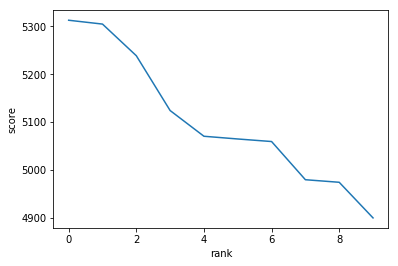

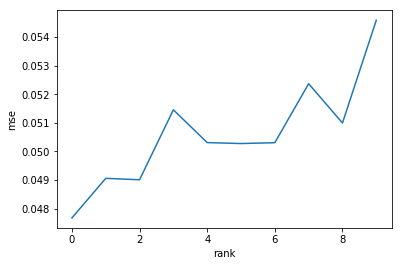

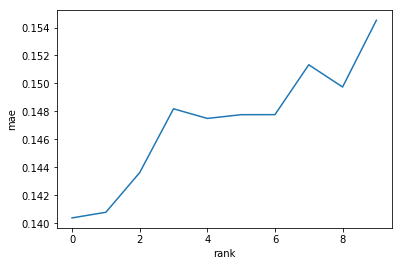

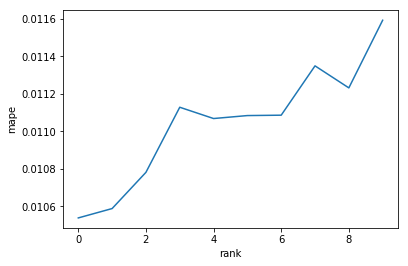

In [33]:
for name in metrics:
    plt.plot(df_gsearch_results[name])
    plt.xlabel('rank'); plt.ylabel(name); plt.show()

In [34]:
for p in params_gsearch.keys():
    plt.scatter(df_gsearch_results[p], df_gsearch_results['score'], s=7)
    plt.scatter(df_gsearch_results[p][:2], df_gsearch_results['score'][:2], s=7)
    plt.xlabel(p); plt.ylabel('score'); plt.show()

In [35]:
for p in params_gsearch.keys():
    plt.scatter(df_gsearch_results[p], df_gsearch_results['mae'], s=7)
    plt.scatter(df_gsearch_results[p][:10], df_gsearch_results['mae'][:10], s=7)
    plt.xlabel(p); plt.ylabel('mae'); plt.show()

#### Hist

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1760, 1760, 1760, 1760), 'batch_size': 128}


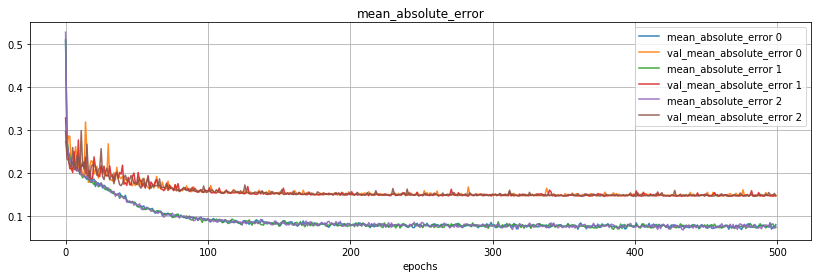

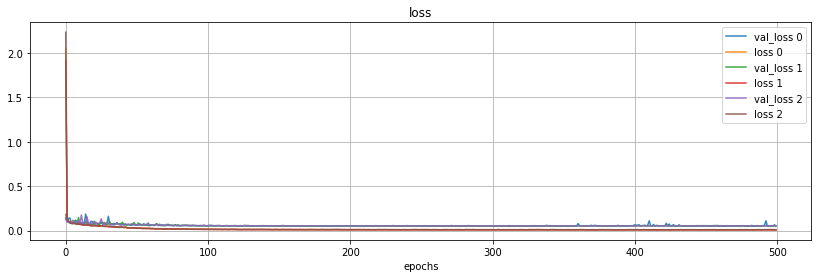

params: {'skip_connection': True, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


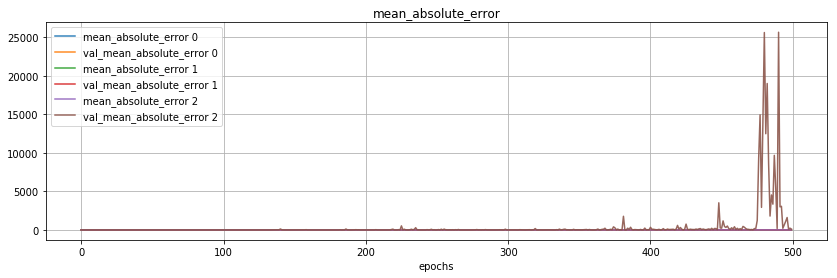

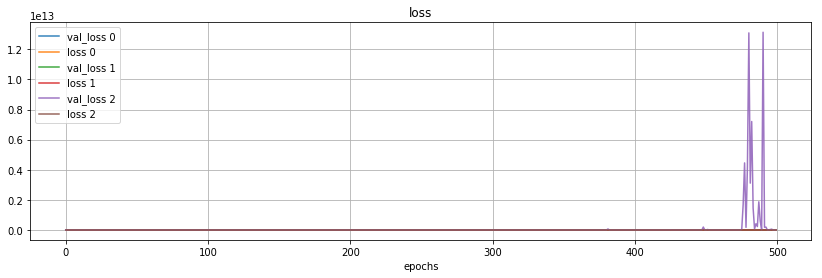

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (2180, 2180, 1090, 1090, 545, 545), 'batch_size': 128}


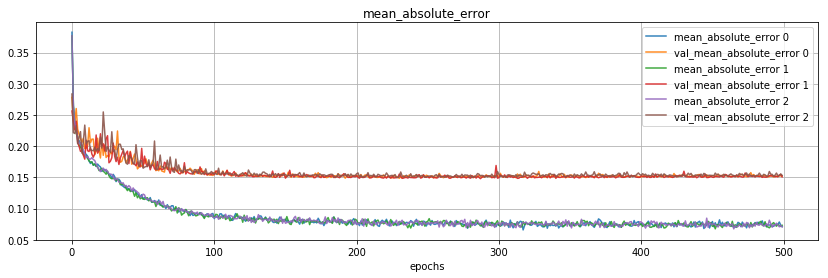

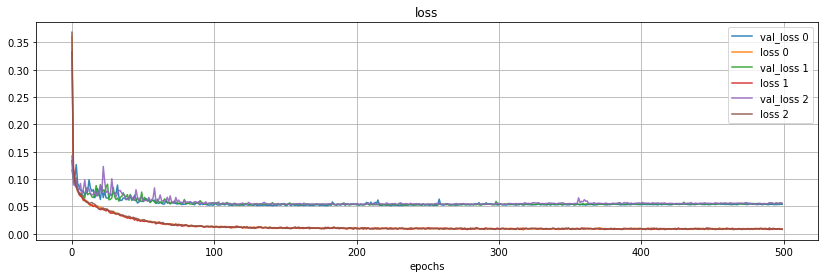

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


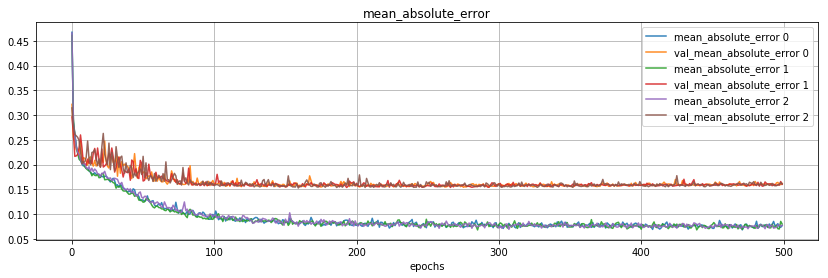

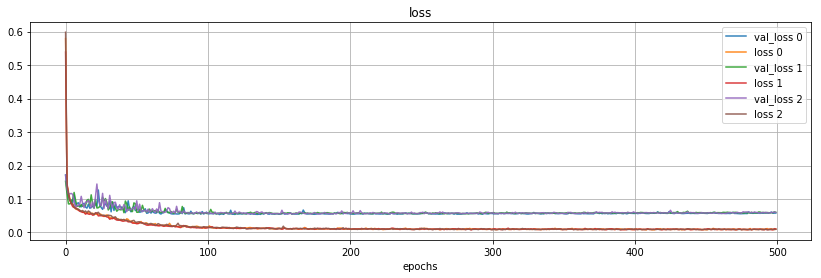

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1724, 3448, 862, 431), 'batch_size': 128}


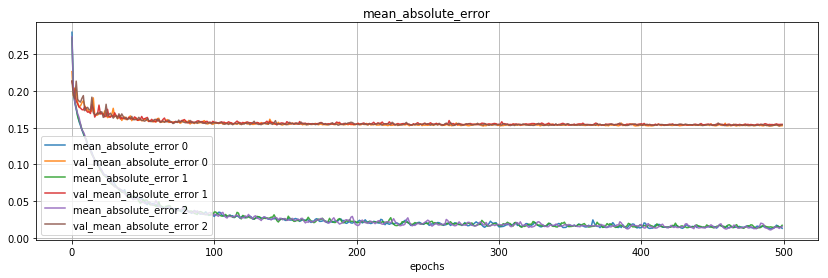

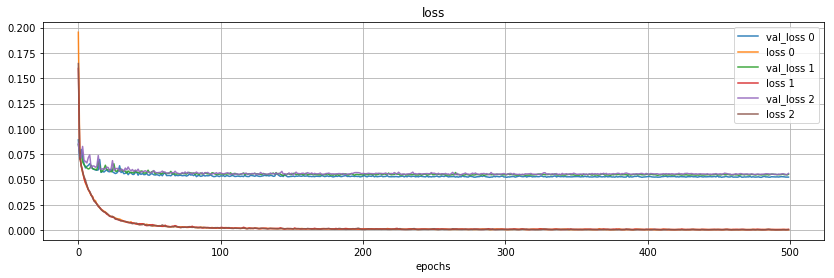

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (3688, 1844, 922, 461), 'batch_size': 128}


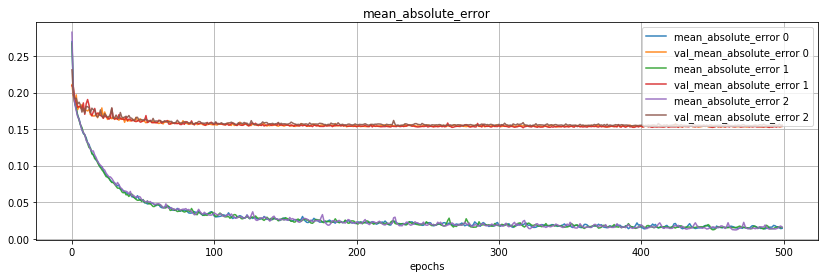

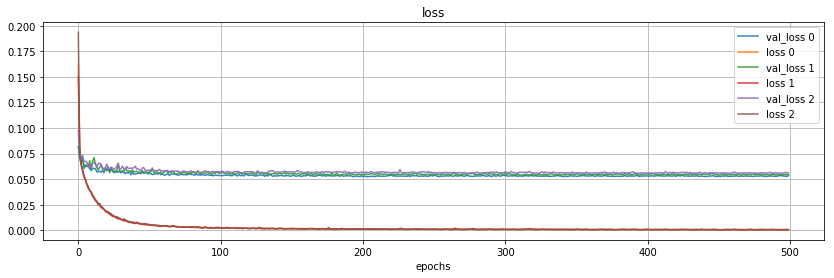

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1760, 1760, 1760, 1760), 'batch_size': 128}


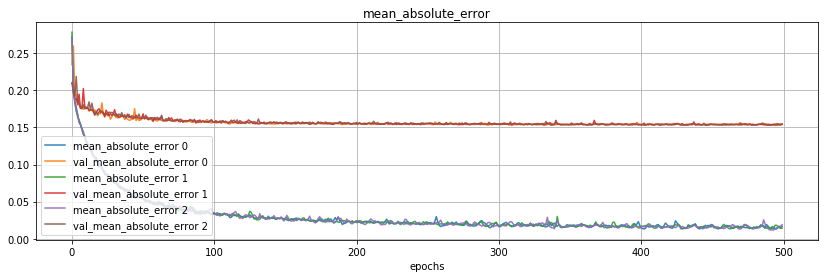

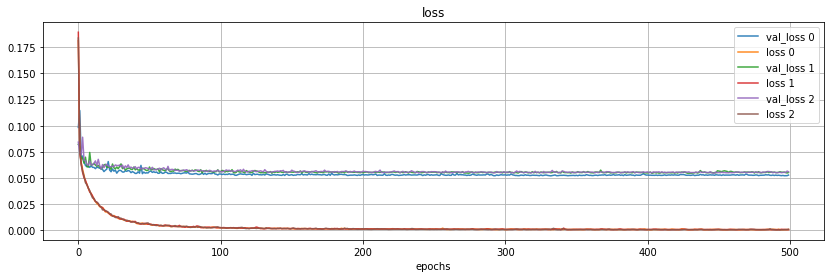

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


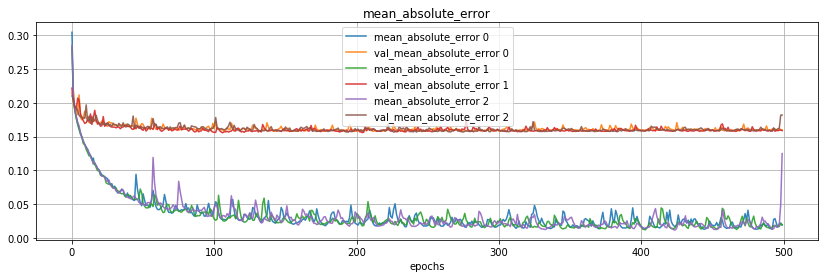

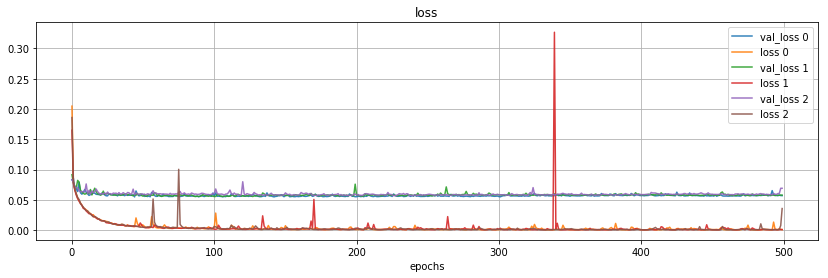

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (477, 954, 1908, 3816), 'batch_size': 128}


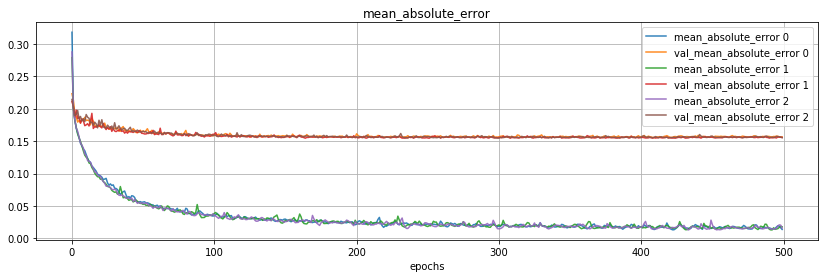

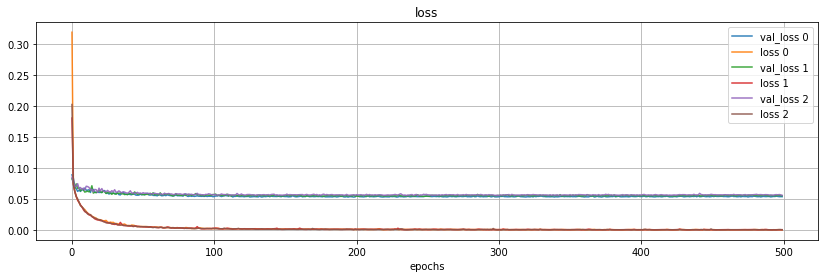

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'softplus', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


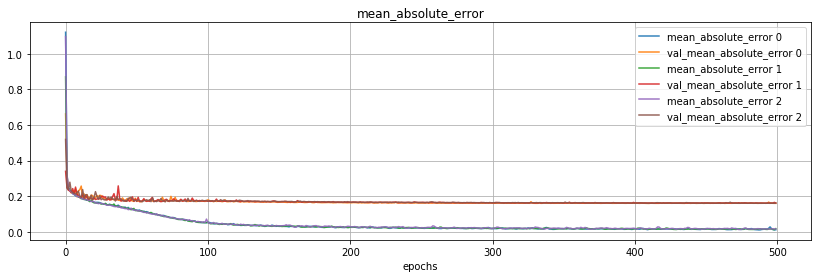

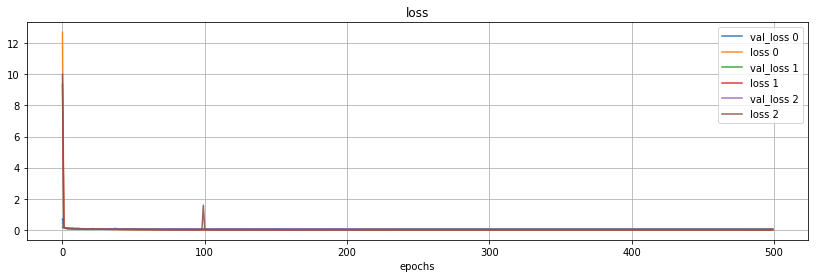

In [12]:
for result, hists in zip(gsearch_results_show, df_gsearch_results['history']):
    print('params:', dict(result[0]))
    plot_list_hist(hists)

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1760, 1760, 1760, 1760), 'batch_size': 128}


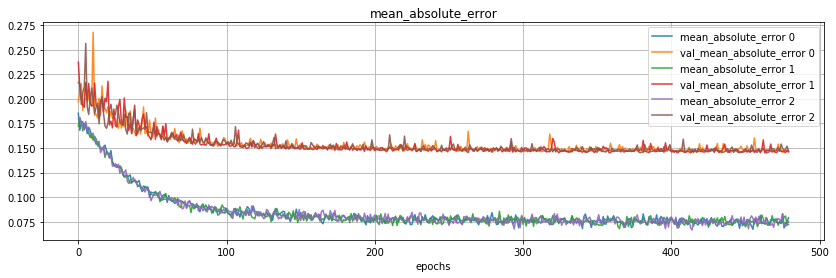

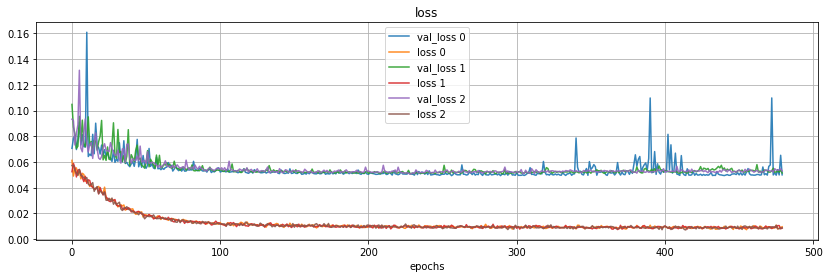

params: {'skip_connection': True, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


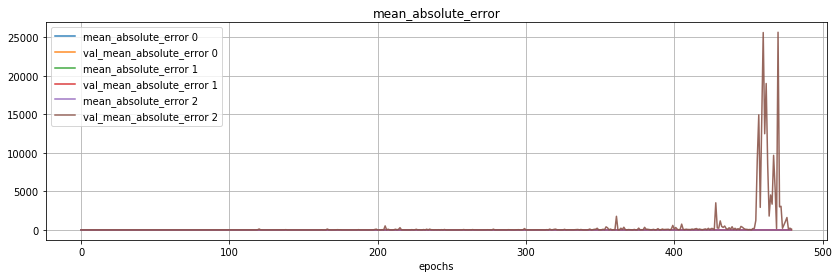

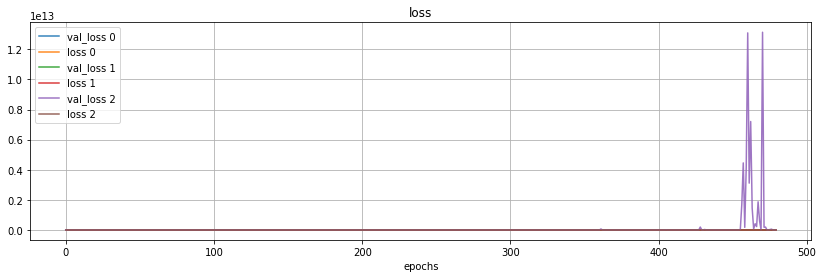

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (2180, 2180, 1090, 1090, 545, 545), 'batch_size': 128}


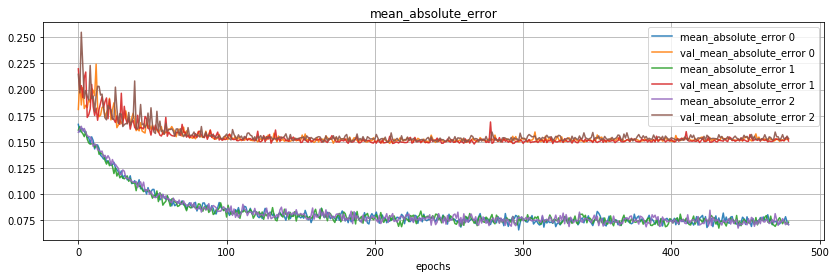

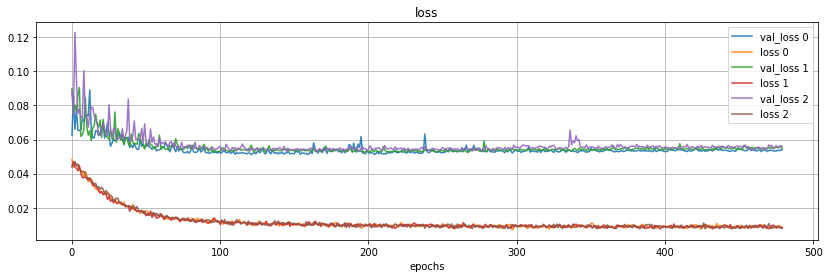

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


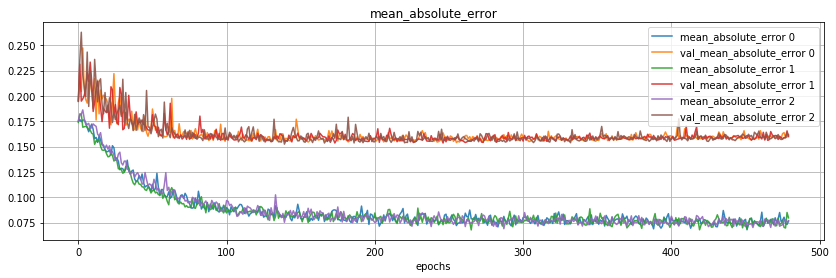

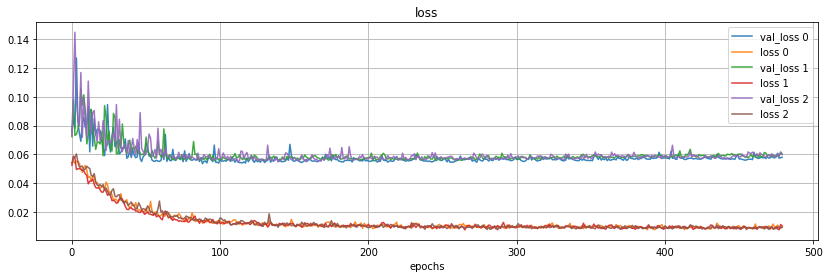

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1724, 3448, 862, 431), 'batch_size': 128}


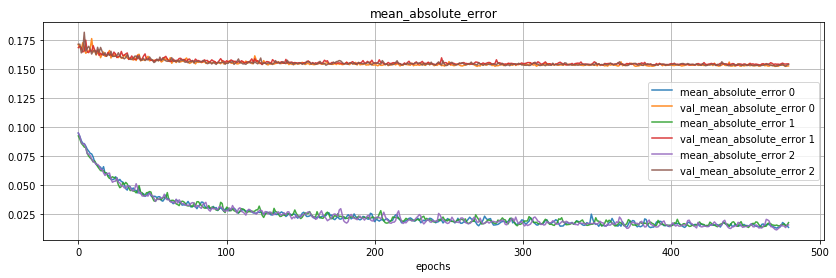

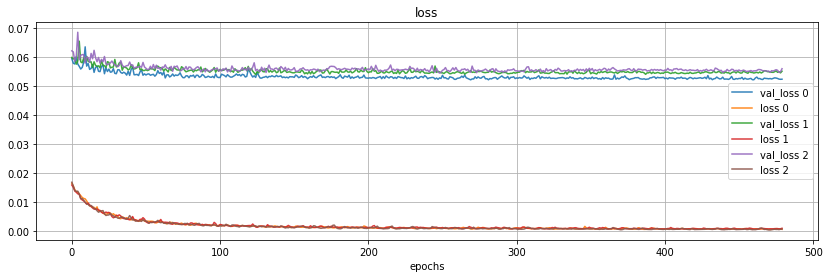

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (3688, 1844, 922, 461), 'batch_size': 128}


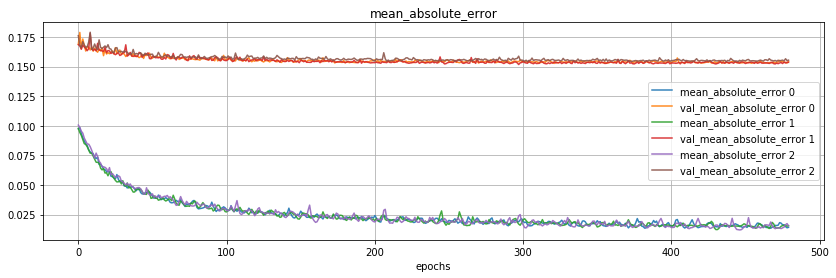

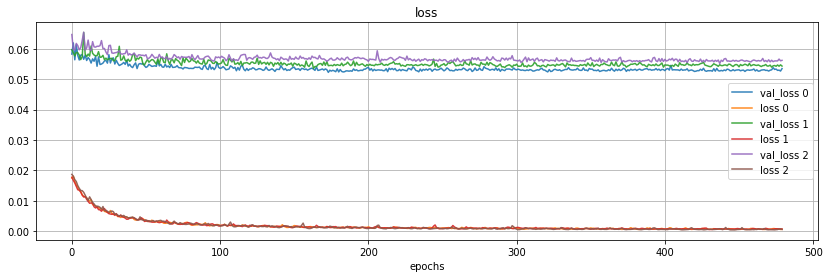

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1760, 1760, 1760, 1760), 'batch_size': 128}


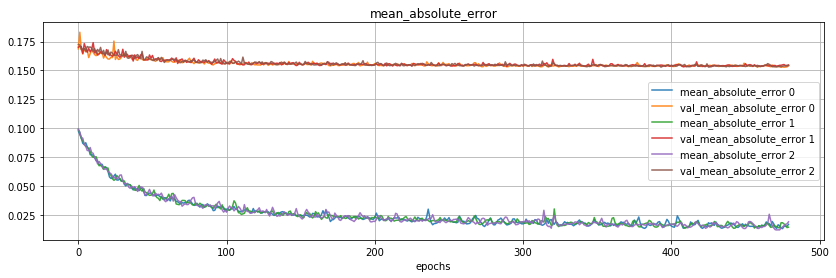

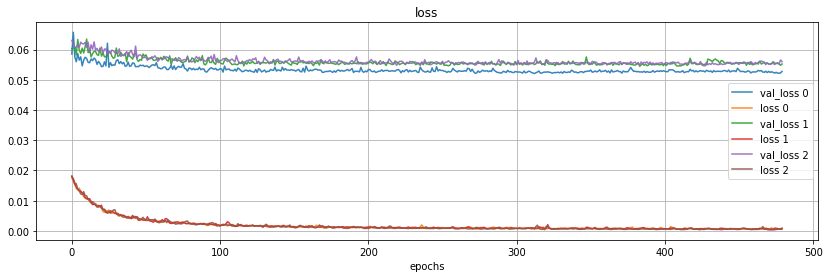

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


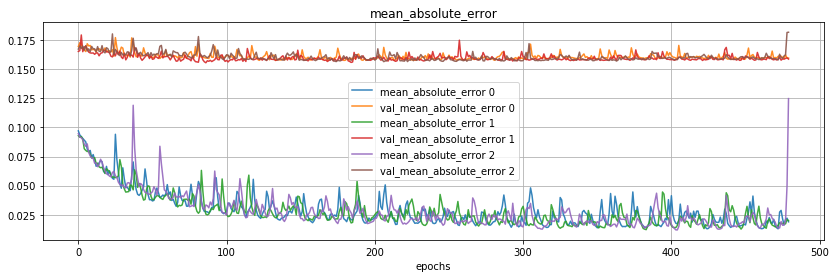

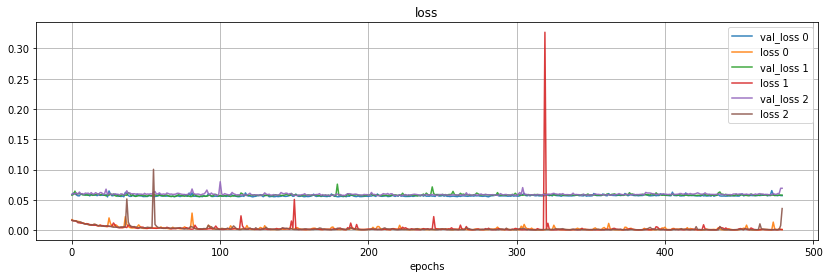

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (477, 954, 1908, 3816), 'batch_size': 128}


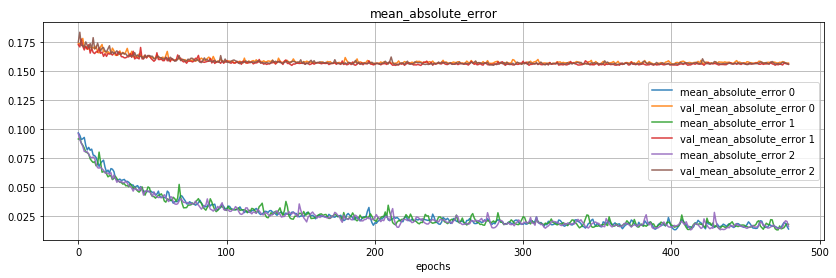

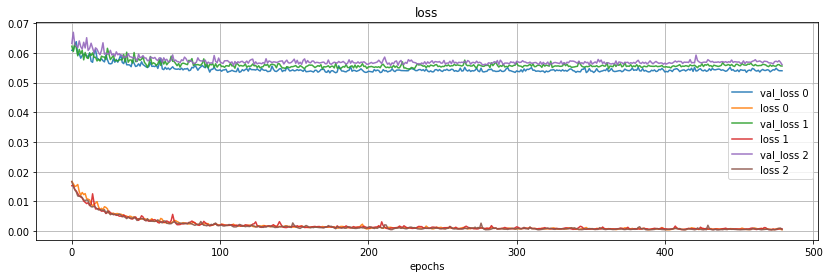

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'softplus', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


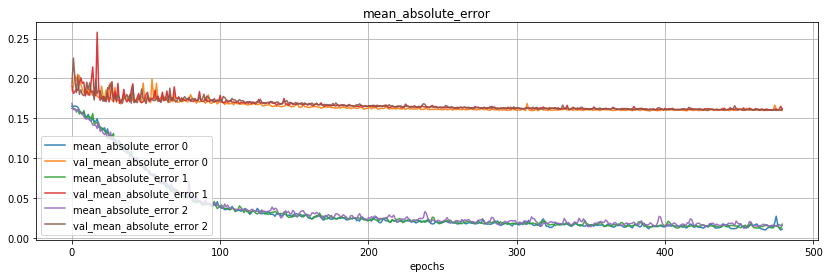

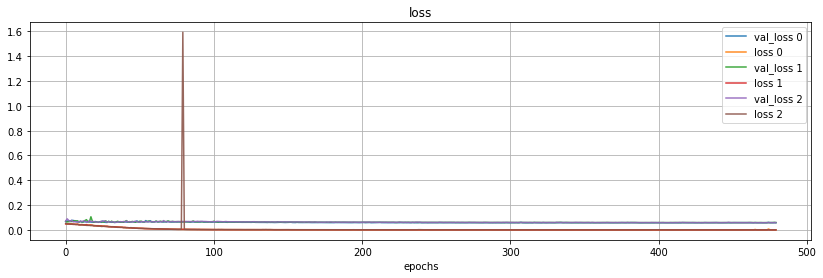

In [73]:
for result, hists in zip(gsearch_results_show, df_gsearch_results['history']):
    print('params:', dict(result[0]))
    plot_list_hist(hists, skip=20)

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1760, 1760, 1760, 1760)}


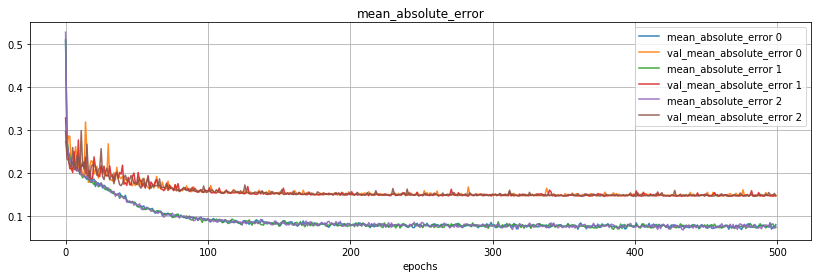

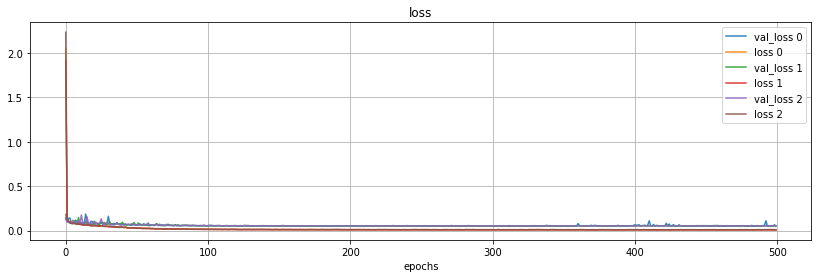

params: {'skip_connection': True, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


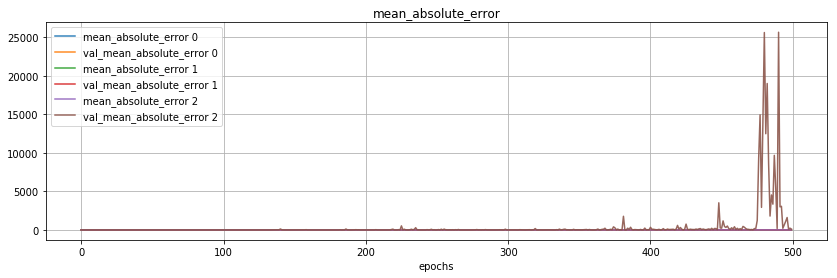

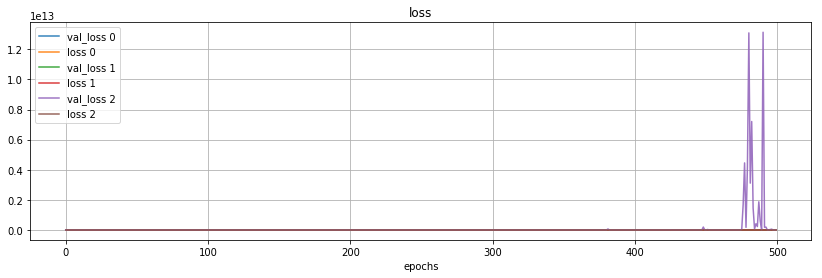

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (2180, 2180, 1090, 1090, 545, 545)}


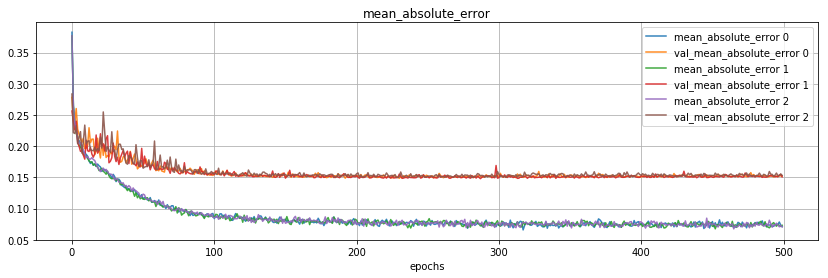

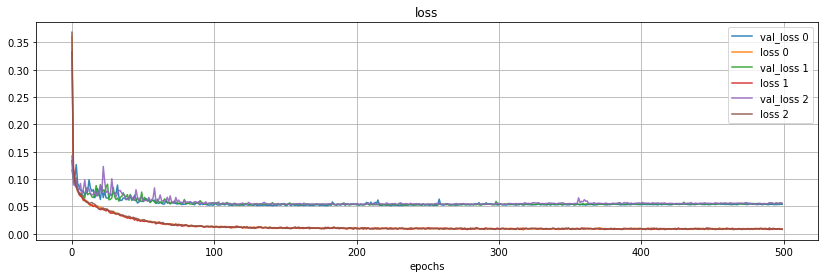

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


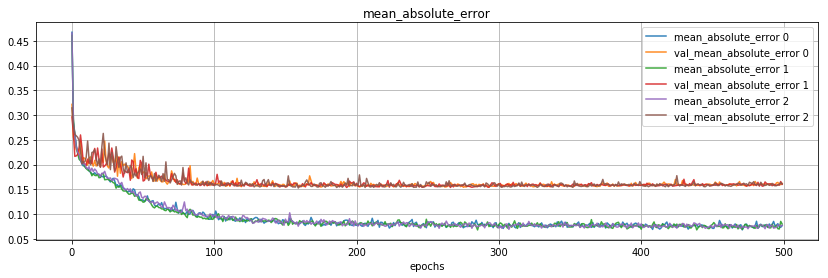

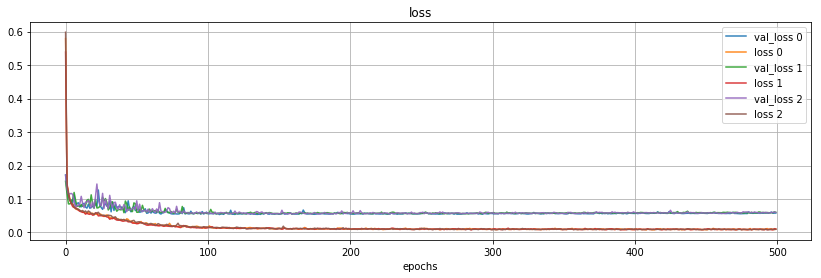

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1724, 3448, 862, 431)}


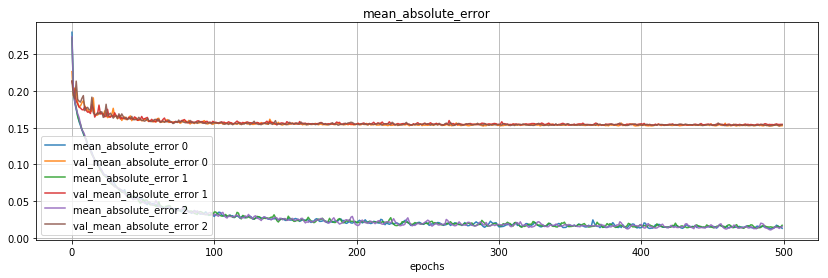

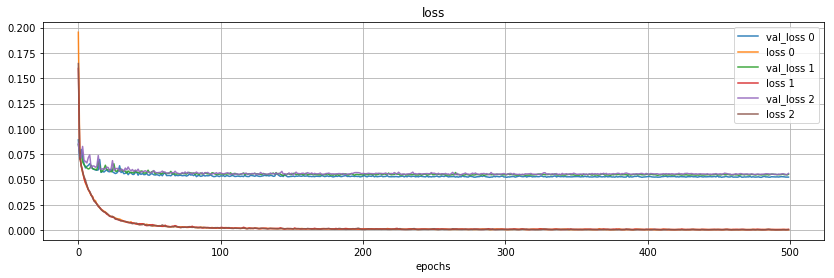

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (3688, 1844, 922, 461)}


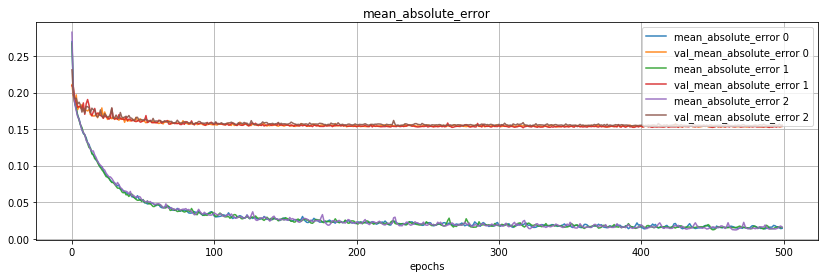

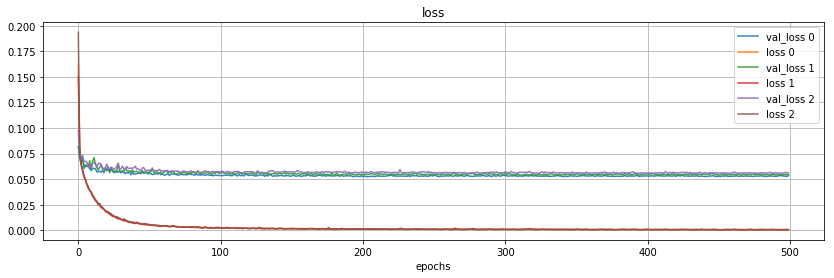

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1760, 1760, 1760, 1760)}


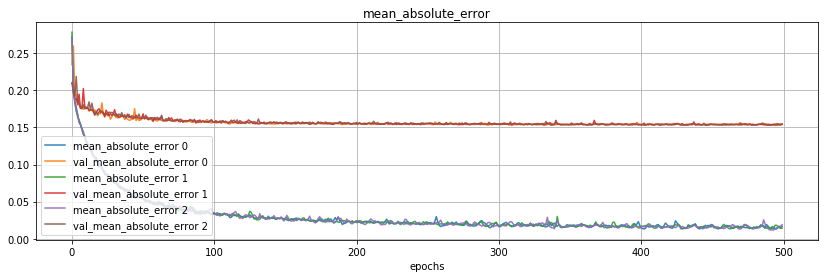

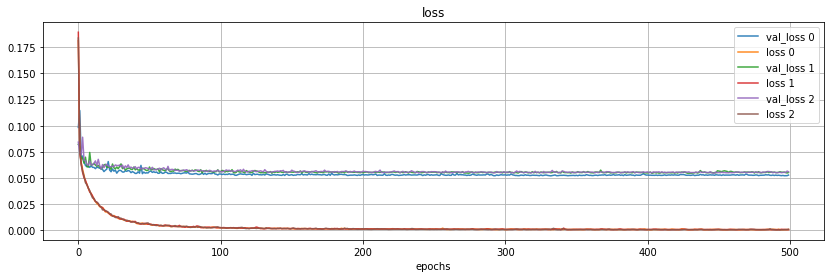

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


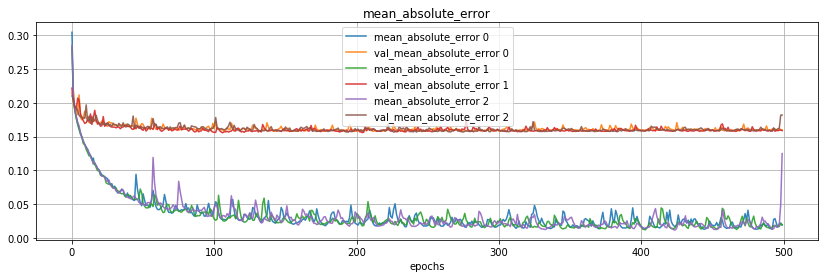

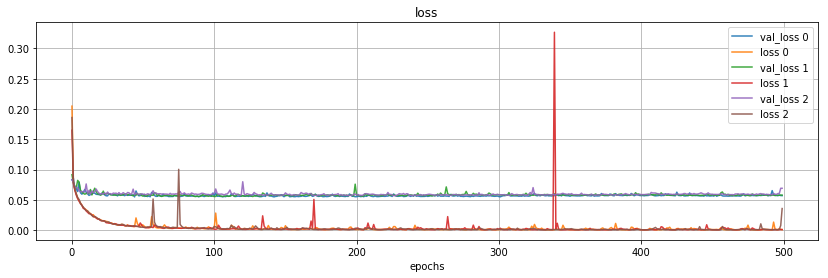

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (477, 954, 1908, 3816)}


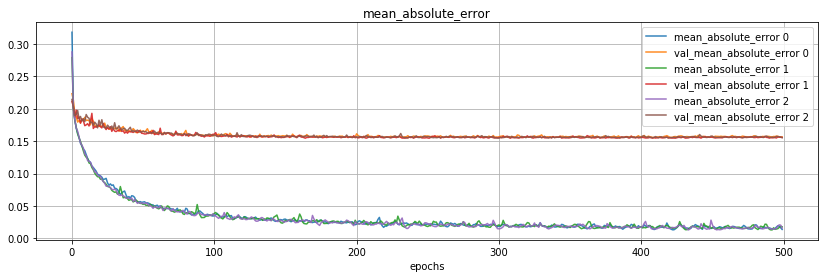

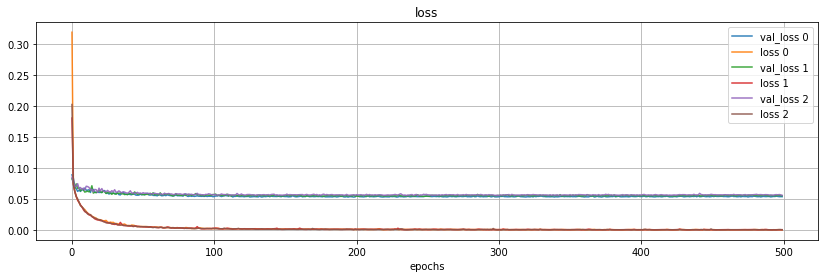

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'softplus', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


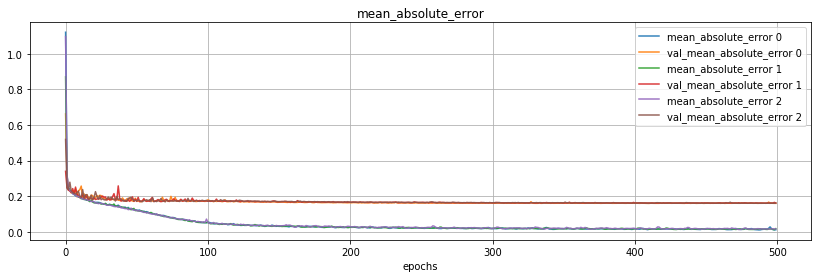

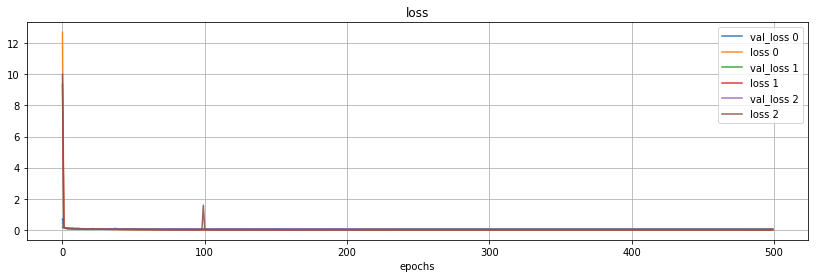

In [56]:
for result, hists in zip(gsearch_results_show, df_gsearch_results['history']):
    print('params:', dict(result[0]))
    plot_list_hist(hists)

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1760, 1760, 1760, 1760)}


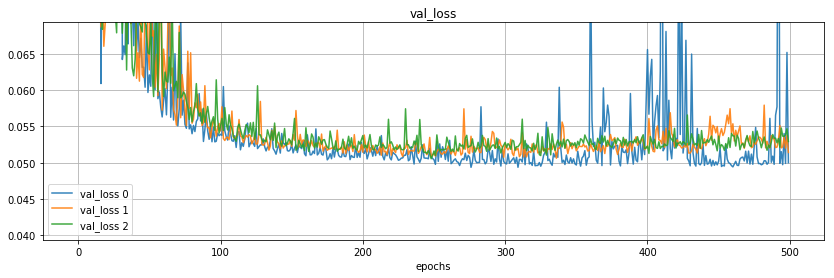

params: {'skip_connection': True, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


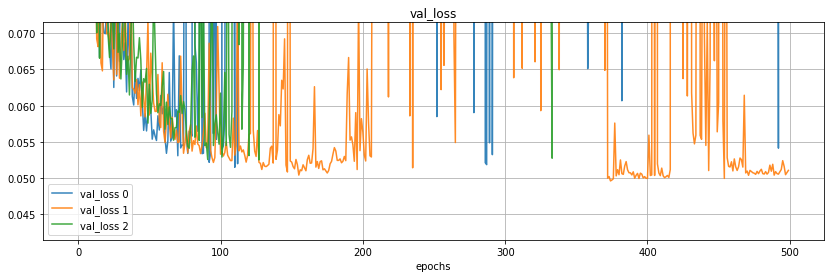

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (2180, 2180, 1090, 1090, 545, 545)}


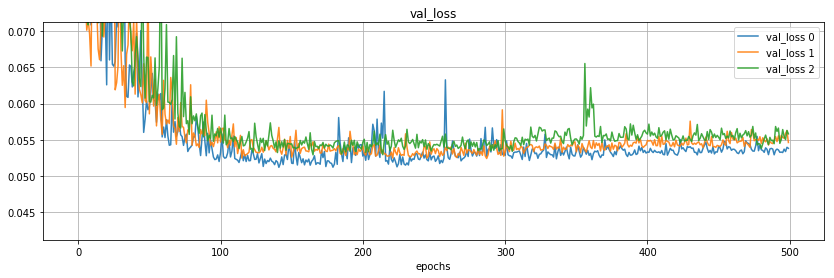

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


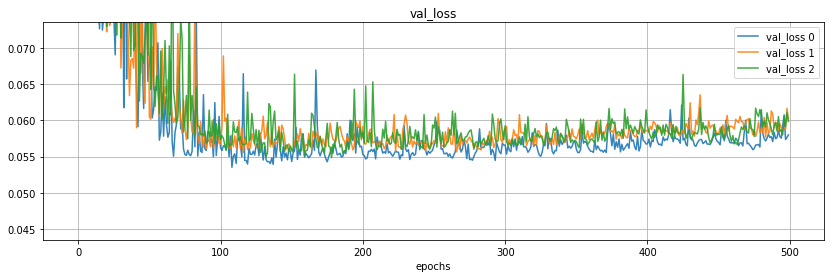

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1724, 3448, 862, 431)}


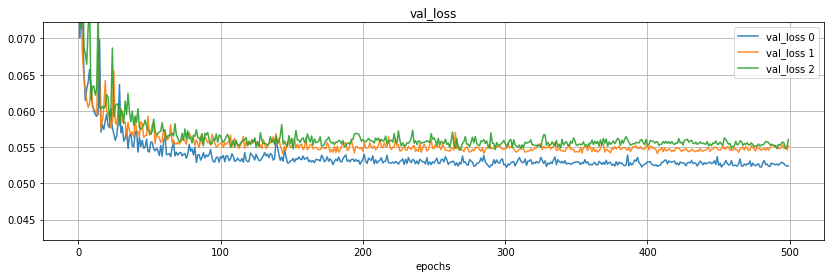

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (3688, 1844, 922, 461)}


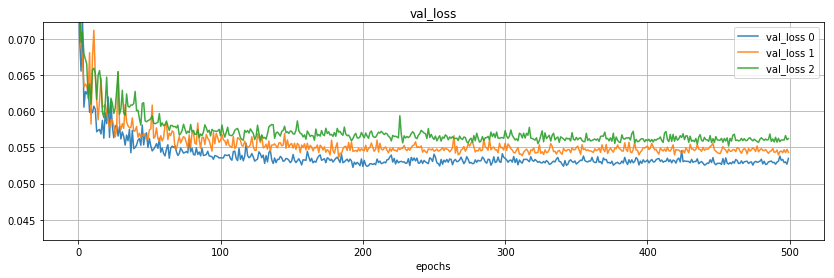

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1760, 1760, 1760, 1760)}


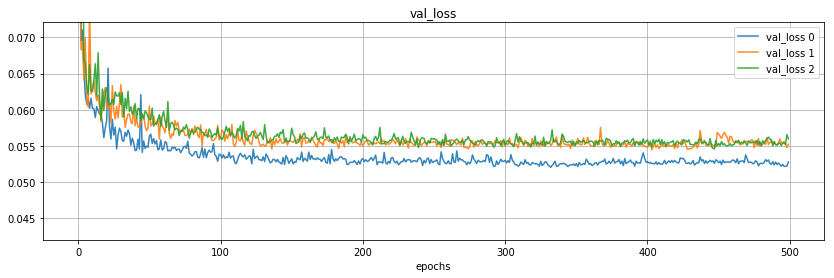

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


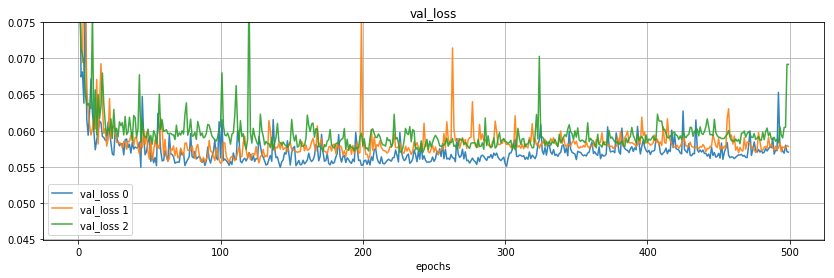

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (477, 954, 1908, 3816)}


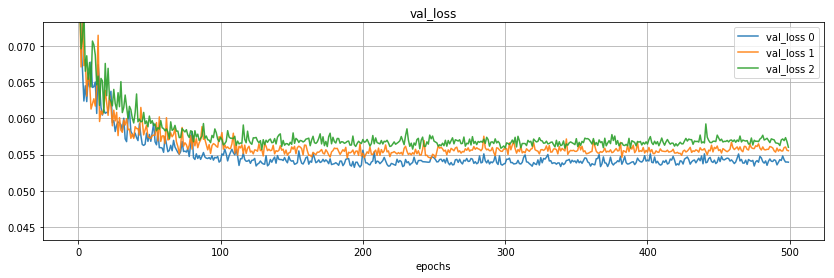

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'softplus', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


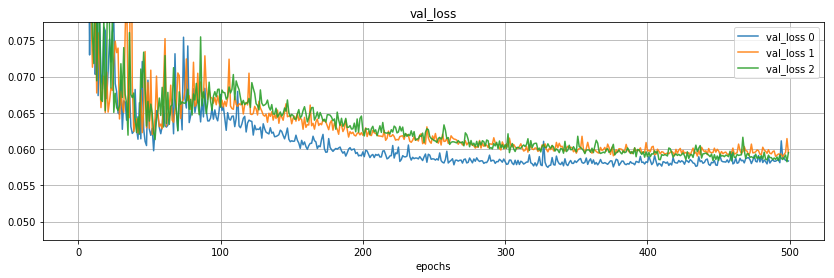

In [57]:
for result, hists in zip(gsearch_results_show, df_gsearch_results['history']):
    print('params:', dict(result[0]))
    plot_list_hist(hists, ylim=(min(hists[0]['val_loss'])-0.01, 
                                min(hists[0]['val_loss'])+0.02), metrics_plot=['val_loss'])

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1760, 1760, 1760, 1760)}


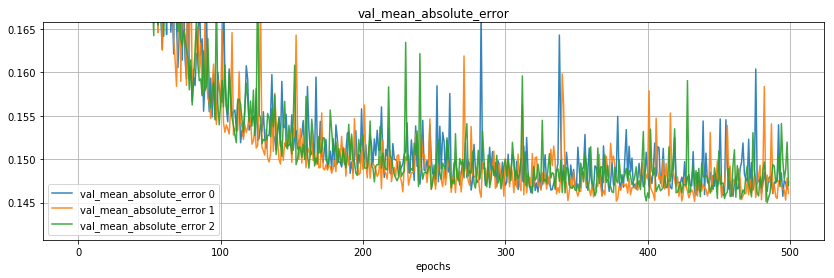

params: {'skip_connection': True, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


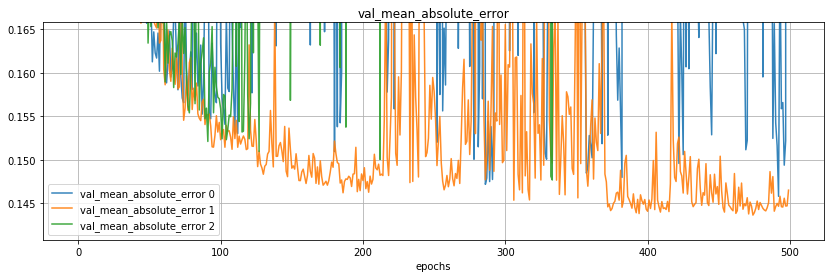

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (2180, 2180, 1090, 1090, 545, 545)}


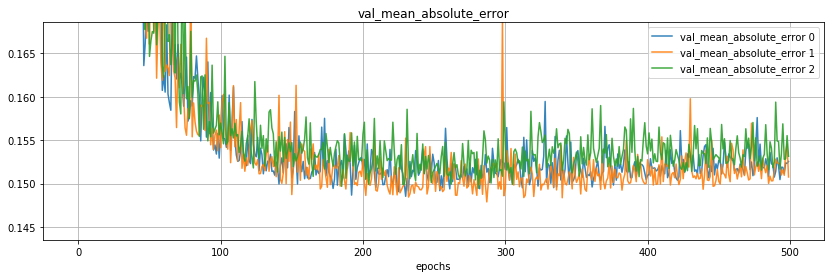

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


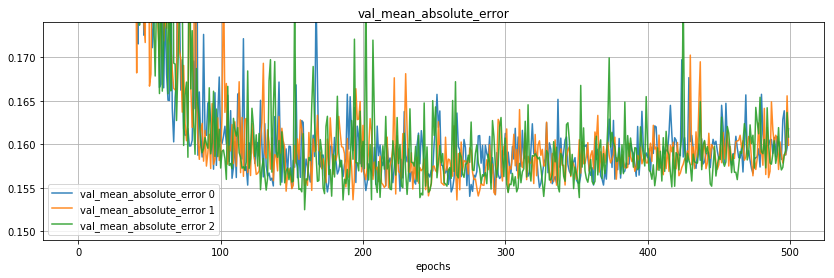

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1724, 3448, 862, 431)}


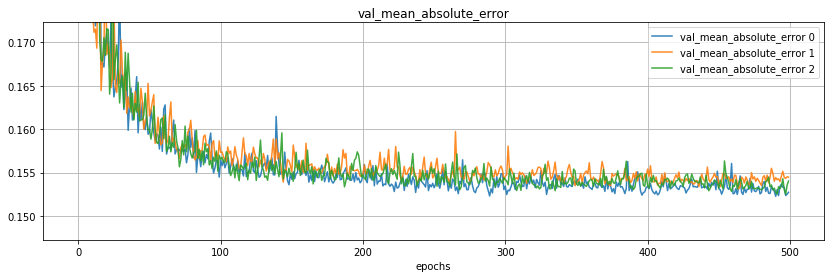

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (3688, 1844, 922, 461)}


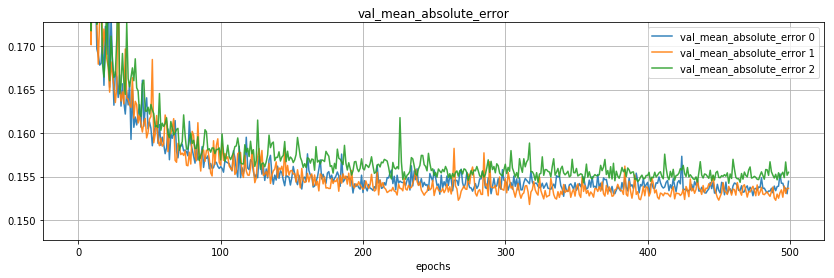

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1760, 1760, 1760, 1760)}


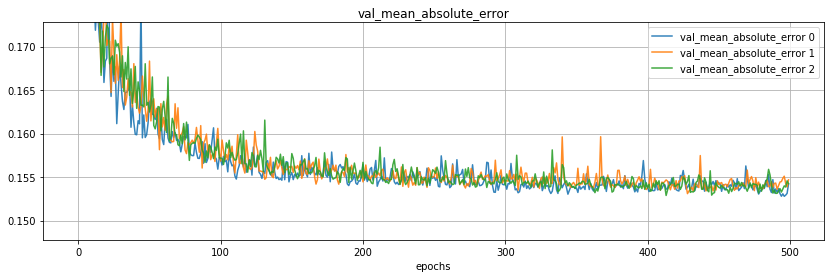

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


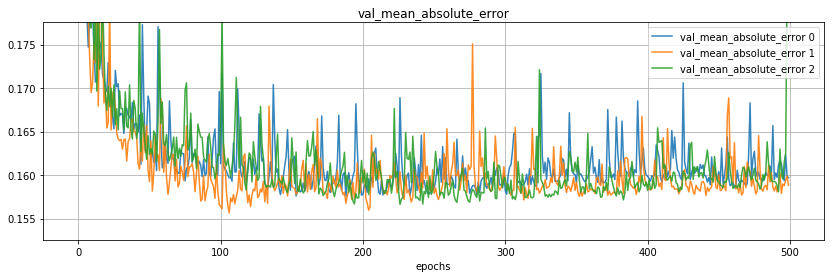

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (477, 954, 1908, 3816)}


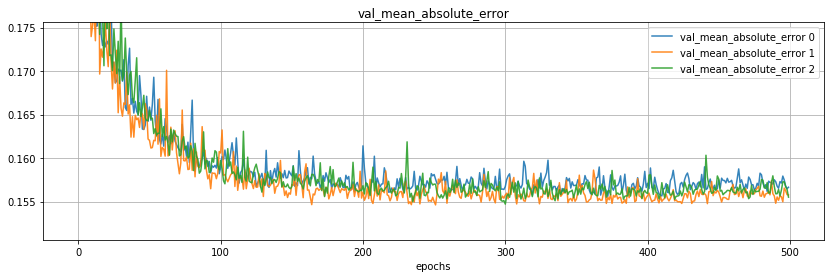

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'batch_size': 128, 'epochs': 500, 'activation': 'softplus', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024)}


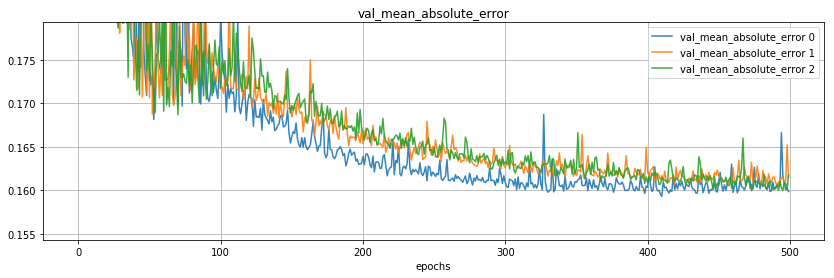

In [58]:
for result, hists in zip(gsearch_results_show, df_gsearch_results['history']):
    print('params:', dict(result[0]))
    plot_list_hist(hists, ylim=(min(hists[0]['val_mean_absolute_error'])-0.005, 
                                min(hists[0]['val_mean_absolute_error'])+0.02), metrics_plot=['val_mean_absolute_error'])

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1760, 1760, 1760, 1760), 'batch_size': 128}


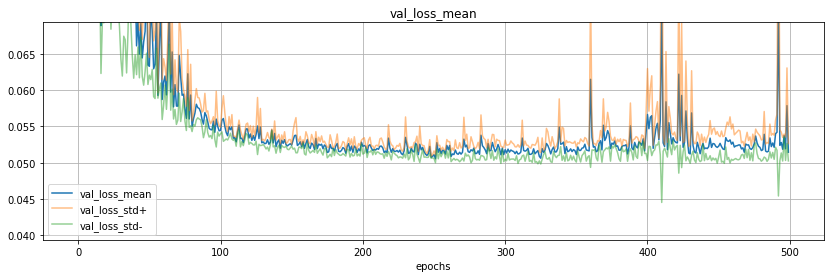

params: {'skip_connection': True, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


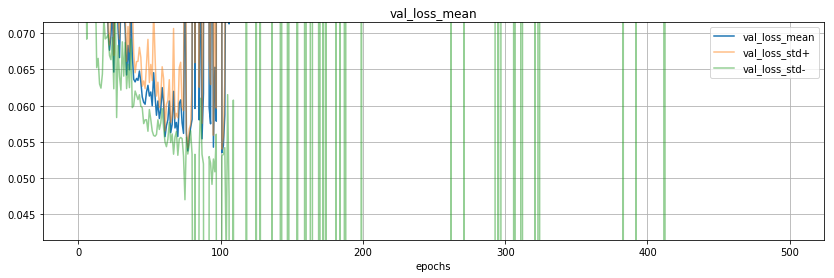

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (2180, 2180, 1090, 1090, 545, 545), 'batch_size': 128}


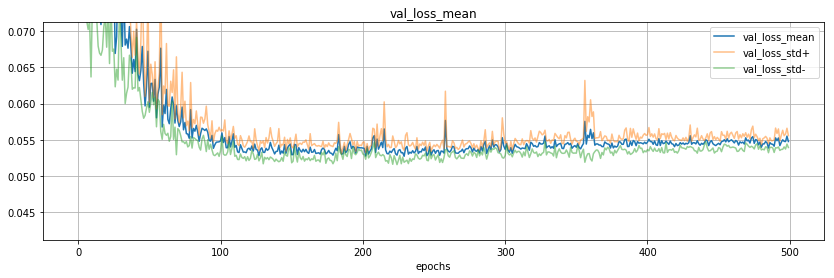

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


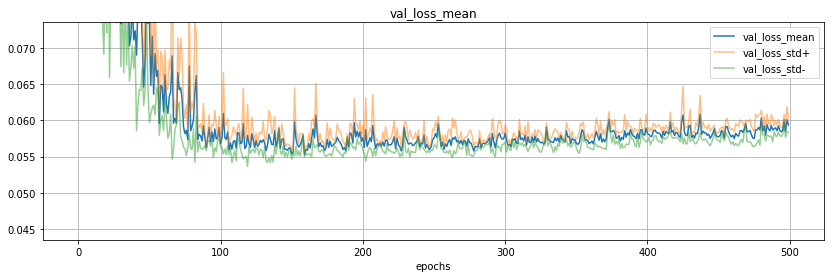

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1724, 3448, 862, 431), 'batch_size': 128}


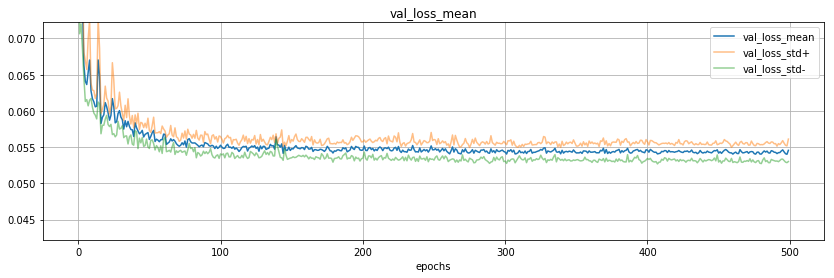

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (3688, 1844, 922, 461), 'batch_size': 128}


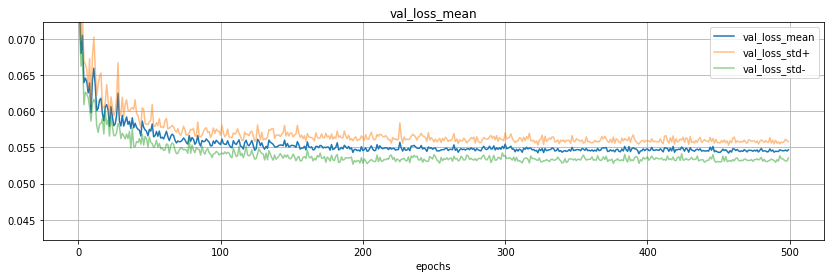

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1760, 1760, 1760, 1760), 'batch_size': 128}


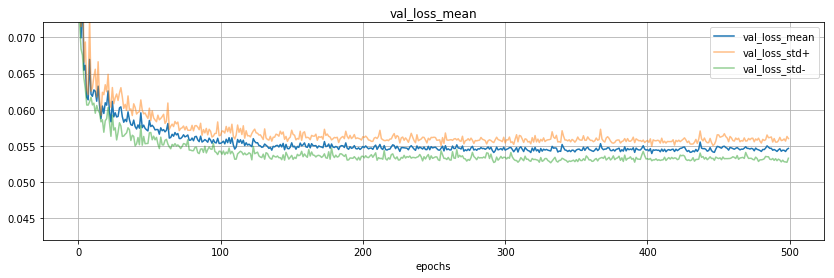

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


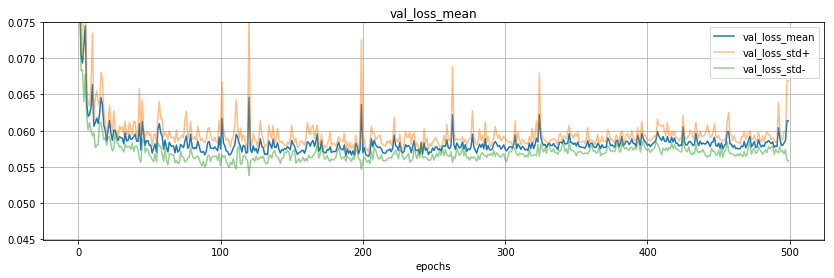

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (477, 954, 1908, 3816), 'batch_size': 128}


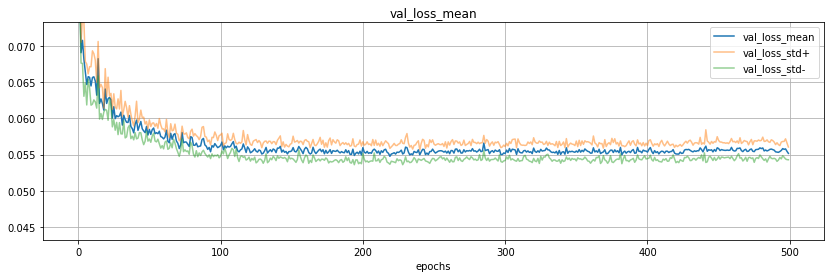

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'softplus', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


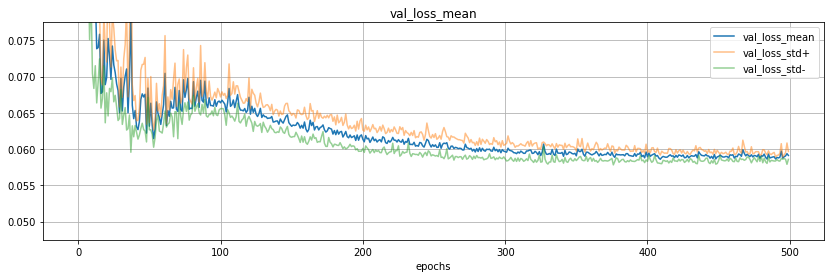

In [20]:
for result, hists in zip(gsearch_results_show, df_gsearch_results['history']):
    print('params:', dict(result[0]))
    plot_list_hist_mean(hists, ylim=(min(hists[0]['val_loss'])-0.01, 
                                     min(hists[0]['val_loss'])+0.02), metrics_plot=['val_loss'])

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1760, 1760, 1760, 1760), 'batch_size': 128}


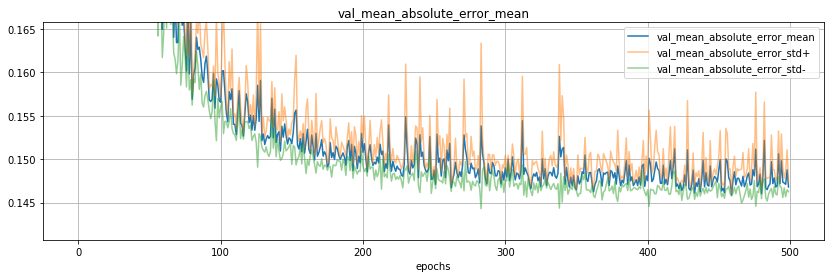

params: {'skip_connection': True, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


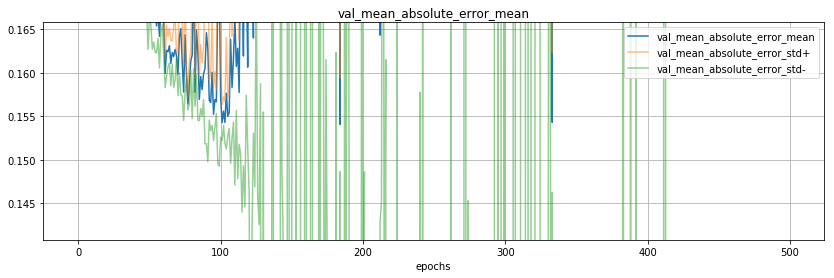

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (2180, 2180, 1090, 1090, 545, 545), 'batch_size': 128}


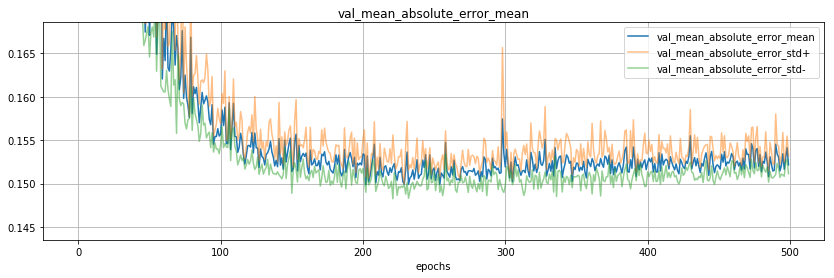

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': True, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


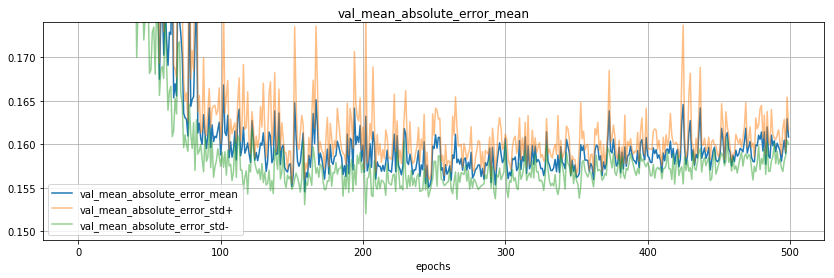

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1724, 3448, 862, 431), 'batch_size': 128}


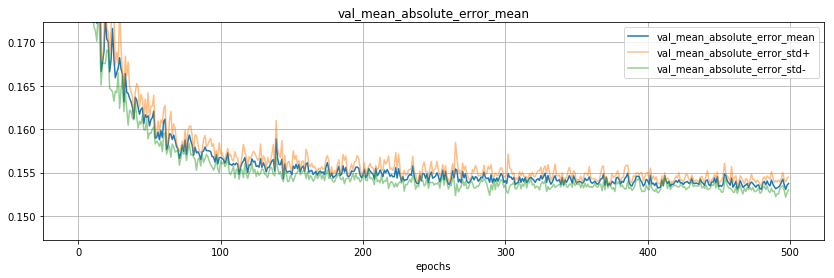

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (3688, 1844, 922, 461), 'batch_size': 128}


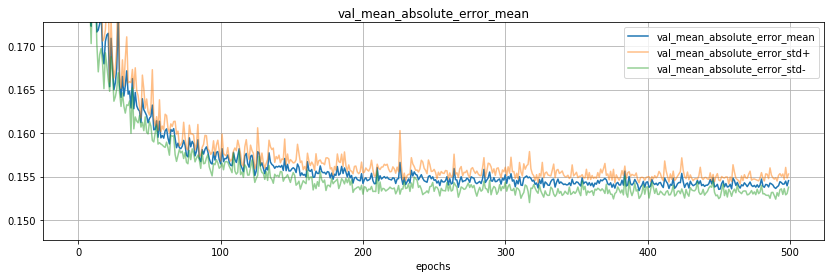

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1760, 1760, 1760, 1760), 'batch_size': 128}


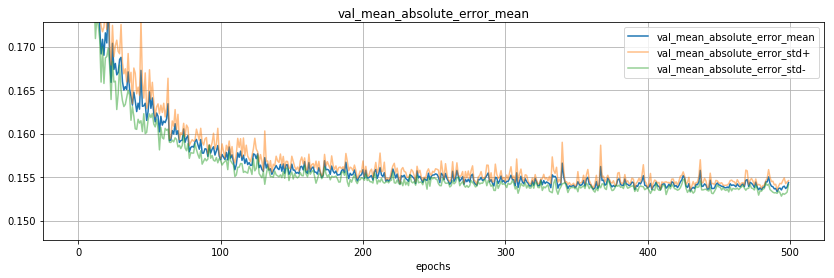

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


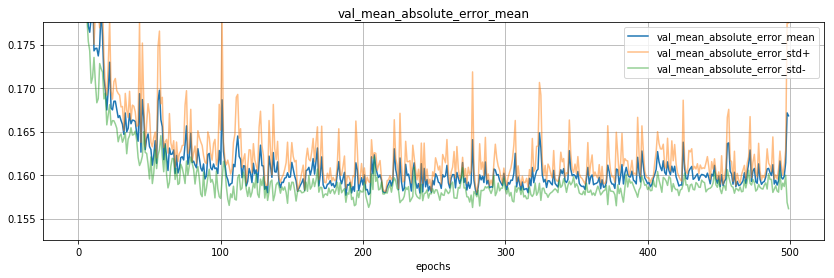

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'relu', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (477, 954, 1908, 3816), 'batch_size': 128}


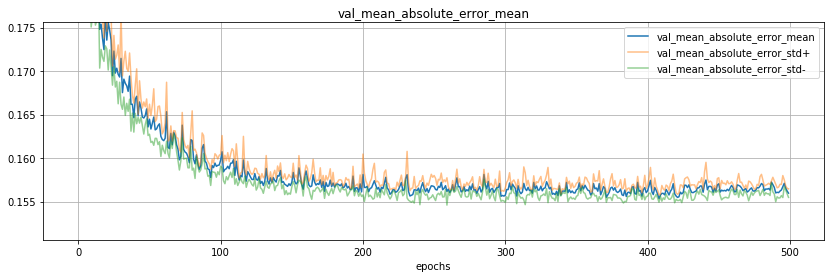

params: {'skip_connection': False, 'loss': 'mse', 'optimizer': "<class 'keras.optimizers.Adam'>", 'epochs': 500, 'activation': 'softplus', 'dropout': 0.0, 'learning_rate': 0.001, 'batch_norm': False, 'n_neurons': (1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024), 'batch_size': 128}


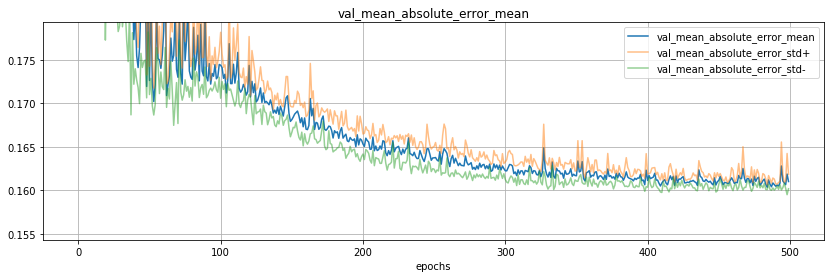

In [21]:
for result, hists in zip(gsearch_results_show, df_gsearch_results['history']):
    print('params:', dict(result[0]))
    plot_list_hist_mean(hists, ylim=(min(hists[0]['val_mean_absolute_error'])-0.005, 
                                     min(hists[0]['val_mean_absolute_error'])+0.02), metrics_plot=['val_mean_absolute_error'])

#### Mean scores

In [33]:
df_gsearch_results.check()

score       mse       mae      mape activation  batch_norm  \
0  5312.519056  0.047680  0.140390  0.010538       relu        True   
1  5304.514383  0.049062  0.140794  0.010588       relu        True   
2  5238.516179  0.049013  0.143627  0.010781       relu        True   
3  5124.175411  0.051456  0.148189  0.011129       relu        True   
4  5070.504409  0.050311  0.147501  0.011069       relu       False   
5  5064.838829  0.050278  0.147768  0.011084       relu       False   
6  5059.506102  0.050308  0.147772  0.011086       relu       False   
7  4979.836809  0.052367  0.151337  0.011350       relu       False   
8  4974.501244  0.050996  0.149748  0.011232       relu       False   
9  4900.170898  0.054585  0.154519  0.011593   softplus       False   

   batch_size  best_iterations  dropout  epochs     ...      loss  \
0         128  [461, 484, 485]      0.0     500     ...       mse   
1         128  [493, 475, 334]      0.0     500     ...       mse   
2         128  [231, 288, 282]      0.0     500     ...       mse   
3         128  [276, 267, 160]      0.0     500     ...       mse   
4         128  [491, 465, 492]      0.0     500     ...       mse   
5         128  [342, 318, 458]      0.0     500     ...       mse   
6         128  [497, 429, 414]      0.0     500     ...       mse   
7         128  [189, 107, 227]      0.0     500     ...       mse   
8         128  [373, 252, 301]      0.0     500     ...       mse   
9         128  [411, 492, 496]      0.0     500     ...       mse   

  mean_best_iterations                                          n_neurons  \
0                  477                           (1760, 1760, 1760, 1760)   
1                  434  (1024, 1024, 1024, 1024, 1024, 1024, 1024, 102...   
2                  267                 (2180, 2180, 1090, 1090, 545, 545)   
3                  234  (1024, 1024, 1024, 1024, 1024, 1024, 1024, 102...   
4                  483                             (1724, 3448, 862, 431)   
5                  373                             (3688, 1844, 922, 461)   
6                  447                           (1760, 1760, 1760, 1760)   
7                  174  (1024, 1024, 1024, 1024, 1024, 1024, 1024, 102...   
8                  309                             (477, 954, 1908, 3816)   
9                  466  (1024, 1024, 1024, 1024, 1024, 1024, 1024, 102...   

                         optimizer skip_connection  \
0  <class 'keras.optimizers.Adam'>           False   
1  <class 'keras.optimizers.Adam'>            True   
2  <class 'keras.optimizers.Adam'>           False   
3  <class 'keras.optimizers.Adam'>           False   
4  <class 'keras.optimizers.Adam'>           False   
5  <class 'keras.optimizers.Adam'>           False   
6  <class 'keras.optimizers.Adam'>           False   
7  <class 'keras.optimizers.Adam'>           False   
8  <class 'keras.optimizers.Adam'>           False   
9  <class 'keras.optimizers.Adam'>           False   

                                             history   mean_mse_nn  \
0  [{'mean_absolute_error': [0.5117514373779297, ...  5.368360e-02   
1  [{'mean_absolute_error': [0.4283661421298981, ...  2.425024e+07   
2  [{'mean_absolute_error': [0.382612211894989, 0...  5.317381e-02   
3  [{'mean_absolute_error': [0.4673132794857025, ...  5.680911e-02   
4  [{'mean_absolute_error': [0.27975264804363253,...  5.448353e-02   
5  [{'mean_absolute_error': [0.26968296842575074,...  5.443052e-02   
6  [{'mean_absolute_error': [0.27236182141304016,...  5.418416e-02   
7  [{'mean_absolute_error': [0.30434995222091676,...  5.701784e-02   
8  [{'mean_absolute_error': [0.3182577547311783, ...  5.502394e-02   
9  [{'mean_absolute_error': [1.1214680219650268, ...  5.923965e-02   

   mean_mae_nn    std_mse_nn  std_mae_nn  
0     0.151148  9.563364e-04    0.006565  
1    20.802779  3.429124e+07   28.065444  
2     0.150446  7.948159e-04    0.001438  
3     0.158854  1.862472e-03    0.003714  
4     0.153989  9.609673e-04    0.0005

shape = (10, 21)


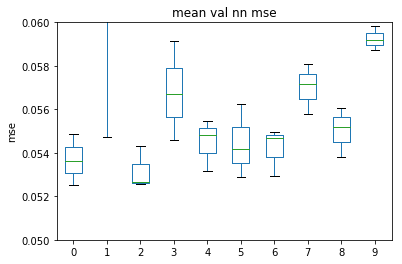

In [58]:
pd.DataFrame([
    [hist['val_loss'][epoch-1] for hist in hists]
    for hists, epoch 
    in zip(df_gsearch_results['history'], df_gsearch_results['mean_best_iterations'])
]).T.plot.box(ylim=(0.05, 0.06), title='mean val nn mse'); plt.ylabel('mse'); plt.show()

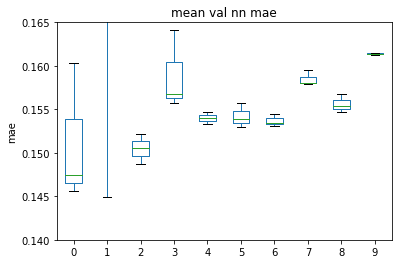

In [57]:
pd.DataFrame([
    [hist['val_mean_absolute_error'][epoch-1] for hist in hists]
    for hists, epoch 
    in zip(df_gsearch_results['history'], df_gsearch_results['mean_best_iterations'])
]).T.plot.box(ylim=(0.14, 0.165), title='mean val nn mae'); plt.ylabel('mae'); plt.show()

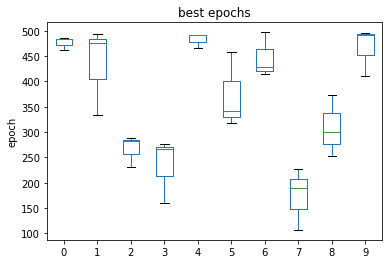

In [59]:
pd.DataFrame([
    row for row in df_gsearch_results['best_iterations']
]).T.plot.box(title='best epochs'); plt.ylabel('epoch'); plt.show()

#### Train vs validation scores

In [61]:
hists = df_gsearch_results['history'][4]

In [70]:
sq_train = hists[0]['mean_absolute_error'][100:]
sq_val = hists[0]['val_mean_absolute_error'][100:]
sq_train = sq_train - np.mean(sq_train)
sq_val = sq_val - np.mean(sq_val)
sq_train = sq_train / sq_train.std()
sq_val = sq_val / sq_val.std()

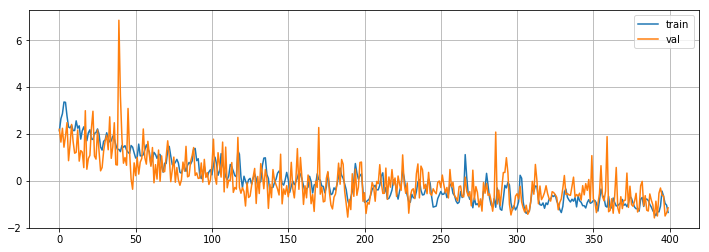

In [71]:
plt.figure(figsize=(12, 4))
plt.plot(sq_train, label='train')
plt.plot(sq_val, label='val')
plt.legend(); plt.grid(); plt.show()

### Result

Round 1: 

(('epochs', 500), ('n_neurons', (512, 512, 512, 512, 512, 512, 512, 512, 512, 512)), ('optimizer', <class 'keras.optimizers.Adam'>), ('learning_rate', 0.001), ('batch_size', 64)) 4936.5001237591105 0.054168496 0.15317458 0.011494316 [4880.839069649577, 4968.83789165318, 4959.823409974575] [0.05246833, 0.05461397, 0.05542319] [0.15345706, 0.15383308, 0.1522336] [0.011516981, 0.011535957, 0.011430012]
(('epochs', 500), ('n_neurons', (512, 512, 512, 512, 512, 512, 512, 512, 512, 512)), ('optimizer', <class 'keras.optimizers.Adam'>), ('learning_rate', 0.0008), ('batch_size', 128)) 4902.5009123335285 0.054754768 0.1548909 0.011611172 [4872.8393027335405, 4920.837021976709, 4913.826412290335] [0.053417027, 0.055927727, 0.054919556] [0.15506728, 0.15528797, 0.15431745] [0.01162971, 0.011635942, 0.011567864]
(('epochs', 500), ('n_neurons', (512, 512, 512, 512, 512, 512, 512, 512, 512, 512)), ('optimizer', <class 'keras.optimizers.Adam'>), ('learning_rate', 0.001), ('batch_size', 128)) 4857.500111763676 0.054231703 0.1546625 0.011599835 [4812.838380217552, 4884.839696779847, 4874.822258293629] [0.052770227, 0.054369133, 0.05555574] [0.15476438, 0.15430678, 0.15491636] [0.0116037885, 0.011569585, 0.011626132]
(('epochs', 500), ('n_neurons', (512, 512, 512, 512, 512, 512, 512, 512, 512, 512)), ('optimizer', <class 'keras.optimizers.Adam'>), ('learning_rate', 0.0008), ('batch_size', 256)) 4791.496810580294 0.054807622 0.15712523 0.011773665 [4736.835256829858, 4820.838531911373, 4816.816642999649] [0.053222205, 0.05549223, 0.05570843] [0.15762872, 0.15728033, 0.15646665] [0.011823622, 0.0117749255, 0.01172245]
(('epochs', 500), ('n_neurons', (512, 512, 512, 512, 512, 512, 512, 512, 512, 512)), ('optimizer', <class 'keras.optimizers.Adam'>), ('learning_rate', 0.0005), ('batch_size', 256)) 4718.493094210823 0.0547153 0.1577649 0.011829801 [4724.833606645465, 4715.834586530924, 4714.811089456081] [0.052873407, 0.055682763, 0.05558974] [0.1572821, 0.15798627, 0.1580263] [0.011801789, 0.011837361, 0.011850253]